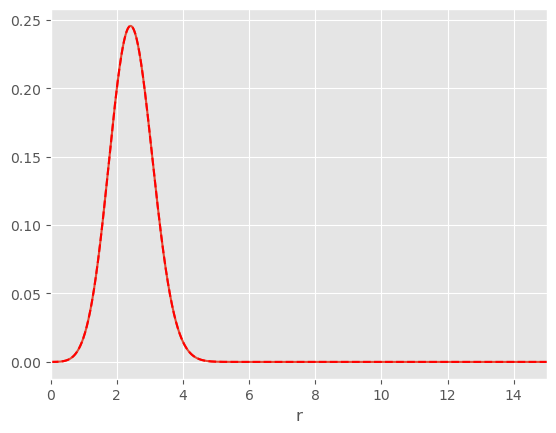

In [198]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline
mpl.style.use('ggplot')

N = 120                                                   # Truncation ordem

L0 = 2                                             # Map parameter 

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)
                               
colr = col[1:N+2]                                                         # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2)) 
r = np.flip(r1)                                           # physical domain (Verificado)  

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     



# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)                                    

r0 = 2

sigma = 1



# L0 = 2 and sigma = 1 r0 = 2 and Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

A0 =  0.05  #   0.05 -> disperse ;  #  0.0 -> colapse 

Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,15)
plt.show()


In [199]:
colr

array([9.99915738e-01, 9.99662965e-01, 9.99241725e-01, 9.98652088e-01,
       9.97894154e-01, 9.96968051e-01, 9.95873934e-01, 9.94611987e-01,
       9.93182425e-01, 9.91585486e-01, 9.89821442e-01, 9.87890588e-01,
       9.85793251e-01, 9.83529783e-01, 9.81100567e-01, 9.78506011e-01,
       9.75746553e-01, 9.72822657e-01, 9.69734818e-01, 9.66483554e-01,
       9.63069414e-01, 9.59492974e-01, 9.55754835e-01, 9.51855628e-01,
       9.47796011e-01, 9.43576667e-01, 9.39198306e-01, 9.34661668e-01,
       9.29967517e-01, 9.25116644e-01, 9.20109865e-01, 9.14948026e-01,
       9.09631995e-01, 9.04162670e-01, 8.98540970e-01, 8.92767845e-01,
       8.86844267e-01, 8.80771233e-01, 8.74549768e-01, 8.68180920e-01,
       8.61665762e-01, 8.55005393e-01, 8.48200934e-01, 8.41253533e-01,
       8.34164360e-01, 8.26934609e-01, 8.19565501e-01, 8.12058275e-01,
       8.04414197e-01, 7.96634556e-01, 7.88720663e-01, 7.80673851e-01,
       7.72495477e-01, 7.64186918e-01, 7.55749574e-01, 7.47184869e-01,
      

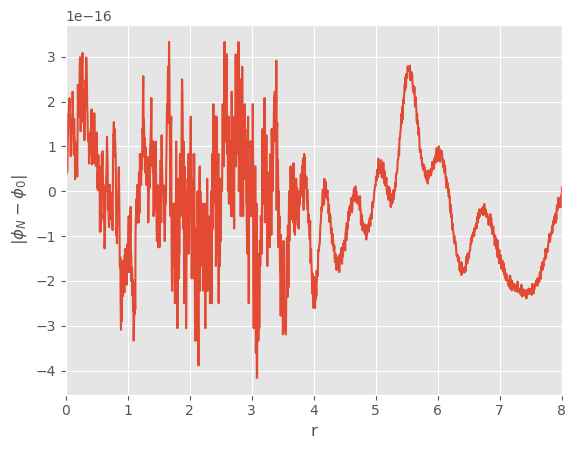

In [200]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [201]:
# Initial conditions for Alpha:

alpha0 = 1 - A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

al0 = np.dot(alpha0, inv_psi)

#Alpha_0 = np.dot(al0, psi)

# Initial values of Krr: Base functions of Krr

# In r = 0: 

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:]) 

inv_SB1 = np.linalg.inv(SB1[:,1:N+1]) #(N,N)


K0 = A0/20*r[1:N+1] **2*(np.exp(-(r[1:N+1] )**2/sigma**2) + np.exp(-(r[1:N+1])**2/sigma**2)) # N

fk0 = np.dot(K0, inv_SB1)

K = np.dot(fk0, SB1[:, 1:N+1])

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-18
#cnew = 0 
#err = abs(c0 - cnew)

n = 0
nf = 100
#nf =1
# Newton Raphson loop
#while max(err) >= tol:

while n <= nf:  
  Chi = np.dot(c0, psi)  
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2 - 1/2*np.exp(4*Chi[0])*(Pi[0]**2 + np.exp(-4*Chi[0])*rPhi[0]**2)
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] - np.exp(4*Chi[1:N+1])*K**2/4 + 1/2*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2)
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1] + 4*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*K/4 - 2*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) + 1/2*np.exp(4*Chi[1:N+1])*(4*psi[:,1:N+1]*np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) 
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1


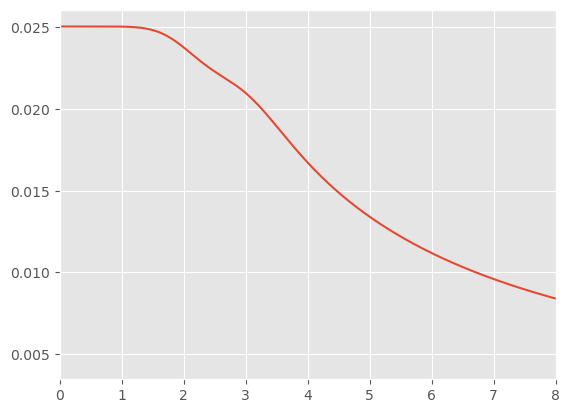

In [202]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,8)
plt.show()
     

In [203]:
# Equation for Krr: momentum constraint

# Base functions for Beta

SB2 = np.zeros([N,N+1])      
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [204]:
np.shape(SB2)

(120, 121)

In [205]:
np.shape(SB1)

(120, 121)

In [206]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [207]:
# Filtering

#Nc = 0

#Nf = N - Nc

#coef_f = 36
#s = 30

filter1 = np.ones(N+1)
#filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [208]:
2*np.dot(np.arange(1, 2*N + 2, 2), c0) 

0.06749137085995677

In [ ]:
# Runge Kutta 4th order

h = 0.00005   # step size
tf = 10



It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

epsilon0 = 1
eta0 = 3

Madm_error = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi) 

  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)

  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)  
    
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)  
  rrAlpha = np.dot(al0, rrpsi)   

  K = np.dot(fk0, SB1[:, 1:N+1])
  rK = np.dot(fk0, rSB1[:, 1:N+1])  

  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1]  + rSB1[:,1:N+1]  + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r[1:N+1]*rChi[1:N+1])*np.exp(4*Chi[1:N+1])*K/r[1:N+1] + np.exp(4*Chi[1:N+1])*rK - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1])  
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1] - 1/2*Alpha[1:N+1]*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K**2 - np.exp(-4*Chi[1:N+1])*K*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK - epsilon0*eta0*K
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  M1 = h*(dal)
  P1 = h*(dfk)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  qK = np.dot(fk0, qSB1)  
  H = 4*rqChi**2 + 4*rrqChi + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 - 1/4*np.exp(4*qChi)*qK**2 + 1/2*np.exp(4*qChi)*(qPi**2 + np.exp(-4*qChi)*rqPhi**2) - qK*qKrr/2
  L2 = (1/2*np.dot(H**2,wq_col))**1/2  
  print(L2)
  L2HC.append(L2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
    
  # Error ADM mass:
  Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
  Madm_pc = abs(Madm - M0)/M0 * 100  
  Madm_error.append(Madm_pc)    
 
  # Second step
  Phi = np.dot(a0 + L1/2, psi)      
  rPhi = np.dot(a0 + L1/2, rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)

  Pi = np.dot(b0 + N1/2, psi) 
  rPi= np.dot(b0 + N1/2, rpsi)

  Chi = np.dot(c0 + K1/2, psi) 
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi) 
    
  Alpha = 1 + np.dot(al0 + M1/2, psi)
  rAlpha = np.dot(al0 + M1/2, rpsi)  
  rrAlpha = np.dot(al0 + M1/2, rrpsi)    
    
  K = np.dot(fk0 + P1/2, SB1[:, 1:N+1])
  rK = np.dot(fk0 + P1/2, rSB1[:, 1:N+1])   
    
    
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1]  + rSB1[:,1:N+1]  + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r[1:N+1]*rChi[1:N+1])*np.exp(4*Chi[1:N+1])*K/r[1:N+1] + np.exp(4*Chi[1:N+1])*rK - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1])  
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1] - 1/2*Alpha[1:N+1]*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K**2 - np.exp(-4*Chi[1:N+1])*K*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK - epsilon0*eta0*K
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  M2 = h*(dal)
  P2 = h*(dfk)
  

  # Third step
  Phi = np.dot(a0 + L2/2, psi)      
  rPhi = np.dot(a0 + L2/2, rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 

  Pi = np.dot(b0 + N2/2, psi) 
  rPi= np.dot(b0 + N2/2, rpsi)

  Chi = np.dot(c0 + K2/2, psi) 
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)

  Alpha = 1 + np.dot(al0 + M2/2, psi)
  rAlpha = np.dot(al0 + M2/2, rpsi)  
  rrAlpha = np.dot(al0 + M2/2, rrpsi)      
    
  K = np.dot(fk0 + P2/2, SB1[:, 1:N+1])
  rK = np.dot(fk0 + P2/2, rSB1[:, 1:N+1]) 
    
    
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1]  + rSB1[:,1:N+1]  + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r[1:N+1]*rChi[1:N+1])*np.exp(4*Chi[1:N+1])*K/r[1:N+1] + np.exp(4*Chi[1:N+1])*rK - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1])  
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1] - 1/2*Alpha[1:N+1]*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K**2 - np.exp(-4*Chi[1:N+1])*K*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK - epsilon0*eta0*K
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)
  M3 = h*(dal)
  P3 = h*(dfk)


  # Forth step
  Phi = np.dot(a0 + L3, psi)      
  rPhi = np.dot(a0 + L3, rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi)    
    
  Pi = np.dot(b0 + N3, psi) 
  rPi= np.dot(b0 + N3, rpsi)
    
  Chi = np.dot(c0 + K3, psi) 
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)   

  Alpha = 1 + np.dot(al0 + M3, psi)
  rAlpha = np.dot(al0 + M3, rpsi)  
  rrAlpha = np.dot(al0 + M3, rrpsi)   

  K = np.dot(fk0 + P3, SB1[:, 1:N+1])
  rK = np.dot(fk0 + P3, rSB1[:, 1:N+1]) 

  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1]  + rSB1[:,1:N+1]  + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r[1:N+1]*rChi[1:N+1])*np.exp(4*Chi[1:N+1])*K/r[1:N+1] + np.exp(4*Chi[1:N+1])*rK - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1])  
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1] - 1/2*Alpha[1:N+1]*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K**2 - np.exp(-4*Chi[1:N+1])*K*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK - epsilon0*eta0*K
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)
  M4 = h*(dal)
  P4 = h*(dfk)

  
  t = t + h
#  print(t) 
#  if t > 9:
#    h=0.0001
 
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  al0 = al0 + 1/6 * (M1 + 2*M2 + 2*M3 + M4)
  fk0 = fk0 + 1/6 * (P1 + 2*P2 + 2*P3 + P4)   
    
  phi_set.append(np.dot(a0, psiplot))
  
  print('t =',t) 

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
out_a.close()
out_p.close() 
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

5.6548923065909165e-15
t = 5e-05
5.387217509793406e-15
t = 0.0001
5.127733281674375e-15
t = 0.00015000000000000001
4.876458425100439e-15
t = 0.0002
4.6334111192299545e-15
t = 0.00025
4.398609249278262e-15
t = 0.00030000000000000003
4.172071019679863e-15
t = 0.00035000000000000005
3.953815485202966e-15
t = 0.0004000000000000001
3.743862934497355e-15
t = 0.0004500000000000001
3.5422351438837076e-15
t = 0.0005000000000000001
3.3489555344747716e-15
t = 0.0005500000000000001
3.1640492682901116e-15
t = 0.0006000000000000002
2.987543300819664e-15
t = 0.0006500000000000002
2.81946640941252e-15
t = 0.0007000000000000002
2.6598492048449933e-15
t = 0.0007500000000000002
2.5087241322379155e-15
t = 0.0008000000000000003
2.3661254696558457e-15
t = 0.0008500000000000003
2.232089319408918e-15
t = 0.0009000000000000003
2.106653600723618e-15
t = 0.0009500000000000003
1.9898580395483273e-15
t = 0.0010000000000000002
1.8817441581503493e-15
t = 0.0010500000000000002
1.7823552664367884e-15
t = 0.0011
1.6917

t = 0.010249999999999966
2.394671213265802e-13
t = 0.010299999999999965
2.4288696920227206e-13
t = 0.010349999999999965
2.4633724553924297e-13
t = 0.010399999999999965
2.4981802661698054e-13
t = 0.010449999999999965
2.5332938715624354e-13
t = 0.010499999999999964
2.5687140030304355e-13
t = 0.010549999999999964
2.6044413762309624e-13
t = 0.010599999999999964
2.6404766908688883e-13
t = 0.010649999999999963
2.676820630627204e-13
t = 0.010699999999999963
2.7134738630580606e-13
t = 0.010749999999999963
2.750437039336426e-13
t = 0.010799999999999962
2.787710794436822e-13
t = 0.010849999999999962
2.8252957467696206e-13
t = 0.010899999999999962
2.8631924982227603e-13
t = 0.010949999999999962
2.9014016340225074e-13
t = 0.010999999999999961
2.939923722665021e-13
t = 0.011049999999999961
2.978759315788586e-13
t = 0.01109999999999996
3.017908948147536e-13
t = 0.01114999999999996
3.0573731373753397e-13
t = 0.01119999999999996
3.09715238413551e-13
t = 0.01124999999999996
3.1372471718625266e-13
t = 0

t = 0.021600000000000105
1.7605107628240062e-12
t = 0.021650000000000107
1.7696426824368766e-12
t = 0.021700000000000108
1.778783964185913e-12
t = 0.02175000000000011
1.7879344360872831e-12
t = 0.02180000000000011
1.7970939266674138e-12
t = 0.021850000000000112
1.8062622649274372e-12
t = 0.021900000000000114
1.8154392804176154e-12
t = 0.021950000000000115
1.8246248032332607e-12
t = 0.022000000000000117
1.8338186640133782e-12
t = 0.022050000000000118
1.843020693958942e-12
t = 0.02210000000000012
1.8522307248740085e-12
t = 0.02215000000000012
1.86144858915303e-12
t = 0.022200000000000122
1.8706741197893224e-12
t = 0.022250000000000124
1.8799071504215065e-12
t = 0.022300000000000125
1.8891475153142757e-12
t = 0.022350000000000127
1.898395049395253e-12
t = 0.022400000000000128
1.9076495882510744e-12
t = 0.02245000000000013
1.916910968143647e-12
t = 0.02250000000000013
1.926179026048699e-12
t = 0.022550000000000132
1.935453599633724e-12
t = 0.022600000000000134
1.9447345272802095e-12
t = 0.

t = 0.03305000000000043
3.8606845706050685e-12
t = 0.033100000000000435
3.869414434171346e-12
t = 0.033150000000000436
3.878141097668005e-12
t = 0.03320000000000044
3.886864619819963e-12
t = 0.03325000000000044
3.8955850598539756e-12
t = 0.03330000000000044
3.904302477496444e-12
t = 0.03335000000000044
3.913016932994405e-12
t = 0.03340000000000044
3.9217284870239495e-12
t = 0.033450000000000445
3.930437200788248e-12
t = 0.033500000000000446
3.939143135938381e-12
t = 0.03355000000000045
3.947846354559816e-12
t = 0.03360000000000045
3.956546919204292e-12
t = 0.03365000000000045
3.9652448928700684e-12
t = 0.03370000000000045
3.9739403389667485e-12
t = 0.03375000000000045
3.9826333213327265e-12
t = 0.033800000000000455
3.991323904228616e-12
t = 0.033850000000000456
4.000012152295264e-12
t = 0.03390000000000046
4.0086981305742835e-12
t = 0.03395000000000046
4.0173819045179945e-12
t = 0.03400000000000046
4.026063539909333e-12
t = 0.03405000000000046
4.034743102934232e-12
t = 0.03410000000000

5.958392022071108e-12
t = 0.04480000000000077
5.968143669780659e-12
t = 0.04485000000000077
5.977905327683478e-12
t = 0.04490000000000077
5.987677015292947e-12
t = 0.044950000000000774
5.997458751722796e-12
t = 0.045000000000000775
6.007250555782895e-12
t = 0.04505000000000078
6.017052445915805e-12
t = 0.04510000000000078
6.0268644401933475e-12
t = 0.04515000000000078
6.036686556361837e-12
t = 0.04520000000000078
6.046518811784835e-12
t = 0.04525000000000078
6.056361223536426e-12
t = 0.045300000000000784
6.066213808287511e-12
t = 0.045350000000000786
6.076076582420281e-12
t = 0.04540000000000079
6.085949561951301e-12
t = 0.04545000000000079
6.095832762561108e-12
t = 0.04550000000000079
6.105726199619783e-12
t = 0.04555000000000079
6.115629888149835e-12
t = 0.04560000000000079
6.125543842854347e-12
t = 0.045650000000000794
6.13546807809319e-12
t = 0.045700000000000796
6.145402607956553e-12
t = 0.0457500000000008
6.1553474461446135e-12
t = 0.0458000000000008
6.165302606098736e-12
t = 0.0

8.528650904034614e-12
t = 0.056500000000001105
8.540927340295316e-12
t = 0.056550000000001106
8.55321591789245e-12
t = 0.05660000000000111
8.565516671293591e-12
t = 0.05665000000000111
8.57782963539906e-12
t = 0.05670000000000111
8.590154845658762e-12
t = 0.05675000000000111
8.602492337980207e-12
t = 0.056800000000001113
8.614842148796987e-12
t = 0.056850000000001115
8.627204315019996e-12
t = 0.056900000000001116
8.639578874069755e-12
t = 0.05695000000000112
8.651965863831959e-12
t = 0.05700000000000112
8.664365322782692e-12
t = 0.05705000000000112
8.676777289828102e-12
t = 0.05710000000000112
8.689201804388165e-12
t = 0.057150000000001124
8.701638906447848e-12
t = 0.057200000000001125
8.714088636422261e-12
t = 0.057250000000001126
8.726551035311732e-12
t = 0.05730000000000113
8.739026144580809e-12
t = 0.05735000000000113
8.751514006251361e-12
t = 0.05740000000000113
8.764014662824616e-12
t = 0.05745000000000113
8.776528157361593e-12
t = 0.057500000000001134
8.789054533399876e-12
t = 0

t = 0.06810000000000066
1.1850408900260657e-11
t = 0.06815000000000065
1.1867485103549386e-11
t = 0.06820000000000065
1.1884593965455929e-11
t = 0.06825000000000064
1.1901735601765813e-11
t = 0.06830000000000064
1.1918910128063624e-11
t = 0.06835000000000063
1.1936117659779962e-11
t = 0.06840000000000063
1.1953358312224542e-11
t = 0.06845000000000062
1.1970632200410874e-11
t = 0.06850000000000062
1.1987939439319318e-11
t = 0.06855000000000061
1.2005280143653728e-11
t = 0.0686000000000006
1.2022654427951013e-11
t = 0.0686500000000006
1.2040062406510837e-11
t = 0.0687000000000006
1.205750419348697e-11
t = 0.06875000000000059
1.207497990278128e-11
t = 0.06880000000000058
1.2092489648075438e-11
t = 0.06885000000000058
1.211003354285151e-11
t = 0.06890000000000057
1.2127611700340699e-11
t = 0.06895000000000057
1.2145224233530775e-11
t = 0.06900000000000056
1.2162871255210073e-11
t = 0.06905000000000056
1.2180552877844603e-11
t = 0.06910000000000055
1.2198269213714073e-11
t = 0.0691500000000

t = 0.0794999999999994
1.6769767029715706e-11
t = 0.0795499999999994
1.6796388257359772e-11
t = 0.0795999999999994
1.6823054743662818e-11
t = 0.07964999999999939
1.684976645882084e-11
t = 0.07969999999999938
1.6876523372248485e-11
t = 0.07974999999999938
1.690332545268347e-11
t = 0.07979999999999937
1.693017266813747e-11
t = 0.07984999999999937
1.695706498583173e-11
t = 0.07989999999999936
1.6984002372316106e-11
t = 0.07994999999999935
1.7010984793378517e-11
t = 0.07999999999999935
1.7038012214227425e-11
t = 0.08004999999999934
1.7065084599081288e-11
t = 0.08009999999999934
1.709220191174606e-11
t = 0.08014999999999933
1.7119364115131288e-11
t = 0.08019999999999933
1.714657117153959e-11
t = 0.08024999999999932
1.7173823042506408e-11
t = 0.08029999999999932
1.720111968891819e-11
t = 0.08034999999999931
1.722846107092929e-11
t = 0.0803999999999993
1.725584714810263e-11
t = 0.0804499999999993
1.7283277879155468e-11
t = 0.0804999999999993
1.7310753222251195e-11
t = 0.08054999999999929
1.73

2.3963780722815947e-11
t = 0.09104999999999813
2.3999069207211367e-11
t = 0.09109999999999813
2.403438616437215e-11
t = 0.09114999999999812
2.406973152416956e-11
t = 0.09119999999999812
2.4105105216881173e-11
t = 0.09124999999999811
2.4140507173111013e-11
t = 0.0912999999999981
2.4175937323918494e-11
t = 0.0913499999999981
2.421139560072491e-11
t = 0.0913999999999981
2.4246881935300017e-11
t = 0.09144999999999809
2.428239625989202e-11
t = 0.09149999999999808
2.431793850716642e-11
t = 0.09154999999999808
2.4353508610081246e-11
t = 0.09159999999999807
2.4389106502111967e-11
t = 0.09164999999999807
2.442473211716036e-11
t = 0.09169999999999806
2.4460385389400238e-11
t = 0.09174999999999806
2.449606625358346e-11
t = 0.09179999999999805
2.4531774644839188e-11
t = 0.09184999999999804
2.45675104986186e-11
t = 0.09189999999999804
2.4603273750950633e-11
t = 0.09194999999999803
2.463906433820923e-11
t = 0.09199999999999803
2.467488219717754e-11
t = 0.09204999999999802
2.4710727265143922e-11
t = 

3.2824122649177385e-11
t = 0.10264999999999685
3.2865098342722886e-11
t = 0.10269999999999685
3.290609869257116e-11
t = 0.10274999999999684
3.294712372911358e-11
t = 0.10279999999999684
3.298817348297983e-11
t = 0.10284999999999683
3.3029247984944046e-11
t = 0.10289999999999683
3.307034726608661e-11
t = 0.10294999999999682
3.3111471357646406e-11
t = 0.10299999999999682
3.3152620291175424e-11
t = 0.10304999999999681
3.319379409834117e-11
t = 0.1030999999999968
3.323499281108775e-11
t = 0.1031499999999968
3.3276216461551906e-11
t = 0.1031999999999968
3.331746508210316e-11
t = 0.10324999999999679
3.335873870525278e-11
t = 0.10329999999999678
3.3400037363771116e-11
t = 0.10334999999999678
3.3441361090655267e-11
t = 0.10339999999999677
3.3482709919007726e-11
t = 0.10344999999999677
3.3524083882242144e-11
t = 0.10349999999999676
3.3565483013841436e-11
t = 0.10354999999999676
3.360690734749805e-11
t = 0.10359999999999675
3.364835691723474e-11
t = 0.10364999999999674
3.3689831757077703e-11
t =

t = 0.1140999999999956
4.297115713155798e-11
t = 0.11414999999999559
4.301877116593735e-11
t = 0.11419999999999558
4.306641799657634e-11
t = 0.11424999999999558
4.311409764870904e-11
t = 0.11429999999999557
4.316181014745082e-11
t = 0.11434999999999557
4.320955551770415e-11
t = 0.11439999999999556
4.325733378431931e-11
t = 0.11444999999999556
4.330514497194437e-11
t = 0.11449999999999555
4.335298910502084e-11
t = 0.11454999999999554
4.340086620793208e-11
t = 0.11459999999999554
4.344877630493329e-11
t = 0.11464999999999553
4.3496719420038235e-11
t = 0.11469999999999553
4.354469557714465e-11
t = 0.11474999999999552
4.359270480006731e-11
t = 0.11479999999999552
4.364074711243571e-11
t = 0.11484999999999551
4.3688822537686435e-11
t = 0.1148999999999955
4.373693109915088e-11
t = 0.1149499999999955
4.378507282007112e-11
t = 0.1149999999999955
4.383324772341101e-11
t = 0.11504999999999549
4.3881455832055783e-11
t = 0.11509999999999548
4.392969716886883e-11
t = 0.11514999999999548
4.397797175

5.4933894033961913e-11
t = 0.1257499999999943
5.49895620529262e-11
t = 0.1257999999999943
5.504526617270285e-11
t = 0.1258499999999943
5.510100640481978e-11
t = 0.1258999999999943
5.51567827608895e-11
t = 0.1259499999999943
5.5212595252270546e-11
t = 0.12599999999999428
5.526844389070125e-11
t = 0.12604999999999428
5.532432868773275e-11
t = 0.12609999999999427
5.538024965498778e-11
t = 0.12614999999999427
5.543620680433523e-11
t = 0.12619999999999426
5.549220014743601e-11
t = 0.12624999999999426
5.5548229696216644e-11
t = 0.12629999999999425
5.56042954624221e-11
t = 0.12634999999999424
5.566039745803616e-11
t = 0.12639999999999424
5.5716535695046354e-11
t = 0.12644999999999423
5.5772710185356744e-11
t = 0.12649999999999423
5.582892094115169e-11
t = 0.12654999999999422
5.588516797448218e-11
t = 0.12659999999999422
5.594145129747698e-11
t = 0.1266499999999942
5.599777092241656e-11
t = 0.1266999999999942
5.605412686151407e-11
t = 0.1267499999999942
5.611051912707313e-11
t = 0.126799999999

t = 0.13694999999999308
6.839591763480175e-11
t = 0.13699999999999307
6.846009446953378e-11
t = 0.13704999999999307
6.852431119406465e-11
t = 0.13709999999999306
6.858856782748713e-11
t = 0.13714999999999306
6.865286438899656e-11
t = 0.13719999999999305
6.871720089760543e-11
t = 0.13724999999999304
6.878157737249209e-11
t = 0.13729999999999304
6.884599383263308e-11
t = 0.13734999999999303
6.891045029698596e-11
t = 0.13739999999999303
6.8974946784558e-11
t = 0.13744999999999302
6.903948331421771e-11
t = 0.13749999999999302
6.910405990492207e-11
t = 0.137549999999993
6.916867657543054e-11
t = 0.137599999999993
6.923333334458624e-11
t = 0.137649999999993
6.929803023114533e-11
t = 0.137699999999993
6.936276725383465e-11
t = 0.137749999999993
6.942754443132268e-11
t = 0.13779999999999298
6.949236178217444e-11
t = 0.13784999999999298
6.955721932512734e-11
t = 0.13789999999999297
6.962211707858995e-11
t = 0.13794999999999297
6.968705506118775e-11
t = 0.13799999999999296
6.975203329123518e-11


8.460641120975541e-11
t = 0.14874999999999178
8.468031968391489e-11
t = 0.14879999999999177
8.475427000762981e-11
t = 0.14884999999999177
8.482826217308192e-11
t = 0.14889999999999176
8.490229617225762e-11
t = 0.14894999999999176
8.497637199687509e-11
t = 0.14899999999999175
8.505048963870084e-11
t = 0.14904999999999174
8.512464908909446e-11
t = 0.14909999999999174
8.519885033950785e-11
t = 0.14914999999999173
8.527309338097798e-11
t = 0.14919999999999173
8.534737820459967e-11
t = 0.14924999999999172
8.542170480119931e-11
t = 0.14929999999999172
8.549607316145192e-11
t = 0.1493499999999917
8.557048327585523e-11
t = 0.1493999999999917
8.564493513482435e-11
t = 0.1494499999999917
8.571942872853759e-11
t = 0.1494999999999917
8.579396404698459e-11
t = 0.1495499999999917
8.586854108011198e-11
t = 0.14959999999999168
8.594315981755888e-11
t = 0.14964999999999168
8.601782024891157e-11
t = 0.14969999999999167
8.609252236360598e-11
t = 0.14974999999999167
8.616726615084275e-11
t = 0.14979999999

1.0267439592366336e-10
t = 0.1602499999999905
1.027574257422215e-10
t = 0.1602999999999905
1.0284049191222592e-10
t = 0.1603499999999905
1.0292359439812022e-10
t = 0.1603999999999905
1.030067331644639e-10
t = 0.1604499999999905
1.030899081756306e-10
t = 0.16049999999999048
1.0317311939601835e-10
t = 0.16054999999999048
1.0325636678990596e-10
t = 0.16059999999999047
1.0333965032153035e-10
t = 0.16064999999999047
1.0342296995532145e-10
t = 0.16069999999999046
1.0350632565535858e-10
t = 0.16074999999999046
1.0358971738573262e-10
t = 0.16079999999999045
1.0367314511075827e-10
t = 0.16084999999999045
1.037566087944232e-10
t = 0.16089999999999044
1.0384010840075828e-10
t = 0.16094999999999043
1.0392364389385567e-10
t = 0.16099999999999043
1.0400721523761732e-10
t = 0.16104999999999042
1.0409082239612222e-10
t = 0.16109999999999042
1.0417446533308883e-10
t = 0.1611499999999904
1.0425814401253845e-10
t = 0.1611999999999904
1.0434185839836734e-10
t = 0.1612499999999904
1.0442560845430004e-10
t 

1.2265670002465321e-10
t = 0.17174999999998924
1.2274715950045382e-10
t = 0.17179999999998924
1.228376475899159e-10
t = 0.17184999999998923
1.2292816426726698e-10
t = 0.17189999999998923
1.2301870950687638e-10
t = 0.17194999999998922
1.2310928328307005e-10
t = 0.17199999999998922
1.2319988557048233e-10
t = 0.1720499999999892
1.232905163437532e-10
t = 0.1720999999999892
1.233811755775898e-10
t = 0.1721499999999892
1.2347186324686751e-10
t = 0.1721999999999892
1.2356257932653496e-10
t = 0.1722499999999892
1.2365332379176187e-10
t = 0.17229999999998918
1.2374409661760548e-10
t = 0.17234999999998918
1.2383489777945162e-10
t = 0.17239999999998917
1.2392572725261364e-10
t = 0.17244999999998917
1.2401658501254723e-10
t = 0.17249999999998916
1.2410747103501636e-10
t = 0.17254999999998916
1.241983852956555e-10
t = 0.17259999999998915
1.242893277701739e-10
t = 0.17264999999998915
1.243802984346941e-10
t = 0.17269999999998914
1.2447129726505054e-10
t = 0.17274999999998913
1.2456232423758282e-10
t

t = 0.183149999999988
1.440799118543766e-10
t = 0.18319999999998798
1.4417645987919018e-10
t = 0.18324999999998798
1.4427303331052034e-10
t = 0.18329999999998797
1.4436963214474056e-10
t = 0.18334999999998797
1.4446625637814464e-10
t = 0.18339999999998796
1.4456290600709636e-10
t = 0.18344999999998796
1.4465958102816447e-10
t = 0.18349999999998795
1.4475628143779241e-10
t = 0.18354999999998795
1.448530072327609e-10
t = 0.18359999999998794
1.4494975840959128e-10
t = 0.18364999999998793
1.4504653496516133e-10
t = 0.18369999999998793
1.4514333689624706e-10
t = 0.18374999999998792
1.4524016419979384e-10
t = 0.18379999999998792
1.4533701687263767e-10
t = 0.1838499999999879
1.454338949119187e-10
t = 0.1838999999999879
1.4553079831463166e-10
t = 0.1839499999999879
1.4562772707803015e-10
t = 0.1839999999999879
1.457246811992174e-10
t = 0.1840499999999879
1.4582166067559338e-10
t = 0.18409999999998788
1.4591866550444555e-10
t = 0.18414999999998788
1.4601569568320154e-10
t = 0.18419999999998787


1.6746654210913526e-10
t = 0.1949499999999867
1.675690784991452e-10
t = 0.19499999999998668
1.6767164087544683e-10
t = 0.19504999999998668
1.6777422924501967e-10
t = 0.19509999999998667
1.678768436153561e-10
t = 0.19514999999998667
1.6797948399366257e-10
t = 0.19519999999998666
1.680821503874112e-10
t = 0.19524999999998666
1.6818484280374496e-10
t = 0.19529999999998665
1.682875612501992e-10
t = 0.19534999999998665
1.6839030573413273e-10
t = 0.19539999999998664
1.6849307626307548e-10
t = 0.19544999999998663
1.6859587284443654e-10
t = 0.19549999999998663
1.6869869548565994e-10
t = 0.19554999999998662
1.6880154419437727e-10
t = 0.19559999999998662
1.689044189780347e-10
t = 0.1956499999999866
1.6900731984427464e-10
t = 0.1956999999999866
1.6911024680073562e-10
t = 0.1957499999999866
1.692131998549857e-10
t = 0.1957999999999866
1.6931617901464646e-10
t = 0.1958499999999866
1.6941918428748992e-10
t = 0.19589999999998658
1.6952221568124868e-10
t = 0.19594999999998658
1.6962527320357635e-10
t 

t = 0.2065999999999854
1.921859120351074e-10
t = 0.2066499999999854
1.92294757219758e-10
t = 0.2066999999999854
1.9240363032194473e-10
t = 0.2067499999999854
1.9251253134820906e-10
t = 0.20679999999998538
1.9262146030493405e-10
t = 0.20684999999998538
1.927304171983883e-10
t = 0.20689999999998537
1.928394020350439e-10
t = 0.20694999999998537
1.9294841482121283e-10
t = 0.20699999999998536
1.930574555631785e-10
t = 0.20704999999998536
1.931665242671128e-10
t = 0.20709999999998535
1.9327562093922368e-10
t = 0.20714999999998535
1.9338474558569144e-10
t = 0.20719999999998534
1.934938982125552e-10
t = 0.20724999999998533
1.9360307882600955e-10
t = 0.20729999999998533
1.9371228743186214e-10
t = 0.20734999999998532
1.9382152403640462e-10
t = 0.20739999999998532
1.9393078864527241e-10
t = 0.2074499999999853
1.9404008126461978e-10
t = 0.2074999999999853
1.9414940190008987e-10
t = 0.2075499999999853
1.942587505577009e-10
t = 0.2075999999999853
1.9436812724318178e-10
t = 0.2076499999999853
1.94477

t = 0.21814999999998413
2.180788416236037e-10
t = 0.21819999999998413
2.181942190557989e-10
t = 0.21824999999998412
2.1830962476503814e-10
t = 0.21829999999998412
2.1842505874905285e-10
t = 0.2183499999999841
2.1854052100520652e-10
t = 0.2183999999999841
2.1865601153123964e-10
t = 0.2184499999999841
2.1877153032461866e-10
t = 0.2184999999999841
2.1888707738277945e-10
t = 0.2185499999999841
2.1900265270320842e-10
t = 0.21859999999998408
2.1911825628344475e-10
t = 0.21864999999998408
2.1923388812090785e-10
t = 0.21869999999998407
2.1934954821307707e-10
t = 0.21874999999998407
2.1946523655738442e-10
t = 0.21879999999998406
2.195809531512602e-10
t = 0.21884999999998406
2.196966979920243e-10
t = 0.21889999999998405
2.1981247107709874e-10
t = 0.21894999999998405
2.1992827240398084e-10
t = 0.21899999999998404
2.2004410196986594e-10
t = 0.21904999999998404
2.201599597722301e-10
t = 0.21909999999998403
2.202758458083304e-10
t = 0.21914999999998402
2.203917600755237e-10
t = 0.21919999999998402
2

2.455982602272107e-10
t = 0.22979999999998285
2.4572012015221956e-10
t = 0.22984999999998285
2.458420076555075e-10
t = 0.22989999999998284
2.4596392273323205e-10
t = 0.22994999999998283
2.4608586538187735e-10
t = 0.22999999999998283
2.4620783559760645e-10
t = 0.23004999999998282
2.4632983337674506e-10
t = 0.23009999999998282
2.4645185871566326e-10
t = 0.2301499999999828
2.465739116105088e-10
t = 0.2301999999999828
2.4669599205752043e-10
t = 0.2302499999999828
2.468181000526994e-10
t = 0.2302999999999828
2.4694023559260345e-10
t = 0.2303499999999828
2.470623986732921e-10
t = 0.23039999999998279
2.4718458929062815e-10
t = 0.23044999999998278
2.473068074410483e-10
t = 0.23049999999998277
2.474290531205023e-10
t = 0.23054999999998277
2.4755132632513863e-10
t = 0.23059999999998276
2.476736270510647e-10
t = 0.23064999999998276
2.477959552940602e-10
t = 0.23069999999998275
2.479183110505478e-10
t = 0.23074999999998275
2.480406943162187e-10
t = 0.23079999999998274
2.481631050871857e-10
t = 0.2

t = 0.24154999999998156
2.75110669427436e-10
t = 0.24159999999998155
2.7523887639191587e-10
t = 0.24164999999998155
2.753671092832992e-10
t = 0.24169999999998154
2.7549536809154097e-10
t = 0.24174999999998154
2.7562365280668963e-10
t = 0.24179999999998153
2.7575196341891464e-10
t = 0.24184999999998152
2.7588029991816844e-10
t = 0.24189999999998152
2.760086622946325e-10
t = 0.2419499999999815
2.761370505383206e-10
t = 0.2419999999999815
2.762654646393268e-10
t = 0.2420499999999815
2.7639390458753387e-10
t = 0.2420999999999815
2.7652237037319846e-10
t = 0.2421499999999815
2.766508619863238e-10
t = 0.24219999999998149
2.767793794168609e-10
t = 0.24224999999998148
2.769079226549265e-10
t = 0.24229999999998147
2.7703649169072226e-10
t = 0.24234999999998147
2.77165086514075e-10
t = 0.24239999999998146
2.772937071151014e-10
t = 0.24244999999998146
2.774223534839876e-10
t = 0.24249999999998145
2.77551025610665e-10
t = 0.24254999999998145
2.7767972348526995e-10
t = 0.24259999999998144
2.7780844

t = 0.25339999999998025
3.0620104458601853e-10
t = 0.25344999999998025
3.06335161896615e-10
t = 0.25349999999998024
3.0646930349661525e-10
t = 0.25354999999998024
3.0660346938407217e-10
t = 0.25359999999998023
3.067376595568121e-10
t = 0.2536499999999802
3.068718740133001e-10
t = 0.2536999999999802
3.0700611275105486e-10
t = 0.2537499999999802
3.071403757686346e-10
t = 0.2537999999999802
3.0727466306397883e-10
t = 0.2538499999999802
3.074089746352215e-10
t = 0.2538999999999802
3.075433104807096e-10
t = 0.2539499999999802
3.0767767059861565e-10
t = 0.2539999999999802
3.078120549872073e-10
t = 0.2540499999999802
3.0794646364476716e-10
t = 0.2540999999999802
3.0808089656969e-10
t = 0.25414999999998017
3.082153537601778e-10
t = 0.25419999999998016
3.08349835214876e-10
t = 0.25424999999998016
3.084843409319741e-10
t = 0.25429999999998015
3.086188709100414e-10
t = 0.25434999999998015
3.087534251473846e-10
t = 0.25439999999998014
3.088880036427937e-10
t = 0.25444999999998014
3.09022606394576e

t = 0.26524999999997895
3.386634199475156e-10
t = 0.26529999999997894
3.388032554984779e-10
t = 0.26534999999997894
3.3894311487424796e-10
t = 0.26539999999997893
3.3908299807025924e-10
t = 0.2654499999999789
3.3922290508137235e-10
t = 0.2654999999999789
3.39362835903029e-10
t = 0.2655499999999789
3.3950279053014185e-10
t = 0.2655999999999789
3.396427689579383e-10
t = 0.2656499999999789
3.3978277118142797e-10
t = 0.2656999999999789
3.399227971957001e-10
t = 0.2657499999999789
3.40062846995568e-10
t = 0.2657999999999789
3.402029205762546e-10
t = 0.2658499999999789
3.4034301793267e-10
t = 0.2658999999999789
3.4048313905974734e-10
t = 0.26594999999997887
3.4062328395227035e-10
t = 0.26599999999997886
3.407634526052922e-10
t = 0.26604999999997886
3.409036450136933e-10
t = 0.26609999999997885
3.4104386117218955e-10
t = 0.26614999999997885
3.41184101075685e-10
t = 0.26619999999997884
3.413243647190236e-10
t = 0.26624999999997884
3.4146465209699173e-10
t = 0.26629999999997883
3.41604963204201

3.7231423698084463e-10
t = 0.27709999999997764
3.7245956477532885e-10
t = 0.27714999999997764
3.7260491558759593e-10
t = 0.27719999999997763
3.7275028942025116e-10
t = 0.2772499999999776
3.7289568627586926e-10
t = 0.2772999999999776
3.7304110615702937e-10
t = 0.2773499999999776
3.731865490665589e-10
t = 0.2773999999999776
3.733320150071531e-10
t = 0.2774499999999776
3.734775039816684e-10
t = 0.2774999999999776
3.7362301599313536e-10
t = 0.2775499999999776
3.7376855104450194e-10
t = 0.2775999999999776
3.739141091387568e-10
t = 0.2776499999999776
3.740596902791661e-10
t = 0.2776999999999776
3.742052944688826e-10
t = 0.27774999999997757
3.743509217111194e-10
t = 0.27779999999997756
3.7449657200931034e-10
t = 0.27784999999997756
3.7464224536686115e-10
t = 0.27789999999997755
3.7478794178725764e-10
t = 0.27794999999997755
3.749336612741215e-10
t = 0.27799999999997754
3.750794038309246e-10
t = 0.27804999999997754
3.752251694614487e-10
t = 0.27809999999997753
3.7537095816948327e-10
t = 0.2781

4.071110287189581e-10
t = 0.28884999999997635
4.072619318655552e-10
t = 0.28889999999997634
4.0741285951873455e-10
t = 0.28894999999997634
4.075638116826286e-10
t = 0.28899999999997633
4.0771478836094923e-10
t = 0.2890499999999763
4.0786578955778694e-10
t = 0.2890999999999763
4.08016815276668e-10
t = 0.2891499999999763
4.081678655213275e-10
t = 0.2891999999999763
4.0831894029543306e-10
t = 0.2892499999999763
4.084700396026912e-10
t = 0.2892999999999763
4.086211634464686e-10
t = 0.2893499999999763
4.0877231183027243e-10
t = 0.2893999999999763
4.089234847573595e-10
t = 0.2894499999999763
4.0907468223110487e-10
t = 0.2894999999999763
4.0922590425475323e-10
t = 0.28954999999997627
4.0937715083143636e-10
t = 0.28959999999997627
4.0952842196423965e-10
t = 0.28964999999997626
4.0967971765623406e-10
t = 0.28969999999997625
4.09831037910205e-10
t = 0.28974999999997625
4.099823827294327e-10
t = 0.28979999999997624
4.1013375211623103e-10
t = 0.28984999999997624
4.102851460737314e-10
t = 0.2898999

t = 0.29974999999997515
4.4074497686082567e-10
t = 0.29979999999997514
4.409012446455361e-10
t = 0.29984999999997514
4.4105753670088063e-10
t = 0.29989999999997513
4.4121385302601844e-10
t = 0.2999499999999751
4.413701936201505e-10
t = 0.2999999999999751
4.415265584826085e-10
t = 0.3000499999999751
4.4168294761258943e-10
t = 0.3000999999999751
4.41839361009557e-10
t = 0.3001499999999751
4.419957986729791e-10
t = 0.3001999999999751
4.4215226060242453e-10
t = 0.3002499999999751
4.423087467975155e-10
t = 0.3002999999999751
4.4246525725780973e-10
t = 0.3003499999999751
4.426217919830234e-10
t = 0.3003999999999751
4.4277835097316784e-10
t = 0.30044999999997507
4.4293493422788615e-10
t = 0.30049999999997506
4.4309154174741977e-10
t = 0.30054999999997506
4.43248173531378e-10
t = 0.30059999999997505
4.434048295803438e-10
t = 0.30064999999997505
4.4356150989409805e-10
t = 0.30069999999997504
4.4371821447303136e-10
t = 0.30074999999997504
4.4387494331744985e-10
t = 0.30079999999997503
4.44031696

t = 0.31064999999997395
4.753915385109312e-10
t = 0.31069999999997394
4.755532193034488e-10
t = 0.31074999999997394
4.757149261205908e-10
t = 0.31079999999997393
4.758766589773285e-10
t = 0.3108499999999739
4.760384178880126e-10
t = 0.3108999999999739
4.762002028671415e-10
t = 0.3109499999999739
4.763620139295831e-10
t = 0.3109999999999739
4.765238510895523e-10
t = 0.3110499999999739
4.766857143619234e-10
t = 0.3110999999999739
4.768476037610198e-10
t = 0.3111499999999739
4.770095193014213e-10
t = 0.3111999999999739
4.771714609977322e-10
t = 0.3112499999999739
4.773334288643846e-10
t = 0.3112999999999739
4.774954229158875e-10
t = 0.31134999999997387
4.77657443166895e-10
t = 0.31139999999997386
4.778194896317143e-10
t = 0.31144999999997386
4.779815623249712e-10
t = 0.31149999999997385
4.781436612609092e-10
t = 0.31154999999997385
4.783057864541632e-10
t = 0.31159999999997384
4.78467937919113e-10
t = 0.31164999999997384
4.786301156700569e-10
t = 0.31169999999997383
4.78792319721505e-10
t

5.114418327333087e-10
t = 0.32164999999997274
5.116094688514588e-10
t = 0.32169999999997273
5.117771326588166e-10
t = 0.3217499999999727
5.11944824153322e-10
t = 0.3217999999999727
5.121125433328949e-10
t = 0.3218499999999727
5.122802901955627e-10
t = 0.3218999999999727
5.124480647391121e-10
t = 0.3219499999999727
5.126158669613823e-10
t = 0.3219999999999727
5.127836968599069e-10
t = 0.3220499999999727
5.129515544327028e-10
t = 0.3220999999999727
5.131194396772984e-10
t = 0.3221499999999727
5.132873525911244e-10
t = 0.3221999999999727
5.134552931719293e-10
t = 0.32224999999997267
5.13623261417121e-10
t = 0.32229999999997266
5.137912573241255e-10
t = 0.32234999999997266
5.1395928089028e-10
t = 0.32239999999997265
5.141273321131851e-10
t = 0.32244999999997265
5.142954109898854e-10
t = 0.32249999999997264
5.144635175178008e-10
t = 0.32254999999997264
5.14631651694186e-10
t = 0.32259999999997263
5.147998135160787e-10
t = 0.3226499999999726
5.149680029807492e-10
t = 0.3226999999999726
5.151

t = 0.33324999999997146
5.51245214439809e-10
t = 0.33329999999997145
5.51419275950014e-10
t = 0.33334999999997145
5.515933656168254e-10
t = 0.33339999999997144
5.51767483454818e-10
t = 0.33344999999997144
5.519416294775594e-10
t = 0.33349999999997143
5.521158036997972e-10
t = 0.3335499999999714
5.522900061357798e-10
t = 0.3335999999999714
5.524642368000512e-10
t = 0.3336499999999714
5.526384957074666e-10
t = 0.3336999999999714
5.528127828728906e-10
t = 0.3337499999999714
5.529870983109469e-10
t = 0.3337999999999714
5.531614420368809e-10
t = 0.3338499999999714
5.533358140657317e-10
t = 0.3338999999999714
5.53510214412748e-10
t = 0.3339499999999714
5.53684643093479e-10
t = 0.3339999999999714
5.538591001233401e-10
t = 0.33404999999997137
5.540335855180062e-10
t = 0.33409999999997136
5.542080992931194e-10
t = 0.33414999999997136
5.543826414643524e-10
t = 0.33419999999997135
5.545572120480673e-10
t = 0.33424999999997135
5.547318110599337e-10
t = 0.33429999999997134
5.549064385162981e-10
t =

5.926008023321723e-10
t = 0.34494999999997017
5.927819289794746e-10
t = 0.34499999999997016
5.92963087987073e-10
t = 0.34504999999997016
5.93144279365791e-10
t = 0.34509999999997015
5.933255031255271e-10
t = 0.34514999999997015
5.935067592768427e-10
t = 0.34519999999997014
5.936880478296961e-10
t = 0.34524999999997014
5.938693687940154e-10
t = 0.34529999999997013
5.940507221796736e-10
t = 0.3453499999999701
5.942321079964232e-10
t = 0.3453999999999701
5.944135262535032e-10
t = 0.3454499999999701
5.945949769606686e-10
t = 0.3454999999999701
5.94776460127002e-10
t = 0.3455499999999701
5.949579757617032e-10
t = 0.3455999999999701
5.95139523873552e-10
t = 0.3456499999999701
5.953211044715104e-10
t = 0.3456999999999701
5.95502717564189e-10
t = 0.3457499999999701
5.956843631603969e-10
t = 0.3457999999999701
5.958660412683118e-10
t = 0.34584999999997007
5.960477518963503e-10
t = 0.34589999999997006
5.96229495052604e-10
t = 0.34594999999997006
5.964112707449342e-10
t = 0.34599999999997005
5.96

t = 0.3565499999999689
6.356860120642855e-10
t = 0.3565999999999689
6.35874748877151e-10
t = 0.3566499999999689
6.360635183722918e-10
t = 0.3566999999999689
6.362523205544496e-10
t = 0.35674999999996887
6.364411554284891e-10
t = 0.35679999999996886
6.366300229997856e-10
t = 0.35684999999996886
6.36818923273388e-10
t = 0.35689999999996885
6.370078562545834e-10
t = 0.35694999999996885
6.37196821948959e-10
t = 0.35699999999996884
6.373858203623434e-10
t = 0.35704999999996884
6.375748515005628e-10
t = 0.35709999999996883
6.377639153694237e-10
t = 0.3571499999999688
6.37953011975194e-10
t = 0.3571999999999688
6.381421413241892e-10
t = 0.3572499999999688
6.383313034227729e-10
t = 0.3572999999999688
6.385204982776159e-10
t = 0.3573499999999688
6.387097258954398e-10
t = 0.3573999999999688
6.388989862833692e-10
t = 0.3574499999999688
6.390882794482078e-10
t = 0.3574999999999688
6.392776053972933e-10
t = 0.3575499999999688
6.394669641379791e-10
t = 0.3575999999999688
6.396563556778781e-10
t = 0.

6.807706063888445e-10
t = 0.3682999999999676
6.809674410111936e-10
t = 0.3683499999999676
6.811643131867192e-10
t = 0.3683999999999676
6.813612229431792e-10
t = 0.3684499999999676
6.815581703079781e-10
t = 0.3684999999999676
6.817551553086391e-10
t = 0.36854999999996757
6.819521779726794e-10
t = 0.36859999999996756
6.821492383271036e-10
t = 0.36864999999996756
6.823463363992121e-10
t = 0.36869999999996755
6.825434722164002e-10
t = 0.36874999999996755
6.827406458054561e-10
t = 0.36879999999996754
6.82937857193543e-10
t = 0.36884999999996754
6.831351064076066e-10
t = 0.36889999999996753
6.833323934743487e-10
t = 0.3689499999999675
6.835297184207856e-10
t = 0.3689999999999675
6.837270812732695e-10
t = 0.3690499999999675
6.839244820586249e-10
t = 0.3690999999999675
6.84121920803548e-10
t = 0.3691499999999675
6.843193975339796e-10
t = 0.3691999999999675
6.84516912276696e-10
t = 0.3692499999999675
6.847144650575805e-10
t = 0.3692999999999675
6.849120559030478e-10
t = 0.3693499999999675
6.851

t = 0.37979999999996633
7.27279621916206e-10
t = 0.3798499999999663
7.274856200866483e-10
t = 0.3798999999999663
7.276916589063766e-10
t = 0.3799499999999663
7.278977383768336e-10
t = 0.3799999999999663
7.281038584994741e-10
t = 0.3800499999999663
7.283100192757986e-10
t = 0.3800999999999663
7.28516220707204e-10
t = 0.3801499999999663
7.287224627954347e-10
t = 0.3801999999999663
7.289287455417762e-10
t = 0.3802499999999663
7.291350689474418e-10
t = 0.3802999999999663
7.293414330145934e-10
t = 0.38034999999996627
7.295478377446598e-10
t = 0.38039999999996627
7.297542831385765e-10
t = 0.38044999999996626
7.299607691985551e-10
t = 0.38049999999996625
7.301672959259425e-10
t = 0.38054999999996625
7.303738633220567e-10
t = 0.38059999999996624
7.305804713886573e-10
t = 0.38064999999996624
7.307871201274914e-10
t = 0.38069999999996623
7.309938095400515e-10
t = 0.3807499999999662
7.312005396281034e-10
t = 0.3807999999999662
7.314073103932778e-10
t = 0.3808499999999662
7.316141218372271e-10
t =

t = 0.39149999999996504
7.766039371551128e-10
t = 0.39154999999996504
7.768196843194511e-10
t = 0.39159999999996503
7.770354755737342e-10
t = 0.391649999999965
7.772513109508717e-10
t = 0.391699999999965
7.774671904845522e-10
t = 0.391749999999965
7.776831142080223e-10
t = 0.391799999999965
7.778990821549025e-10
t = 0.391849999999965
7.781150943588343e-10
t = 0.391899999999965
7.783311508533801e-10
t = 0.391949999999965
7.785472516727735e-10
t = 0.391999999999965
7.787633968509792e-10
t = 0.392049999999965
7.789795864214423e-10
t = 0.392099999999965
7.791958204190329e-10
t = 0.39214999999996497
7.794120988773639e-10
t = 0.39219999999996497
7.79628421831161e-10
t = 0.39224999999996496
7.798447893148224e-10
t = 0.39229999999996495
7.800612013628332e-10
t = 0.39234999999996495
7.802776580092925e-10
t = 0.39239999999996494
7.80494159289541e-10
t = 0.39244999999996494
7.807107052378978e-10
t = 0.39249999999996493
7.809272958892094e-10
t = 0.3925499999999649
7.811439312784326e-10
t = 0.39259

t = 0.40334999999996374
8.290441874265244e-10
t = 0.40339999999996373
8.292713097224814e-10
t = 0.4034499999999637
8.294984831203742e-10
t = 0.4034999999999637
8.297257076353836e-10
t = 0.4035499999999637
8.299529832835452e-10
t = 0.4035999999999637
8.301803100793668e-10
t = 0.4036499999999637
8.304076880383361e-10
t = 0.4036999999999637
8.306351171750088e-10
t = 0.4037499999999637
8.308625975045961e-10
t = 0.4037999999999637
8.310901290417986e-10
t = 0.4038499999999637
8.313177118009672e-10
t = 0.4038999999999637
8.315453457963817e-10
t = 0.40394999999996367
8.317730310431502e-10
t = 0.40399999999996367
8.320007675548059e-10
t = 0.40404999999996366
8.322285553456736e-10
t = 0.40409999999996365
8.324563944297762e-10
t = 0.40414999999996365
8.326842848210689e-10
t = 0.40419999999996364
8.32912226533374e-10
t = 0.40424999999996364
8.331402195802636e-10
t = 0.40429999999996363
8.333682639754259e-10
t = 0.4043499999999636
8.335963597323297e-10
t = 0.4043999999999636
8.338245068642379e-10
t

t = 0.41509999999996244
8.838489407169688e-10
t = 0.41514999999996244
8.840884170118281e-10
t = 0.41519999999996243
8.843279478792365e-10
t = 0.4152499999999624
8.845675333467823e-10
t = 0.4152999999999624
8.848071734422574e-10
t = 0.4153499999999624
8.850468681936895e-10
t = 0.4153999999999624
8.852866176291318e-10
t = 0.4154499999999624
8.855264217769814e-10
t = 0.4154999999999624
8.85766280666108e-10
t = 0.4155499999999624
8.860061943247004e-10
t = 0.4155999999999624
8.862461627821071e-10
t = 0.4156499999999624
8.864861860671567e-10
t = 0.4156999999999624
8.867262642093015e-10
t = 0.41574999999996237
8.869663972376158e-10
t = 0.41579999999996237
8.872065851820768e-10
t = 0.41584999999996236
8.874468280720979e-10
t = 0.41589999999996236
8.876871259379758e-10
t = 0.41594999999996235
8.879274788095079e-10
t = 0.41599999999996234
8.881678867173976e-10
t = 0.41604999999996234
8.88408349691645e-10
t = 0.41609999999996233
8.886488677629694e-10
t = 0.41614999999996233
8.888894409627733e-10


9.41195929880679e-10
t = 0.42679999999996115
9.414491199361517e-10
t = 0.42684999999996115
9.417023734318737e-10
t = 0.42689999999996114
9.419556904010134e-10
t = 0.42694999999996114
9.422090708770943e-10
t = 0.42699999999996113
9.424625148930828e-10
t = 0.4270499999999611
9.427160224821472e-10
t = 0.4270999999999611
9.429695936769751e-10
t = 0.4271499999999611
9.432232285101907e-10
t = 0.4271999999999611
9.43476927014623e-10
t = 0.4272499999999611
9.437306892222333e-10
t = 0.4272999999999611
9.439845151654477e-10
t = 0.4273499999999611
9.442384048761223e-10
t = 0.4273999999999611
9.444923583863366e-10
t = 0.4274499999999611
9.447463757275405e-10
t = 0.4274999999999611
9.450004569316415e-10
t = 0.4275499999999611
9.452546020298446e-10
t = 0.42759999999996107
9.455088110533248e-10
t = 0.42764999999996106
9.457630840332267e-10
t = 0.42769999999996106
9.460174210005358e-10
t = 0.42774999999996105
9.46271821985916e-10
t = 0.42779999999996104
9.465262870201983e-10
t = 0.42784999999996104
9.

t = 0.43849999999995987
1.002494441898016e-09
t = 0.43854999999995986
1.002763199744993e-09
t = 0.43859999999995986
1.0030320263069752e-09
t = 0.43864999999995985
1.0033009216105302e-09
t = 0.43869999999995984
1.003569885681803e-09
t = 0.43874999999995984
1.0038389185478314e-09
t = 0.43879999999995983
1.0041080202352856e-09
t = 0.43884999999995983
1.0043771907708747e-09
t = 0.4388999999999598
1.0046464301821525e-09
t = 0.4389499999999598
1.0049157384959176e-09
t = 0.4389999999999598
1.005185115740122e-09
t = 0.4390499999999598
1.0054545619422814e-09
t = 0.4390999999999598
1.0057240771298724e-09
t = 0.4391499999999598
1.0059936613313695e-09
t = 0.4391999999999598
1.0062633145746865e-09
t = 0.4392499999999598
1.0065330368882199e-09
t = 0.4392999999999598
1.0068028283004338e-09
t = 0.4393499999999598
1.007072688840149e-09
t = 0.43939999999995977
1.0073426185364454e-09
t = 0.43944999999995976
1.007612617418045e-09
t = 0.43949999999995976
1.0078826855142171e-09
t = 0.43954999999995975
1.008

1.0664761440432384e-09
t = 0.4500999999999586
1.0667618066385739e-09
t = 0.4501499999999586
1.0670475478988518e-09
t = 0.4501999999999586
1.067333367873248e-09
t = 0.4502499999999586
1.0676192666100022e-09
t = 0.45029999999995857
1.0679052441578248e-09
t = 0.45034999999995856
1.0681913005647545e-09
t = 0.45039999999995856
1.0684774358792e-09
t = 0.45044999999995855
1.0687636501490868e-09
t = 0.45049999999995854
1.0690499434228733e-09
t = 0.45054999999995854
1.0693363157482959e-09
t = 0.45059999999995853
1.069622767173266e-09
t = 0.45064999999995853
1.0699092977454906e-09
t = 0.4506999999999585
1.0701959075126882e-09
t = 0.4507499999999585
1.0704825965219361e-09
t = 0.4507999999999585
1.0707693648211383e-09
t = 0.4508499999999585
1.071056212457258e-09
t = 0.4508999999999585
1.071343139477604e-09
t = 0.4509499999999585
1.0716301459293474e-09
t = 0.4509999999999585
1.0719172318594183e-09
t = 0.4510499999999585
1.072204397314244e-09
t = 0.4510999999999585
1.0724916423412195e-09
t = 0.45114

t = 0.4619499999999573
1.136771038799972e-09
t = 0.4619999999999573
1.1370764569795238e-09
t = 0.4620499999999573
1.137381961097687e-09
t = 0.46209999999995727
1.1376875511724841e-09
t = 0.46214999999995726
1.1379932272211523e-09
t = 0.46219999999995726
1.1382989892613241e-09
t = 0.46224999999995725
1.1386048373111492e-09
t = 0.46229999999995725
1.1389107713884227e-09
t = 0.46234999999995724
1.1392167915105804e-09
t = 0.46239999999995723
1.1395228976958457e-09
t = 0.46244999999995723
1.1398290899621255e-09
t = 0.4624999999999572
1.1401353683275488e-09
t = 0.4625499999999572
1.1404417328100466e-09
t = 0.4625999999999572
1.1407481834279187e-09
t = 0.4626499999999572
1.1410547201992002e-09
t = 0.4626999999999572
1.1413613431426408e-09
t = 0.4627499999999572
1.1416680522760363e-09
t = 0.4627999999999572
1.1419748476183529e-09
t = 0.4628499999999572
1.142281729188085e-09
t = 0.4628999999999572
1.1425886970035896e-09
t = 0.4629499999999572
1.1428957510836332e-09
t = 0.46299999999995717
1.143

t = 0.473549999999956
1.2099851595398527e-09
t = 0.473599999999956
1.2103113424705365e-09
t = 0.473649999999956
1.2106376206494772e-09
t = 0.473699999999956
1.2109639941427926e-09
t = 0.473749999999956
1.2112904630168206e-09
t = 0.473799999999956
1.2116170273378315e-09
t = 0.473849999999956
1.2119436871720733e-09
t = 0.47389999999995597
1.2122704425860173e-09
t = 0.47394999999995596
1.212597293646434e-09
t = 0.47399999999995596
1.212924240419738e-09
t = 0.47404999999995595
1.2132512829727997e-09
t = 0.47409999999995595
1.2135784213723285e-09
t = 0.47414999999995594
1.2139056556851626e-09
t = 0.47419999999995593
1.214232985978386e-09
t = 0.47424999999995593
1.2145604123184228e-09
t = 0.4742999999999559
1.2148879347728973e-09
t = 0.4743499999999559
1.2152155534088555e-09
t = 0.4743999999999559
1.2155432682930181e-09
t = 0.4744499999999559
1.215871079492811e-09
t = 0.4744999999999559
1.2161989870758275e-09
t = 0.4745499999999559
1.216526991108844e-09
t = 0.4745999999999559
1.2168550916593

t = 0.4853999999999547
1.29009108719509e-09
t = 0.4854499999999547
1.2904414835218767e-09
t = 0.4854999999999547
1.2907919867720195e-09
t = 0.4855499999999547
1.2911425969613087e-09
t = 0.4855999999999547
1.2914933141064328e-09
t = 0.4856499999999547
1.29184413822421e-09
t = 0.48569999999995467
1.2921950693295202e-09
t = 0.48574999999995466
1.2925461074386955e-09
t = 0.48579999999995466
1.2928972525665044e-09
t = 0.48584999999995465
1.2932485047285755e-09
t = 0.48589999999995465
1.293599863939801e-09
t = 0.48594999999995464
1.2939513302148755e-09
t = 0.48599999999995463
1.2943029035675353e-09
t = 0.48604999999995463
1.294654584013011e-09
t = 0.4860999999999546
1.2950063715648824e-09
t = 0.4861499999999546
1.2953582662368042e-09
t = 0.4861999999999546
1.2957102680422546e-09
t = 0.4862499999999546
1.2960623769949101e-09
t = 0.4862999999999546
1.296414593108029e-09
t = 0.4863499999999546
1.296766916393403e-09
t = 0.4863999999999546
1.2971193468652071e-09
t = 0.4864499999999546
1.297471884

t = 0.4971999999999534
1.3757712364154106e-09
t = 0.4972499999999534
1.3761471628343472e-09
t = 0.4972999999999534
1.3765231996743455e-09
t = 0.4973499999999534
1.376899346974547e-09
t = 0.4973999999999534
1.3772756047754145e-09
t = 0.4974499999999534
1.3776519731160626e-09
t = 0.49749999999995337
1.378028452038194e-09
t = 0.49754999999995336
1.3784050415820537e-09
t = 0.49759999999995336
1.378781741788658e-09
t = 0.49764999999995335
1.3791585527001113e-09
t = 0.49769999999995335
1.3795354743579281e-09
t = 0.49774999999995334
1.3799125068041574e-09
t = 0.49779999999995334
1.3802896500822537e-09
t = 0.49784999999995333
1.380666904234362e-09
t = 0.4978999999999533
1.3810442693042222e-09
t = 0.4979499999999533
1.3814217453353707e-09
t = 0.4979999999999533
1.3817993323720525e-09
t = 0.4980499999999533
1.3821770304581672e-09
t = 0.4980999999999533
1.382554839638953e-09
t = 0.4981499999999533
1.3829327599593581e-09
t = 0.4981999999999533
1.3833107914645171e-09
t = 0.4982499999999533
1.383688

1.4676733736743798e-09
t = 0.5090499999999522
1.4680770048701446e-09
t = 0.5090999999999521
1.4684807611595756e-09
t = 0.5091499999999521
1.4688846425943546e-09
t = 0.5091999999999521
1.469288649225776e-09
t = 0.5092499999999521
1.4696927811061499e-09
t = 0.5092999999999521
1.4700970382859943e-09
t = 0.5093499999999521
1.4705014208155113e-09
t = 0.5093999999999521
1.4709059287455005e-09
t = 0.5094499999999521
1.4713105621248884e-09
t = 0.5094999999999521
1.471715321003389e-09
t = 0.5095499999999521
1.472120205430187e-09
t = 0.5095999999999521
1.4725252154537205e-09
t = 0.5096499999999521
1.4729303511216303e-09
t = 0.5096999999999521
1.4733356124816633e-09
t = 0.5097499999999521
1.4737409995809584e-09
t = 0.5097999999999521
1.4741465124667513e-09
t = 0.5098499999999521
1.4745521511851959e-09
t = 0.5098999999999521
1.47495791578188e-09
t = 0.509949999999952
1.475363806302496e-09
t = 0.509999999999952
1.4757698227923717e-09
t = 0.510049999999952
1.476175965295911e-09
t = 0.510099999999952

1.5668902431710994e-09
t = 0.5208999999999508
1.5673240431032366e-09
t = 0.5209499999999508
1.5677579694604311e-09
t = 0.5209999999999508
1.568192022225941e-09
t = 0.5210499999999508
1.568626201381683e-09
t = 0.5210999999999508
1.5690605069112678e-09
t = 0.5211499999999508
1.5694949387970542e-09
t = 0.5211999999999508
1.5699294970231428e-09
t = 0.5212499999999508
1.5703641815718594e-09
t = 0.5212999999999508
1.5707989924271721e-09
t = 0.5213499999999508
1.571233929572531e-09
t = 0.5213999999999508
1.5716689929926163e-09
t = 0.5214499999999508
1.5721041826697155e-09
t = 0.5214999999999508
1.572539498588874e-09
t = 0.5215499999999508
1.572974940734319e-09
t = 0.5215999999999508
1.5734105090904593e-09
t = 0.5216499999999508
1.5738462036418987e-09
t = 0.5216999999999508
1.5742820243732267e-09
t = 0.5217499999999508
1.5747179712697032e-09
t = 0.5217999999999507
1.575154044316406e-09
t = 0.5218499999999507
1.575590243498762e-09
t = 0.5218999999999507
1.5760265688025107e-09
t = 0.521949999999

1.6727669587389186e-09
t = 0.5326999999999495
1.6732306844383089e-09
t = 0.5327499999999495
1.6736945399983074e-09
t = 0.5327999999999495
1.6741585254606406e-09
t = 0.5328499999999495
1.67462264086745e-09
t = 0.5328999999999495
1.6750868862609768e-09
t = 0.5329499999999495
1.675551261683911e-09
t = 0.5329999999999495
1.6760157671772062e-09
t = 0.5330499999999495
1.6764804027841114e-09
t = 0.5330999999999495
1.676945168546634e-09
t = 0.5331499999999495
1.6774100645069301e-09
t = 0.5331999999999495
1.6778750907075356e-09
t = 0.5332499999999495
1.67834024719045e-09
t = 0.5332999999999495
1.6788055339983345e-09
t = 0.5333499999999495
1.6792709511729473e-09
t = 0.5333999999999495
1.6797364987573828e-09
t = 0.5334499999999495
1.6802021767938908e-09
t = 0.5334999999999495
1.6806679853238525e-09
t = 0.5335499999999495
1.6811339243904702e-09
t = 0.5335999999999494
1.6815999940358889e-09
t = 0.5336499999999494
1.682066194302388e-09
t = 0.5336999999999494
1.6825325252315983e-09
t = 0.533749999999

1.7863790394648754e-09
t = 0.5445499999999482
1.7868743923565728e-09
t = 0.5445999999999482
1.7873698795134487e-09
t = 0.5446499999999482
1.7878655009123365e-09
t = 0.5446999999999482
1.7883612565288702e-09
t = 0.5447499999999482
1.7888571463384123e-09
t = 0.5447999999999482
1.7893531703164901e-09
t = 0.5448499999999482
1.7898493284377702e-09
t = 0.5448999999999482
1.7903456206765622e-09
t = 0.5449499999999482
1.7908420470073964e-09
t = 0.5449999999999482
1.7913386074036235e-09
t = 0.5450499999999482
1.7918353018386129e-09
t = 0.5450999999999482
1.7923321302854103e-09
t = 0.5451499999999482
1.792829092716494e-09
t = 0.5451999999999482
1.7933261891037172e-09
t = 0.5452499999999482
1.793823419419581e-09
t = 0.5452999999999482
1.7943207836351867e-09
t = 0.5453499999999482
1.7948182817215587e-09
t = 0.5453999999999481
1.7953159136494962e-09
t = 0.5454499999999481
1.7958136793898965e-09
t = 0.5454999999999481
1.7963115789120927e-09
t = 0.5455499999999481
1.7968096121863027e-09
t = 0.5455999

t = 0.5563499999999469
1.9074463798154466e-09
t = 0.5563999999999469
1.9079723845586397e-09
t = 0.5564499999999469
1.9084985131752684e-09
t = 0.5564999999999469
1.9090247656293224e-09
t = 0.5565499999999469
1.909551141883314e-09
t = 0.5565999999999469
1.9100776419003907e-09
t = 0.5566499999999469
1.9106042656450014e-09
t = 0.5566999999999469
1.9111310130798597e-09
t = 0.5567499999999469
1.911657884169348e-09
t = 0.5567999999999469
1.912184878878327e-09
t = 0.5568499999999469
1.912711997169894e-09
t = 0.5568999999999469
1.9132392390091413e-09
t = 0.5569499999999469
1.9137666043616124e-09
t = 0.5569999999999469
1.9142940931905004e-09
t = 0.5570499999999469
1.9148217054625787e-09
t = 0.5570999999999469
1.9153494411424584e-09
t = 0.5571499999999469
1.915877300195801e-09
t = 0.5571999999999468
1.91640528258885e-09
t = 0.5572499999999468
1.916933388286819e-09
t = 0.5572999999999468
1.9174616172567443e-09
t = 0.5573499999999468
1.917989969463875e-09
t = 0.5573999999999468
1.918518444876257e-0

t = 0.5681499999999456
2.0349556494996356e-09
t = 0.5681999999999456
2.0355100969823597e-09
t = 0.5682499999999456
2.0360646612546073e-09
t = 0.5682999999999456
2.036619342269859e-09
t = 0.5683499999999456
2.037174139981524e-09
t = 0.5683999999999456
2.037729054343126e-09
t = 0.5684499999999456
2.038284085306827e-09
t = 0.5684999999999456
2.038839232826355e-09
t = 0.5685499999999456
2.0393944968523206e-09
t = 0.5685999999999456
2.039949877338085e-09
t = 0.5686499999999456
2.0405053742341765e-09
t = 0.5686999999999456
2.041060987493314e-09
t = 0.5687499999999456
2.0416167170647187e-09
t = 0.5687999999999456
2.04217256290058e-09
t = 0.5688499999999456
2.0427285249509916e-09
t = 0.5688999999999456
2.0432846031662383e-09
t = 0.5689499999999456
2.0438407974956806e-09
t = 0.5689999999999455
2.0443971078893017e-09
t = 0.5690499999999455
2.044953534296165e-09
t = 0.5690999999999455
2.045510076665919e-09
t = 0.5691499999999455
2.046066734946481e-09
t = 0.5691999999999455
2.0466235090863205e-09


t = 0.5800999999999443
2.170650780401478e-09
t = 0.5801499999999443
2.17123125579211e-09
t = 0.5801999999999443
2.1718118304504857e-09
t = 0.5802499999999443
2.172392504289966e-09
t = 0.5802999999999443
2.172973277220647e-09
t = 0.5803499999999443
2.173554149155941e-09
t = 0.5803999999999443
2.174135120007294e-09
t = 0.5804499999999443
2.174716189686772e-09
t = 0.5804999999999443
2.1752973581069657e-09
t = 0.5805499999999443
2.175878625179099e-09
t = 0.5805999999999443
2.1764599908157336e-09
t = 0.5806499999999443
2.177041454927951e-09
t = 0.5806999999999443
2.177623017427681e-09
t = 0.5807499999999443
2.1782046782275785e-09
t = 0.5807999999999442
2.1787864372388285e-09
t = 0.5808499999999442
2.1793682943732114e-09
t = 0.5808999999999442
2.1799502495419597e-09
t = 0.5809499999999442
2.1805323026573616e-09
t = 0.5809999999999442
2.181114453630957e-09
t = 0.5810499999999442
2.181696702374613e-09
t = 0.5810999999999442
2.1822790487993905e-09
t = 0.5811499999999442
2.1828614928174043e-09
t

2.311402694003515e-09
t = 0.592049999999943
2.312004200160829e-09
t = 0.592099999999943
2.312605782807126e-09
t = 0.592149999999943
2.31320744182949e-09
t = 0.592199999999943
2.313809177119258e-09
t = 0.592249999999943
2.3144109885631605e-09
t = 0.592299999999943
2.3150128760509478e-09
t = 0.592349999999943
2.3156148394701644e-09
t = 0.592399999999943
2.316216878709435e-09
t = 0.592449999999943
2.316818993657508e-09
t = 0.592499999999943
2.3174211842008276e-09
t = 0.592549999999943
2.3180234502277254e-09
t = 0.592599999999943
2.3186257916252614e-09
t = 0.592649999999943
2.3192282082813178e-09
t = 0.5926999999999429
2.3198307000817946e-09
t = 0.5927499999999429
2.320433266914424e-09
t = 0.5927999999999429
2.321035908665118e-09
t = 0.5928499999999429
2.3216386252212686e-09
t = 0.5928999999999429
2.322241416468127e-09
t = 0.5929499999999429
2.3228442822918253e-09
t = 0.5929999999999429
2.3234472225779997e-09
t = 0.5930499999999429
2.3240502372127106e-09
t = 0.5930999999999429
2.3246533260

t = 0.6039499999999417
2.4570609058129014e-09
t = 0.6039999999999417
2.457677063115383e-09
t = 0.6040499999999417
2.458293264475524e-09
t = 0.6040999999999417
2.458909509735996e-09
t = 0.6041499999999417
2.4595257987408297e-09
t = 0.6041999999999417
2.4601421313350227e-09
t = 0.6042499999999417
2.46075850736118e-09
t = 0.6042999999999417
2.461374926663237e-09
t = 0.6043499999999417
2.46199138908443e-09
t = 0.6043999999999417
2.4626078944693474e-09
t = 0.6044499999999416
2.463224442660213e-09
t = 0.6044999999999416
2.4638410335020315e-09
t = 0.6045499999999416
2.4644576668368015e-09
t = 0.6045999999999416
2.465074342508188e-09
t = 0.6046499999999416
2.465691060359887e-09
t = 0.6046999999999416
2.466307820235177e-09
t = 0.6047499999999416
2.4669246219769996e-09
t = 0.6047999999999416
2.4675414654287163e-09
t = 0.6048499999999416
2.468158350432752e-09
t = 0.6048999999999416
2.4687752768334925e-09
t = 0.6049499999999416
2.469392244473434e-09
t = 0.6049999999999416
2.470009253195734e-09
t =

t = 0.6143499999999406
2.5859407136048836e-09
t = 0.6143999999999405
2.586562726147167e-09
t = 0.6144499999999405
2.587184751527094e-09
t = 0.6144999999999405
2.587806789607023e-09
t = 0.6145499999999405
2.588428840248101e-09
t = 0.6145999999999405
2.5890509033137324e-09
t = 0.6146499999999405
2.589672978664797e-09
t = 0.6146999999999405
2.590295066162664e-09
t = 0.6147499999999405
2.590917165670676e-09
t = 0.6147999999999405
2.591539277049565e-09
t = 0.6148499999999405
2.592161400162935e-09
t = 0.6148999999999405
2.5927835348727254e-09
t = 0.6149499999999405
2.5934056810403693e-09
t = 0.6149999999999405
2.594027838530113e-09
t = 0.6150499999999405
2.5946500072024605e-09
t = 0.6150999999999405
2.595272186920172e-09
t = 0.6151499999999405
2.595894377546442e-09
t = 0.6151999999999405
2.5965165789428116e-09
t = 0.6152499999999405
2.5971387909726897e-09
t = 0.6152999999999405
2.597761013497688e-09
t = 0.6153499999999404
2.598383246382148e-09
t = 0.6153999999999404
2.59900548948631e-09
t = 

2.714766260459638e-09
t = 0.6247499999999394
2.7153878751094887e-09
t = 0.6247999999999394
2.7160094714437382e-09
t = 0.6248499999999394
2.7166310492807022e-09
t = 0.6248999999999394
2.7172526084422615e-09
t = 0.6249499999999394
2.717874148749782e-09
t = 0.6249999999999394
2.7184956700215195e-09
t = 0.6250499999999394
2.7191171720782417e-09
t = 0.6250999999999394
2.7197386547399558e-09
t = 0.6251499999999394
2.720360117824108e-09
t = 0.6251999999999394
2.7209815611507697e-09
t = 0.6252499999999394
2.721602984538247e-09
t = 0.6252999999999393
2.722224387804087e-09
t = 0.6253499999999393
2.7228457707661454e-09
t = 0.6253999999999393
2.7234671332421556e-09
t = 0.6254499999999393
2.7240884750488225e-09
t = 0.6254999999999393
2.7247097960034286e-09
t = 0.6255499999999393
2.7253310959216415e-09
t = 0.6255999999999393
2.7259523746196764e-09
t = 0.6256499999999393
2.7265736319134245e-09
t = 0.6256999999999393
2.7271948676181268e-09
t = 0.6257499999999393
2.72781608154975e-09
t = 0.625799999999

2.85380445795057e-09
t = 0.6359999999999382
2.8544169765936412e-09
t = 0.6360499999999382
2.855029431452029e-09
t = 0.6360999999999382
2.855641822321421e-09
t = 0.6361499999999382
2.8562541489953916e-09
t = 0.6361999999999381
2.8568664112676748e-09
t = 0.6362499999999381
2.857478608932199e-09
t = 0.6362999999999381
2.8580907417855272e-09
t = 0.6363499999999381
2.8587028096195027e-09
t = 0.6363999999999381
2.8593148122308265e-09
t = 0.6364499999999381
2.8599267494131822e-09
t = 0.6364999999999381
2.86053862096169e-09
t = 0.6365499999999381
2.861150426671125e-09
t = 0.6365999999999381
2.8617621663374827e-09
t = 0.6366499999999381
2.8623738397546653e-09
t = 0.6366999999999381
2.8629854467186337e-09
t = 0.6367499999999381
2.863596987025558e-09
t = 0.6367999999999381
2.864208460471143e-09
t = 0.6368499999999381
2.864819866851366e-09
t = 0.6368999999999381
2.865431205960796e-09
t = 0.6369499999999381
2.86604247759707e-09
t = 0.6369999999999381
2.866653681555906e-09
t = 0.637049999999938
2.86

t = 0.6477499999999369
2.996164411181205e-09
t = 0.6477999999999369
2.996756514601745e-09
t = 0.6478499999999369
2.997348510220936e-09
t = 0.6478999999999369
2.9979403978717576e-09
t = 0.6479499999999369
2.998532177387818e-09
t = 0.6479999999999368
2.9991238486010137e-09
t = 0.6480499999999368
2.9997154113455256e-09
t = 0.6480999999999368
3.000306865454491e-09
t = 0.6481499999999368
3.0008982107618205e-09
t = 0.6481999999999368
3.0014894471009416e-09
t = 0.6482499999999368
3.002080574304711e-09
t = 0.6482999999999368
3.0026715922082573e-09
t = 0.6483499999999368
3.0032625006454943e-09
t = 0.6483999999999368
3.0038532994500667e-09
t = 0.6484499999999368
3.0044439884565937e-09
t = 0.6484999999999368
3.0050345674989774e-09
t = 0.6485499999999368
3.005625036412222e-09
t = 0.6485999999999368
3.0062153950307954e-09
t = 0.6486499999999368
3.0068056431887245e-09
t = 0.6486999999999368
3.007395780722126e-09
t = 0.6487499999999368
3.0079858074642805e-09
t = 0.6487999999999368
3.008575723252304e-

t = 0.6594499999999356
3.131434903416499e-09
t = 0.6594999999999356
3.1319973612697315e-09
t = 0.6595499999999356
3.132559673434522e-09
t = 0.6595999999999356
3.1331218397442403e-09
t = 0.6596499999999356
3.133683860036341e-09
t = 0.6596999999999356
3.134245734144627e-09
t = 0.6597499999999356
3.134807461905371e-09
t = 0.6597999999999355
3.135369043153713e-09
t = 0.6598499999999355
3.1359304777240237e-09
t = 0.6598999999999355
3.1364917654526027e-09
t = 0.6599499999999355
3.137052906173234e-09
t = 0.6599999999999355
3.137613899722259e-09
t = 0.6600499999999355
3.13817474593425e-09
t = 0.6600999999999355
3.138735444643666e-09
t = 0.6601499999999355
3.1392959956860844e-09
t = 0.6601999999999355
3.139856398895231e-09
t = 0.6602499999999355
3.140416654107453e-09
t = 0.6602999999999355
3.1409767611568846e-09
t = 0.6603499999999355
3.1415367198774223e-09
t = 0.6603999999999355
3.1420965301049103e-09
t = 0.6604499999999355
3.1426561916733675e-09
t = 0.6604999999999355
3.1432157044176876e-09
t

t = 0.6710999999999343
3.2582050379503522e-09
t = 0.6711499999999343
3.2587290834315476e-09
t = 0.6711999999999343
3.25925294514498e-09
t = 0.6712499999999343
3.2597766229370275e-09
t = 0.6712999999999343
3.260300116655596e-09
t = 0.6713499999999343
3.2608234261482307e-09
t = 0.6713999999999343
3.2613465512609254e-09
t = 0.6714499999999343
3.2618694918427512e-09
t = 0.6714999999999343
3.2623922477402954e-09
t = 0.6715499999999343
3.2629148188030587e-09
t = 0.6715999999999342
3.263437204878289e-09
t = 0.6716499999999342
3.2639594058135566e-09
t = 0.6716999999999342
3.2644814214585953e-09
t = 0.6717499999999342
3.26500325166219e-09
t = 0.6717999999999342
3.265524896271612e-09
t = 0.6718499999999342
3.2660463551371783e-09
t = 0.6718999999999342
3.2665676281080996e-09
t = 0.6719499999999342
3.2670887150323456e-09
t = 0.6719999999999342
3.2676096157612726e-09
t = 0.6720499999999342
3.268130330143963e-09
t = 0.6720999999999342
3.268650858030429e-09
t = 0.6721499999999342
3.269171199270496e-0

t = 0.682699999999933
3.3745679387378276e-09
t = 0.682749999999933
3.3750456615659236e-09
t = 0.682799999999933
3.375523170716143e-09
t = 0.682849999999933
3.376000466090439e-09
t = 0.682899999999933
3.376477547587033e-09
t = 0.682949999999933
3.3769544151055664e-09
t = 0.682999999999933
3.3774310685452424e-09
t = 0.683049999999933
3.377907507807833e-09
t = 0.683099999999933
3.3783837327932458e-09
t = 0.683149999999933
3.3788597434018466e-09
t = 0.683199999999933
3.379335539535407e-09
t = 0.683249999999933
3.379811121094499e-09
t = 0.683299999999933
3.3802864879811607e-09
t = 0.683349999999933
3.380761640097701e-09
t = 0.683399999999933
3.3812365773441793e-09
t = 0.6834499999999329
3.3817112996256155e-09
t = 0.6834999999999329
3.3821858068449533e-09
t = 0.6835499999999329
3.3826600989031465e-09
t = 0.6835999999999329
3.3831341757054107e-09
t = 0.6836499999999329
3.3836080371541095e-09
t = 0.6836999999999329
3.3840816831529182e-09
t = 0.6837499999999329
3.3845551136069017e-09
t = 0.6837

t = 0.6943999999999317
3.4803544995468056e-09
t = 0.6944499999999317
3.480780123850239e-09
t = 0.6944999999999317
3.4812055194144357e-09
t = 0.6945499999999317
3.4816306862114947e-09
t = 0.6945999999999317
3.4820556242143084e-09
t = 0.6946499999999317
3.4824803333952383e-09
t = 0.6946999999999317
3.4829048137272913e-09
t = 0.6947499999999317
3.4833290651826246e-09
t = 0.6947999999999317
3.483753087735828e-09
t = 0.6948499999999317
3.4841768813607374e-09
t = 0.6948999999999317
3.4846004460315053e-09
t = 0.6949499999999317
3.485023781720633e-09
t = 0.6949999999999317
3.4854468884045375e-09
t = 0.6950499999999317
3.4858697660569025e-09
t = 0.6950999999999317
3.4862924146533953e-09
t = 0.6951499999999317
3.4867148341684332e-09
t = 0.6951999999999317
3.487137024577488e-09
t = 0.6952499999999316
3.4875589858571728e-09
t = 0.6952999999999316
3.4879807179825608e-09
t = 0.6953499999999316
3.4884022209300224e-09
t = 0.6953999999999316
3.488823494677196e-09
t = 0.6954499999999316
3.48924453919825

t = 0.7042999999999306
3.560144946189786e-09
t = 0.7043499999999306
3.560524999982259e-09
t = 0.7043999999999306
3.5609048232696038e-09
t = 0.7044499999999306
3.561284416057316e-09
t = 0.7044999999999306
3.5616637783508456e-09
t = 0.7045499999999306
3.562042910157348e-09
t = 0.7045999999999306
3.5624218114828637e-09
t = 0.7046499999999306
3.5628004823336264e-09
t = 0.7046999999999306
3.5631789227147814e-09
t = 0.7047499999999306
3.563557132634159e-09
t = 0.7047999999999306
3.5639351120985497e-09
t = 0.7048499999999306
3.564312861113805e-09
t = 0.7048999999999306
3.564690379687799e-09
t = 0.7049499999999306
3.5650676678278276e-09
t = 0.7049999999999306
3.565444725539617e-09
t = 0.7050499999999306
3.5658215528323596e-09
t = 0.7050999999999306
3.5661981497130773e-09
t = 0.7051499999999306
3.5665745161886205e-09
t = 0.7051999999999305
3.566950652267665e-09
t = 0.7052499999999305
3.567326557958382e-09
t = 0.7052999999999305
3.567702233268313e-09
t = 0.7053499999999305
3.5680776782057273e-09

t = 0.7143999999999295
3.6322544505758748e-09
t = 0.7144499999999295
3.632588275645899e-09
t = 0.7144999999999295
3.6329218748550416e-09
t = 0.7145499999999295
3.6332552482500656e-09
t = 0.7145999999999295
3.633588395875665e-09
t = 0.7146499999999295
3.633921317777322e-09
t = 0.7146999999999295
3.6342540140035693e-09
t = 0.7147499999999295
3.634586484598116e-09
t = 0.7147999999999295
3.6349187296101945e-09
t = 0.7148499999999295
3.6352507490855465e-09
t = 0.7148999999999295
3.6355825430714905e-09
t = 0.7149499999999295
3.6359141116164276e-09
t = 0.7149999999999295
3.636245454768649e-09
t = 0.7150499999999295
3.6365765725747495e-09
t = 0.7150999999999295
3.636907465085814e-09
t = 0.7151499999999295
3.63723813234845e-09
t = 0.7151999999999294
3.6375685744124944e-09
t = 0.7152499999999294
3.63789879132679e-09
t = 0.7152999999999294
3.6382287831428385e-09
t = 0.7153499999999294
3.6385585499103335e-09
t = 0.7153999999999294
3.6388880916778916e-09
t = 0.7154499999999294
3.639217408496182e-09

3.70491133084611e-09
t = 0.7262499999999282
3.7051937955737045e-09
t = 0.7262999999999282
3.7054760541667357e-09
t = 0.7263499999999282
3.705758106749495e-09
t = 0.7263999999999282
3.7060399534486265e-09
t = 0.7264499999999282
3.7063215943885475e-09
t = 0.7264999999999282
3.7066030296977995e-09
t = 0.7265499999999282
3.706884259502886e-09
t = 0.7265999999999282
3.7071652839292756e-09
t = 0.7266499999999282
3.707446103105415e-09
t = 0.7266999999999282
3.7077267171605274e-09
t = 0.7267499999999282
3.708007126220553e-09
t = 0.7267999999999282
3.7082873304162424e-09
t = 0.7268499999999282
3.7085673298752728e-09
t = 0.7268999999999282
3.7088471247267587e-09
t = 0.7269499999999282
3.7091267151008266e-09
t = 0.7269999999999281
3.7094061011278855e-09
t = 0.7270499999999281
3.7096852829381703e-09
t = 0.7270999999999281
3.7099642606611814e-09
t = 0.7271499999999281
3.710243034429832e-09
t = 0.7271999999999281
3.7105216043730465e-09
t = 0.7272499999999281
3.710799970625549e-09
t = 0.7272999999999

3.764738950022049e-09
t = 0.737749999999927
3.76497796404061e-09
t = 0.737799999999927
3.7652168089918674e-09
t = 0.737849999999927
3.76545548506555e-09
t = 0.737899999999927
3.765693992449701e-09
t = 0.7379499999999269
3.765932331334518e-09
t = 0.7379999999999269
3.766170501907739e-09
t = 0.7380499999999269
3.766408504358711e-09
t = 0.7380999999999269
3.7666463388769475e-09
t = 0.7381499999999269
3.7668840056521625e-09
t = 0.7381999999999269
3.76712150487431e-09
t = 0.7382499999999269
3.7673588367323614e-09
t = 0.7382999999999269
3.767596001416391e-09
t = 0.7383499999999269
3.76783299911773e-09
t = 0.7383999999999269
3.768069830025197e-09
t = 0.7384499999999269
3.768306494330468e-09
t = 0.7384999999999269
3.7685429922219186e-09
t = 0.7385499999999269
3.768779323892789e-09
t = 0.7385999999999269
3.769015489532128e-09
t = 0.7386499999999269
3.769251489330608e-09
t = 0.7386999999999269
3.769487323479952e-09
t = 0.7387499999999269
3.7697229921726945e-09
t = 0.7387999999999268
3.7699584955

t = 0.7493999999999257
3.816471208576927e-09
t = 0.7494499999999257
3.816676037944591e-09
t = 0.7494999999999257
3.816880745184292e-09
t = 0.7495499999999257
3.817085330506782e-09
t = 0.7495999999999257
3.8172897941192654e-09
t = 0.7496499999999257
3.817494136230856e-09
t = 0.7496999999999256
3.817698357050846e-09
t = 0.7497499999999256
3.817902456788038e-09
t = 0.7497999999999256
3.8181064356508754e-09
t = 0.7498499999999256
3.818310293848598e-09
t = 0.7498999999999256
3.818514031589982e-09
t = 0.7499499999999256
3.818717649083912e-09
t = 0.7499999999999256
3.8189211465397544e-09
t = 0.7500499999999256
3.819124524166862e-09
t = 0.7500999999999256
3.8193277821731605e-09
t = 0.7501499999999256
3.819530920768667e-09
t = 0.7501999999999256
3.819733940161743e-09
t = 0.7502499999999256
3.819936840562144e-09
t = 0.7502999999999256
3.820139622177831e-09
t = 0.7503499999999256
3.820342285218672e-09
t = 0.7503999999999256
3.820544829895772e-09
t = 0.7504499999999256
3.820747256414059e-09
t = 0.

3.861331082175348e-09
t = 0.7610999999999244
3.861513117655798e-09
t = 0.7611499999999244
3.861695080075798e-09
t = 0.7611999999999244
3.8618769696524405e-09
t = 0.7612499999999244
3.862058786607398e-09
t = 0.7612999999999244
3.862240531158629e-09
t = 0.7613499999999244
3.862422203527173e-09
t = 0.7613999999999244
3.8626038039302385e-09
t = 0.7614499999999244
3.862785332590985e-09
t = 0.7614999999999243
3.862966789728293e-09
t = 0.7615499999999243
3.863148175562396e-09
t = 0.7615999999999243
3.8633294903132e-09
t = 0.7616499999999243
3.863510734204799e-09
t = 0.7616999999999243
3.863691907455116e-09
t = 0.7617499999999243
3.863873010288039e-09
t = 0.7617999999999243
3.86405404292314e-09
t = 0.7618499999999243
3.864235005582751e-09
t = 0.7618999999999243
3.864415898489212e-09
t = 0.7619499999999243
3.864596721865171e-09
t = 0.7619999999999243
3.864777475932424e-09
t = 0.7620499999999243
3.86495816091316e-09
t = 0.7620999999999243
3.865138777032792e-09
t = 0.7621499999999243
3.8653193245

t = 0.7727499999999231
3.9024311685781375e-09
t = 0.7727999999999231
3.9026026801825915e-09
t = 0.7728499999999231
3.902774177855483e-09
t = 0.7728999999999231
3.902945661878893e-09
t = 0.7729499999999231
3.903117132532712e-09
t = 0.7729999999999231
3.903288590098954e-09
t = 0.7730499999999231
3.903460034858875e-09
t = 0.7730999999999231
3.903631467093541e-09
t = 0.7731499999999231
3.903802887083072e-09
t = 0.7731999999999231
3.903974295108527e-09
t = 0.773249999999923
3.904145691452101e-09
t = 0.773299999999923
3.904317076394258e-09
t = 0.773349999999923
3.904488450216681e-09
t = 0.773399999999923
3.904659813199837e-09
t = 0.773449999999923
3.9048311656247875e-09
t = 0.773499999999923
3.905002507772574e-09
t = 0.773549999999923
3.905173839923583e-09
t = 0.773599999999923
3.9053451623599545e-09
t = 0.773649999999923
3.905516475362059e-09
t = 0.773699999999923
3.9056877792119645e-09
t = 0.773749999999923
3.905859074187647e-09
t = 0.773799999999923
3.906030360572383e-09
t = 0.77384999999

t = 0.7845499999999218
3.943105088177094e-09
t = 0.7845999999999218
3.943280578414713e-09
t = 0.7846499999999218
3.94345611225226e-09
t = 0.7846999999999218
3.943631689869191e-09
t = 0.7847499999999218
3.943807311445364e-09
t = 0.7847999999999218
3.943982977160506e-09
t = 0.7848499999999218
3.94415868719305e-09
t = 0.7848999999999218
3.944334441721203e-09
t = 0.7849499999999218
3.944510240922972e-09
t = 0.7849999999999218
3.944686084975028e-09
t = 0.7850499999999218
3.944861974053869e-09
t = 0.7850999999999217
3.945037908336573e-09
t = 0.7851499999999217
3.945213887997165e-09
t = 0.7851999999999217
3.9453899132117454e-09
t = 0.7852499999999217
3.945565984156474e-09
t = 0.7852999999999217
3.9457421010043e-09
t = 0.7853499999999217
3.945918263926364e-09
t = 0.7853999999999217
3.946094473100694e-09
t = 0.7854499999999217
3.946270728696892e-09
t = 0.7854999999999217
3.9464470308887485e-09
t = 0.7855499999999217
3.946623379846425e-09
t = 0.7855999999999217
3.9467997757427064e-09
t = 0.78564

t = 0.7964499999999205
3.9864646703550936e-09
t = 0.7964999999999205
3.986655149328799e-09
t = 0.7965499999999205
3.986845711901133e-09
t = 0.7965999999999205
3.9870363582761095e-09
t = 0.7966499999999205
3.987227088654724e-09
t = 0.7966999999999205
3.987417903241536e-09
t = 0.7967499999999205
3.987608802238012e-09
t = 0.7967999999999205
3.987799785849922e-09
t = 0.7968499999999205
3.987990854279435e-09
t = 0.7968999999999204
3.988182007732936e-09
t = 0.7969499999999204
3.988373246413945e-09
t = 0.7969999999999204
3.988564570529463e-09
t = 0.7970499999999204
3.98875598028531e-09
t = 0.7970999999999204
3.9889474758883585e-09
t = 0.7971499999999204
3.989139057543939e-09
t = 0.7971999999999204
3.989330725461914e-09
t = 0.7972499999999204
3.989522479848224e-09
t = 0.7972999999999204
3.989714320911655e-09
t = 0.7973499999999204
3.989906248860508e-09
t = 0.7973999999999204
3.990098263906194e-09
t = 0.7974499999999204
3.99029036625494e-09
t = 0.7974999999999204
3.990482556121183e-09
t = 0.797

4.034642392235062e-09
t = 0.8083999999999192
4.034858967558057e-09
t = 0.8084499999999192
4.035075677790088e-09
t = 0.8084999999999192
4.035292523107899e-09
t = 0.8085499999999192
4.035509503685609e-09
t = 0.8085999999999192
4.035726619693993e-09
t = 0.8086499999999192
4.035943871306737e-09
t = 0.8086999999999192
4.036161258692946e-09
t = 0.8087499999999191
4.036378782024294e-09
t = 0.8087999999999191
4.036596441469481e-09
t = 0.8088499999999191
4.036814237197277e-09
t = 0.8088999999999191
4.03703216937584e-09
t = 0.8089499999999191
4.037250238172879e-09
t = 0.8089999999999191
4.0374684437515815e-09
t = 0.8090499999999191
4.037686786281154e-09
t = 0.8090999999999191
4.0379052659234525e-09
t = 0.8091499999999191
4.038123882844452e-09
t = 0.8091999999999191
4.038342637204933e-09
t = 0.8092499999999191
4.038561529168028e-09
t = 0.8092999999999191
4.038780558895185e-09
t = 0.8093499999999191
4.0389997265452935e-09
t = 0.8093999999999191
4.039219032280521e-09
t = 0.8094499999999191
4.039438

4.089513453996657e-09
t = 0.8201499999999179
4.089764721202234e-09
t = 0.8201999999999179
4.0900161418762194e-09
t = 0.8202499999999179
4.090267716026406e-09
t = 0.8202999999999179
4.090519443661174e-09
t = 0.8203499999999179
4.090771324788108e-09
t = 0.8203999999999179
4.091023359412188e-09
t = 0.8204499999999179
4.0912755475422075e-09
t = 0.8204999999999179
4.091527889183089e-09
t = 0.8205499999999178
4.091780384343632e-09
t = 0.8205999999999178
4.0920330330274625e-09
t = 0.8206499999999178
4.092285835243192e-09
t = 0.8206999999999178
4.092538790994504e-09
t = 0.8207499999999178
4.092791900289256e-09
t = 0.8207999999999178
4.093045163133063e-09
t = 0.8208499999999178
4.0932985795305256e-09
t = 0.8208999999999178
4.093552149487518e-09
t = 0.8209499999999178
4.093805873009947e-09
t = 0.8209999999999178
4.094059750102641e-09
t = 0.8210499999999178
4.094313780769978e-09
t = 0.8210999999999178
4.0945679650188115e-09
t = 0.8211499999999178
4.094822302853046e-09
t = 0.8211999999999178
4.095

t = 0.8318999999999166
4.153093499917591e-09
t = 0.8319499999999166
4.153381464461243e-09
t = 0.8319999999999166
4.153669589773977e-09
t = 0.8320499999999166
4.153957875935075e-09
t = 0.8320999999999166
4.154246323021127e-09
t = 0.8321499999999166
4.154534931111989e-09
t = 0.8321999999999166
4.154823700287819e-09
t = 0.8322499999999166
4.155112630627025e-09
t = 0.8322999999999166
4.1554017222099935e-09
t = 0.8323499999999165
4.155690975116576e-09
t = 0.8323999999999165
4.155980389428291e-09
t = 0.8324499999999165
4.156269965225081e-09
t = 0.8324999999999165
4.156559702588593e-09
t = 0.8325499999999165
4.15684960159914e-09
t = 0.8325999999999165
4.157139662340294e-09
t = 0.8326499999999165
4.157429884892393e-09
t = 0.8326999999999165
4.157720269338933e-09
t = 0.8327499999999165
4.158010815761736e-09
t = 0.8327999999999165
4.158301524243421e-09
t = 0.8328499999999165
4.158592394867724e-09
t = 0.8328999999999165
4.158883427717964e-09
t = 0.8329499999999165
4.159174622877837e-09
t = 0.8329

t = 0.8437499999999153
4.226013482888416e-09
t = 0.8437999999999153
4.226341624130105e-09
t = 0.8438499999999153
4.226669938967412e-09
t = 0.8438999999999153
4.226998427359218e-09
t = 0.8439499999999153
4.2273270892639836e-09
t = 0.8439999999999153
4.227655924637182e-09
t = 0.8440499999999153
4.227984933434448e-09
t = 0.8440999999999153
4.228314115609761e-09
t = 0.8441499999999152
4.228643471116313e-09
t = 0.8441999999999152
4.228972999903937e-09
t = 0.8442499999999152
4.229302701925145e-09
t = 0.8442999999999152
4.229632577126627e-09
t = 0.8443499999999152
4.229962625457094e-09
t = 0.8443999999999152
4.23029284686334e-09
t = 0.8444499999999152
4.230623241287776e-09
t = 0.8444999999999152
4.230953808676787e-09
t = 0.8445499999999152
4.2312845489719176e-09
t = 0.8445999999999152
4.2316154621135324e-09
t = 0.8446499999999152
4.231946548043506e-09
t = 0.8446999999999152
4.232277806697993e-09
t = 0.8447499999999152
4.232609238017294e-09
t = 0.8447999999999152
4.2329408419329185e-09
t = 0.8

4.306938408882651e-09
t = 0.855449999999914
4.307303637761379e-09
t = 0.855499999999914
4.307669005588075e-09
t = 0.855549999999914
4.308034512189936e-09
t = 0.855599999999914
4.3084001573988375e-09
t = 0.855649999999914
4.308765941045216e-09
t = 0.855699999999914
4.309131862959444e-09
t = 0.855749999999914
4.3094979229748205e-09
t = 0.855799999999914
4.309864120924976e-09
t = 0.855849999999914
4.3102304566424705e-09
t = 0.855899999999914
4.310596929964584e-09
t = 0.855949999999914
4.310963540724661e-09
t = 0.8559999999999139
4.311330288762026e-09
t = 0.8560499999999139
4.311697173911159e-09
t = 0.8560999999999139
4.312064196011103e-09
t = 0.8561499999999139
4.312431354902678e-09
t = 0.8561999999999139
4.3127986504234336e-09
t = 0.8562499999999139
4.313166082416073e-09
t = 0.8562999999999139
4.313533650721121e-09
t = 0.8563499999999139
4.313901355182438e-09
t = 0.8563999999999139
4.3142691956437554e-09
t = 0.8564499999999139
4.314637171949582e-09
t = 0.8564999999999139
4.31500528394316

t = 0.8671999999999127
4.3967462260104245e-09
t = 0.8672499999999127
4.39714174662628e-09
t = 0.8672999999999127
4.397537393272488e-09
t = 0.8673499999999127
4.3979331659582745e-09
t = 0.8673999999999127
4.398329064692158e-09
t = 0.8674499999999127
4.398725089483374e-09
t = 0.8674999999999127
4.399121240338519e-09
t = 0.8675499999999127
4.3995175172657655e-09
t = 0.8675999999999127
4.399913920271302e-09
t = 0.8676499999999127
4.400310449359286e-09
t = 0.8676999999999127
4.40070710453895e-09
t = 0.8677499999999126
4.40110388581196e-09
t = 0.8677999999999126
4.401500793182976e-09
t = 0.8678499999999126
4.401897826656265e-09
t = 0.8678999999999126
4.402294986235492e-09
t = 0.8679499999999126
4.402692271922606e-09
t = 0.8679999999999126
4.403089683717372e-09
t = 0.8680499999999126
4.403487221622443e-09
t = 0.8680999999999126
4.403884885637544e-09
t = 0.8681499999999126
4.4042826757621705e-09
t = 0.8681999999999126
4.40468059199413e-09
t = 0.8682499999999126
4.405078634332673e-09
t = 0.8682

4.493880157349874e-09
t = 0.8790999999999114
4.494302987940293e-09
t = 0.8791499999999114
4.494725906419332e-09
t = 0.8791999999999114
4.495148912418156e-09
t = 0.8792499999999114
4.495572005564823e-09
t = 0.8792999999999114
4.495995185484202e-09
t = 0.8793499999999114
4.496418451803063e-09
t = 0.8793999999999114
4.4968418041461275e-09
t = 0.8794499999999114
4.49726524213741e-09
t = 0.8794999999999114
4.497688765396446e-09
t = 0.8795499999999113
4.498112373544616e-09
t = 0.8795999999999113
4.498536066202773e-09
t = 0.8796499999999113
4.498959842986844e-09
t = 0.8796999999999113
4.499383703516974e-09
t = 0.8797499999999113
4.499807647406548e-09
t = 0.8797999999999113
4.500231674272518e-09
t = 0.8798499999999113
4.50065578372829e-09
t = 0.8798999999999113
4.501079975386553e-09
t = 0.8799499999999113
4.501504248858384e-09
t = 0.8799999999999113
4.50192860375714e-09
t = 0.8800499999999113
4.502353039689189e-09
t = 0.8800999999999113
4.502777556266553e-09
t = 0.8801499999999113
4.5032021530

4.595683885740491e-09
t = 0.8909499999999101
4.596116751879539e-09
t = 0.8909999999999101
4.5965496220522506e-09
t = 0.8910499999999101
4.596982496053796e-09
t = 0.8910999999999101
4.597415373687257e-09
t = 0.8911499999999101
4.597848254751957e-09
t = 0.8911999999999101
4.598281139049883e-09
t = 0.8912499999999101
4.598714026386889e-09
t = 0.89129999999991
4.599146916569234e-09
t = 0.89134999999991
4.599579809403159e-09
t = 0.89139999999991
4.6000127047013296e-09
t = 0.89144999999991
4.6004456022720125e-09
t = 0.89149999999991
4.600878501929197e-09
t = 0.89154999999991
4.601311403487233e-09
t = 0.89159999999991
4.601744306763042e-09
t = 0.89164999999991
4.602177211571848e-09
t = 0.89169999999991
4.602610117734083e-09
t = 0.89174999999991
4.6030430250718315e-09
t = 0.89179999999991
4.603475933406446e-09
t = 0.89184999999991
4.603908842561562e-09
t = 0.89189999999991
4.604341752363809e-09
t = 0.89194999999991
4.604774662638116e-09
t = 0.89199999999991
4.605207573215924e-09
t = 0.89204999

4.698511036360407e-09
t = 0.9028499999999088
4.698941089806143e-09
t = 0.9028999999999088
4.699371113902382e-09
t = 0.9029499999999088
4.699801108406293e-09
t = 0.9029999999999088
4.700231073075244e-09
t = 0.9030499999999088
4.7006610076630025e-09
t = 0.9030999999999088
4.701090911921546e-09
t = 0.9031499999999087
4.701520785603144e-09
t = 0.9031999999999087
4.701950628454221e-09
t = 0.9032499999999087
4.702380440221241e-09
t = 0.9032999999999087
4.70281022064867e-09
t = 0.9033499999999087
4.7032399694776165e-09
t = 0.9033999999999087
4.703669686449394e-09
t = 0.9034499999999087
4.704099371300931e-09
t = 0.9034999999999087
4.704529023768699e-09
t = 0.9035499999999087
4.70495864358746e-09
t = 0.9035999999999087
4.705388230485859e-09
t = 0.9036499999999087
4.7058177841973355e-09
t = 0.9036999999999087
4.706247304447696e-09
t = 0.9037499999999087
4.706676790963248e-09
t = 0.9037999999999087
4.707106243466612e-09
t = 0.9038499999999087
4.707535661678056e-09
t = 0.9038999999999087
4.7079650

t = 0.9141499999999075
4.794697182849503e-09
t = 0.9141999999999075
4.795110596199388e-09
t = 0.9142499999999075
4.795523878569132e-09
t = 0.9142999999999075
4.795937029390432e-09
t = 0.9143499999999075
4.79635004809595e-09
t = 0.9143999999999075
4.796762934113635e-09
t = 0.9144499999999075
4.797175686878013e-09
t = 0.9144999999999075
4.797588305819494e-09
t = 0.9145499999999075
4.798000790367923e-09
t = 0.9145999999999075
4.7984131399588135e-09
t = 0.9146499999999075
4.7988253540213686e-09
t = 0.9146999999999075
4.799237431989246e-09
t = 0.9147499999999075
4.799649373293434e-09
t = 0.9147999999999075
4.800061177366951e-09
t = 0.9148499999999075
4.800472843644856e-09
t = 0.9148999999999075
4.800884371556993e-09
t = 0.9149499999999074
4.801295760538056e-09
t = 0.9149999999999074
4.80170701002279e-09
t = 0.9150499999999074
4.802118119444523e-09
t = 0.9150999999999074
4.802529088235509e-09
t = 0.9151499999999074
4.802939915834275e-09
t = 0.9151999999999074
4.803350601673075e-09
t = 0.9152

t = 0.9250499999999063
4.88081088541112e-09
t = 0.9250999999999063
4.881183487875345e-09
t = 0.9251499999999063
4.8815558544872465e-09
t = 0.9251999999999063
4.881927984880722e-09
t = 0.9252499999999063
4.88229987867636e-09
t = 0.9252999999999063
4.882671535509079e-09
t = 0.9253499999999063
4.883042955008904e-09
t = 0.9253999999999063
4.883414136801602e-09
t = 0.9254499999999063
4.8837850805240286e-09
t = 0.9254999999999063
4.8841557858030025e-09
t = 0.9255499999999063
4.884526252273735e-09
t = 0.9255999999999063
4.8848964795683465e-09
t = 0.9256499999999063
4.885266467318636e-09
t = 0.9256999999999063
4.885636215159862e-09
t = 0.9257499999999063
4.8860057227248815e-09
t = 0.9257999999999063
4.886374989649347e-09
t = 0.9258499999999062
4.886744015568219e-09
t = 0.9258999999999062
4.887112800115794e-09
t = 0.9259499999999062
4.887481342930686e-09
t = 0.9259999999999062
4.887849643647871e-09
t = 0.9260499999999062
4.888217701904644e-09
t = 0.9260999999999062
4.888585517337497e-09
t = 0.9

4.9564584446479326e-09
t = 0.9360999999999051
4.956770113116055e-09
t = 0.9361499999999051
4.957081457766674e-09
t = 0.9361999999999051
4.957392478094314e-09
t = 0.9362499999999051
4.957703173588938e-09
t = 0.9362999999999051
4.95801354374118e-09
t = 0.9363499999999051
4.95832358804044e-09
t = 0.9363999999999051
4.958633305976625e-09
t = 0.9364499999999051
4.958942697031239e-09
t = 0.9364999999999051
4.959251760693766e-09
t = 0.9365499999999051
4.959560496444518e-09
t = 0.9365999999999051
4.959868903768359e-09
t = 0.9366499999999051
4.9601769821455484e-09
t = 0.936699999999905
4.9604847310540105e-09
t = 0.936749999999905
4.960792149973952e-09
t = 0.936799999999905
4.961099238380207e-09
t = 0.936849999999905
4.961405995750594e-09
t = 0.936899999999905
4.961712421558642e-09
t = 0.936949999999905
4.962018515275282e-09
t = 0.936999999999905
4.962324276373643e-09
t = 0.937049999999905
4.962629704325119e-09
t = 0.937099999999905
4.962934798594839e-09
t = 0.937149999999905
4.963239558653061e-

t = 0.9479999999999038
5.0204479959305205e-09
t = 0.9480499999999038
5.020665527441974e-09
t = 0.9480999999999038
5.020882589874518e-09
t = 0.9481499999999038
5.021099182623351e-09
t = 0.9481999999999038
5.021315305080249e-09
t = 0.9482499999999038
5.021530956639757e-09
t = 0.9482999999999038
5.021746136696088e-09
t = 0.9483499999999038
5.021960844647554e-09
t = 0.9483999999999038
5.0221750798932045e-09
t = 0.9484499999999038
5.022388841827817e-09
t = 0.9484999999999038
5.0226021298531305e-09
t = 0.9485499999999037
5.022814943369449e-09
t = 0.9485999999999037
5.023027281778155e-09
t = 0.9486499999999037
5.023239144481184e-09
t = 0.9486999999999037
5.023450530886382e-09
t = 0.9487499999999037
5.023661440395068e-09
t = 0.9487999999999037
5.023871872412492e-09
t = 0.9488499999999037
5.0240818263506255e-09
t = 0.9488999999999037
5.024291301614046e-09
t = 0.9489499999999037
5.024500297612577e-09
t = 0.9489999999999037
5.024708813759215e-09
t = 0.9490499999999037
5.024916849463974e-09
t = 0.

t = 0.9598499999999025
5.057722104665218e-09
t = 0.9598999999999025
5.0578144108710674e-09
t = 0.9599499999999025
5.0579061417273555e-09
t = 0.9599999999999025
5.057997296921129e-09
t = 0.9600499999999025
5.058087876147209e-09
t = 0.9600999999999025
5.058177879093902e-09
t = 0.9601499999999025
5.058267305455983e-09
t = 0.9601999999999025
5.058356154926101e-09
t = 0.9602499999999025
5.0584444271975256e-09
t = 0.9602999999999025
5.058532121963037e-09
t = 0.9603499999999024
5.058619238917505e-09
t = 0.9603999999999024
5.058705777754367e-09
t = 0.9604499999999024
5.058791738169915e-09
t = 0.9604999999999024
5.058877119859952e-09
t = 0.9605499999999024
5.058961922519135e-09
t = 0.9605999999999024
5.059046145844258e-09
t = 0.9606499999999024
5.059129789531251e-09
t = 0.9606999999999024
5.059212853277837e-09
t = 0.9607499999999024
5.0592953367809224e-09
t = 0.9607999999999024
5.059377239740045e-09
t = 0.9608499999999024
5.0594585618506566e-09
t = 0.9608999999999024
5.059539302811933e-09
t = 0

t = 0.9716499999999012
5.062891125427226e-09
t = 0.9716999999999012
5.062839037462222e-09
t = 0.9717499999999012
5.062786297876768e-09
t = 0.9717999999999012
5.062732906312061e-09
t = 0.9718499999999012
5.062678862407249e-09
t = 0.9718999999999012
5.062624165804462e-09
t = 0.9719499999999012
5.0625688161422976e-09
t = 0.9719999999999012
5.0625128130608764e-09
t = 0.9720499999999012
5.062456156202546e-09
t = 0.9720999999999012
5.062398845205925e-09
t = 0.9721499999999011
5.062340879715939e-09
t = 0.9721999999999011
5.062282259369478e-09
t = 0.9722499999999011
5.062222983809603e-09
t = 0.9722999999999011
5.062163052677735e-09
t = 0.9723499999999011
5.06210246561577e-09
t = 0.9723999999999011
5.062041222263908e-09
t = 0.9724499999999011
5.061979322265847e-09
t = 0.9724999999999011
5.061916765264027e-09
t = 0.9725499999999011
5.061853550898827e-09
t = 0.9725999999999011
5.061789678813763e-09
t = 0.9726499999999011
5.061725148654771e-09
t = 0.9726999999999011
5.061659960060724e-09
t = 0.972

t = 0.9834999999998999
5.031627930183046e-09
t = 0.9835499999998999
5.0314133082817496e-09
t = 0.9835999999998999
5.031197982048375e-09
t = 0.9836499999998999
5.030981951512144e-09
t = 0.9836999999998999
5.03076521670597e-09
t = 0.9837499999998999
5.030547777663891e-09
t = 0.9837999999998999
5.030329634420104e-09
t = 0.9838499999998999
5.03011078701447e-09
t = 0.9838999999998999
5.029891235491335e-09
t = 0.9839499999998998
5.029670979894613e-09
t = 0.9839999999998998
5.029450020271094e-09
t = 0.9840499999998998
5.0292283566678706e-09
t = 0.9840999999998998
5.029005989139377e-09
t = 0.9841499999998998
5.028782917740088e-09
t = 0.9841999999998998
5.028559142529003e-09
t = 0.9842499999998998
5.0283346635655755e-09
t = 0.9842999999998998
5.028109480912646e-09
t = 0.9843499999998998
5.027883594636478e-09
t = 0.9843999999998998
5.027657004803093e-09
t = 0.9844499999998998
5.027429711484343e-09
t = 0.9844999999998998
5.0272017147526396e-09
t = 0.9845499999998998
5.026973014686119e-09
t = 0.98

t = 0.9953999999998986
4.961056583499182e-09
t = 0.9954499999998986
4.96068018431839e-09
t = 0.9954999999998986
4.9603031469014965e-09
t = 0.9955499999998986
4.959925471699298e-09
t = 0.9955999999998986
4.9595471591555525e-09
t = 0.9956499999998986
4.959168209723921e-09
t = 0.9956999999998986
4.958788623852198e-09
t = 0.9957499999998985
4.958408401991041e-09
t = 0.9957999999998985
4.958027544592512e-09
t = 0.9958499999998985
4.9576460521096755e-09
t = 0.9958999999998985
4.9572639249956e-09
t = 0.9959499999998985
4.956881163703516e-09
t = 0.9959999999998985
4.956497768690106e-09
t = 0.9960499999998985
4.956113740410177e-09
t = 0.9960999999998985
4.955729079321952e-09
t = 0.9961499999998985
4.955343785882847e-09
t = 0.9961999999998985
4.954957860551958e-09
t = 0.9962499999998985
4.954571303789191e-09
t = 0.9962999999998985
4.954184116052627e-09
t = 0.9963499999998985
4.953796297806754e-09
t = 0.9963999999998985
4.9534078495130635e-09
t = 0.9964499999998985
4.953018771633848e-09
t = 0.996

t = 1.0072999999999135
4.85460332747597e-09
t = 1.0073499999999136
4.8540901802732865e-09
t = 1.0073999999999137
4.8535765382683784e-09
t = 1.0074499999999138
4.8530624023087965e-09
t = 1.007499999999914
4.852547773246561e-09
t = 1.007549999999914
4.852032651937585e-09
t = 1.0075999999999141
4.851517039235323e-09
t = 1.0076499999999142
4.8510009360012314e-09
t = 1.0076999999999143
4.850484343098033e-09
t = 1.0077499999999144
4.849967261392715e-09
t = 1.0077999999999145
4.84944969175034e-09
t = 1.0078499999999146
4.848931635043952e-09
t = 1.0078999999999148
4.848413092149311e-09
t = 1.0079499999999149
4.847894063940452e-09
t = 1.007999999999915
4.847374551300786e-09
t = 1.008049999999915
4.846854555110537e-09
t = 1.0080999999999152
4.84633407625539e-09
t = 1.0081499999999153
4.845813115624131e-09
t = 1.0081999999999154
4.8452916741097606e-09
t = 1.0082499999999155
4.844769752605227e-09
t = 1.0082999999999156
4.844247352010706e-09
t = 1.0083499999999157
4.843724473222193e-09
t = 1.008399

t = 1.0191999999999386
4.720774394917646e-09
t = 1.0192499999999387
4.720173620007831e-09
t = 1.0192999999999388
4.7195726271561605e-09
t = 1.019349999999939
4.718971417757978e-09
t = 1.019399999999939
4.71836999320077e-09
t = 1.0194499999999391
4.71776835488121e-09
t = 1.0194999999999392
4.717166504188948e-09
t = 1.0195499999999393
4.716564442520348e-09
t = 1.0195999999999394
4.715962171268343e-09
t = 1.0196499999999395
4.7153596918312854e-09
t = 1.0196999999999397
4.714757005602832e-09
t = 1.0197499999999398
4.714154113981269e-09
t = 1.0197999999999399
4.713551018364284e-09
t = 1.01984999999994
4.712947720151809e-09
t = 1.01989999999994
4.712344220739531e-09
t = 1.0199499999999402
4.7117405215318235e-09
t = 1.0199999999999403
4.711136623924527e-09
t = 1.0200499999999404
4.710532529322128e-09
t = 1.0200999999999405
4.709928239124825e-09
t = 1.0201499999999406
4.709323754737861e-09
t = 1.0201999999999407
4.708719077559368e-09
t = 1.0202499999999408
4.70811420899734e-09
t = 1.0202999999

t = 1.0310499999999636
4.5754009887022895e-09
t = 1.0310999999999637
4.574788414845012e-09
t = 1.0311499999999638
4.574175965518258e-09
t = 1.031199999999964
4.573563642270993e-09
t = 1.031249999999964
4.572951446649026e-09
t = 1.0312999999999641
4.572339380202989e-09
t = 1.0313499999999642
4.571727444482192e-09
t = 1.0313999999999643
4.57111564104126e-09
t = 1.0314499999999645
4.570503971434636e-09
t = 1.0314999999999646
4.569892437222523e-09
t = 1.0315499999999647
4.569281039960321e-09
t = 1.0315999999999648
4.568669781210305e-09
t = 1.0316499999999649
4.5680586625348895e-09
t = 1.031699999999965
4.567447685501073e-09
t = 1.031749999999965
4.566836851676507e-09
t = 1.0317999999999652
4.566226162628826e-09
t = 1.0318499999999653
4.5656156199302535e-09
t = 1.0318999999999654
4.565005225154847e-09
t = 1.0319499999999655
4.5643949798762414e-09
t = 1.0319999999999656
4.5637848856734564e-09
t = 1.0320499999999657
4.563174944125552e-09
t = 1.0320999999999658
4.562565156815349e-09
t = 1.0321

t = 1.0427999999999884
4.438474500801871e-09
t = 1.0428499999999885
4.437939070325504e-09
t = 1.0428999999999886
4.43740419819081e-09
t = 1.0429499999999887
4.436869886523033e-09
t = 1.0429999999999888
4.436336137444225e-09
t = 1.043049999999989
4.435802953084498e-09
t = 1.043099999999989
4.4352703355697844e-09
t = 1.0431499999999891
4.434738287028062e-09
t = 1.0431999999999892
4.434206809591368e-09
t = 1.0432499999999894
4.433675905387738e-09
t = 1.0432999999999895
4.43314557655059e-09
t = 1.0433499999999896
4.432615825215403e-09
t = 1.0433999999999897
4.432086653510927e-09
t = 1.0434499999999898
4.431558063575947e-09
t = 1.0434999999999899
4.431030057544988e-09
t = 1.04354999999999
4.430502637553428e-09
t = 1.04359999999999
4.4299758057412244e-09
t = 1.0436499999999902
4.429449564244801e-09
t = 1.0436999999999903
4.4289239152059934e-09
t = 1.0437499999999904
4.428398860761717e-09
t = 1.0437999999999905
4.427874403054078e-09
t = 1.0438499999999906
4.427350544222836e-09
t = 1.043899999

4.331857092275613e-09
t = 1.0547000000000135
4.3315131056436885e-09
t = 1.0547500000000136
4.331170168439527e-09
t = 1.0548000000000137
4.330828282587722e-09
t = 1.0548500000000138
4.330487450007414e-09
t = 1.054900000000014
4.330147672620464e-09
t = 1.054950000000014
4.329808952343976e-09
t = 1.0550000000000141
4.329471291098402e-09
t = 1.0550500000000143
4.329134690800852e-09
t = 1.0551000000000144
4.328799153365492e-09
t = 1.0551500000000145
4.3284646807129945e-09
t = 1.0552000000000146
4.32813127475542e-09
t = 1.0552500000000147
4.3277989374054675e-09
t = 1.0553000000000148
4.3274676705814e-09
t = 1.0553500000000149
4.32713747619416e-09
t = 1.055400000000015
4.326808356155637e-09
t = 1.055450000000015
4.326480312377488e-09
t = 1.0555000000000152
4.326153346771691e-09
t = 1.0555500000000153
4.3258274612492135e-09
t = 1.0556000000000154
4.325502657717904e-09
t = 1.0556500000000155
4.325178938090279e-09
t = 1.0557000000000156
4.3248563042697975e-09
t = 1.0557500000000157
4.32453475817

4.283977177405722e-09
t = 1.0665000000000384
4.283935660578983e-09
t = 1.0665500000000385
4.283895682243109e-09
t = 1.0666000000000386
4.283857244874333e-09
t = 1.0666500000000387
4.283820350954901e-09
t = 1.0667000000000388
4.283785002980917e-09
t = 1.066750000000039
4.283751203446794e-09
t = 1.066800000000039
4.283718954850802e-09
t = 1.0668500000000392
4.283688259699242e-09
t = 1.0669000000000393
4.283659120506007e-09
t = 1.0669500000000394
4.283631539781191e-09
t = 1.0670000000000395
4.283605520046252e-09
t = 1.0670500000000396
4.2835810638316544e-09
t = 1.0671000000000397
4.283558173662065e-09
t = 1.0671500000000398
4.2835368520742275e-09
t = 1.06720000000004
4.28351710161179e-09
t = 1.06725000000004
4.283498924814411e-09
t = 1.06730000000004
4.283482324236628e-09
t = 1.0673500000000402
4.283467302430649e-09
t = 1.0674000000000403
4.283453861958586e-09
t = 1.0674500000000404
4.283442005386936e-09
t = 1.0675000000000405
4.283431735281107e-09
t = 1.0675500000000406
4.283423054221421

4.323197344008513e-09
t = 1.0783500000000634
4.323599749238712e-09
t = 1.0784000000000635
4.324004399883792e-09
t = 1.0784500000000636
4.324411299294547e-09
t = 1.0785000000000637
4.32482045082852e-09
t = 1.0785500000000638
4.3252318578431935e-09
t = 1.078600000000064
4.325645523695326e-09
t = 1.078650000000064
4.3260614517545195e-09
t = 1.0787000000000642
4.326479645380325e-09
t = 1.0787500000000643
4.326900107943081e-09
t = 1.0788000000000644
4.327322842809071e-09
t = 1.0788500000000645
4.3277478533505e-09
t = 1.0789000000000646
4.328175142943052e-09
t = 1.0789500000000647
4.3286047149598955e-09
t = 1.0790000000000648
4.32903657278422e-09
t = 1.079050000000065
4.329470719792242e-09
t = 1.079100000000065
4.329907159366734e-09
t = 1.0791500000000651
4.3303458948978035e-09
t = 1.0792000000000652
4.330786929768111e-09
t = 1.0792500000000653
4.331230267370139e-09
t = 1.0793000000000654
4.331675911093415e-09
t = 1.0793500000000655
4.332123864335348e-09
t = 1.0794000000000656
4.332574130489

t = 1.0901000000000882
4.488056580039532e-09
t = 1.0901500000000883
4.4890890583386075e-09
t = 1.0902000000000884
4.4901246845048905e-09
t = 1.0902500000000885
4.4911634632340745e-09
t = 1.0903000000000886
4.492205399227558e-09
t = 1.0903500000000887
4.493250497202073e-09
t = 1.0904000000000889
4.494298761886128e-09
t = 1.090450000000089
4.495350198019704e-09
t = 1.090500000000089
4.496404810355285e-09
t = 1.0905500000000892
4.497462603655856e-09
t = 1.0906000000000893
4.498523582699977e-09
t = 1.0906500000000894
4.499587752277753e-09
t = 1.0907000000000895
4.500655117187976e-09
t = 1.0907500000000896
4.501725682246214e-09
t = 1.0908000000000897
4.502799452277404e-09
t = 1.0908500000000898
4.5038764321222e-09
t = 1.09090000000009
4.504956626627757e-09
t = 1.09095000000009
4.50604004066301e-09
t = 1.0910000000000901
4.507126679103334e-09
t = 1.0910500000000902
4.508216546836438e-09
t = 1.0911000000000903
4.509309648766801e-09
t = 1.0911500000000904
4.510405989808798e-09
t = 1.0912000000

t = 1.1016000000001125
4.81945295643988e-09
t = 1.1016500000001126
4.821362917427179e-09
t = 1.1017000000001127
4.823277520172045e-09
t = 1.1017500000001128
4.82519677329799e-09
t = 1.101800000000113
4.8271206854464854e-09
t = 1.101850000000113
4.829049265276674e-09
t = 1.1019000000001131
4.830982521471731e-09
t = 1.1019500000001132
4.832920462732209e-09
t = 1.1020000000001133
4.834863097777152e-09
t = 1.1020500000001134
4.8368104353497915e-09
t = 1.1021000000001135
4.838762484208425e-09
t = 1.1021500000001136
4.840719253133899e-09
t = 1.1022000000001138
4.842680750926477e-09
t = 1.1022500000001139
4.844646986406054e-09
t = 1.102300000000114
4.846617968411609e-09
t = 1.102350000000114
4.848593705804138e-09
t = 1.1024000000001142
4.850574207462415e-09
t = 1.1024500000001143
4.852559482283096e-09
t = 1.1025000000001144
4.854549539190786e-09
t = 1.1025500000001145
4.856544387122785e-09
t = 1.1026000000001146
4.858544035035244e-09
t = 1.1026500000001147
4.86054849191172e-09
t = 1.102700000

5.378011865132541e-09
t = 1.1128000000001361
5.381207329837897e-09
t = 1.1128500000001362
5.384409868861817e-09
t = 1.1129000000001363
5.38761949561627e-09
t = 1.1129500000001364
5.390836223537855e-09
t = 1.1130000000001365
5.39406006609018e-09
t = 1.1130500000001367
5.397291036764048e-09
t = 1.1131000000001368
5.400529149070968e-09
t = 1.1131500000001369
5.40377441655409e-09
t = 1.113200000000137
5.407026852773931e-09
t = 1.113250000000137
5.410286471328736e-09
t = 1.1133000000001372
5.413553285829958e-09
t = 1.1133500000001373
5.4168273099251145e-09
t = 1.1134000000001374
5.4201085572816814e-09
t = 1.1134500000001375
5.423397041594164e-09
t = 1.1135000000001376
5.426692776586631e-09
t = 1.1135500000001377
5.429995776007431e-09
t = 1.1136000000001378
5.433306053628979e-09
t = 1.113650000000138
5.436623623250305e-09
t = 1.113700000000138
5.439948498701928e-09
t = 1.1137500000001381
5.4432806938341466e-09
t = 1.1138000000001382
5.446620222529866e-09
t = 1.1138500000001383
5.449967098693

t = 1.1242000000001602
6.324141266924287e-09
t = 1.1242500000001603
6.32936508232053e-09
t = 1.1243000000001604
6.33459984997522e-09
t = 1.1243500000001605
6.339845591021907e-09
t = 1.1244000000001606
6.34510232663408e-09
t = 1.1244500000001607
6.350370078032727e-09
t = 1.1245000000001608
6.355648866478421e-09
t = 1.124550000000161
6.360938713269383e-09
t = 1.124600000000161
6.36623963975398e-09
t = 1.1246500000001611
6.371551667314549e-09
t = 1.1247000000001612
6.376874817381222e-09
t = 1.1247500000001613
6.382209111420076e-09
t = 1.1248000000001614
6.387554570943338e-09
t = 1.1248500000001616
6.392911217504445e-09
t = 1.1249000000001617
6.398279072704645e-09
t = 1.1249500000001618
6.403658158172016e-09
t = 1.1250000000001619
6.409048495596124e-09
t = 1.125050000000162
6.414450106691173e-09
t = 1.125100000000162
6.419863013226424e-09
t = 1.1251500000001622
6.4252872370094935e-09
t = 1.1252000000001623
6.430722799888146e-09
t = 1.1252500000001624
6.436169723754241e-09
t = 1.12530000000

t = 1.1357500000001846
7.86965766860932e-09
t = 1.1358000000001847
7.878061431263582e-09
t = 1.1358500000001848
7.886482199607731e-09
t = 1.1359000000001849
7.894920005122407e-09
t = 1.135950000000185
7.903374879334132e-09
t = 1.136000000000185
7.911846853815648e-09
t = 1.1360500000001852
7.920335960191382e-09
t = 1.1361000000001853
7.928842230121536e-09
t = 1.1361500000001854
7.937365695321744e-09
t = 1.1362000000001855
7.945906387551624e-09
t = 1.1362500000001856
7.954464338616656e-09
t = 1.1363000000001857
7.963039580369392e-09
t = 1.1363500000001858
7.971632144703077e-09
t = 1.136400000000186
7.9802420635751e-09
t = 1.136450000000186
7.98886936896255e-09
t = 1.1365000000001861
7.997514092909936e-09
t = 1.1365500000001862
8.006176267502308e-09
t = 1.1366000000001864
8.01485592486894e-09
t = 1.1366500000001865
8.023553097185519e-09
t = 1.1367000000001866
8.032267816679304e-09
t = 1.1367500000001867
8.041000115616836e-09
t = 1.1368000000001868
8.049750026319417e-09
t = 1.1368500000001

t = 1.1476000000002096
1.0411938326943353e-08
t = 1.1476500000002097
1.0425356764428448e-08
t = 1.1477000000002098
1.0438801009791927e-08
t = 1.1477500000002099
1.0452271106140728e-08
t = 1.14780000000021
1.0465767096650656e-08
t = 1.14785000000021
1.0479289024540103e-08
t = 1.1479000000002102
1.0492836933076934e-08
t = 1.1479500000002103
1.0506410865592873e-08
t = 1.1480000000002104
1.0520010865462683e-08
t = 1.1480500000002105
1.0533636976121688e-08
t = 1.1481000000002106
1.054728924104875e-08
t = 1.1481500000002107
1.0560967703784575e-08
t = 1.1482000000002108
1.0574672407920908e-08
t = 1.148250000000211
1.058840339710307e-08
t = 1.148300000000211
1.060216071501808e-08
t = 1.1483500000002111
1.0615944405424235e-08
t = 1.1484000000002113
1.0629754512118003e-08
t = 1.1484500000002114
1.0643591078959432e-08
t = 1.1485000000002115
1.065745414985378e-08
t = 1.1485500000002116
1.0671343768766779e-08
t = 1.1486000000002117
1.0685259979711827e-08
t = 1.1486500000002118
1.069920282675084e-08

t = 1.1593500000002344
1.4373554015983988e-08
t = 1.1594000000002345
1.4394337063898092e-08
t = 1.1594500000002346
1.4415157521913923e-08
t = 1.1595000000002347
1.4436015445590936e-08
t = 1.1595500000002348
1.445691089054629e-08
t = 1.1596000000002349
1.447784391244583e-08
t = 1.159650000000235
1.4498814567016395e-08
t = 1.159700000000235
1.4519822910012834e-08
t = 1.1597500000002352
1.454086899725831e-08
t = 1.1598000000002353
1.456195288462104e-08
t = 1.1598500000002354
1.4583074628010016e-08
t = 1.1599000000002355
1.460423428339222e-08
t = 1.1599500000002356
1.4625431906775239e-08
t = 1.1600000000002357
1.4646667554236572e-08
t = 1.1600500000002358
1.4667941281880313e-08
t = 1.160100000000236
1.4689253145868976e-08
t = 1.160150000000236
1.4710603202414624e-08
t = 1.1602000000002362
1.4731991507778867e-08
t = 1.1602500000002363
1.4753418118260471e-08
t = 1.1603000000002364
1.4774883090228156e-08
t = 1.1603500000002365
1.4796386480086452e-08
t = 1.1604000000002366
1.481792834429668e-0

2.047311075873702e-08
t = 1.1712500000002595
2.0504415555722007e-08
t = 1.1713000000002596
2.053577219511905e-08
t = 1.1713500000002597
2.05671807426311e-08
t = 1.1714000000002598
2.059864126400394e-08
t = 1.17145000000026
2.0630153825004094e-08
t = 1.17150000000026
2.0661718491441316e-08
t = 1.17155000000026
2.0693335329172776e-08
t = 1.1716000000002602
2.07250044040677e-08
t = 1.1716500000002603
2.075672578204936e-08
t = 1.1717000000002604
2.078849952906544e-08
t = 1.1717500000002605
2.0820325711114776e-08
t = 1.1718000000002606
2.0852204394209877e-08
t = 1.1718500000002607
2.088413564441593e-08
t = 1.1719000000002608
2.0916119527822524e-08
t = 1.171950000000261
2.0948156110557368e-08
t = 1.172000000000261
2.098024545879723e-08
t = 1.1720500000002612
2.1012387638712378e-08
t = 1.1721000000002613
2.1044582716566745e-08
t = 1.1721500000002614
2.1076830758611498e-08
t = 1.1722000000002615
2.1109131831162262e-08
t = 1.1722500000002616
2.1141486000553007e-08
t = 1.1723000000002617
2.11738

t = 1.1831000000002845
2.9535814374038554e-08
t = 1.1831500000002846
2.9581381610548963e-08
t = 1.1832000000002847
2.9627017184821008e-08
t = 1.1832500000002848
2.9672721168964806e-08
t = 1.183300000000285
2.9718493635138222e-08
t = 1.183350000000285
2.9764334655475872e-08
t = 1.1834000000002851
2.981024430215727e-08
t = 1.1834500000002852
2.985622264736834e-08
t = 1.1835000000002853
2.990226976330135e-08
t = 1.1835500000002854
2.9948385722177285e-08
t = 1.1836000000002855
2.9994570596202126e-08
t = 1.1836500000002856
3.004082445763116e-08
t = 1.1837000000002857
3.008714737871135e-08
t = 1.1837500000002859
3.013353943170364e-08
t = 1.183800000000286
3.018000068889143e-08
t = 1.183850000000286
3.022653122257452e-08
t = 1.1839000000002862
3.027313110504267e-08
t = 1.1839500000002863
3.031980040863014e-08
t = 1.1840000000002864
3.036653920565443e-08
t = 1.1840500000002865
3.041334756846443e-08
t = 1.1841000000002866
3.046022556942151e-08
t = 1.1841500000002867
3.050717328089278e-08
t = 1.

t = 1.1949500000003095
4.240537013310925e-08
t = 1.1950000000003096
4.246916316177678e-08
t = 1.1950500000003097
4.253304169499837e-08
t = 1.1951000000003098
4.2597005803953486e-08
t = 1.19515000000031
4.266105555988088e-08
t = 1.19520000000031
4.272519103396078e-08
t = 1.1952500000003101
4.2789412297349155e-08
t = 1.1953000000003102
4.285371942117107e-08
t = 1.1953500000003103
4.2918112476548925e-08
t = 1.1954000000003104
4.2982591534573445e-08
t = 1.1954500000003105
4.3047156666303154e-08
t = 1.1955000000003106
4.3111807942785255e-08
t = 1.1955500000003108
4.317654543503544e-08
t = 1.1956000000003109
4.324136921405568e-08
t = 1.195650000000311
4.3306279350795e-08
t = 1.195700000000311
4.337127591621786e-08
t = 1.1957500000003112
4.3436358981230264e-08
t = 1.1958000000003113
4.350152861673539e-08
t = 1.1958500000003114
4.3566784893601065e-08
t = 1.1959000000003115
4.363212788265673e-08
t = 1.1959500000003116
4.369755765475797e-08
t = 1.1960000000003117
4.37630742806758e-08
t = 1.19605

t = 1.2068000000003345
6.006778967776988e-08
t = 1.2068500000003346
6.01537709445764e-08
t = 1.2069000000003347
6.023985364934254e-08
t = 1.2069500000003348
6.032603785401792e-08
t = 1.207000000000335
6.041232362047287e-08
t = 1.207050000000335
6.04987110105149e-08
t = 1.2071000000003351
6.058520008590203e-08
t = 1.2071500000003352
6.067179090835398e-08
t = 1.2072000000003353
6.075848353949136e-08
t = 1.2072500000003354
6.08452780409166e-08
t = 1.2073000000003355
6.093217447418584e-08
t = 1.2073500000003357
6.101917290075396e-08
t = 1.2074000000003358
6.110627338204177e-08
t = 1.2074500000003359
6.119347597943628e-08
t = 1.207500000000336
6.12807807542157e-08
t = 1.207550000000336
6.136818776767564e-08
t = 1.2076000000003362
6.145569708096815e-08
t = 1.2076500000003363
6.154330875524726e-08
t = 1.2077000000003364
6.163102285160051e-08
t = 1.2077500000003365
6.171883943103783e-08
t = 1.2078000000003366
6.180675855452384e-08
t = 1.2078500000003367
6.18947802829775e-08
t = 1.2079000000003

8.043927091203769e-08
t = 1.2173500000003568
8.054781650071567e-08
t = 1.2174000000003569
8.065647507305557e-08
t = 1.217450000000357
8.076524667573172e-08
t = 1.217500000000357
8.087413135531617e-08
t = 1.2175500000003572
8.098312915834513e-08
t = 1.2176000000003573
8.109224013117024e-08
t = 1.2176500000003574
8.120146432014796e-08
t = 1.2177000000003575
8.131080177149423e-08
t = 1.2177500000003576
8.142025253130292e-08
t = 1.2178000000003577
8.15298166456171e-08
t = 1.2178500000003578
8.163949416041805e-08
t = 1.217900000000358
8.174928512151398e-08
t = 1.217950000000358
8.185918957467565e-08
t = 1.2180000000003581
8.196920756554165e-08
t = 1.2180500000003582
8.207933913971625e-08
t = 1.2181000000003583
8.218958434263233e-08
t = 1.2181500000003584
8.229994321968908e-08
t = 1.2182000000003586
8.241041581618597e-08
t = 1.2182500000003587
8.252100217727609e-08
t = 1.2183000000003588
8.263170234808407e-08
t = 1.2183500000003589
8.274251637360958e-08
t = 1.218400000000359
8.28534442987500

1.0644341328534138e-07
t = 1.2281000000003794
1.0657715913464114e-07
t = 1.2281500000003795
1.0671102561121328e-07
t = 1.2282000000003797
1.0684501273818002e-07
t = 1.2282500000003798
1.069791205385688e-07
t = 1.2283000000003799
1.071133490352298e-07
t = 1.22835000000038
1.0724769825094766e-07
t = 1.22840000000038
1.0738216820835745e-07
t = 1.2284500000003802
1.0751675892993912e-07
t = 1.2285000000003803
1.0765147043809771e-07
t = 1.2285500000003804
1.077863027550922e-07
t = 1.2286000000003805
1.079212559030194e-07
t = 1.2286500000003806
1.080563299039328e-07
t = 1.2287000000003807
1.081915247797165e-07
t = 1.2287500000003808
1.08326840552051e-07
t = 1.228800000000381
1.0846227724268474e-07
t = 1.228850000000381
1.0859783487303527e-07
t = 1.2289000000003811
1.0873351346450418e-07
t = 1.2289500000003812
1.0886931303833668e-07
t = 1.2290000000003813
1.0900523361567406e-07
t = 1.2290500000003814
1.0914127521751295e-07
t = 1.2291000000003816
1.0927743786473324e-07
t = 1.2291500000003817
1.

t = 1.239700000000404
1.4089924924835273e-07
t = 1.239750000000404
1.4106145660774112e-07
t = 1.2398000000004041
1.4122378643788389e-07
t = 1.2398500000004042
1.4138623873068904e-07
t = 1.2399000000004043
1.415488134778806e-07
t = 1.2399500000004045
1.4171151067102873e-07
t = 1.2400000000004046
1.4187433030160646e-07
t = 1.2400500000004047
1.4203727236091126e-07
t = 1.2401000000004048
1.4220033684009023e-07
t = 1.2401500000004049
1.4236352373016747e-07
t = 1.240200000000405
1.4252683302203283e-07
t = 1.240250000000405
1.4269026470639622e-07
t = 1.2403000000004052
1.4285381877384977e-07
t = 1.2403500000004053
1.430174952148616e-07
t = 1.2404000000004054
1.4318129401968338e-07
t = 1.2404500000004055
1.4334521517853462e-07
t = 1.2405000000004056
1.4350925868140288e-07
t = 1.2405500000004057
1.4367342451814895e-07
t = 1.2406000000004058
1.438377126785451e-07
t = 1.240650000000406
1.4400212315208687e-07
t = 1.240700000000406
1.4416665592830077e-07
t = 1.2407500000004061
1.4433131099646032e-

t = 1.2515000000004288
1.825403475621225e-07
t = 1.251550000000429
1.8273091542611552e-07
t = 1.251600000000429
1.829215997389946e-07
t = 1.2516500000004291
1.8311240045712957e-07
t = 1.2517000000004292
1.8330331753672938e-07
t = 1.2517500000004294
1.834943509338667e-07
t = 1.2518000000004295
1.836855006043946e-07
t = 1.2518500000004296
1.8387676650404257e-07
t = 1.2519000000004297
1.8406814858845138e-07
t = 1.2519500000004298
1.842596468130343e-07
t = 1.2520000000004299
1.8445126113304988e-07
t = 1.25205000000043
1.8464299150366134e-07
t = 1.25210000000043
1.8483483787973476e-07
t = 1.2521500000004302
1.8502680021618324e-07
t = 1.2522000000004303
1.852188784675553e-07
t = 1.2522500000004304
1.8541107258837867e-07
t = 1.2523000000004305
1.8560338253302717e-07
t = 1.2523500000004306
1.857958082556028e-07
t = 1.2524000000004307
1.8598834971019438e-07
t = 1.2524500000004308
1.8618100685063912e-07
t = 1.252500000000431
1.863737796306296e-07
t = 1.252550000000431
1.8656666800375293e-07
t = 

t = 1.2633000000004537
2.3062944388754255e-07
t = 1.2633500000004538
2.3084594674429173e-07
t = 1.263400000000454
2.3106255145183262e-07
t = 1.263450000000454
2.312792579304317e-07
t = 1.2635000000004541
2.3149606610013367e-07
t = 1.2635500000004543
2.3171297588085526e-07
t = 1.2636000000004544
2.3192998719241602e-07
t = 1.2636500000004545
2.321470999543916e-07
t = 1.2637000000004546
2.3236431408632545e-07
t = 1.2637500000004547
2.3258162950754446e-07
t = 1.2638000000004548
2.327990461372774e-07
t = 1.2638500000004549
2.3301656389450698e-07
t = 1.263900000000455
2.332341826981956e-07
t = 1.263950000000455
2.3345190246714199e-07
t = 1.2640000000004552
2.336697231199188e-07
t = 1.2640500000004553
2.338876445750347e-07
t = 1.2641000000004554
2.3410566675081498e-07
t = 1.2641500000004555
2.3432378956542269e-07
t = 1.2642000000004556
2.3454201293694584e-07
t = 1.2642500000004557
2.347603367833004e-07
t = 1.2643000000004558
2.3497876102218213e-07
t = 1.264350000000456
2.3519728557128318e-07


2.8435817594786924e-07
t = 1.2751500000004787
2.845962021277877e-07
t = 1.2752000000004788
2.848343075291497e-07
t = 1.275250000000479
2.850724920408853e-07
t = 1.275300000000479
2.8531075555177493e-07
t = 1.2753500000004792
2.855490979504876e-07
t = 1.2754000000004793
2.8578751912554026e-07
t = 1.2754500000004794
2.8602601896535904e-07
t = 1.2755000000004795
2.862645973581917e-07
t = 1.2755500000004796
2.865032541922399e-07
t = 1.2756000000004797
2.8674198935567454e-07
t = 1.2756500000004798
2.8698080273622356e-07
t = 1.27570000000048
2.872196942218925e-07
t = 1.27575000000048
2.874586637003182e-07
t = 1.27580000000048
2.876977110591201e-07
t = 1.2758500000004802
2.8793683618572185e-07
t = 1.2759000000004803
2.8817603896748453e-07
t = 1.2759500000004804
2.8841531929159644e-07
t = 1.2760000000004805
2.8865467704523067e-07
t = 1.2760500000004806
2.8889411211542764e-07
t = 1.2761000000004807
2.891336243889554e-07
t = 1.2761500000004808
2.893732137525788e-07
t = 1.276200000000481
2.896128

3.427279079152309e-07
t = 1.2870000000005037
3.42981356612619e-07
t = 1.2870500000005038
3.432348551396613e-07
t = 1.287100000000504
3.43488403360696e-07
t = 1.287150000000504
3.437420011399753e-07
t = 1.2872000000005042
3.439956483417206e-07
t = 1.2872500000005043
3.442493448300984e-07
t = 1.2873000000005044
3.445030904691092e-07
t = 1.2873500000005045
3.44756885122626e-07
t = 1.2874000000005046
3.4501072865462664e-07
t = 1.2874500000005047
3.4526462092880205e-07
t = 1.2875000000005048
3.455185618089616e-07
t = 1.287550000000505
3.457725511586189e-07
t = 1.287600000000505
3.460265888413928e-07
t = 1.2876500000005051
3.4628067472064325e-07
t = 1.2877000000005052
3.465348086598507e-07
t = 1.2877500000005053
3.4678899052221597e-07
t = 1.2878000000005054
3.4704322017098244e-07
t = 1.2878500000005055
3.4729749746931493e-07
t = 1.2879000000005056
3.4755182228013646e-07
t = 1.2879500000005057
3.478061944665301e-07
t = 1.2880000000005059
3.4806061389136957e-07
t = 1.288050000000506
3.48315080

4.0362080938924937e-07
t = 1.2988000000005286
4.0388210073327265e-07
t = 1.2988500000005287
4.0414340801200346e-07
t = 1.2989000000005289
4.044047310759947e-07
t = 1.298950000000529
4.046660697752679e-07
t = 1.299000000000529
4.049274239601814e-07
t = 1.2990500000005292
4.0518879348086575e-07
t = 1.2991000000005293
4.05450178187564e-07
t = 1.2991500000005294
4.057115779303452e-07
t = 1.2992000000005295
4.0597299255929975e-07
t = 1.2992500000005296
4.0623442192455806e-07
t = 1.2993000000005297
4.064958658760768e-07
t = 1.2993500000005298
4.0675732426387544e-07
t = 1.29940000000053
4.0701879693788737e-07
t = 1.29945000000053
4.0728028374821835e-07
t = 1.2995000000005301
4.07541784544541e-07
t = 1.2995500000005302
4.07803299176847e-07
t = 1.2996000000005303
4.0806482749496725e-07
t = 1.2996500000005304
4.0832636934869426e-07
t = 1.2997000000005305
4.0858792458780907e-07
t = 1.2997500000005306
4.0884949306205085e-07
t = 1.2998000000005308
4.091110746211787e-07
t = 1.2998500000005309
4.0937

t = 1.3105500000005534
4.6540054390063905e-07
t = 1.3106000000005535
4.656613965792511e-07
t = 1.3106500000005536
4.659222293559637e-07
t = 1.3107000000005538
4.661830420786147e-07
t = 1.3107500000005539
4.664438345949961e-07
t = 1.310800000000554
4.6670460675294675e-07
t = 1.310850000000554
4.6696535840041074e-07
t = 1.3109000000005542
4.6722608938508017e-07
t = 1.3109500000005543
4.674867995549633e-07
t = 1.3110000000005544
4.6774748875794714e-07
t = 1.3110500000005545
4.6800815684190633e-07
t = 1.3111000000005546
4.682688036546577e-07
t = 1.3111500000005547
4.6852942904432075e-07
t = 1.3112000000005548
4.687900328587217e-07
t = 1.311250000000555
4.690506149458572e-07
t = 1.311300000000555
4.693111751536602e-07
t = 1.3113500000005551
4.6957171333017313e-07
t = 1.3114000000005552
4.6983222932335393e-07
t = 1.3114500000005553
4.700927229812629e-07
t = 1.3115000000005554
4.7035319415200453e-07
t = 1.3115500000005555
4.706136426834145e-07
t = 1.3116000000005557
4.708740684238009e-07
t = 

t = 1.3223000000005782
5.258314244581368e-07
t = 1.3223500000005783
5.26083467451365e-07
t = 1.3224000000005784
5.263354555573359e-07
t = 1.3224500000005786
5.265873886323467e-07
t = 1.3225000000005787
5.26839266532979e-07
t = 1.3225500000005788
5.27091089115771e-07
t = 1.3226000000005789
5.273428562373334e-07
t = 1.322650000000579
5.275945677541953e-07
t = 1.322700000000579
5.278462235233499e-07
t = 1.3227500000005792
5.280978234014017e-07
t = 1.3228000000005793
5.283493672453282e-07
t = 1.3228500000005794
5.286008549119506e-07
t = 1.3229000000005795
5.288522862582604e-07
t = 1.3229500000005796
5.291036611413965e-07
t = 1.3230000000005797
5.293549794184203e-07
t = 1.3230500000005798
5.296062409464621e-07
t = 1.32310000000058
5.298574455827548e-07
t = 1.32315000000058
5.301085931848139e-07
t = 1.3232000000005801
5.303596836096503e-07
t = 1.3232500000005802
5.306107167150372e-07
t = 1.3233000000005803
5.308616923580877e-07
t = 1.3233500000005805
5.311126103968521e-07
t = 1.3234000000005

5.832545075652017e-07
t = 1.3341000000006031
5.834898589461101e-07
t = 1.3341500000006032
5.8372512378148e-07
t = 1.3342000000006033
5.839603019471119e-07
t = 1.3342500000006035
5.841953933188016e-07
t = 1.3343000000006036
5.84430397772491e-07
t = 1.3343500000006037
5.846653151843177e-07
t = 1.3344000000006038
5.849001454302444e-07
t = 1.3344500000006039
5.851348883866932e-07
t = 1.334500000000604
5.853695439298147e-07
t = 1.334550000000604
5.856041119360996e-07
t = 1.3346000000006042
5.858385922822733e-07
t = 1.3346500000006043
5.8607298484468e-07
t = 1.3347000000006044
5.863072895002785e-07
t = 1.3347500000006045
5.86541506125778e-07
t = 1.3348000000006046
5.867756345983245e-07
t = 1.3348500000006047
5.870096747946678e-07
t = 1.3349000000006048
5.872436265922028e-07
t = 1.334950000000605
5.874774898680435e-07
t = 1.335000000000605
5.877112644996002e-07
t = 1.3350500000006051
5.879449503642302e-07
t = 1.3351000000006052
5.881785473396578e-07
t = 1.3351500000006054
5.884120553034014e-0

t = 1.3456500000006275
6.352940848713873e-07
t = 1.3457000000006276
6.355062474113378e-07
t = 1.3457500000006277
6.357182974961171e-07
t = 1.3458000000006278
6.359302350277355e-07
t = 1.345850000000628
6.361420599080627e-07
t = 1.345900000000628
6.363537720396105e-07
t = 1.3459500000006281
6.365653713244056e-07
t = 1.3460000000006282
6.367768576651178e-07
t = 1.3460500000006284
6.369882309642736e-07
t = 1.3461000000006285
6.37199491124686e-07
t = 1.3461500000006286
6.374106380491019e-07
t = 1.3462000000006287
6.376216716405399e-07
t = 1.3462500000006288
6.378325918020355e-07
t = 1.3463000000006289
6.380433984367029e-07
t = 1.346350000000629
6.382540914481688e-07
t = 1.346400000000629
6.384646707396469e-07
t = 1.3464500000006292
6.386751362149102e-07
t = 1.3465000000006293
6.388854877776306e-07
t = 1.3465500000006294
6.390957253316515e-07
t = 1.3466000000006295
6.393058487808768e-07
t = 1.3466500000006296
6.395158580295648e-07
t = 1.3467000000006297
6.397257529818827e-07
t = 1.346750000

6.818670922816974e-07
t = 1.3574500000006524
6.820504129770216e-07
t = 1.3575000000006525
6.822336018498558e-07
t = 1.3575500000006526
6.82416658834612e-07
t = 1.3576000000006527
6.825995838655442e-07
t = 1.3576500000006528
6.827823768773706e-07
t = 1.357700000000653
6.829650378046902e-07
t = 1.357750000000653
6.831475665825048e-07
t = 1.3578000000006532
6.833299631457256e-07
t = 1.3578500000006533
6.835122274295987e-07
t = 1.3579000000006534
6.83694359369438e-07
t = 1.3579500000006535
6.838763589007429e-07
t = 1.3580000000006536
6.840582259590072e-07
t = 1.3580500000006537
6.842399604800893e-07
t = 1.3581000000006538
6.844215623999377e-07
t = 1.358150000000654
6.846030316546155e-07
t = 1.358200000000654
6.847843681801891e-07
t = 1.358250000000654
6.849655719133194e-07
t = 1.3583000000006542
6.851466427900406e-07
t = 1.3583500000006543
6.8532758074748e-07
t = 1.3584000000006544
6.85508385722211e-07
t = 1.3584500000006545
6.856890576512559e-07
t = 1.3585000000006546
6.85869596471742e-07

t = 1.3692000000006772
7.213519879395463e-07
t = 1.3692500000006773
7.215026988126985e-07
t = 1.3693000000006774
7.216532664871867e-07
t = 1.3693500000006775
7.21803690931913e-07
t = 1.3694000000006776
7.219539721167696e-07
t = 1.3694500000006777
7.221041100109089e-07
t = 1.3695000000006778
7.222541045845384e-07
t = 1.369550000000678
7.224039558072265e-07
t = 1.369600000000678
7.225536636491494e-07
t = 1.3696500000006782
7.227032280804799e-07
t = 1.3697000000006783
7.22852649071444e-07
t = 1.3697500000006784
7.230019265926413e-07
t = 1.3698000000006785
7.231510606147842e-07
t = 1.3698500000006786
7.233000511083944e-07
t = 1.3699000000006787
7.234488980444856e-07
t = 1.3699500000006788
7.235976013941018e-07
t = 1.370000000000679
7.237461611284926e-07
t = 1.370050000000679
7.238945772189173e-07
t = 1.370100000000679
7.240428496369359e-07
t = 1.3701500000006792
7.241909783540698e-07
t = 1.3702000000006793
7.243389633421888e-07
t = 1.3702500000006794
7.244868045732888e-07
t = 1.37030000000

7.529004779745673e-07
t = 1.3810500000007022
7.530168507261275e-07
t = 1.3811000000007023
7.531330769549964e-07
t = 1.3811500000007024
7.532491566633507e-07
t = 1.3812000000007025
7.533650898532079e-07
t = 1.3812500000007026
7.534808765274361e-07
t = 1.3813000000007027
7.535965166884925e-07
t = 1.3813500000007028
7.537120103390785e-07
t = 1.381400000000703
7.538273574823095e-07
t = 1.381450000000703
7.539425581207534e-07
t = 1.3815000000007032
7.540576122579781e-07
t = 1.3815500000007033
7.541725198970523e-07
t = 1.3816000000007034
7.542872810414695e-07
t = 1.3816500000007035
7.544018956946358e-07
t = 1.3817000000007036
7.545163638603426e-07
t = 1.3817500000007037
7.546306855424615e-07
t = 1.3818000000007038
7.547448607448789e-07
t = 1.381850000000704
7.548588894716063e-07
t = 1.381900000000704
7.549727717268993e-07
t = 1.3819500000007041
7.550865075150997e-07
t = 1.3820000000007042
7.552000968409177e-07
t = 1.3820500000007043
7.553135397084682e-07
t = 1.3821000000007044
7.554268361229

t = 1.3927000000007268
7.761582144453406e-07
t = 1.392750000000727
7.762406414859937e-07
t = 1.392800000000727
7.763229261383552e-07
t = 1.3928500000007271
7.764050684355009e-07
t = 1.3929000000007272
7.764870684106831e-07
t = 1.3929500000007273
7.76568926097195e-07
t = 1.3930000000007274
7.766506415286573e-07
t = 1.3930500000007275
7.767322147385071e-07
t = 1.3931000000007276
7.768136457604261e-07
t = 1.3931500000007278
7.76894934628467e-07
t = 1.3932000000007279
7.769760813764497e-07
t = 1.393250000000728
7.770570860385135e-07
t = 1.393300000000728
7.771379486488407e-07
t = 1.3933500000007282
7.772186692418302e-07
t = 1.3934000000007283
7.772992478520566e-07
t = 1.3934500000007284
7.773796845139413e-07
t = 1.3935000000007285
7.77459979262441e-07
t = 1.3935500000007286
7.775401321322232e-07
t = 1.3936000000007287
7.776201431585306e-07
t = 1.3936500000007288
7.777000123763042e-07
t = 1.393700000000729
7.777797398208858e-07
t = 1.393750000000729
7.778593255274168e-07
t = 1.3938000000007

7.917496959786273e-07
t = 1.4045500000007518
7.917997009393967e-07
t = 1.404600000000752
7.918495746349288e-07
t = 1.404650000000752
7.918993171252917e-07
t = 1.4047000000007521
7.919489284705931e-07
t = 1.4047500000007522
7.919984087310967e-07
t = 1.4048000000007523
7.920477579669256e-07
t = 1.4048500000007524
7.920969762386482e-07
t = 1.4049000000007525
7.921460636066478e-07
t = 1.4049500000007527
7.921950201315883e-07
t = 1.4050000000007528
7.922438458740063e-07
t = 1.4050500000007529
7.922925408947637e-07
t = 1.405100000000753
7.923411052546856e-07
t = 1.405150000000753
7.923895390149917e-07
t = 1.4052000000007532
7.924378422362871e-07
t = 1.4052500000007533
7.924860149800722e-07
t = 1.4053000000007534
7.925340573073213e-07
t = 1.4053500000007535
7.925819692796221e-07
t = 1.4054000000007536
7.926297509582913e-07
t = 1.4054500000007537
7.926774024048999e-07
t = 1.4055000000007538
7.927249236811098e-07
t = 1.405550000000754
7.927723148485183e-07
t = 1.405600000000754
7.92819575968990

t = 1.4162500000007765
8.0003095724867e-07
t = 1.4163000000007766
8.000519524963851e-07
t = 1.4163500000007767
8.000728329245757e-07
t = 1.4164000000007768
8.00093598611852e-07
t = 1.416450000000777
8.001142496373419e-07
t = 1.416500000000777
8.001347860801149e-07
t = 1.4165500000007771
8.001552080188446e-07
t = 1.4166000000007772
8.001755155329592e-07
t = 1.4166500000007773
8.00195708701579e-07
t = 1.4167000000007774
8.002157876039519e-07
t = 1.4167500000007776
8.002357523191775e-07
t = 1.4168000000007777
8.002556029268909e-07
t = 1.4168500000007778
8.002753395065494e-07
t = 1.4169000000007779
8.002949621375663e-07
t = 1.416950000000778
8.003144708994511e-07
t = 1.417000000000778
8.003338658718748e-07
t = 1.4170500000007782
8.003531471346783e-07
t = 1.4171000000007783
8.00372314767474e-07
t = 1.4171500000007784
8.003913688502748e-07
t = 1.4172000000007785
8.004103094629012e-07
t = 1.4172500000007786
8.004291366852544e-07
t = 1.4173000000007787
8.004478505973096e-07
t = 1.4173500000007

t = 1.4281000000008015
8.019765776631008e-07
t = 1.4281500000008016
8.019727018712995e-07
t = 1.4282000000008017
8.019687316510631e-07
t = 1.4282500000008018
8.019646670951799e-07
t = 1.428300000000802
8.019605082963865e-07
t = 1.428350000000802
8.019562553474315e-07
t = 1.4284000000008021
8.019519083412759e-07
t = 1.4284500000008022
8.019474673709983e-07
t = 1.4285000000008024
8.019429325294873e-07
t = 1.4285500000008025
8.019383039098485e-07
t = 1.4286000000008026
8.019335816049865e-07
t = 1.4286500000008027
8.019287657082294e-07
t = 1.4287000000008028
8.019238563128813e-07
t = 1.4287500000008029
8.019188535118829e-07
t = 1.428800000000803
8.019137573987827e-07
t = 1.428850000000803
8.019085680666832e-07
t = 1.4289000000008032
8.01903285609174e-07
t = 1.4289500000008033
8.018979101197543e-07
t = 1.4290000000008034
8.018924416918345e-07
t = 1.4290500000008035
8.018868804188518e-07
t = 1.4291000000008036
8.018812263946665e-07
t = 1.4291500000008037
8.018754797125758e-07
t = 1.429200000

t = 1.4399000000008264
7.986498514199777e-07
t = 1.4399500000008265
7.986263598179707e-07
t = 1.4400000000008266
7.986027968543219e-07
t = 1.4400500000008267
7.985791626306131e-07
t = 1.4401000000008268
7.985554572483183e-07
t = 1.440150000000827
7.985316808090031e-07
t = 1.440200000000827
7.985078334141073e-07
t = 1.4402500000008271
7.984839151653026e-07
t = 1.4403000000008273
7.984599261641732e-07
t = 1.4403500000008274
7.984358665122526e-07
t = 1.4404000000008275
7.984117363112729e-07
t = 1.4404500000008276
7.983875356626968e-07
t = 1.4405000000008277
7.98363264668316e-07
t = 1.4405500000008278
7.98338923429787e-07
t = 1.4406000000008279
7.98314512048773e-07
t = 1.440650000000828
7.982900306270261e-07
t = 1.440700000000828
7.982654792662244e-07
t = 1.4407500000008282
7.982408580682606e-07
t = 1.4408000000008283
7.982161671346476e-07
t = 1.4408500000008284
7.981914065672101e-07
t = 1.4409000000008285
7.981665764680366e-07
t = 1.4409500000008286
7.981416769385852e-07
t = 1.44100000000

t = 1.4512000000008503
7.917204266546241e-07
t = 1.4512500000008504
7.916834096079755e-07
t = 1.4513000000008505
7.916463443695522e-07
t = 1.4513500000008506
7.916092310419816e-07
t = 1.4514000000008507
7.915720697276763e-07
t = 1.4514500000008508
7.915348605293998e-07
t = 1.4515000000008509
7.914976035495245e-07
t = 1.451550000000851
7.914602988906268e-07
t = 1.451600000000851
7.914229466552083e-07
t = 1.4516500000008512
7.913855469459832e-07
t = 1.4517000000008513
7.913480998650838e-07
t = 1.4517500000008514
7.913106055153711e-07
t = 1.4518000000008515
7.912730639991546e-07
t = 1.4518500000008516
7.912354754189927e-07
t = 1.4519000000008517
7.911978398773587e-07
t = 1.4519500000008518
7.911601574768054e-07
t = 1.452000000000852
7.911224283197109e-07
t = 1.452050000000852
7.910846525085837e-07
t = 1.4521000000008522
7.910468301459426e-07
t = 1.4521500000008523
7.910089613341119e-07
t = 1.4522000000008524
7.909710461754806e-07
t = 1.4522500000008525
7.909330847726587e-07
t = 1.45230000

t = 1.462900000000875
7.819597674209354e-07
t = 1.462950000000875
7.819142487884626e-07
t = 1.4630000000008752
7.818687056778846e-07
t = 1.4630500000008753
7.818231381890346e-07
t = 1.4631000000008754
7.817775464218226e-07
t = 1.4631500000008755
7.817319304760033e-07
t = 1.4632000000008756
7.816862904515678e-07
t = 1.4632500000008757
7.816406264480055e-07
t = 1.4633000000008758
7.815949385654318e-07
t = 1.463350000000876
7.815492269033137e-07
t = 1.463400000000876
7.815034915616264e-07
t = 1.463450000000876
7.814577326399759e-07
t = 1.4635000000008762
7.814119502383296e-07
t = 1.4635500000008763
7.813661444560809e-07
t = 1.4636000000008764
7.813203153930778e-07
t = 1.4636500000008765
7.812744631492511e-07
t = 1.4637000000008766
7.812285878237137e-07
t = 1.4637500000008767
7.811826895167372e-07
t = 1.4638000000008768
7.811367683274303e-07
t = 1.463850000000877
7.810908243559342e-07
t = 1.463900000000877
7.810448577014682e-07
t = 1.4639500000008772
7.809988684639381e-07
t = 1.46400000000

t = 1.4740000000008984
7.71432343430272e-07
t = 1.4740500000008985
7.713838130333659e-07
t = 1.4741000000008986
7.713352799368039e-07
t = 1.4741500000008987
7.712867442365401e-07
t = 1.4742000000008988
7.712382060285457e-07
t = 1.474250000000899
7.711896654085992e-07
t = 1.474300000000899
7.711411224724231e-07
t = 1.474350000000899
7.710925773162891e-07
t = 1.4744000000008992
7.710440300354523e-07
t = 1.4744500000008993
7.709954807260866e-07
t = 1.4745000000008994
7.709469294836062e-07
t = 1.4745500000008995
7.708983764039493e-07
t = 1.4746000000008996
7.708498215828601e-07
t = 1.4746500000008997
7.708012651158436e-07
t = 1.4747000000008998
7.70752707098644e-07
t = 1.4747500000009
7.707041476269168e-07
t = 1.4748000000009
7.706555867961359e-07
t = 1.4748500000009002
7.706070247018949e-07
t = 1.4749000000009003
7.705584614397595e-07
t = 1.4749500000009004
7.705098971052572e-07
t = 1.4750000000009005
7.704613317939366e-07
t = 1.4750500000009006
7.704127656010651e-07
t = 1.475100000000900

t = 1.4857500000009232
7.601547856118801e-07
t = 1.4858000000009233
7.601081955306457e-07
t = 1.4858500000009234
7.600616244464879e-07
t = 1.4859000000009235
7.600150724474009e-07
t = 1.4859500000009236
7.599685396214704e-07
t = 1.4860000000009237
7.599220260567085e-07
t = 1.4860500000009238
7.59875531841015e-07
t = 1.486100000000924
7.598290570623986e-07
t = 1.486150000000924
7.597826018088359e-07
t = 1.4862000000009241
7.597361661681657e-07
t = 1.4862500000009242
7.596897502280717e-07
t = 1.4863000000009243
7.596433540763909e-07
t = 1.4863500000009244
7.595969778009404e-07
t = 1.4864000000009245
7.595506214893329e-07
t = 1.4864500000009246
7.595042852293509e-07
t = 1.4865000000009247
7.59457969108424e-07
t = 1.4865500000009249
7.594116732143207e-07
t = 1.486600000000925
7.593653976344967e-07
t = 1.486650000000925
7.5931914245649e-07
t = 1.4867000000009252
7.59272907767553e-07
t = 1.4867500000009253
7.592266936554027e-07
t = 1.4868000000009254
7.591805002072153e-07
t = 1.4868500000009

t = 1.4972500000009474
7.501110827937611e-07
t = 1.4973000000009475
7.50071100985158e-07
t = 1.4973500000009476
7.500311573682761e-07
t = 1.4974000000009478
7.499912520221163e-07
t = 1.4974500000009479
7.499513850251449e-07
t = 1.497500000000948
7.499115564563712e-07
t = 1.497550000000948
7.498717663943943e-07
t = 1.4976000000009482
7.498320149178146e-07
t = 1.4976500000009483
7.497923021054259e-07
t = 1.4977000000009484
7.497526280355615e-07
t = 1.4977500000009485
7.497129927870476e-07
t = 1.4978000000009486
7.496733964382637e-07
t = 1.4978500000009487
7.496338390676676e-07
t = 1.4979000000009488
7.495943207536759e-07
t = 1.497950000000949
7.49554841574672e-07
t = 1.498000000000949
7.49515401609079e-07
t = 1.4980500000009491
7.49476000935251e-07
t = 1.4981000000009492
7.494366396313551e-07
t = 1.4981500000009493
7.493973177755526e-07
t = 1.4982000000009494
7.49358035446199e-07
t = 1.4982500000009495
7.493187927214611e-07
t = 1.4983000000009496
7.4927958967952e-07
t = 1.498350000000949

7.417850930905157e-07
t = 1.5093000000009729
7.417564536447553e-07
t = 1.509350000000973
7.417278702593375e-07
t = 1.509400000000973
7.416993430046715e-07
t = 1.5094500000009732
7.416708719506532e-07
t = 1.5095000000009733
7.416424571675625e-07
t = 1.5095500000009734
7.416140987256244e-07
t = 1.5096000000009735
7.415857966948879e-07
t = 1.5096500000009736
7.415575511452309e-07
t = 1.5097000000009737
7.415293621469488e-07
t = 1.5097500000009738
7.415012297697531e-07
t = 1.509800000000974
7.414731540837297e-07
t = 1.509850000000974
7.414451351587496e-07
t = 1.5099000000009741
7.414171730647643e-07
t = 1.5099500000009742
7.413892678714977e-07
t = 1.5100000000009743
7.413614196487898e-07
t = 1.5100500000009744
7.413336284663653e-07
t = 1.5101000000009746
7.413058943941346e-07
t = 1.5101500000009747
7.412782175016631e-07
t = 1.5102000000009748
7.412505978586956e-07
t = 1.5102500000009749
7.412230355347732e-07
t = 1.510300000000975
7.41195530599561e-07
t = 1.510350000000975
7.411680831225493

t = 1.5209500000009974
7.367554570299481e-07
t = 1.5210000000009976
7.367417749841782e-07
t = 1.5210500000009977
7.367281644507886e-07
t = 1.5211000000009978
7.367146254914437e-07
t = 1.5211500000009979
7.367011581678424e-07
t = 1.521200000000998
7.366877625414506e-07
t = 1.521250000000998
7.366744386740274e-07
t = 1.5213000000009982
7.366611866266147e-07
t = 1.5213500000009983
7.366480064610527e-07
t = 1.5214000000009984
7.366348982386766e-07
t = 1.5214500000009985
7.366218620209062e-07
t = 1.5215000000009986
7.366088978690295e-07
t = 1.5215500000009987
7.36596005844325e-07
t = 1.5216000000009988
7.365831860081844e-07
t = 1.521650000000999
7.365704384217891e-07
t = 1.521700000000999
7.365577631461734e-07
t = 1.5217500000009991
7.365451602427558e-07
t = 1.5218000000009992
7.365326297724254e-07
t = 1.5218500000009993
7.365201717965028e-07
t = 1.5219000000009995
7.365077863757327e-07
t = 1.5219500000009996
7.36495473571323e-07
t = 1.5220000000009997
7.364832334441338e-07
t = 1.5220500000

t = 1.5318500000010205
7.35565727249452e-07
t = 1.5319000000010206
7.355690276677031e-07
t = 1.5319500000010207
7.355724121302301e-07
t = 1.5320000000010208
7.355758806903532e-07
t = 1.5320500000010209
7.355794334014814e-07
t = 1.532100000001021
7.35583070316583e-07
t = 1.532150000001021
7.355867914892956e-07
t = 1.5322000000010212
7.355905969725746e-07
t = 1.5322500000010213
7.355944868194772e-07
t = 1.5323000000010214
7.355984610833182e-07
t = 1.5323500000010215
7.356025198171851e-07
t = 1.5324000000010216
7.356066630738381e-07
t = 1.5324500000010217
7.356108909065763e-07
t = 1.5325000000010218
7.356152033683541e-07
t = 1.532550000001022
7.356196005119022e-07
t = 1.532600000001022
7.356240823902752e-07
t = 1.5326500000010221
7.356286490563951e-07
t = 1.5327000000010222
7.356333005628256e-07
t = 1.5327500000010224
7.356380369625788e-07
t = 1.5328000000010225
7.356428583082549e-07
t = 1.5328500000010226
7.356477646526136e-07
t = 1.5329000000010227
7.356527560485404e-07
t = 1.5329500000

7.383606868090189e-07
t = 1.5428000000010436
7.383835102802731e-07
t = 1.5428500000010437
7.384064286003651e-07
t = 1.5429000000010438
7.38429441815364e-07
t = 1.5429500000010439
7.384525499711561e-07
t = 1.543000000001044
7.384757531135498e-07
t = 1.543050000001044
7.384990512886354e-07
t = 1.5431000000010442
7.385224445422996e-07
t = 1.5431500000010443
7.38545932920192e-07
t = 1.5432000000010444
7.385695164681806e-07
t = 1.5432500000010445
7.385931952321023e-07
t = 1.5433000000010446
7.386169692577746e-07
t = 1.5433500000010447
7.386408385906849e-07
t = 1.5434000000010448
7.386648032767279e-07
t = 1.543450000001045
7.386888633614459e-07
t = 1.543500000001045
7.387130188904769e-07
t = 1.5435500000010451
7.387372699094034e-07
t = 1.5436000000010452
7.387616164638911e-07
t = 1.5436500000010454
7.387860585993138e-07
t = 1.5437000000010455
7.388105963613487e-07
t = 1.5437500000010456
7.388352297952655e-07
t = 1.5438000000010457
7.388599589465905e-07
t = 1.5438500000010458
7.38884783860776

t = 1.5546500000010686
7.465658309744609e-07
t = 1.5547000000010687
7.466124594261458e-07
t = 1.5547500000010688
7.466591928363067e-07
t = 1.5548000000010689
7.467060312440181e-07
t = 1.554850000001069
7.46752974688013e-07
t = 1.554900000001069
7.468000232074509e-07
t = 1.5549500000010692
7.468471768410963e-07
t = 1.5550000000010693
7.468944356278089e-07
t = 1.5550500000010694
7.469417996064323e-07
t = 1.5551000000010695
7.469892688157726e-07
t = 1.5551500000010696
7.470368432945436e-07
t = 1.5552000000010697
7.470845230816172e-07
t = 1.5552500000010698
7.471323082155628e-07
t = 1.55530000000107
7.471801987352453e-07
t = 1.55535000000107
7.472281946790252e-07
t = 1.5554000000010701
7.472762960857097e-07
t = 1.5554500000010703
7.473245029940762e-07
t = 1.5555000000010704
7.473728154422448e-07
t = 1.5555500000010705
7.474212334691284e-07
t = 1.5556000000010706
7.474697571130043e-07
t = 1.5556500000010707
7.475183864124342e-07
t = 1.5557000000010708
7.475671214059671e-07
t = 1.55575000000

t = 1.5664000000010934
7.604888809163794e-07
t = 1.5664500000010935
7.605611822124505e-07
t = 1.5665000000010936
7.60633596796878e-07
t = 1.5665500000010937
7.607061247013108e-07
t = 1.5666000000010938
7.607787659575988e-07
t = 1.566650000001094
7.608515205975149e-07
t = 1.566700000001094
7.609243886526801e-07
t = 1.566750000001094
7.60997370154783e-07
t = 1.5668000000010942
7.610704651356503e-07
t = 1.5668500000010943
7.611436736266601e-07
t = 1.5669000000010944
7.612169956594894e-07
t = 1.5669500000010945
7.612904312657512e-07
t = 1.5670000000010946
7.61363980476885e-07
t = 1.5670500000010947
7.614376433243392e-07
t = 1.5671000000010948
7.615114198396456e-07
t = 1.567150000001095
7.615853100543206e-07
t = 1.567200000001095
7.61659313999536e-07
t = 1.5672500000010952
7.617334317068442e-07
t = 1.5673000000010953
7.618076632075429e-07
t = 1.5673500000010954
7.618820085328335e-07
t = 1.5674000000010955
7.619564677141045e-07
t = 1.5674500000010956
7.620310407824309e-07
t = 1.5675000000010

t = 1.5781500000011182
7.806585406212916e-07
t = 1.5782000000011183
7.807582714154135e-07
t = 1.5782500000011184
7.808581220981854e-07
t = 1.5783000000011185
7.809580926944111e-07
t = 1.5783500000011186
7.81058183227937e-07
t = 1.5784000000011187
7.811583937231648e-07
t = 1.5784500000011188
7.812587242043659e-07
t = 1.578500000001119
7.813591746956501e-07
t = 1.578550000001119
7.814597452212211e-07
t = 1.578600000001119
7.815604358050719e-07
t = 1.5786500000011192
7.816612464714313e-07
t = 1.5787000000011193
7.817621772442807e-07
t = 1.5787500000011194
7.818632281475757e-07
t = 1.5788000000011195
7.819643992054178e-07
t = 1.5788500000011196
7.820656904418024e-07
t = 1.5789000000011197
7.821671018804924e-07
t = 1.5789500000011198
7.822686335454902e-07
t = 1.57900000000112
7.823702854605429e-07
t = 1.57905000000112
7.82472057649622e-07
t = 1.5791000000011202
7.825739501363733e-07
t = 1.5791500000011203
7.826759629446418e-07
t = 1.5792000000011204
7.827780960980872e-07
t = 1.5792500000011

t = 1.5900500000011433
8.078253577181727e-07
t = 1.5901000000011434
8.079542346346144e-07
t = 1.5901500000011435
8.080832362899384e-07
t = 1.5902000000011436
8.082123627004607e-07
t = 1.5902500000011437
8.083416138825607e-07
t = 1.5903000000011438
8.08470989852397e-07
t = 1.590350000001144
8.086004906260768e-07
t = 1.590400000001144
8.087301162197771e-07
t = 1.5904500000011441
8.088598666496847e-07
t = 1.5905000000011442
8.089897419317468e-07
t = 1.5905500000011443
8.091197420820847e-07
t = 1.5906000000011444
8.092498671166528e-07
t = 1.5906500000011445
8.093801170514424e-07
t = 1.5907000000011446
8.095104919022859e-07
t = 1.5907500000011447
8.096409916852078e-07
t = 1.5908000000011449
8.097716164159654e-07
t = 1.590850000001145
8.099023661104515e-07
t = 1.590900000001145
8.100332407843658e-07
t = 1.5909500000011452
8.101642404534796e-07
t = 1.5910000000011453
8.102953651336064e-07
t = 1.5910500000011454
8.104266148403343e-07
t = 1.5911000000011455
8.105579895892169e-07
t = 1.591150000

t = 1.601750000001168
8.414129607209496e-07
t = 1.601800000001168
8.415713932042321e-07
t = 1.6018500000011682
8.417299532266436e-07
t = 1.6019000000011683
8.418886407956201e-07
t = 1.6019500000011684
8.420474559184332e-07
t = 1.6020000000011685
8.42206398602562e-07
t = 1.6020500000011686
8.423654688551787e-07
t = 1.6021000000011687
8.425246666836323e-07
t = 1.6021500000011688
8.426839920949661e-07
t = 1.602200000001169
8.428434450964486e-07
t = 1.602250000001169
8.430030256952384e-07
t = 1.6023000000011691
8.431627338982889e-07
t = 1.6023500000011692
8.433225697127003e-07
t = 1.6024000000011693
8.434825331455267e-07
t = 1.6024500000011694
8.436426242036275e-07
t = 1.6025000000011695
8.438028428939431e-07
t = 1.6025500000011696
8.439631892233154e-07
t = 1.6026000000011698
8.441236631986238e-07
t = 1.6026500000011699
8.442842648266704e-07
t = 1.60270000000117
8.444449941141196e-07
t = 1.60275000000117
8.446058510677142e-07
t = 1.6028000000011702
8.447668356942479e-07
t = 1.6028500000011

8.817851708329691e-07
t = 1.6134500000011927
8.819734304765638e-07
t = 1.6135000000011928
8.821618182002421e-07
t = 1.6135500000011929
8.823503340007501e-07
t = 1.613600000001193
8.825389778747991e-07
t = 1.613650000001193
8.827277498191564e-07
t = 1.6137000000011932
8.829166498306138e-07
t = 1.6137500000011933
8.831056779056779e-07
t = 1.6138000000011934
8.832948340409157e-07
t = 1.6138500000011935
8.834841182328816e-07
t = 1.6139000000011936
8.836735304781179e-07
t = 1.6139500000011937
8.838630707729831e-07
t = 1.6140000000011938
8.840527391138795e-07
t = 1.614050000001194
8.842425354972388e-07
t = 1.614100000001194
8.844324599191607e-07
t = 1.6141500000011941
8.846225123758751e-07
t = 1.6142000000011942
8.848126928636567e-07
t = 1.6142500000011943
8.850030013785727e-07
t = 1.6143000000011944
8.851934379167306e-07
t = 1.6143500000011946
8.853840024741856e-07
t = 1.6144000000011947
8.855746950469252e-07
t = 1.6144500000011948
8.857655156307594e-07
t = 1.6145000000011949
8.859564642216

9.293165435667199e-07
t = 1.6251500000012173
9.295345778592477e-07
t = 1.6252000000012174
9.297527380570956e-07
t = 1.6252500000012176
9.299710241444044e-07
t = 1.6253000000012177
9.301894361055731e-07
t = 1.6253500000012178
9.304079739245174e-07
t = 1.6254000000012179
9.306266375855998e-07
t = 1.625450000001218
9.308454270729092e-07
t = 1.625500000001218
9.310643423702721e-07
t = 1.6255500000012182
9.312833834617584e-07
t = 1.6256000000012183
9.31502550331201e-07
t = 1.6256500000012184
9.31721842962503e-07
t = 1.6257000000012185
9.319412613393854e-07
t = 1.6257500000012186
9.321608054457506e-07
t = 1.6258000000012187
9.32380475265131e-07
t = 1.6258500000012188
9.326002707811504e-07
t = 1.625900000001219
9.328201919773617e-07
t = 1.625950000001219
9.330402388373725e-07
t = 1.6260000000012191
9.33260411344532e-07
t = 1.6260500000012192
9.334807094822866e-07
t = 1.6261000000012193
9.337011332339435e-07
t = 1.6261500000012195
9.339216825828044e-07
t = 1.6262000000012196
9.341423575120965e

t = 1.636800000001242
9.837288463615374e-07
t = 1.636850000001242
9.839757942567555e-07
t = 1.6369000000012421
9.842228628215654e-07
t = 1.6369500000012422
9.844700520267055e-07
t = 1.6370000000012424
9.847173618428357e-07
t = 1.6370500000012425
9.849647922406826e-07
t = 1.6371000000012426
9.85212343190832e-07
t = 1.6371500000012427
9.854600146636488e-07
t = 1.6372000000012428
9.857078066297075e-07
t = 1.6372500000012429
9.859557190593045e-07
t = 1.637300000001243
9.862037519229222e-07
t = 1.637350000001243
9.864519051907276e-07
t = 1.6374000000012432
9.867001788329083e-07
t = 1.6374500000012433
9.869485728196046e-07
t = 1.6375000000012434
9.871970871210827e-07
t = 1.6375500000012435
9.874457217072185e-07
t = 1.6376000000012436
9.876944765479742e-07
t = 1.6376500000012437
9.879433516133888e-07
t = 1.6377000000012438
9.881923468731155e-07
t = 1.637750000001244
9.884414622971192e-07
t = 1.637800000001244
9.886906978550596e-07
t = 1.6378500000012441
9.889400535166409e-07
t = 1.63790000000

t = 1.6484000000012664
1.0441869410553143e-06
t = 1.6484500000012665
1.0444609742605209e-06
t = 1.6485000000012666
1.0447351196881939e-06
t = 1.6485500000012667
1.0450093772944873e-06
t = 1.6486000000012668
1.0452837470353266e-06
t = 1.648650000001267
1.0455582288668991e-06
t = 1.648700000001267
1.0458328227449558e-06
t = 1.6487500000012671
1.046107528625486e-06
t = 1.6488000000012673
1.0463823464642572e-06
t = 1.6488500000012674
1.0466572762170133e-06
t = 1.6489000000012675
1.046932317839368e-06
t = 1.6489500000012676
1.047207471286976e-06
t = 1.6490000000012677
1.0474827365153876e-06
t = 1.6490500000012678
1.0477581134799415e-06
t = 1.6491000000012679
1.0480336021361164e-06
t = 1.649150000001268
1.0483092024393927e-06
t = 1.649200000001268
1.0485849143447377e-06
t = 1.6492500000012682
1.0488607378075684e-06
t = 1.6493000000012683
1.0491366727829836e-06
t = 1.6493500000012684
1.0494127192260364e-06
t = 1.6494000000012685
1.049688877091854e-06
t = 1.6494500000012686
1.049965146335133e-

t = 1.6599500000012908
1.1103731566445114e-06
t = 1.6600000000012909
1.1106718128912227e-06
t = 1.660050000001291
1.1109705694571e-06
t = 1.660100000001291
1.1112694262830523e-06
t = 1.6601500000012912
1.1115683833096188e-06
t = 1.6602000000012913
1.111867440477381e-06
t = 1.6602500000012914
1.1121665977270583e-06
t = 1.6603000000012915
1.112465854998944e-06
t = 1.6603500000012916
1.1127652122336292e-06
t = 1.6604000000012917
1.1130646693712275e-06
t = 1.6604500000012918
1.1133642263523503e-06
t = 1.660500000001292
1.1136638831169966e-06
t = 1.660550000001292
1.1139636396053784e-06
t = 1.6606000000012922
1.1142634957575421e-06
t = 1.6606500000012923
1.1145634515136107e-06
t = 1.6607000000012924
1.1148635068134389e-06
t = 1.6607500000012925
1.11516366159698e-06
t = 1.6608000000012926
1.1154639158039018e-06
t = 1.6608500000012927
1.1157642693742446e-06
t = 1.6609000000012928
1.1160647222474886e-06
t = 1.660950000001293
1.1163652743632874e-06
t = 1.661000000001293
1.1166659256612553e-06
t

t = 1.6716500000013155
1.182860666308375e-06
t = 1.6717000000013156
1.1831810449568171e-06
t = 1.6717500000013157
1.1835015082979336e-06
t = 1.6718000000013158
1.183822056257538e-06
t = 1.671850000001316
1.184142688761359e-06
t = 1.671900000001316
1.1844634057350696e-06
t = 1.671950000001316
1.1847842071043926e-06
t = 1.6720000000013162
1.1851050927947265e-06
t = 1.6720500000013163
1.185426062731614e-06
t = 1.6721000000013164
1.1857471168405902e-06
t = 1.6721500000013165
1.1860682550470204e-06
t = 1.6722000000013166
1.186389477276184e-06
t = 1.6722500000013167
1.1867107834534382e-06
t = 1.6723000000013168
1.1870321735037582e-06
t = 1.672350000001317
1.1873536473524296e-06
t = 1.672400000001317
1.1876752049245965e-06
t = 1.6724500000013172
1.1879968461451786e-06
t = 1.6725000000013173
1.18831857093913e-06
t = 1.6725500000013174
1.1886403792313827e-06
t = 1.6726000000013175
1.1889622709467797e-06
t = 1.6726500000013176
1.189284246010059e-06
t = 1.6727000000013177
1.189606304345907e-06
t 

t = 1.68325000000134
1.2592984587940122e-06
t = 1.68330000000134
1.2596363754207114e-06
t = 1.6833500000013402
1.2599743579429906e-06
t = 1.6834000000013403
1.2603124062730956e-06
t = 1.6834500000013404
1.2606505203233855e-06
t = 1.6835000000013405
1.2609887000061132e-06
t = 1.6835500000013406
1.2613269452335324e-06
t = 1.6836000000013407
1.2616652559178595e-06
t = 1.6836500000013408
1.262003631971004e-06
t = 1.683700000001341
1.2623420733050994e-06
t = 1.683750000001341
1.2626805798322676e-06
t = 1.6838000000013411
1.2630191514642362e-06
t = 1.6838500000013412
1.2633577881131094e-06
t = 1.6839000000013413
1.263696489690628e-06
t = 1.6839500000013414
1.2640352561084635e-06
t = 1.6840000000013415
1.2643740872784958e-06
t = 1.6840500000013416
1.2647129831124128e-06
t = 1.6841000000013417
1.2650519435216575e-06
t = 1.6841500000013419
1.2653909684180684e-06
t = 1.684200000001342
1.265730057712885e-06
t = 1.684250000001342
1.266069211317769e-06
t = 1.6843000000013422
1.2664084291440829e-06


t = 1.695100000001365
1.3410289244366517e-06
t = 1.695150000001365
1.3413798953003668e-06
t = 1.6952000000013652
1.341730909882918e-06
t = 1.6952500000013653
1.3420819680851927e-06
t = 1.6953000000013654
1.342433069808136e-06
t = 1.6953500000013655
1.3427842149524754e-06
t = 1.6954000000013656
1.3431354034190218e-06
t = 1.6954500000013657
1.3434866351084459e-06
t = 1.6955000000013658
1.3438379099214487e-06
t = 1.695550000001366
1.3441892277587414e-06
t = 1.695600000001366
1.344540588520779e-06
t = 1.6956500000013661
1.3448919921082142e-06
t = 1.6957000000013662
1.345243438421551e-06
t = 1.6957500000013663
1.345594927361256e-06
t = 1.6958000000013664
1.3459464588276912e-06
t = 1.6958500000013665
1.346298032721297e-06
t = 1.6959000000013666
1.3466496489425694e-06
t = 1.6959500000013668
1.3470013073915462e-06
t = 1.6960000000013669
1.3473530079687062e-06
t = 1.696050000001367
1.3477047505741629e-06
t = 1.696100000001367
1.3480565351080984e-06
t = 1.6961500000013672
1.3484083614706787e-06


1.42592647498256e-06
t = 1.7071000000013903
1.426284989332382e-06
t = 1.7071500000013904
1.4266435226566463e-06
t = 1.7072000000013905
1.4270020748482541e-06
t = 1.7072500000013906
1.427360645799715e-06
t = 1.7073000000013907
1.427719235403659e-06
t = 1.7073500000013908
1.428077843552722e-06
t = 1.707400000001391
1.428436470139478e-06
t = 1.707450000001391
1.4287951150563825e-06
t = 1.7075000000013911
1.4291537781961267e-06
t = 1.7075500000013912
1.4295124594510895e-06
t = 1.7076000000013913
1.429871158713765e-06
t = 1.7076500000013914
1.4302298758765986e-06
t = 1.7077000000013915
1.4305886108320632e-06
t = 1.7077500000013917
1.4309473634725356e-06
t = 1.7078000000013918
1.4313061336903813e-06
t = 1.7078500000013919
1.4316649213779663e-06
t = 1.707900000001392
1.4320237264275648e-06
t = 1.707950000001392
1.4323825487315432e-06
t = 1.7080000000013922
1.43274138818218e-06
t = 1.7080500000013923
1.4331002446717068e-06
t = 1.7081000000013924
1.4334591180923546e-06
t = 1.7081500000013925
1.

t = 1.7181500000014136
1.5057869061473037e-06
t = 1.7182000000014137
1.5061469625335843e-06
t = 1.7182500000014138
1.5065070135956372e-06
t = 1.718300000001414
1.506867059222727e-06
t = 1.718350000001414
1.5072270993039856e-06
t = 1.7184000000014141
1.5075871337284348e-06
t = 1.7184500000014142
1.507947162385177e-06
t = 1.7185000000014143
1.5083071851633276e-06
t = 1.7185500000014144
1.5086672019520172e-06
t = 1.7186000000014146
1.5090272126401963e-06
t = 1.7186500000014147
1.5093872171170411e-06
t = 1.7187000000014148
1.5097472152715547e-06
t = 1.7187500000014149
1.510107206992952e-06
t = 1.718800000001415
1.5104671921700713e-06
t = 1.718850000001415
1.5108271706921012e-06
t = 1.7189000000014152
1.5111871424480683e-06
t = 1.7189500000014153
1.5115471073270167e-06
t = 1.7190000000014154
1.5119070652179373e-06
t = 1.7190500000014155
1.512267016009899e-06
t = 1.7191000000014156
1.5126269595918814e-06
t = 1.7191500000014157
1.5129868958530833e-06
t = 1.7192000000014158
1.5133468246822617e

t = 1.7300500000014387
1.591083881053166e-06
t = 1.7301000000014388
1.5914395406536248e-06
t = 1.730150000001439
1.5917951685588156e-06
t = 1.730200000001439
1.592150764659031e-06
t = 1.7302500000014391
1.5925063288442916e-06
t = 1.7303000000014392
1.5928618610047886e-06
t = 1.7303500000014393
1.59321736103062e-06
t = 1.7304000000014395
1.5935728288121292e-06
t = 1.7304500000014396
1.5939282642393738e-06
t = 1.7305000000014397
1.5942836672025828e-06
t = 1.7305500000014398
1.5946390375919477e-06
t = 1.7306000000014399
1.5949943752977956e-06
t = 1.73065000000144
1.5953496802103094e-06
t = 1.73070000000144
1.5957049522198059e-06
t = 1.7307500000014402
1.5960601912165713e-06
t = 1.7308000000014403
1.5964153970908705e-06
t = 1.7308500000014404
1.5967705697330896e-06
t = 1.7309000000014405
1.5971257090334903e-06
t = 1.7309500000014406
1.597480814882455e-06
t = 1.7310000000014407
1.5978358871704063e-06
t = 1.7310500000014408
1.5981909257876566e-06
t = 1.731100000001441
1.5985459306246626e-06


t = 1.742000000001464
1.6749407545484133e-06
t = 1.742050000001464
1.6752857597661074e-06
t = 1.7421000000014641
1.6756307076623226e-06
t = 1.7421500000014642
1.6759755981333212e-06
t = 1.7422000000014644
1.6763204310755372e-06
t = 1.7422500000014645
1.6766652063854224e-06
t = 1.7423000000014646
1.6770099239594741e-06
t = 1.7423500000014647
1.6773545836941803e-06
t = 1.7424000000014648
1.6776991854861289e-06
t = 1.7424500000014649
1.6780437292319117e-06
t = 1.742500000001465
1.6783882148281726e-06
t = 1.742550000001465
1.6787326421716707e-06
t = 1.7426000000014652
1.67907701115899e-06
t = 1.7426500000014653
1.6794213216869252e-06
t = 1.7427000000014654
1.6797655736523053e-06
t = 1.7427500000014655
1.680109766951936e-06
t = 1.7428000000014656
1.6804539014827402e-06
t = 1.7428500000014657
1.6807979771415386e-06
t = 1.7429000000014658
1.6811419938253242e-06
t = 1.742950000001466
1.6814859514311079e-06
t = 1.743000000001466
1.6818298498559002e-06
t = 1.7430500000014661
1.6821736889968074e-

t = 1.7541500000014896
1.756852804820829e-06
t = 1.7542000000014897
1.7571809362312614e-06
t = 1.7542500000014898
1.757508986465662e-06
t = 1.75430000000149
1.7578369554322674e-06
t = 1.75435000000149
1.7581648430392937e-06
t = 1.75440000000149
1.7584926491951942e-06
t = 1.7544500000014902
1.7588203738082614e-06
t = 1.7545000000014903
1.7591480167868986e-06
t = 1.7545500000014904
1.75947557803978e-06
t = 1.7546000000014905
1.7598030574752827e-06
t = 1.7546500000014906
1.7601304550021954e-06
t = 1.7547000000014907
1.7604577705291659e-06
t = 1.7547500000014908
1.7607850039648803e-06
t = 1.754800000001491
1.7611121552181924e-06
t = 1.754850000001491
1.7614392241979916e-06
t = 1.7549000000014912
1.761766210813113e-06
t = 1.7549500000014913
1.76209311497262e-06
t = 1.7550000000014914
1.7624199365856157e-06
t = 1.7550500000014915
1.762746675561083e-06
t = 1.7551000000014916
1.7630733318082567e-06
t = 1.7551500000014917
1.7633999052363755e-06
t = 1.7552000000014918
1.7637263957547842e-06
t = 

t = 1.766250000001515
1.8336880715683368e-06
t = 1.7663000000015152
1.8339940306567636e-06
t = 1.7663500000015153
1.8342998882615851e-06
t = 1.7664000000015154
1.8346056443073996e-06
t = 1.7664500000015155
1.8349112987191525e-06
t = 1.7665000000015156
1.835216851421702e-06
t = 1.7665500000015157
1.8355223023400302e-06
t = 1.7666000000015158
1.8358276513991083e-06
t = 1.766650000001516
1.836132898524013e-06
t = 1.766700000001516
1.836438043640107e-06
t = 1.7667500000015162
1.8367430866724742e-06
t = 1.7668000000015163
1.837048027546624e-06
t = 1.7668500000015164
1.8373528661878563e-06
t = 1.7669000000015165
1.8376576025217115e-06
t = 1.7669500000015166
1.837962236473802e-06
t = 1.7670000000015167
1.838266767969744e-06
t = 1.7670500000015168
1.8385711969352868e-06
t = 1.767100000001517
1.8388755232962594e-06
t = 1.767150000001517
1.8391797469784909e-06
t = 1.7672000000015171
1.8394838679079917e-06
t = 1.7672500000015172
1.8397878860107006e-06
t = 1.7673000000015173
1.840091801212966e-06


t = 1.7783500000015406
1.90460629152461e-06
t = 1.7784000000015407
1.904885683629275e-06
t = 1.7784500000015409
1.9051649584040865e-06
t = 1.778500000001541
1.9054441157937919e-06
t = 1.778550000001541
1.9057231557435264e-06
t = 1.7786000000015412
1.9060020781982844e-06
t = 1.7786500000015413
1.906280883103228e-06
t = 1.7787000000015414
1.906559570403603e-06
t = 1.7787500000015415
1.9068381400447388e-06
t = 1.7788000000015416
1.907116591972125e-06
t = 1.7788500000015417
1.9073949261311645e-06
t = 1.7789000000015418
1.907673142467607e-06
t = 1.778950000001542
1.9079512409270152e-06
t = 1.779000000001542
1.9082292214552538e-06
t = 1.7790500000015421
1.9085070839980987e-06
t = 1.7791000000015422
1.9087848285016543e-06
t = 1.7791500000015423
1.909062454911864e-06
t = 1.7792000000015424
1.909339963174942e-06
t = 1.7792500000015425
1.9096173532370456e-06
t = 1.7793000000015426
1.9098946250445476e-06
t = 1.7793500000015428
1.9101717785438323e-06
t = 1.7794000000015429
1.9104488136813943e-06
t

t = 1.7905000000015663
1.9689314087610205e-06
t = 1.7905500000015664
1.969180884470566e-06
t = 1.7906000000015665
1.969430232153543e-06
t = 1.7906500000015666
1.969679451777343e-06
t = 1.7907000000015667
1.9699285433094794e-06
t = 1.7907500000015668
1.970177506717618e-06
t = 1.790800000001567
1.970426341969415e-06
t = 1.790850000001567
1.9706750490326146e-06
t = 1.7909000000015671
1.9709236278751022e-06
t = 1.7909500000015672
1.9711720784650296e-06
t = 1.7910000000015673
1.9714204007702754e-06
t = 1.7910500000015674
1.971668594759033e-06
t = 1.7911000000015675
1.971916660399601e-06
t = 1.7911500000015677
1.9721645976603695e-06
t = 1.7912000000015678
1.9724124065097976e-06
t = 1.7912500000015679
1.9726600869163643e-06
t = 1.791300000001568
1.9729076388487268e-06
t = 1.791350000001568
1.9731550622756947e-06
t = 1.7914000000015682
1.9734023571660803e-06
t = 1.7914500000015683
1.9736495234887963e-06
t = 1.7915000000015684
1.9738965612128293e-06
t = 1.7915500000015685
1.9741434703073847e-06

t = 1.8025000000015916
2.025072467058887e-06
t = 1.8025500000015917
2.025290498434907e-06
t = 1.8026000000015918
2.025508396693375e-06
t = 1.802650000001592
2.0257261618244056e-06
t = 1.802700000001592
2.0259437938183e-06
t = 1.8027500000015921
2.026161292665508e-06
t = 1.8028000000015922
2.0263786583564273e-06
t = 1.8028500000015923
2.0265958908817676e-06
t = 1.8029000000015925
2.0268129902321257e-06
t = 1.8029500000015926
2.027029956398372e-06
t = 1.8030000000015927
2.0272467893712313e-06
t = 1.8030500000015928
2.0274634891417993e-06
t = 1.8031000000015929
2.0276800557010386e-06
t = 1.803150000001593
2.0278964890401256e-06
t = 1.803200000001593
2.0281127891503473e-06
t = 1.8032500000015932
2.028328956022946e-06
t = 1.8033000000015933
2.0285449896494297e-06
t = 1.8033500000015934
2.028760890021303e-06
t = 1.8034000000015935
2.0289766571301944e-06
t = 1.8034500000015936
2.0291922909678543e-06
t = 1.8035000000015937
2.0294077915259155e-06
t = 1.8035500000015938
2.029623158796501e-06
t =

2.0739443189772933e-06
t = 1.8146500000016172
2.0741300662255553e-06
t = 1.8147000000016174
2.074315680667992e-06
t = 1.8147500000016175
2.0745011623167683e-06
t = 1.8148000000016176
2.0746865111840536e-06
t = 1.8148500000016177
2.074871727282288e-06
t = 1.8149000000016178
2.0750568106238322e-06
t = 1.8149500000016179
2.0752417612211754e-06
t = 1.815000000001618
2.0754265790869153e-06
t = 1.815050000001618
2.0756112642337153e-06
t = 1.8151000000016182
2.075795816674349e-06
t = 1.8151500000016183
2.075980236421565e-06
t = 1.8152000000016184
2.076164523488467e-06
t = 1.8152500000016185
2.0763486778879148e-06
t = 1.8153000000016186
2.076532699633138e-06
t = 1.8153500000016187
2.076716588737181e-06
t = 1.8154000000016188
2.076900345213472e-06
t = 1.815450000001619
2.077083969075243e-06
t = 1.815500000001619
2.077267460335984e-06
t = 1.8155500000016191
2.0774508190092534e-06
t = 1.8156000000016193
2.0776340451085904e-06
t = 1.8156500000016194
2.0778171386477565e-06
t = 1.8157000000016195
2.

t = 1.8267500000016428
2.115216619503724e-06
t = 1.8268000000016429
2.115370649119447e-06
t = 1.826850000001643
2.1155245513002445e-06
t = 1.826900000001643
2.1156783260778295e-06
t = 1.8269500000016432
2.11583197348388e-06
t = 1.8270000000016433
2.115985493550016e-06
t = 1.8270500000016434
2.116138886308173e-06
t = 1.8271000000016435
2.1162921517900835e-06
t = 1.8271500000016436
2.116445290027857e-06
t = 1.8272000000016437
2.116598301053353e-06
t = 1.8272500000016438
2.1167511848987042e-06
t = 1.827300000001644
2.1169039415960196e-06
t = 1.827350000001644
2.1170565711777424e-06
t = 1.8274000000016442
2.1172090736759806e-06
t = 1.8274500000016443
2.1173614491231404e-06
t = 1.8275000000016444
2.117513697551681e-06
t = 1.8275500000016445
2.1176658189941917e-06
t = 1.8276000000016446
2.1178178134832107e-06
t = 1.8276500000016447
2.1179696810513636e-06
t = 1.8277000000016448
2.118121421731481e-06
t = 1.827750000001645
2.118273035556318e-06
t = 1.827800000001645
2.1184245225586925e-06
t = 1

t = 1.8381000000016667
2.1469808095413287e-06
t = 1.8381500000016668
2.147106854832299e-06
t = 1.838200000001667
2.147232781604039e-06
t = 1.838250000001667
2.1473585899029714e-06
t = 1.8383000000016672
2.1474842797757526e-06
t = 1.8383500000016673
2.1476098512688896e-06
t = 1.8384000000016674
2.14773530442903e-06
t = 1.8384500000016675
2.1478606393030466e-06
t = 1.8385000000016676
2.1479858559375796e-06
t = 1.8385500000016677
2.148110954379599e-06
t = 1.8386000000016678
2.148235934675879e-06
t = 1.838650000001668
2.148360796873455e-06
t = 1.838700000001668
2.1484855410192914e-06
t = 1.838750000001668
2.1486101671605604e-06
t = 1.8388000000016682
2.148734675344302e-06
t = 1.8388500000016683
2.148859065617714e-06
t = 1.8389000000016684
2.1489833380281236e-06
t = 1.8389500000016685
2.1491074926227716e-06
t = 1.8390000000016686
2.1492315294490744e-06
t = 1.8390500000016687
2.1493554485543935e-06
t = 1.8391000000016688
2.149479249986236e-06
t = 1.839150000001669
2.1496029337920983e-06
t = 

t = 1.8492000000016902
2.172144571462425e-06
t = 1.8492500000016903
2.1722455443576133e-06
t = 1.8493000000016904
2.172346410362398e-06
t = 1.8493500000016905
2.1724471695344435e-06
t = 1.8494000000016906
2.1725478219314738e-06
t = 1.8494500000016907
2.1726483676112994e-06
t = 1.8495000000016908
2.172748806631726e-06
t = 1.849550000001691
2.172849139050568e-06
t = 1.849600000001691
2.1729493649257696e-06
t = 1.849650000001691
2.1730494843152764e-06
t = 1.8497000000016912
2.1731494972770364e-06
t = 1.8497500000016913
2.1732494038690553e-06
t = 1.8498000000016914
2.173349204149409e-06
t = 1.8498500000016915
2.173448898176216e-06
t = 1.8499000000016916
2.1735484860076364e-06
t = 1.8499500000016917
2.1736479677018107e-06
t = 1.8500000000016918
2.1737473433169525e-06
t = 1.850050000001692
2.17384661291137e-06
t = 1.850100000001692
2.173945776543301e-06
t = 1.8501500000016922
2.1740448342711425e-06
t = 1.8502000000016923
2.174143786153271e-06
t = 1.8502500000016924
2.1742426322480688e-06
t =

t = 1.8604000000017138
2.192203247043284e-06
t = 1.860450000001714
2.1922817845381045e-06
t = 1.860500000001714
2.192360228930003e-06
t = 1.860550000001714
2.1924385802835796e-06
t = 1.8606000000017142
2.192516838663663e-06
t = 1.8606500000017143
2.192595004134841e-06
t = 1.8607000000017144
2.192673076761959e-06
t = 1.8607500000017145
2.1927510566097565e-06
t = 1.8608000000017146
2.1928289437430203e-06
t = 1.8608500000017147
2.192906738226562e-06
t = 1.8609000000017148
2.1929844401251986e-06
t = 1.860950000001715
2.1930620495037873e-06
t = 1.861000000001715
2.193139566427212e-06
t = 1.8610500000017152
2.193216990960297e-06
t = 1.8611000000017153
2.193294323168019e-06
t = 1.8611500000017154
2.1933715631153243e-06
t = 1.8612000000017155
2.1934487108670186e-06
t = 1.8612500000017156
2.1935257664882627e-06
t = 1.8613000000017157
2.1936027300439703e-06
t = 1.8613500000017158
2.193679601599142e-06
t = 1.861400000001716
2.1937563812187858e-06
t = 1.861450000001716
2.193833068967958e-06
t = 1.

t = 1.8724000000017391
2.208531551267603e-06
t = 1.8724500000017392
2.2085896362530236e-06
t = 1.8725000000017393
2.208647644081936e-06
t = 1.8725500000017394
2.208705574821767e-06
t = 1.8726000000017395
2.2087634285400337e-06
t = 1.8726500000017396
2.208821205304175e-06
t = 1.8727000000017398
2.2088789051817387e-06
t = 1.8727500000017399
2.208936528240149e-06
t = 1.87280000000174
2.2089940745469985e-06
t = 1.87285000000174
2.2090515441696464e-06
t = 1.8729000000017402
2.209108937175748e-06
t = 1.8729500000017403
2.2091662536326695e-06
t = 1.8730000000017404
2.2092234936080163e-06
t = 1.8730500000017405
2.2092806571691573e-06
t = 1.8731000000017406
2.20933774438376e-06
t = 1.8731500000017407
2.209394755319273e-06
t = 1.8732000000017408
2.2094516900431873e-06
t = 1.873250000001741
2.209508548623035e-06
t = 1.873300000001741
2.209565331126311e-06
t = 1.8733500000017411
2.209622037620523e-06
t = 1.8734000000017412
2.209678668173235e-06
t = 1.8734500000017413
2.2097352228519265e-06
t = 1.8

t = 1.8843000000017642
2.220329433261247e-06
t = 1.8843500000017643
2.2203710563744877e-06
t = 1.8844000000017644
2.2204126183369215e-06
t = 1.8844500000017645
2.220454119215046e-06
t = 1.8845000000017647
2.2204955590753866e-06
t = 1.8845500000017648
2.2205369379843893e-06
t = 1.8846000000017649
2.2205782560084566e-06
t = 1.884650000001765
2.220619513214071e-06
t = 1.884700000001765
2.2206607096677113e-06
t = 1.8847500000017652
2.220701845435714e-06
t = 1.8848000000017653
2.2207429205845874e-06
t = 1.8848500000017654
2.2207839351805644e-06
t = 1.8849000000017655
2.2208248892902222e-06
t = 1.8849500000017656
2.22086578297986e-06
t = 1.8850000000017657
2.220906616315848e-06
t = 1.8850500000017658
2.2209473893645097e-06
t = 1.885100000001766
2.220988102192246e-06
t = 1.885150000001766
2.2210287548653173e-06
t = 1.8852000000017661
2.221069347450058e-06
t = 1.8852500000017662
2.2211098800128504e-06
t = 1.8853000000017663
2.2211503526199022e-06
t = 1.8853500000017664
2.2211907653375776e-06
t

2.228685744468086e-06
t = 1.8963000000017896
2.2287146111215637e-06
t = 1.8963500000017897
2.2287434320681713e-06
t = 1.8964000000017898
2.228772207370035e-06
t = 1.8964500000017899
2.228800937089245e-06
t = 1.89650000000179
2.2288296212878717e-06
t = 1.89655000000179
2.2288582600279366e-06
t = 1.8966000000017902
2.2288868533714612e-06
t = 1.8966500000017903
2.2289154013804027e-06
t = 1.8967000000017904
2.2289439041167635e-06
t = 1.8967500000017905
2.228972361642452e-06
t = 1.8968000000017906
2.229000774019342e-06
t = 1.8968500000017907
2.2290291413093677e-06
t = 1.8969000000017908
2.2290574635742984e-06
t = 1.896950000001791
2.229085740876081e-06
t = 1.897000000001791
2.229113973276427e-06
t = 1.8970500000017911
2.229142160837098e-06
t = 1.8971000000017912
2.2291703036199156e-06
t = 1.8971500000017913
2.2291984016864933e-06
t = 1.8972000000017915
2.22922645509861e-06
t = 1.8972500000017916
2.229254463917854e-06
t = 1.8973000000017917
2.2292824282059376e-06
t = 1.8973500000017918
2.229

t = 1.9081000000018145
2.234381292602319e-06
t = 1.9081500000018146
2.234400999520729e-06
t = 1.9082000000018147
2.2344206746052804e-06
t = 1.9082500000018148
2.2344403179104217e-06
t = 1.9083000000018149
2.2344599294907147e-06
t = 1.908350000001815
2.2344795094004493e-06
t = 1.908400000001815
2.2344990576941077e-06
t = 1.9084500000018152
2.234518574426012e-06
t = 1.9085000000018153
2.234538059650482e-06
t = 1.9085500000018154
2.2345575134218234e-06
t = 1.9086000000018155
2.2345769357941934e-06
t = 1.9086500000018156
2.234596326821899e-06
t = 1.9087000000018157
2.2346156865591016e-06
t = 1.9087500000018158
2.23463501505981e-06
t = 1.908800000001816
2.234654312378278e-06
t = 1.908850000001816
2.2346735785684384e-06
t = 1.9089000000018161
2.2346928136843984e-06
t = 1.9089500000018162
2.2347120177800536e-06
t = 1.9090000000018164
2.2347311909094388e-06
t = 1.9090500000018165
2.2347503331264234e-06
t = 1.9091000000018166
2.2347694444848576e-06
t = 1.9091500000018167
2.234788525038606e-06
t

t = 1.9200500000018397
2.23830330509199e-06
t = 1.9201000000018398
2.2383168684142347e-06
t = 1.9201500000018399
2.2383304118381236e-06
t = 1.92020000000184
2.2383439354088963e-06
t = 1.92025000000184
2.2383574391716554e-06
t = 1.9203000000018402
2.238370923171527e-06
t = 1.9203500000018403
2.238384387453557e-06
t = 1.9204000000018404
2.2383978320627764e-06
t = 1.9204500000018405
2.2384112570441953e-06
t = 1.9205000000018406
2.2384246624426335e-06
t = 1.9205500000018407
2.23843804830309e-06
t = 1.9206000000018408
2.238451414670393e-06
t = 1.920650000001841
2.2384647615893547e-06
t = 1.920700000001841
2.2384780891047393e-06
t = 1.9207500000018412
2.238491397261236e-06
t = 1.9208000000018413
2.23850468610357e-06
t = 1.9208500000018414
2.2385179556764293e-06
t = 1.9209000000018415
2.2385312060243634e-06
t = 1.9209500000018416
2.2385444371919224e-06
t = 1.9210000000018417
2.238557649223703e-06
t = 1.9210500000018418
2.2385708421640596e-06
t = 1.921100000001842
2.2385840160575407e-06
t = 1.

t = 1.9317000000018643
2.2410147630645864e-06
t = 1.9317500000018644
2.2410248236459153e-06
t = 1.9318000000018645
2.241034873711018e-06
t = 1.9318500000018646
2.241044913295246e-06
t = 1.9319000000018647
2.241054942433734e-06
t = 1.9319500000018648
2.2410649611615324e-06
t = 1.932000000001865
2.241074969513804e-06
t = 1.932050000001865
2.2410849675255685e-06
t = 1.932100000001865
2.2410949552318376e-06
t = 1.9321500000018652
2.241104932667535e-06
t = 1.9322000000018653
2.2411148998676213e-06
t = 1.9322500000018654
2.241124856866905e-06
t = 1.9323000000018655
2.241134803700318e-06
t = 1.9323500000018656
2.24114474040253e-06
t = 1.9324000000018657
2.241154667008359e-06
t = 1.9324500000018658
2.241164583552456e-06
t = 1.932500000001866
2.2411744900694747e-06
t = 1.932550000001866
2.2411843865940747e-06
t = 1.9326000000018662
2.2411942731608326e-06
t = 1.9326500000018663
2.2412041498041853e-06
t = 1.9327000000018664
2.241214016558705e-06
t = 1.9327500000018665
2.241223873458799e-06
t = 1.

t = 1.9433500000018888
2.2431428821235674e-06
t = 1.943400000001889
2.2431513568417014e-06
t = 1.943450000001889
2.243159828124273e-06
t = 1.9435000000018892
2.243168295996967e-06
t = 1.9435500000018893
2.2431767604853553e-06
t = 1.9436000000018894
2.243185221615107e-06
t = 1.9436500000018895
2.2431936794117406e-06
t = 1.9437000000018896
2.243202133900849e-06
t = 1.9437500000018897
2.243210585107865e-06
t = 1.9438000000018898
2.2432190330582478e-06
t = 1.94385000000189
2.2432274777773658e-06
t = 1.94390000000189
2.2432359192906373e-06
t = 1.94395000000189
2.24324435762331e-06
t = 1.9440000000018902
2.243252792800804e-06
t = 1.9440500000018903
2.2432612248482448e-06
t = 1.9441000000018904
2.243269653790888e-06
t = 1.9441500000018905
2.243278079653874e-06
t = 1.9442000000018906
2.2432865024623404e-06
t = 1.9442500000018907
2.2432949222413817e-06
t = 1.9443000000018908
2.243303339016046e-06
t = 1.944350000001891
2.2433117528114254e-06
t = 1.944400000001891
2.2433201636523333e-06
t = 1.944

t = 1.9545000000019124
2.2449905332491835e-06
t = 1.9545500000019125
2.2449988045628305e-06
t = 1.9546000000019126
2.245007077171748e-06
t = 1.9546500000019127
2.2450153510925155e-06
t = 1.9547000000019128
2.245023626341698e-06
t = 1.954750000001913
2.2450319029358338e-06
t = 1.954800000001913
2.2450401808913677e-06
t = 1.9548500000019131
2.24504846022488e-06
t = 1.9549000000019132
2.245056740952585e-06
t = 1.9549500000019133
2.245065023090993e-06
t = 1.9550000000019134
2.24507330665628e-06
t = 1.9550500000019135
2.2450815916648507e-06
t = 1.9551000000019136
2.2450898781328544e-06
t = 1.9551500000019137
2.245098166076523e-06
t = 1.9552000000019139
2.245106455511978e-06
t = 1.955250000001914
2.2451147464553986e-06
t = 1.955300000001914
2.2451230389227584e-06
t = 1.9553500000019142
2.245131332930123e-06
t = 1.9554000000019143
2.245139628493545e-06
t = 1.9554500000019144
2.2451479256288436e-06
t = 1.9555000000019145
2.2451562243519707e-06
t = 1.9555500000019146
2.2451645246788607e-06
t = 

2.246991348789745e-06
t = 1.9662500000019372
2.2470002900789048e-06
t = 1.9663000000019373
2.2470092354550528e-06
t = 1.9663500000019374
2.2470181849257813e-06
t = 1.9664000000019375
2.2470271384985473e-06
t = 1.9664500000019376
2.247036096180907e-06
t = 1.9665000000019377
2.2470450579802387e-06
t = 1.9665500000019378
2.247054023904011e-06
t = 1.966600000001938
2.2470629939595333e-06
t = 1.966650000001938
2.2470719681541515e-06
t = 1.9667000000019381
2.2470809464952807e-06
t = 1.9667500000019382
2.2470899289900624e-06
t = 1.9668000000019383
2.2470989156458275e-06
t = 1.9668500000019384
2.247107906469699e-06
t = 1.9669000000019385
2.2471169014690206e-06
t = 1.9669500000019386
2.24712590065073e-06
t = 1.9670000000019388
2.2471349040221394e-06
t = 1.9670500000019389
2.2471439115901857e-06
t = 1.967100000001939
2.247152923361947e-06
t = 1.967150000001939
2.2471619393444912e-06
t = 1.9672000000019392
2.24717095954474e-06
t = 1.9672500000019393
2.2471799839697225e-06
t = 1.9673000000019394
2

t = 1.9779000000019618
2.2492071722598974e-06
t = 1.9779500000019619
2.2492172117070564e-06
t = 1.978000000001962
2.2492272562049267e-06
t = 1.978050000001962
2.249237305754651e-06
t = 1.9781000000019622
2.249247360357101e-06
t = 1.9781500000019623
2.2492574200133305e-06
t = 1.9782000000019624
2.2492674847242682e-06
t = 1.9782500000019625
2.2492775544908195e-06
t = 1.9783000000019626
2.2492876293139114e-06
t = 1.9783500000019627
2.249297709194389e-06
t = 1.9784000000019628
2.2493077941331183e-06
t = 1.978450000001963
2.2493178841309317e-06
t = 1.978500000001963
2.2493279791885993e-06
t = 1.9785500000019631
2.2493380793069452e-06
t = 1.9786000000019632
2.249348184486685e-06
t = 1.9786500000019633
2.2493582947285336e-06
t = 1.9787000000019634
2.2493684100332613e-06
t = 1.9787500000019635
2.2493785304014583e-06
t = 1.9788000000019637
2.249388655833855e-06
t = 1.9788500000019638
2.249398786331005e-06
t = 1.9789000000019639
2.24940892189359e-06
t = 1.978950000001964
2.249419062522144e-06
t 

t = 1.9898000000019869
2.251738087161239e-06
t = 1.989850000001987
2.25174930334636e-06
t = 1.989900000001987
2.2517605241398957e-06
t = 1.9899500000019872
2.2517717495371333e-06
t = 1.9900000000019873
2.2517829795333864e-06
t = 1.9900500000019874
2.2517942141239385e-06
t = 1.9901000000019875
2.2518054533040183e-06
t = 1.9901500000019876
2.2518166970688723e-06
t = 1.9902000000019877
2.251827945413748e-06
t = 1.9902500000019878
2.251839198333779e-06
t = 1.990300000001988
2.251850455824179e-06
t = 1.990350000001988
2.2518617178800595e-06
t = 1.9904000000019881
2.251872984496579e-06
t = 1.9904500000019882
2.2518842556688318e-06
t = 1.9905000000019883
2.2518955313918345e-06
t = 1.9905500000019885
2.2519068116607914e-06
t = 1.9906000000019886
2.2519180964706462e-06
t = 1.9906500000019887
2.2519293858163854e-06
t = 1.9907000000019888
2.2519406796931138e-06
t = 1.9907500000019889
2.2519519780956816e-06
t = 1.990800000001989
2.251963281019152e-06
t = 1.990850000001989
2.251974588458389e-06
t =

t = 2.001450000002005
2.2544638946308048e-06
t = 2.0015000000020047
2.2544760178676484e-06
t = 2.0015500000020046
2.2544881441260304e-06
t = 2.0016000000020044
2.254500273397493e-06
t = 2.0016500000020043
2.2545124056735235e-06
t = 2.001700000002004
2.2545245409455618e-06
t = 2.001750000002004
2.2545366792050903e-06
t = 2.001800000002004
2.254548820443558e-06
t = 2.001850000002004
2.2545609646523846e-06
t = 2.0019000000020037
2.2545731118230195e-06
t = 2.0019500000020036
2.2545852619468496e-06
t = 2.0020000000020035
2.2545974150153224e-06
t = 2.0020500000020034
2.254609571019804e-06
t = 2.0021000000020033
2.2546217299517143e-06
t = 2.002150000002003
2.254633891802423e-06
t = 2.002200000002003
2.254646056563235e-06
t = 2.002250000002003
2.2546582242255368e-06
t = 2.002300000002003
2.254670394780713e-06
t = 2.0023500000020027
2.254682568220108e-06
t = 2.0024000000020026
2.2546947445349506e-06
t = 2.0024500000020025
2.254706923716658e-06
t = 2.0025000000020023
2.254719105756472e-06
t = 2.

t = 2.0130500000019778
2.2573388906082906e-06
t = 2.0131000000019776
2.2573514686075296e-06
t = 2.0131500000019775
2.257364047429031e-06
t = 2.0132000000019774
2.257376627062567e-06
t = 2.0132500000019773
2.2573892074978306e-06
t = 2.013300000001977
2.257401788724596e-06
t = 2.013350000001977
2.2574143707324535e-06
t = 2.013400000001977
2.2574269535113055e-06
t = 2.013450000001977
2.257439537050682e-06
t = 2.0135000000019767
2.25745212134039e-06
t = 2.0135500000019766
2.2574647063700383e-06
t = 2.0136000000019765
2.257477292129413e-06
t = 2.0136500000019764
2.2574898786080577e-06
t = 2.0137000000019762
2.2575024657957315e-06
t = 2.013750000001976
2.2575150536821405e-06
t = 2.013800000001976
2.2575276422568484e-06
t = 2.013850000001976
2.2575402315096046e-06
t = 2.0139000000019758
2.2575528214300065e-06
t = 2.0139500000019757
2.2575654120077394e-06
t = 2.0140000000019755
2.2575780032324285e-06
t = 2.0140500000019754
2.2575905950936802e-06
t = 2.0141000000019753
2.2576031875811493e-06
t 

t = 2.0247000000019506
2.260269811853104e-06
t = 2.0247500000019505
2.260282293762336e-06
t = 2.0248000000019504
2.2602947739793714e-06
t = 2.0248500000019503
2.260307252493067e-06
t = 2.02490000000195
2.26031972929234e-06
t = 2.02495000000195
2.2603322043660306e-06
t = 2.02500000000195
2.260344677703048e-06
t = 2.02505000000195
2.2603571492921797e-06
t = 2.0251000000019497
2.2603696191224263e-06
t = 2.0251500000019496
2.2603820871825707e-06
t = 2.0252000000019494
2.260394553461513e-06
t = 2.0252500000019493
2.260407017948121e-06
t = 2.025300000001949
2.2604194806313105e-06
t = 2.025350000001949
2.260431941499904e-06
t = 2.025400000001949
2.260444400542749e-06
t = 2.025450000001949
2.260456857748791e-06
t = 2.0255000000019487
2.2604693131068665e-06
t = 2.0255500000019486
2.2604817666058275e-06
t = 2.0256000000019485
2.2604942182345703e-06
t = 2.0256500000019484
2.2605066679819513e-06
t = 2.0257000000019483
2.260519115836862e-06
t = 2.025750000001948
2.2605315617881466e-06
t = 2.0258000

t = 2.0363500000019235
2.263109343394698e-06
t = 2.0364000000019233
2.2631211335627673e-06
t = 2.036450000001923
2.263132919506425e-06
t = 2.036500000001923
2.2631447012153817e-06
t = 2.036550000001923
2.263156478679349e-06
t = 2.036600000001923
2.263168251887987e-06
t = 2.0366500000019228
2.2631800208310475e-06
t = 2.0367000000019226
2.263191785498201e-06
t = 2.0367500000019225
2.263203545879185e-06
t = 2.0368000000019224
2.263215301963717e-06
t = 2.0368500000019223
2.263227053741533e-06
t = 2.036900000001922
2.263238801202395e-06
t = 2.036950000001922
2.2632505443359758e-06
t = 2.037000000001922
2.2632622831320445e-06
t = 2.037050000001922
2.263274017580443e-06
t = 2.0371000000019217
2.2632857476708104e-06
t = 2.0371500000019216
2.2632974733930216e-06
t = 2.0372000000019215
2.2633091947367845e-06
t = 2.0372500000019214
2.263320911691909e-06
t = 2.0373000000019212
2.263332624248175e-06
t = 2.037350000001921
2.2633443323954266e-06
t = 2.037400000001921
2.2633560361234123e-06
t = 2.0374

t = 2.0479000000018965
2.265700555191026e-06
t = 2.0479500000018964
2.265711110077881e-06
t = 2.0480000000018963
2.2657216585517943e-06
t = 2.048050000001896
2.2657322006042366e-06
t = 2.048100000001896
2.265742736226612e-06
t = 2.048150000001896
2.2657532654103745e-06
t = 2.048200000001896
2.2657637881469906e-06
t = 2.0482500000018957
2.265774304427855e-06
t = 2.0483000000018956
2.2657848142445072e-06
t = 2.0483500000018955
2.2657953175884218e-06
t = 2.0484000000018954
2.265805814451016e-06
t = 2.0484500000018953
2.2658163048238753e-06
t = 2.048500000001895
2.265826788698397e-06
t = 2.048550000001895
2.2658372660661895e-06
t = 2.048600000001895
2.2658477369187113e-06
t = 2.048650000001895
2.265858201247466e-06
t = 2.0487000000018947
2.265868659044053e-06
t = 2.0487500000018946
2.2658791103000085e-06
t = 2.0488000000018944
2.265889555006844e-06
t = 2.0488500000018943
2.2658999931561557e-06
t = 2.048900000001894
2.2659104247394796e-06
t = 2.048950000001894
2.265920849748389e-06
t = 2.04

t = 2.0595500000018694
2.267969727672267e-06
t = 2.0596000000018693
2.2679785753042627e-06
t = 2.059650000001869
2.267987414775414e-06
t = 2.059700000001869
2.2679962460794643e-06
t = 2.059750000001869
2.2680050692100915e-06
t = 2.059800000001869
2.268013884161053e-06
t = 2.0598500000018687
2.2680226909260248e-06
t = 2.0599000000018686
2.2680314894987786e-06
t = 2.0599500000018685
2.268040279873059e-06
t = 2.0600000000018683
2.2680490620426613e-06
t = 2.060050000001868
2.2680578360013077e-06
t = 2.060100000001868
2.2680666017428426e-06
t = 2.060150000001868
2.268075359261001e-06
t = 2.060200000001868
2.2680841085496624e-06
t = 2.0602500000018678
2.268092849602576e-06
t = 2.0603000000018676
2.268101582413577e-06
t = 2.0603500000018675
2.2681103069765395e-06
t = 2.0604000000018674
2.2681190232853294e-06
t = 2.0604500000018673
2.268127731333796e-06
t = 2.060500000001867
2.2681364311157344e-06
t = 2.060550000001867
2.2681451226251335e-06
t = 2.060600000001867
2.2681538058558393e-06
t = 2.0

2.2698124481541847e-06
t = 2.071350000001842
2.269819228222208e-06
t = 2.0714000000018418
2.269825998949446e-06
t = 2.0714500000018417
2.26983276033219e-06
t = 2.0715000000018415
2.269839512366671e-06
t = 2.0715500000018414
2.2698462550491504e-06
t = 2.0716000000018413
2.2698529883758685e-06
t = 2.071650000001841
2.2698597123431953e-06
t = 2.071700000001841
2.2698664269472882e-06
t = 2.071750000001841
2.2698731321845427e-06
t = 2.071800000001841
2.2698798280512177e-06
t = 2.0718500000018407
2.2698865145437207e-06
t = 2.0719000000018406
2.2698931916582865e-06
t = 2.0719500000018405
2.2698998593913077e-06
t = 2.0720000000018404
2.269906517739167e-06
t = 2.0720500000018403
2.2699131666981713e-06
t = 2.07210000000184
2.2699198062647026e-06
t = 2.07215000000184
2.2699264364351524e-06
t = 2.07220000000184
2.269933057205944e-06
t = 2.07225000000184
2.269939668573454e-06
t = 2.0723000000018397
2.269946270534113e-06
t = 2.0723500000018396
2.2699528630843578e-06
t = 2.0724000000018394
2.26995944

t = 2.083350000001814
2.2711691083975707e-06
t = 2.083400000001814
2.271173553436449e-06
t = 2.0834500000018137
2.2711779885464897e-06
t = 2.0835000000018136
2.271182413726784e-06
t = 2.0835500000018135
2.271186828976323e-06
t = 2.0836000000018133
2.2711912342941145e-06
t = 2.083650000001813
2.2711956296792786e-06
t = 2.083700000001813
2.271200015130899e-06
t = 2.083750000001813
2.2712043906479578e-06
t = 2.083800000001813
2.271208756229628e-06
t = 2.0838500000018128
2.271213111874979e-06
t = 2.0839000000018126
2.2712174575831645e-06
t = 2.0839500000018125
2.2712217933532827e-06
t = 2.0840000000018124
2.2712261191845227e-06
t = 2.0840500000018123
2.2712304350759805e-06
t = 2.084100000001812
2.2712347410269027e-06
t = 2.084150000001812
2.271239037036466e-06
t = 2.084200000001812
2.2712433231037887e-06
t = 2.084250000001812
2.2712475992282033e-06
t = 2.0843000000018117
2.271251865408882e-06
t = 2.0843500000018116
2.2712561216450365e-06
t = 2.0844000000018115
2.2712603679359977e-06
t = 2.

t = 2.0950500000017866
2.271938163786122e-06
t = 2.0951000000017865
2.27194028744354e-06
t = 2.0951500000017864
2.271942401313005e-06
t = 2.0952000000017863
2.271944505396628e-06
t = 2.095250000001786
2.2719465996966054e-06
t = 2.095300000001786
2.2719486842150458e-06
t = 2.095350000001786
2.271950758954103e-06
t = 2.095400000001786
2.2719528239160162e-06
t = 2.0954500000017857
2.2719548791028856e-06
t = 2.0955000000017856
2.2719569245169802e-06
t = 2.0955500000017855
2.2719589601605104e-06
t = 2.0956000000017854
2.2719609860356628e-06
t = 2.0956500000017853
2.27196300214464e-06
t = 2.095700000001785
2.2719650084897957e-06
t = 2.095750000001785
2.2719670050732904e-06
t = 2.095800000001785
2.2719689918973673e-06
t = 2.095850000001785
2.271970968964398e-06
t = 2.0959000000017847
2.271972936276601e-06
t = 2.0959500000017846
2.2719748938362742e-06
t = 2.0960000000017844
2.2719768416457506e-06
t = 2.0960500000017843
2.2719787797073824e-06
t = 2.096100000001784
2.271980708023441e-06
t = 2.09

t = 2.107000000001759
2.2721734113062492e-06
t = 2.1070500000017587
2.2721732771461445e-06
t = 2.1071000000017586
2.272173133954966e-06
t = 2.1071500000017584
2.272172981736663e-06
t = 2.1072000000017583
2.2721728204952543e-06
t = 2.107250000001758
2.272172650234781e-06
t = 2.107300000001758
2.272172470959128e-06
t = 2.107350000001758
2.2721722826724155e-06
t = 2.107400000001758
2.272172085378587e-06
t = 2.1074500000017578
2.2721718790816177e-06
t = 2.1075000000017576
2.272171663785558e-06
t = 2.1075500000017575
2.27217143949447e-06
t = 2.1076000000017574
2.272171206212375e-06
t = 2.1076500000017573
2.2721709639432727e-06
t = 2.107700000001757
2.272170712691221e-06
t = 2.107750000001757
2.2721704524603226e-06
t = 2.107800000001757
2.2721701832545588e-06
t = 2.107850000001757
2.272169905078018e-06
t = 2.1079000000017567
2.2721696179347867e-06
t = 2.1079500000017566
2.2721693218289437e-06
t = 2.1080000000017565
2.272169016764579e-06
t = 2.1080500000017564
2.2721687027457276e-06
t = 2.108

t = 2.1183500000017323
2.2719197107754124e-06
t = 2.1184000000017322
2.2719176427391316e-06
t = 2.118450000001732
2.2719155667774375e-06
t = 2.118500000001732
2.271913482896224e-06
t = 2.118550000001732
2.2719113911016496e-06
t = 2.1186000000017318
2.2719092913997463e-06
t = 2.1186500000017316
2.2719071837965156e-06
t = 2.1187000000017315
2.2719050682980467e-06
t = 2.1187500000017314
2.2719029449104434e-06
t = 2.1188000000017313
2.2719008136397078e-06
t = 2.118850000001731
2.2718986744920426e-06
t = 2.118900000001731
2.2718965274735253e-06
t = 2.118950000001731
2.271894372590256e-06
t = 2.119000000001731
2.271892209848373e-06
t = 2.1190500000017307
2.271890039254048e-06
t = 2.1191000000017306
2.271887860813464e-06
t = 2.1191500000017305
2.271885674532714e-06
t = 2.1192000000017304
2.2718834804180506e-06
t = 2.1192500000017302
2.2718812784756495e-06
t = 2.11930000000173
2.2718790687117238e-06
t = 2.11935000000173
2.2718768511325083e-06
t = 2.11940000000173
2.2718746257441498e-06
t = 2.1

2.271218876937336e-06
t = 2.1303000000017045
2.271215118010927e-06
t = 2.1303500000017044
2.271211352907095e-06
t = 2.1304000000017043
2.271207581634306e-06
t = 2.130450000001704
2.2712038042009706e-06
t = 2.130500000001704
2.2712000206156443e-06
t = 2.130550000001704
2.2711962308867893e-06
t = 2.130600000001704
2.2711924350228887e-06
t = 2.1306500000017037
2.2711886330323957e-06
t = 2.1307000000017036
2.2711848249238275e-06
t = 2.1307500000017034
2.2711810107057016e-06
t = 2.1308000000017033
2.2711771903865016e-06
t = 2.130850000001703
2.2711733639748316e-06
t = 2.130900000001703
2.271169531479149e-06
t = 2.130950000001703
2.271165692907949e-06
t = 2.131000000001703
2.27116184826987e-06
t = 2.1310500000017027
2.271157997573345e-06
t = 2.1311000000017026
2.2711541408269973e-06
t = 2.1311500000017025
2.271150278039402e-06
t = 2.1312000000017024
2.2711464092190167e-06
t = 2.1312500000017023
2.271142534374527e-06
t = 2.131300000001702
2.2711386535144278e-06
t = 2.131350000001702
2.2711347

t = 2.142100000001677
2.270174417690148e-06
t = 2.142150000001677
2.270169441239743e-06
t = 2.1422000000016768
2.270164460726883e-06
t = 2.1422500000016766
2.270159476160764e-06
t = 2.1423000000016765
2.270154487550573e-06
t = 2.1423500000016764
2.270149494905384e-06
t = 2.1424000000016763
2.2701444982343523e-06
t = 2.142450000001676
2.270139497546655e-06
t = 2.142500000001676
2.2701344928514505e-06
t = 2.142550000001676
2.2701294841578695e-06
t = 2.142600000001676
2.2701244714751025e-06
t = 2.1426500000016757
2.2701194548122586e-06
t = 2.1427000000016756
2.2701144341784492e-06
t = 2.1427500000016755
2.270109409582984e-06
t = 2.1428000000016754
2.270104381034816e-06
t = 2.1428500000016752
2.270099348543238e-06
t = 2.142900000001675
2.270094312117389e-06
t = 2.142950000001675
2.2700892717663757e-06
t = 2.143000000001675
2.2700842274994633e-06
t = 2.143050000001675
2.2700791793256736e-06
t = 2.1431000000016747
2.270074127254213e-06
t = 2.1431500000016745
2.2700690712942984e-06
t = 2.1432

t = 2.152900000001652
2.269020421094723e-06
t = 2.1529500000016517
2.269014781584102e-06
t = 2.1530000000016516
2.2690091400213185e-06
t = 2.1530500000016515
2.2690034964159145e-06
t = 2.1531000000016514
2.2689978507775003e-06
t = 2.1531500000016512
2.2689922031156297e-06
t = 2.153200000001651
2.2689865534399663e-06
t = 2.153250000001651
2.268980901760045e-06
t = 2.153300000001651
2.268975248085529e-06
t = 2.1533500000016508
2.268969592426025e-06
t = 2.1534000000016507
2.2689639347911233e-06
t = 2.1534500000016505
2.26895827519032e-06
t = 2.1535000000016504
2.2689526136334474e-06
t = 2.1535500000016503
2.2689469501299554e-06
t = 2.15360000000165
2.2689412846896413e-06
t = 2.15365000000165
2.268935617321936e-06
t = 2.15370000000165
2.268929948036665e-06
t = 2.15375000000165
2.2689242768432933e-06
t = 2.1538000000016497
2.2689186037515777e-06
t = 2.1538500000016496
2.268912928771081e-06
t = 2.1539000000016495
2.268907251911524e-06
t = 2.1539500000016494
2.268901573182507e-06
t = 2.154000

t = 2.164000000001626
2.26773570691934e-06
t = 2.164050000001626
2.267729853358714e-06
t = 2.1641000000016257
2.267723999958084e-06
t = 2.1641500000016256
2.2677181467276816e-06
t = 2.1642000000016255
2.2677122936778025e-06
t = 2.1642500000016254
2.2677064408188157e-06
t = 2.1643000000016253
2.2677005881608934e-06
t = 2.164350000001625
2.267694735714433e-06
t = 2.164400000001625
2.2676888834896887e-06
t = 2.164450000001625
2.267683031496864e-06
t = 2.164500000001625
2.2676771797463472e-06
t = 2.1645500000016247
2.2676713282484132e-06
t = 2.1646000000016246
2.2676654770134123e-06
t = 2.1646500000016244
2.2676596260515845e-06
t = 2.1647000000016243
2.267653775373173e-06
t = 2.164750000001624
2.2676479249886123e-06
t = 2.164800000001624
2.2676420749080994e-06
t = 2.164850000001624
2.2676362251420607e-06
t = 2.164900000001624
2.2676303757006613e-06
t = 2.1649500000016237
2.2676245265943075e-06
t = 2.1650000000016236
2.2676186778333144e-06
t = 2.1650500000016235
2.2676128294279367e-06
t = 2

t = 2.1759000000015982
2.266370103325359e-06
t = 2.175950000001598
2.2663645813090753e-06
t = 2.176000000001598
2.266359061937409e-06
t = 2.176050000001598
2.266353545220916e-06
t = 2.1761000000015978
2.2663480311700263e-06
t = 2.1761500000015976
2.266342519795124e-06
t = 2.1762000000015975
2.2663370111066752e-06
t = 2.1762500000015974
2.2663315051151135e-06
t = 2.1763000000015973
2.2663260018308474e-06
t = 2.176350000001597
2.266320501264416e-06
t = 2.176400000001597
2.2663150034261415e-06
t = 2.176450000001597
2.2663095083265494e-06
t = 2.176500000001597
2.2663040159759544e-06
t = 2.1765500000015967
2.266298526384906e-06
t = 2.1766000000015966
2.266293039563777e-06
t = 2.1766500000015965
2.266287555522946e-06
t = 2.1767000000015964
2.2662820742728435e-06
t = 2.1767500000015962
2.2662765958238663e-06
t = 2.176800000001596
2.2662711201865006e-06
t = 2.176850000001596
2.266265647371181e-06
t = 2.176900000001596
2.2662601773881745e-06
t = 2.1769500000015958
2.2662547102480443e-06
t = 2.1

t = 2.187550000001571
2.2651762233716355e-06
t = 2.187600000001571
2.2651715907866272e-06
t = 2.187650000001571
2.2651669631434802e-06
t = 2.1877000000015707
2.265162340451101e-06
t = 2.1877500000015706
2.2651577227185034e-06
t = 2.1878000000015705
2.2651531099546747e-06
t = 2.1878500000015704
2.2651485021686808e-06
t = 2.1879000000015703
2.2651438993693443e-06
t = 2.18795000000157
2.265139301565708e-06
t = 2.18800000000157
2.26513470876669e-06
t = 2.18805000000157
2.2651301209812865e-06
t = 2.18810000000157
2.2651255382184267e-06
t = 2.1881500000015697
2.2651209604869435e-06
t = 2.1882000000015696
2.2651163877959157e-06
t = 2.1882500000015694
2.2651118201540776e-06
t = 2.1883000000015693
2.2651072575704903e-06
t = 2.188350000001569
2.265102700053961e-06
t = 2.188400000001569
2.2650981476133983e-06
t = 2.188450000001569
2.2650936002576854e-06
t = 2.188500000001569
2.2650890579956586e-06
t = 2.1885500000015687
2.265084520836211e-06
t = 2.1886000000015686
2.265079988788246e-06
t = 2.1886

t = 2.199550000001543
2.2642256196675976e-06
t = 2.199600000001543
2.264222415182108e-06
t = 2.199650000001543
2.264219217611593e-06
t = 2.1997000000015428
2.264216026963759e-06
t = 2.1997500000015426
2.2642128432463057e-06
t = 2.1998000000015425
2.2642096664670146e-06
t = 2.1998500000015424
2.2642064966335604e-06
t = 2.1999000000015423
2.2642033337535307e-06
t = 2.199950000001542
2.264200177834875e-06
t = 2.200000000001542
2.2641970288851266e-06
t = 2.200050000001542
2.2641938869120384e-06
t = 2.200100000001542
2.2641907519232975e-06
t = 2.2001500000015417
2.2641876239266633e-06
t = 2.2002000000015416
2.2641845029296713e-06
t = 2.2002500000015415
2.2641813889402202e-06
t = 2.2003000000015414
2.2641782819658706e-06
t = 2.2003500000015412
2.2641751820144405e-06
t = 2.200400000001541
2.2641720890934906e-06
t = 2.200450000001541
2.2641690032108406e-06
t = 2.200500000001541
2.2641659243740454e-06
t = 2.2005500000015408
2.2641628525908806e-06
t = 2.2006000000015407
2.264159787868991e-06
t =

t = 2.211200000001516
2.263681833538954e-06
t = 2.211250000001516
2.2636804473210233e-06
t = 2.2113000000015157
2.2636790697983555e-06
t = 2.2113500000015156
2.2636777009785416e-06
t = 2.2114000000015155
2.2636763408690797e-06
t = 2.2114500000015154
2.263674989477333e-06
t = 2.2115000000015153
2.2636736468109205e-06
t = 2.211550000001515
2.263672312877303e-06
t = 2.211600000001515
2.2636709876839485e-06
t = 2.211650000001515
2.2636696712382786e-06
t = 2.211700000001515
2.2636683635478683e-06
t = 2.2117500000015147
2.2636670646201916e-06
t = 2.2118000000015146
2.263665774462582e-06
t = 2.2118500000015144
2.2636644930825957e-06
t = 2.2119000000015143
2.263663220487724e-06
t = 2.211950000001514
2.263661956685363e-06
t = 2.212000000001514
2.2636607016829954e-06
t = 2.212050000001514
2.2636594554880612e-06
t = 2.212100000001514
2.26365821810796e-06
t = 2.2121500000015137
2.2636569895501316e-06
t = 2.2122000000015136
2.263655769822032e-06
t = 2.2122500000015135
2.2636545589311075e-06
t = 2.2

t = 2.222800000001489
2.2636078025679554e-06
t = 2.222850000001489
2.2636086182057777e-06
t = 2.2229000000014887
2.263609444026438e-06
t = 2.2229500000014886
2.263610280034656e-06
t = 2.2230000000014885
2.2636111262351356e-06
t = 2.2230500000014883
2.26361198263257e-06
t = 2.223100000001488
2.263612849231614e-06
t = 2.223150000001488
2.2636137260368496e-06
t = 2.223200000001488
2.2636146130530257e-06
t = 2.223250000001488
2.2636155102846267e-06
t = 2.2233000000014878
2.263616417736322e-06
t = 2.2233500000014876
2.263617335412657e-06
t = 2.2234000000014875
2.2636182633181757e-06
t = 2.2234500000014874
2.2636192014574138e-06
t = 2.2235000000014873
2.263620149834872e-06
t = 2.223550000001487
2.263621108455078e-06
t = 2.223600000001487
2.263622077322521e-06
t = 2.223650000001487
2.2636230564416023e-06
t = 2.223700000001487
2.263624045816903e-06
t = 2.2237500000014867
2.2636250454526857e-06
t = 2.2238000000014866
2.263626055353471e-06
t = 2.2238500000014865
2.2636270755236238e-06
t = 2.2239

t = 2.234800000001461
2.2641040270820728e-06
t = 2.234850000001461
2.264107383931235e-06
t = 2.2349000000014607
2.264110751638523e-06
t = 2.2349500000014606
2.264114130205303e-06
t = 2.2350000000014605
2.264117519632742e-06
t = 2.2350500000014604
2.2641209199221718e-06
t = 2.2351000000014603
2.264124331074798e-06
t = 2.23515000000146
2.2641277530919e-06
t = 2.23520000000146
2.2641311859747172e-06
t = 2.23525000000146
2.2641346297244446e-06
t = 2.23530000000146
2.264138084342331e-06
t = 2.2353500000014597
2.264141549829527e-06
t = 2.2354000000014596
2.264145026187274e-06
t = 2.2354500000014594
2.2641485134167294e-06
t = 2.2355000000014593
2.2641520115190922e-06
t = 2.235550000001459
2.2641555204955065e-06
t = 2.235600000001459
2.264159040347199e-06
t = 2.235650000001459
2.2641625710751946e-06
t = 2.235700000001459
2.264166112680754e-06
t = 2.2357500000014587
2.2641696651649684e-06
t = 2.2358000000014586
2.2641732285288977e-06
t = 2.2358500000014585
2.2641768027737466e-06
t = 2.235900000

t = 2.2466000000014335
2.2651990146818966e-06
t = 2.2466500000014333
2.2652049510909427e-06
t = 2.246700000001433
2.2652108984298106e-06
t = 2.246750000001433
2.2652168566977892e-06
t = 2.246800000001433
2.265222825894395e-06
t = 2.246850000001433
2.2652288060188677e-06
t = 2.2469000000014328
2.2652347970707538e-06
t = 2.2469500000014326
2.2652407990493407e-06
t = 2.2470000000014325
2.2652468119540535e-06
t = 2.2470500000014324
2.2652528357842202e-06
t = 2.2471000000014323
2.265258870539175e-06
t = 2.247150000001432
2.2652649162183638e-06
t = 2.247200000001432
2.265270972821093e-06
t = 2.247250000001432
2.2652770403466362e-06
t = 2.247300000001432
2.2652831187943887e-06
t = 2.2473500000014317
2.265289208163688e-06
t = 2.2474000000014316
2.2652953084538047e-06
t = 2.2474500000014315
2.265301419664087e-06
t = 2.2475000000014314
2.2653075417937612e-06
t = 2.2475500000014312
2.2653136748422205e-06
t = 2.247600000001431
2.2653198188087714e-06
t = 2.247650000001431
2.2653259736925695e-06
t =

t = 2.2585500000014056
2.266926373103904e-06
t = 2.2586000000014055
2.26693488812687e-06
t = 2.2586500000014054
2.2669434137163536e-06
t = 2.2587000000014053
2.2669519498696836e-06
t = 2.258750000001405
2.266960496584212e-06
t = 2.258800000001405
2.266969053857287e-06
t = 2.258850000001405
2.26697762168624e-06
t = 2.258900000001405
2.2669862000683034e-06
t = 2.2589500000014047
2.2669947890008327e-06
t = 2.2590000000014046
2.267003388481082e-06
t = 2.2590500000014044
2.267011998506339e-06
t = 2.2591000000014043
2.2670206190738905e-06
t = 2.259150000001404
2.2670292501809513e-06
t = 2.259200000001404
2.2670378918247822e-06
t = 2.259250000001404
2.267046544002542e-06
t = 2.259300000001404
2.2670552067115316e-06
t = 2.2593500000014037
2.2670638799489274e-06
t = 2.2594000000014036
2.2670725637119477e-06
t = 2.2594500000014035
2.2670812579976997e-06
t = 2.2595000000014034
2.267089962803412e-06
t = 2.2595500000014033
2.2670986781261896e-06
t = 2.259600000001403
2.2671074039631922e-06
t = 2.25

t = 2.2701500000013786
2.2691781909883164e-06
t = 2.2702000000013784
2.2691890626992568e-06
t = 2.2702500000013783
2.269199944055988e-06
t = 2.270300000001378
2.2692108350533002e-06
t = 2.270350000001378
2.2692217356860226e-06
t = 2.270400000001378
2.2692326459488547e-06
t = 2.270450000001378
2.2692435658366303e-06
t = 2.2705000000013777
2.2692544953440472e-06
t = 2.2705500000013776
2.269265434465893e-06
t = 2.2706000000013775
2.2692763831969394e-06
t = 2.2706500000013774
2.269287341531809e-06
t = 2.2707000000013773
2.26929830946531e-06
t = 2.270750000001377
2.2693092869921014e-06
t = 2.270800000001377
2.269320274106961e-06
t = 2.270850000001377
2.2693312708044803e-06
t = 2.270900000001377
2.2693422770794445e-06
t = 2.2709500000013767
2.269353292926431e-06
t = 2.2710000000013766
2.2693643183401546e-06
t = 2.2710500000013765
2.269375353315217e-06
t = 2.2711000000013764
2.269386397846332e-06
t = 2.2711500000013762
2.269397451928064e-06
t = 2.271200000001376
2.2694085155551144e-06
t = 2.2

t = 2.2818000000013514
2.271960010456544e-06
t = 2.2818500000013513
2.2719729685290854e-06
t = 2.281900000001351
2.2719859347654506e-06
t = 2.281950000001351
2.27199890915798e-06
t = 2.282000000001351
2.27201189169913e-06
t = 2.282050000001351
2.2720248823813197e-06
t = 2.2821000000013507
2.272037881196958e-06
t = 2.2821500000013506
2.2720508881383827e-06
t = 2.2822000000013505
2.2720639031980463e-06
t = 2.2822500000013504
2.2720769263682706e-06
t = 2.2823000000013502
2.2720899576414425e-06
t = 2.28235000000135
2.272102997009906e-06
t = 2.28240000000135
2.2721160444660155e-06
t = 2.28245000000135
2.2721291000020895e-06
t = 2.28250000000135
2.2721421636104045e-06
t = 2.2825500000013497
2.2721552352833854e-06
t = 2.2826000000013495
2.2721683150132366e-06
t = 2.2826500000013494
2.272181402792297e-06
t = 2.2827000000013493
2.2721944986128404e-06
t = 2.282750000001349
2.2722076024671538e-06
t = 2.282800000001349
2.2722207143474898e-06
t = 2.282850000001349
2.2722338342461293e-06
t = 2.28290

t = 2.2934500000013243
2.2751831478290053e-06
t = 2.293500000001324
2.2751977869656464e-06
t = 2.293550000001324
2.2752124323008344e-06
t = 2.293600000001324
2.275227083825306e-06
t = 2.293650000001324
2.2752417415299436e-06
t = 2.2937000000013237
2.2752564054055172e-06
t = 2.2937500000013236
2.2752710754428558e-06
t = 2.2938000000013234
2.2752857516327113e-06
t = 2.2938500000013233
2.275300433965897e-06
t = 2.293900000001323
2.275315122433144e-06
t = 2.293950000001323
2.275329817025265e-06
t = 2.294000000001323
2.2753445177329893e-06
t = 2.294050000001323
2.275359224547082e-06
t = 2.2941000000013227
2.275373937458277e-06
t = 2.2941500000013226
2.275388656457261e-06
t = 2.2942000000013225
2.2754033815348515e-06
t = 2.2942500000013224
2.275418112681723e-06
t = 2.2943000000013223
2.2754328498885413e-06
t = 2.294350000001322
2.275447593146063e-06
t = 2.294400000001322
2.2754623424449553e-06
t = 2.294450000001322
2.275477097775889e-06
t = 2.294500000001322
2.2754918591296124e-06
t = 2.2945

t = 2.3049500000012975
2.2786938621756736e-06
t = 2.3050000000012973
2.2787096639340765e-06
t = 2.3050500000012972
2.2787254694829518e-06
t = 2.305100000001297
2.2787412788103983e-06
t = 2.305150000001297
2.2787570919045244e-06
t = 2.305200000001297
2.27877290875342e-06
t = 2.3052500000012968
2.278788729345111e-06
t = 2.3053000000012966
2.2788045536676847e-06
t = 2.3053500000012965
2.2788203817091786e-06
t = 2.3054000000012964
2.2788362134576486e-06
t = 2.3054500000012963
2.2788520489011406e-06
t = 2.305500000001296
2.278867888027653e-06
t = 2.305550000001296
2.2788837308252116e-06
t = 2.305600000001296
2.2788995772818692e-06
t = 2.305650000001296
2.2789154273855326e-06
t = 2.3057000000012957
2.278931281124273e-06
t = 2.3057500000012956
2.2789471384859987e-06
t = 2.3058000000012955
2.2789629994587702e-06
t = 2.3058500000012954
2.2789788640304713e-06
t = 2.3059000000012952
2.2789947321891336e-06
t = 2.305950000001295
2.279010603922668e-06
t = 2.306000000001295
2.2790264792190124e-06
t =

t = 2.316300000001271
2.282354722573357e-06
t = 2.316350000001271
2.2823710737425217e-06
t = 2.3164000000012708
2.282387425982975e-06
t = 2.3164500000012707
2.2824037792836186e-06
t = 2.3165000000012705
2.28242013363339e-06
t = 2.3165500000012704
2.2824364890213754e-06
t = 2.3166000000012703
2.2824528454364944e-06
t = 2.31665000000127
2.2824692028677866e-06
t = 2.31670000000127
2.282485561304252e-06
t = 2.31675000000127
2.2825019207349365e-06
t = 2.31680000000127
2.2825182811488833e-06
t = 2.3168500000012697
2.282534642535246e-06
t = 2.3169000000012696
2.2825510048830358e-06
t = 2.3169500000012695
2.282567368181378e-06
t = 2.3170000000012694
2.2825837324193887e-06
t = 2.3170500000012693
2.2826000975862304e-06
t = 2.317100000001269
2.2826164636710725e-06
t = 2.317150000001269
2.2826328306630128e-06
t = 2.317200000001269
2.2826491985513404e-06
t = 2.317250000001269
2.28266556732521e-06
t = 2.3173000000012687
2.2826819369738277e-06
t = 2.3173500000012686
2.2826983074864443e-06
t = 2.31740

2.2861072756530356e-06
t = 2.327800000001244
2.28612361968657e-06
t = 2.327850000001244
2.2861399627460416e-06
t = 2.327900000001244
2.2861563048247243e-06
t = 2.327950000001244
2.2861726459157714e-06
t = 2.3280000000012437
2.2861889860124563e-06
t = 2.3280500000012436
2.286205325107956e-06
t = 2.3281000000012435
2.2862216631956114e-06
t = 2.3281500000012434
2.286238000268586e-06
t = 2.3282000000012433
2.286254336320254e-06
t = 2.328250000001243
2.2862706713438666e-06
t = 2.328300000001243
2.2862870053327753e-06
t = 2.328350000001243
2.2863033382802684e-06
t = 2.328400000001243
2.2863196701796722e-06
t = 2.3284500000012427
2.2863360010243692e-06
t = 2.3285000000012426
2.2863523308077487e-06
t = 2.3285500000012425
2.2863686595231248e-06
t = 2.3286000000012423
2.2863849871639116e-06
t = 2.3286500000012422
2.286401313723527e-06
t = 2.328700000001242
2.2864176391953376e-06
t = 2.328750000001242
2.2864339635728254e-06
t = 2.328800000001242
2.2864502868493813e-06
t = 2.3288500000012418
2.286

t = 2.3396000000012167
2.2899395805869226e-06
t = 2.3396500000012166
2.2899555146064352e-06
t = 2.3397000000012165
2.2899714460873664e-06
t = 2.3397500000012164
2.289987375021852e-06
t = 2.3398000000012162
2.290003301402052e-06
t = 2.339850000001216
2.290019225220059e-06
t = 2.339900000001216
2.290035146467939e-06
t = 2.339950000001216
2.290051065137777e-06
t = 2.3400000000012158
2.290066981221605e-06
t = 2.3400500000012157
2.2900828947114716e-06
t = 2.3401000000012155
2.2900988055994026e-06
t = 2.3401500000012154
2.2901147138773777e-06
t = 2.3402000000012153
2.2901306195373e-06
t = 2.340250000001215
2.2901465225712952e-06
t = 2.340300000001215
2.2901624229711783e-06
t = 2.340350000001215
2.290178320728904e-06
t = 2.340400000001215
2.2901942158363815e-06
t = 2.3404500000012147
2.2902101082854856e-06
t = 2.3405000000012146
2.290225998068112e-06
t = 2.3405500000012145
2.290241885176081e-06
t = 2.3406000000012144
2.290257769601241e-06
t = 2.3406500000012143
2.2902736513354582e-06
t = 2.34

t = 2.351450000001189
2.2936259618951677e-06
t = 2.351500000001189
2.2936410482298036e-06
t = 2.351550000001189
2.293656129921689e-06
t = 2.3516000000011887
2.293671206962668e-06
t = 2.3516500000011886
2.293686279344578e-06
t = 2.3517000000011885
2.293701347059269e-06
t = 2.3517500000011884
2.2937164100985974e-06
t = 2.3518000000011883
2.293731468454461e-06
t = 2.351850000001188
2.293746522118841e-06
t = 2.351900000001188
2.2937615710836098e-06
t = 2.351950000001188
2.2937766153407177e-06
t = 2.352000000001188
2.2937916548822115e-06
t = 2.3520500000011877
2.293806689700036e-06
t = 2.3521000000011876
2.2938217197862715e-06
t = 2.3521500000011875
2.293836745132925e-06
t = 2.3522000000011873
2.2938517657320914e-06
t = 2.3522500000011872
2.2938667815758467e-06
t = 2.352300000001187
2.2938817926563148e-06
t = 2.352350000001187
2.2938967989656203e-06
t = 2.352400000001187
2.2939118004959935e-06
t = 2.3524500000011868
2.293926797239528e-06
t = 2.3525000000011866
2.293941789188551e-06
t = 2.35

2.2970430775075325e-06
t = 2.3633000000011615
2.2970568972168525e-06
t = 2.3633500000011614
2.2970707110891377e-06
t = 2.3634000000011612
2.2970845191227e-06
t = 2.363450000001161
2.2970983213157177e-06
t = 2.363500000001161
2.2971121176664457e-06
t = 2.363550000001161
2.2971259081731902e-06
t = 2.3636000000011608
2.2971396928342677e-06
t = 2.3636500000011607
2.2971534716479566e-06
t = 2.3637000000011605
2.2971672446126708e-06
t = 2.3637500000011604
2.297181011726806e-06
t = 2.3638000000011603
2.2971947729887376e-06
t = 2.36385000000116
2.2972085283968877e-06
t = 2.36390000000116
2.2972222779497205e-06
t = 2.36395000000116
2.297236021645698e-06
t = 2.36400000000116
2.2972497594833623e-06
t = 2.3640500000011597
2.297263491461245e-06
t = 2.3641000000011596
2.2972772175778373e-06
t = 2.3641500000011595
2.2972909378317686e-06
t = 2.3642000000011594
2.2973046522216337e-06
t = 2.3642500000011593
2.297318360746014e-06
t = 2.364300000001159
2.2973320634036e-06
t = 2.364350000001159
2.297345760

t = 2.375050000001134
2.300141431023104e-06
t = 2.375100000001134
2.300153866386816e-06
t = 2.375150000001134
2.300166295989452e-06
t = 2.3752000000011337
2.300178719832606e-06
t = 2.3752500000011336
2.3001911379179118e-06
t = 2.3753000000011335
2.3002035502470795e-06
t = 2.3753500000011334
2.300215956821668e-06
t = 2.3754000000011333
2.300228357643441e-06
t = 2.375450000001133
2.3002407527140005e-06
t = 2.375500000001133
2.3002531420350484e-06
t = 2.375550000001133
2.3002655256081756e-06
t = 2.375600000001133
2.3002779034351926e-06
t = 2.3756500000011327
2.3002902755177453e-06
t = 2.3757000000011326
2.300302641857504e-06
t = 2.3757500000011325
2.3003150024561474e-06
t = 2.3758000000011323
2.3003273573154574e-06
t = 2.3758500000011322
2.300339706437093e-06
t = 2.375900000001132
2.3003520498227833e-06
t = 2.375950000001132
2.3003643874742996e-06
t = 2.376000000001132
2.300376719393314e-06
t = 2.3760500000011318
2.3003890455815872e-06
t = 2.3761000000011316
2.3004013660408847e-06
t = 2.3

2.3029321139246613e-06
t = 2.3869500000011064
2.302943249393442e-06
t = 2.3870000000011062
2.3029543797899823e-06
t = 2.387050000001106
2.302965505119354e-06
t = 2.387100000001106
2.3029766253867184e-06
t = 2.387150000001106
2.3029877405971394e-06
t = 2.3872000000011058
2.3029988507558957e-06
t = 2.3872500000011057
2.3030099558680847e-06
t = 2.3873000000011055
2.3030210559389738e-06
t = 2.3873500000011054
2.3030321509738064e-06
t = 2.3874000000011053
2.3030432409778487e-06
t = 2.387450000001105
2.3030543259563585e-06
t = 2.387500000001105
2.3030654059146984e-06
t = 2.387550000001105
2.3030764808581852e-06
t = 2.387600000001105
2.303087550792257e-06
t = 2.3876500000011047
2.303098615722247e-06
t = 2.3877000000011046
2.3031096756536033e-06
t = 2.3877500000011045
2.3031207305917995e-06
t = 2.3878000000011044
2.303131780542294e-06
t = 2.3878500000011043
2.303142825510609e-06
t = 2.387900000001104
2.303153865502254e-06
t = 2.387950000001104
2.303164900522803e-06
t = 2.388000000001104
2.3031

2.3054437093546443e-06
t = 2.3988000000010787
2.305453837782343e-06
t = 2.3988500000010786
2.305463962970486e-06
t = 2.3989000000010785
2.305474084928515e-06
t = 2.3989500000010784
2.3054842036658697e-06
t = 2.3990000000010783
2.305494319191954e-06
t = 2.399050000001078
2.3055044315162783e-06
t = 2.399100000001078
2.30551454064819e-06
t = 2.399150000001078
2.3055246465972027e-06
t = 2.399200000001078
2.305534749372703e-06
t = 2.3992500000010777
2.3055448489842017e-06
t = 2.3993000000010776
2.3055549454411084e-06
t = 2.3993500000010775
2.3055650387529187e-06
t = 2.3994000000010773
2.305575128929055e-06
t = 2.399450000001077
2.3055852159789997e-06
t = 2.399500000001077
2.305595299912242e-06
t = 2.399550000001077
2.3056053807381795e-06
t = 2.399600000001077
2.305615458466339e-06
t = 2.3996500000010768
2.3056255331061516e-06
t = 2.3997000000010766
2.305635604667161e-06
t = 2.3997500000010765
2.3056456731587352e-06
t = 2.3998000000010764
2.3056557385904277e-06
t = 2.3998500000010763
2.30566

2.3077164275826968e-06
t = 2.410350000001052
2.307726056899651e-06
t = 2.4104000000010517
2.307735685122461e-06
t = 2.4104500000010516
2.307745312260157e-06
t = 2.4105000000010515
2.307754938321869e-06
t = 2.4105500000010514
2.3077645633165896e-06
t = 2.4106000000010512
2.307774187253356e-06
t = 2.410650000001051
2.307783810141205e-06
t = 2.410700000001051
2.3077934319892444e-06
t = 2.410750000001051
2.307803052806477e-06
t = 2.4108000000010508
2.307812672601932e-06
t = 2.4108500000010507
2.3078222913847006e-06
t = 2.4109000000010505
2.3078319091638134e-06
t = 2.4109500000010504
2.3078415259483245e-06
t = 2.4110000000010503
2.307851141747328e-06
t = 2.41105000000105
2.3078607565698354e-06
t = 2.41110000000105
2.307870370424896e-06
t = 2.41115000000105
2.3078799833216145e-06
t = 2.41120000000105
2.3078895952690304e-06
t = 2.4112500000010497
2.3078992062761677e-06
t = 2.4113000000010496
2.3079088163521202e-06
t = 2.4113500000010495
2.307918425505946e-06
t = 2.4114000000010494
2.307928033

t = 2.422200000001024
2.309997901566499e-06
t = 2.422250000001024
2.310007535600804e-06
t = 2.422300000001024
2.3100171708557897e-06
t = 2.422350000001024
2.3100268073424294e-06
t = 2.4224000000010237
2.310036445071571e-06
t = 2.4224500000010236
2.310046084054238e-06
t = 2.4225000000010235
2.310055724301359e-06
t = 2.4225500000010234
2.3100653658239493e-06
t = 2.4226000000010233
2.310075008632953e-06
t = 2.422650000001023
2.3100846527393915e-06
t = 2.422700000001023
2.310094298154255e-06
t = 2.422750000001023
2.3101039448886253e-06
t = 2.422800000001023
2.3101135929534663e-06
t = 2.4228500000010227
2.310123242359869e-06
t = 2.4229000000010226
2.310132893118876e-06
t = 2.4229500000010225
2.3101425452415757e-06
t = 2.4230000000010223
2.310152198739056e-06
t = 2.423050000001022
2.3101618536224387e-06
t = 2.423100000001022
2.3101715099027578e-06
t = 2.423150000001022
2.310181167591173e-06
t = 2.423200000001022
2.3101908266988673e-06
t = 2.4232500000010218
2.3102004872369135e-06
t = 2.42330

t = 2.4341000000009965
2.312350848652404e-06
t = 2.4341500000009964
2.3123611031102775e-06
t = 2.4342000000009962
2.3123713616244546e-06
t = 2.434250000000996
2.3123816242070474e-06
t = 2.434300000000996
2.3123918908701312e-06
t = 2.434350000000996
2.312402161625781e-06
t = 2.4344000000009958
2.312412436486156e-06
t = 2.4344500000009957
2.3124227154633283e-06
t = 2.4345000000009955
2.312432998569332e-06
t = 2.4345500000009954
2.312443285816261e-06
t = 2.4346000000009953
2.312453577216219e-06
t = 2.434650000000995
2.3124638727811902e-06
t = 2.434700000000995
2.3124741725233196e-06
t = 2.434750000000995
2.312484476454569e-06
t = 2.434800000000995
2.312494784587002e-06
t = 2.4348500000009947
2.3125050969327003e-06
t = 2.4349000000009946
2.312515413503623e-06
t = 2.4349500000009945
2.3125257343117927e-06
t = 2.4350000000009944
2.3125360593692195e-06
t = 2.4350500000009943
2.3125463886879077e-06
t = 2.435100000000994
2.3125567222798775e-06
t = 2.435150000000994
2.312567060157068e-06
t = 2.4

t = 2.445950000000969
2.3149198652789085e-06
t = 2.4460000000009687
2.3149313969414293e-06
t = 2.4460500000009686
2.314942935216374e-06
t = 2.4461000000009685
2.3149544801130233e-06
t = 2.4461500000009684
2.314966031640529e-06
t = 2.4462000000009683
2.314977589808007e-06
t = 2.446250000000968
2.3149891546245916e-06
t = 2.446300000000968
2.315000726099452e-06
t = 2.446350000000968
2.3150123042416894e-06
t = 2.446400000000968
2.3150238890603706e-06
t = 2.4464500000009677
2.315035480564586e-06
t = 2.4465000000009676
2.315047078763422e-06
t = 2.4465500000009675
2.315058683665914e-06
t = 2.4466000000009673
2.3150702952811095e-06
t = 2.446650000000967
2.315081913618041e-06
t = 2.446700000000967
2.315093538685698e-06
t = 2.446750000000967
2.3151051704930985e-06
t = 2.446800000000967
2.3151168090492503e-06
t = 2.4468500000009668
2.3151284543630567e-06
t = 2.4469000000009666
2.3151401064435137e-06
t = 2.4469500000009665
2.3151517652995635e-06
t = 2.4470000000009664
2.315163430940157e-06
t = 2.4

t = 2.4569000000009433
2.3176176364612887e-06
t = 2.456950000000943
2.3176308096495903e-06
t = 2.457000000000943
2.3176439910897436e-06
t = 2.457050000000943
2.3176571807871566e-06
t = 2.457100000000943
2.317670378747303e-06
t = 2.4571500000009427
2.3176835849755812e-06
t = 2.4572000000009426
2.3176967994773155e-06
t = 2.4572500000009425
2.3177100222579156e-06
t = 2.4573000000009424
2.31772325332266e-06
t = 2.4573500000009423
2.3177364926768857e-06
t = 2.457400000000942
2.317749740325852e-06
t = 2.457450000000942
2.3177629962748343e-06
t = 2.457500000000942
2.3177762605290504e-06
t = 2.457550000000942
2.317789533093714e-06
t = 2.4576000000009417
2.317802813974036e-06
t = 2.4576500000009416
2.317816103175184e-06
t = 2.4577000000009415
2.3178294007022598e-06
t = 2.4577500000009413
2.317842706560445e-06
t = 2.4578000000009412
2.3178560207547915e-06
t = 2.457850000000941
2.3178693432903533e-06
t = 2.457900000000941
2.317882674172254e-06
t = 2.457950000000941
2.3178960134054854e-06
t = 2.45

t = 2.4663000000009214
2.3202439610129473e-06
t = 2.4663500000009213
2.3202587546227722e-06
t = 2.466400000000921
2.3202735570729517e-06
t = 2.466450000000921
2.320288368364274e-06
t = 2.466500000000921
2.3203031884974114e-06
t = 2.466550000000921
2.3203180174730646e-06
t = 2.4666000000009207
2.3203328552918396e-06
t = 2.4666500000009206
2.320347701954383e-06
t = 2.4667000000009205
2.320362557461323e-06
t = 2.4667500000009204
2.3203774218132355e-06
t = 2.4668000000009203
2.3203922950106357e-06
t = 2.46685000000092
2.320407177054076e-06
t = 2.46690000000092
2.320422067944073e-06
t = 2.46695000000092
2.3204369676810905e-06
t = 2.46700000000092
2.320451876265578e-06
t = 2.4670500000009197
2.320466793698013e-06
t = 2.4671000000009196
2.3204817199787312e-06
t = 2.4671500000009194
2.320496655108186e-06
t = 2.4672000000009193
2.320511599086683e-06
t = 2.467250000000919
2.320526551914583e-06
t = 2.467300000000919
2.320541513592182e-06
t = 2.467350000000919
2.3205564841197997e-06
t = 2.46740000

t = 2.4757000000008995
2.323180169578164e-06
t = 2.4757500000008994
2.3231966128994673e-06
t = 2.4758000000008993
2.323213064805162e-06
t = 2.475850000000899
2.3232295252920353e-06
t = 2.475900000000899
2.323245994356865e-06
t = 2.475950000000899
2.3232624719963625e-06
t = 2.476000000000899
2.3232789582073206e-06
t = 2.4760500000008987
2.3232954529863515e-06
t = 2.4761000000008986
2.323311956330219e-06
t = 2.4761500000008985
2.3233284682355215e-06
t = 2.4762000000008983
2.323344988698961e-06
t = 2.4762500000008982
2.323361517717164e-06
t = 2.476300000000898
2.3233780552867835e-06
t = 2.476350000000898
2.3233946014043683e-06
t = 2.476400000000898
2.3234111560665237e-06
t = 2.4764500000008978
2.323427719269847e-06
t = 2.4765000000008976
2.3234442910108237e-06
t = 2.4765500000008975
2.323460871286049e-06
t = 2.4766000000008974
2.3234774600920215e-06
t = 2.4766500000008973
2.323494057425257e-06
t = 2.476700000000897
2.3235106632821887e-06
t = 2.476750000000897
2.323527277659353e-06
t = 2.4

2.3272897521456005e-06
t = 2.487550000000872
2.327308095422362e-06
t = 2.487600000000872
2.3273264460420875e-06
t = 2.4876500000008717
2.327344803997103e-06
t = 2.4877000000008715
2.3273631692797513e-06
t = 2.4877500000008714
2.3273815418822956e-06
t = 2.4878000000008713
2.327399921796997e-06
t = 2.487850000000871
2.3274183090160743e-06
t = 2.487900000000871
2.327436703531773e-06
t = 2.487950000000871
2.327455105336228e-06
t = 2.488000000000871
2.327473514421585e-06
t = 2.4880500000008707
2.327491930780001e-06
t = 2.4881000000008706
2.327510354403552e-06
t = 2.4881500000008705
2.3275287852843073e-06
t = 2.4882000000008704
2.3275472234143148e-06
t = 2.4882500000008703
2.327565668785596e-06
t = 2.48830000000087
2.3275841213901127e-06
t = 2.48835000000087
2.3276025812198642e-06
t = 2.48840000000087
2.327621048266763e-06
t = 2.48845000000087
2.3276395225227036e-06
t = 2.4885000000008697
2.3276580039795597e-06
t = 2.4885500000008696
2.327676492629197e-06
t = 2.4886000000008694
2.32769498846

t = 2.4994000000008443
2.3318415498752126e-06
t = 2.499450000000844
2.3318613547196937e-06
t = 2.499500000000844
2.331881164159599e-06
t = 2.499550000000844
2.33190097817906e-06
t = 2.499600000000844
2.331920796762178e-06
t = 2.4996500000008437
2.331940619893041e-06
t = 2.4997000000008436
2.3319604475556782e-06
t = 2.4997500000008435
2.331980279734049e-06
t = 2.4998000000008433
2.3320001164121373e-06
t = 2.4998500000008432
2.332019957573865e-06
t = 2.499900000000843
2.332039803203104e-06
t = 2.499950000000843
2.3320596532837054e-06
t = 2.500000000000843
2.332079507799531e-06
t = 2.5000500000008428
2.3320993667343e-06
t = 2.5001000000008426
2.3321192300718324e-06
t = 2.5001500000008425
2.332139097795763e-06
t = 2.5002000000008424
2.332158969889803e-06
t = 2.5002500000008423
2.3321788463376176e-06
t = 2.500300000000842
2.3321987271227453e-06
t = 2.500350000000842
2.3322186122288497e-06
t = 2.500400000000842
2.332238501639397e-06
t = 2.500450000000842
2.3322583953378785e-06
t = 2.50050000

2.3366248369223584e-06
t = 2.5113000000008165
2.3366452165367706e-06
t = 2.5113500000008164
2.3366655961156896e-06
t = 2.5114000000008163
2.3366859756364475e-06
t = 2.511450000000816
2.3367063550761934e-06
t = 2.511500000000816
2.336726734412185e-06
t = 2.511550000000816
2.336747113621605e-06
t = 2.511600000000816
2.33676749268165e-06
t = 2.5116500000008157
2.3367878715694488e-06
t = 2.5117000000008156
2.3368082502621316e-06
t = 2.5117500000008155
2.3368286287368084e-06
t = 2.5118000000008154
2.336849006970527e-06
t = 2.5118500000008153
2.3368693849403937e-06
t = 2.511900000000815
2.336889762623408e-06
t = 2.511950000000815
2.336910139996598e-06
t = 2.512000000000815
2.3369305170369595e-06
t = 2.512050000000815
2.3369508937214623e-06
t = 2.5121000000008147
2.336971270027045e-06
t = 2.5121500000008146
2.3369916459306274e-06
t = 2.5122000000008144
2.3370120214091263e-06
t = 2.5122500000008143
2.337032396439433e-06
t = 2.512300000000814
2.3370527709983723e-06
t = 2.512350000000814
2.33707

2.3414211546401803e-06
t = 2.523200000000789
2.34144084258404e-06
t = 2.5232500000007887
2.3414605245917168e-06
t = 2.5233000000007886
2.341480200637064e-06
t = 2.5233500000007885
2.341499870693969e-06
t = 2.5234000000007883
2.3415195347363184e-06
t = 2.5234500000007882
2.341539192738056e-06
t = 2.523500000000788
2.341558844672976e-06
t = 2.523550000000788
2.3415784905150107e-06
t = 2.523600000000788
2.3415981302380073e-06
t = 2.5236500000007878
2.341617763815852e-06
t = 2.5237000000007876
2.3416373912223702e-06
t = 2.5237500000007875
2.3416570124314874e-06
t = 2.5238000000007874
2.3416766274169977e-06
t = 2.5238500000007873
2.3416962361527483e-06
t = 2.523900000000787
2.34171583861264e-06
t = 2.523950000000787
2.3417354347704565e-06
t = 2.524000000000787
2.3417550246000704e-06
t = 2.524050000000787
2.3417746080753092e-06
t = 2.5241000000007867
2.3417941851699954e-06
t = 2.5241500000007866
2.34181375585796e-06
t = 2.5242000000007865
2.3418333201129907e-06
t = 2.5242500000007864
2.34185

2.3458812253638013e-06
t = 2.535100000000761
2.345898759656475e-06
t = 2.535150000000761
2.34591628176006e-06
t = 2.535200000000761
2.3459337916484005e-06
t = 2.5352500000007607
2.345951289295392e-06
t = 2.5353000000007606
2.3459687746748825e-06
t = 2.5353500000007605
2.3459862477607743e-06
t = 2.5354000000007604
2.3460037085269286e-06
t = 2.5354500000007603
2.346021156947247e-06
t = 2.53550000000076
2.3460385929956257e-06
t = 2.53555000000076
2.346056016645941e-06
t = 2.53560000000076
2.346073427872098e-06
t = 2.53565000000076
2.3460908266480165e-06
t = 2.5357000000007597
2.346108212947581e-06
t = 2.5357500000007596
2.3461255867447373e-06
t = 2.5358000000007594
2.346142948013388e-06
t = 2.5358500000007593
2.346160296727441e-06
t = 2.535900000000759
2.346177632860846e-06
t = 2.535950000000759
2.3461949563875315e-06
t = 2.536000000000759
2.3462122672814112e-06
t = 2.536050000000759
2.3462295655164797e-06
t = 2.5361000000007587
2.3462468510666288e-06
t = 2.5361500000007586
2.346264123905

t = 2.5468500000007337
2.3496256605086245e-06
t = 2.5469000000007336
2.3496396101108087e-06
t = 2.5469500000007335
2.3496535416049696e-06
t = 2.5470000000007333
2.3496674549676856e-06
t = 2.5470500000007332
2.3496813501755523e-06
t = 2.547100000000733
2.3496952272051686e-06
t = 2.547150000000733
2.3497090860331942e-06
t = 2.547200000000733
2.3497229266362506e-06
t = 2.5472500000007328
2.3497367489910197e-06
t = 2.5473000000007326
2.3497505530741955e-06
t = 2.5473500000007325
2.349764338862443e-06
t = 2.5474000000007324
2.349778106332511e-06
t = 2.5474500000007323
2.349791855461174e-06
t = 2.547500000000732
2.349805586225131e-06
t = 2.547550000000732
2.3498192986012276e-06
t = 2.547600000000732
2.3498329925662256e-06
t = 2.547650000000732
2.349846668096951e-06
t = 2.5477000000007317
2.349860325170226e-06
t = 2.5477500000007316
2.3498739637629372e-06
t = 2.5478000000007315
2.3498875838519395e-06
t = 2.5478500000007314
2.3499011854141497e-06
t = 2.5479000000007312
2.3499147684264543e-06
t

t = 2.558700000000706
2.352376611667184e-06
t = 2.558750000000706
2.3523856603875334e-06
t = 2.558800000000706
2.3523946860543343e-06
t = 2.5588500000007057
2.3524036886496497e-06
t = 2.5589000000007056
2.352412668155583e-06
t = 2.5589500000007055
2.352421624554229e-06
t = 2.5590000000007054
2.3524305578277417e-06
t = 2.5590500000007053
2.352439467958276e-06
t = 2.559100000000705
2.3524483549280216e-06
t = 2.559150000000705
2.3524572187191966e-06
t = 2.559200000000705
2.3524660593140533e-06
t = 2.559250000000705
2.352474876694883e-06
t = 2.5593000000007047
2.352483670843972e-06
t = 2.5593500000007046
2.3524924417436512e-06
t = 2.5594000000007044
2.352501189376301e-06
t = 2.5594500000007043
2.352509913724262e-06
t = 2.559500000000704
2.352518614769965e-06
t = 2.559550000000704
2.352527292495862e-06
t = 2.559600000000704
2.3525359468844105e-06
t = 2.559650000000704
2.3525445779181127e-06
t = 2.5597000000007037
2.3525531855794612e-06
t = 2.5597500000007036
2.352561769851041e-06
t = 2.5598

2.353840659849264e-06
t = 2.5706000000006783
2.353843803199737e-06
t = 2.5706500000006782
2.353846920006824e-06
t = 2.570700000000678
2.3538500102589364e-06
t = 2.570750000000678
2.353853073944502e-06
t = 2.570800000000678
2.353856111051966e-06
t = 2.5708500000006778
2.3538591215698485e-06
t = 2.5709000000006776
2.353862105486611e-06
t = 2.5709500000006775
2.3538650627908104e-06
t = 2.5710000000006774
2.3538679934709904e-06
t = 2.5710500000006773
2.3538708975157522e-06
t = 2.571100000000677
2.3538737749136842e-06
t = 2.571150000000677
2.3538766256534375e-06
t = 2.571200000000677
2.3538794497236346e-06
t = 2.571250000000677
2.353882247113007e-06
t = 2.5713000000006767
2.3538850178102203e-06
t = 2.5713500000006766
2.3538877618040405e-06
t = 2.5714000000006765
2.353890479083217e-06
t = 2.5714500000006764
2.3538931696365424e-06
t = 2.5715000000006762
2.3538958334528277e-06
t = 2.571550000000676
2.3538984705208827e-06
t = 2.571600000000676
2.3539010808296024e-06
t = 2.571650000000676
2.3539

t = 2.5825000000006506
2.353814641676921e-06
t = 2.5825500000006505
2.353811176850975e-06
t = 2.5826000000006504
2.3538076836116987e-06
t = 2.5826500000006503
2.353804161956565e-06
t = 2.58270000000065
2.3538006118831377e-06
t = 2.58275000000065
2.3537970333890015e-06
t = 2.58280000000065
2.353793426471866e-06
t = 2.58285000000065
2.353789791129431e-06
t = 2.5829000000006497
2.3537861273595142e-06
t = 2.5829500000006496
2.3537824351599712e-06
t = 2.5830000000006494
2.353778714528739e-06
t = 2.5830500000006493
2.3537749654637907e-06
t = 2.583100000000649
2.3537711879631857e-06
t = 2.583150000000649
2.353767382025033e-06
t = 2.583200000000649
2.353763547647533e-06
t = 2.583250000000649
2.3537596848289277e-06
t = 2.5833000000006487
2.3537557935675284e-06
t = 2.5833500000006486
2.3537518738617125e-06
t = 2.5834000000006485
2.353747925709896e-06
t = 2.5834500000006484
2.3537439491106273e-06
t = 2.5835000000006483
2.3537399440624713e-06
t = 2.583550000000648
2.3537359105640478e-06
t = 2.5836

t = 2.594350000000623
2.352202581191969e-06
t = 2.594400000000623
2.3521924736625613e-06
t = 2.5944500000006228
2.3521823392549735e-06
t = 2.5945000000006226
2.352172177985513e-06
t = 2.5945500000006225
2.3521619898705163e-06
t = 2.5946000000006224
2.352151774926422e-06
t = 2.5946500000006223
2.3521415331697324e-06
t = 2.594700000000622
2.35213126461706e-06
t = 2.594750000000622
2.352120969285046e-06
t = 2.594800000000622
2.352110647190463e-06
t = 2.594850000000622
2.3521002983501383e-06
t = 2.5949000000006217
2.3520899227809487e-06
t = 2.5949500000006216
2.3520795204999e-06
t = 2.5950000000006215
2.3520690915240653e-06
t = 2.5950500000006214
2.352058635870558e-06
t = 2.5951000000006212
2.352048153556621e-06
t = 2.595150000000621
2.3520376445995323e-06
t = 2.595200000000621
2.3520271090166625e-06
t = 2.595250000000621
2.3520165468254846e-06
t = 2.5953000000006208
2.352005958043497e-06
t = 2.5953500000006207
2.3519953426883328e-06
t = 2.5954000000006205
2.351984700777663e-06
t = 2.59545

2.3491478277138337e-06
t = 2.6061000000005956
2.3491320235291016e-06
t = 2.6061500000005955
2.3491161981295115e-06
t = 2.6062000000005954
2.3491003515461124e-06
t = 2.6062500000005953
2.3490844838100284e-06
t = 2.606300000000595
2.3490685949524296e-06
t = 2.606350000000595
2.349052685004561e-06
t = 2.606400000000595
2.3490367539976554e-06
t = 2.606450000000595
2.3490208019630835e-06
t = 2.6065000000005947
2.34900482893219e-06
t = 2.6065500000005946
2.3489888349364295e-06
t = 2.6066000000005944
2.3489728200072624e-06
t = 2.6066500000005943
2.348956784176235e-06
t = 2.606700000000594
2.3489407274749476e-06
t = 2.606750000000594
2.348924649935021e-06
t = 2.606800000000594
2.3489085515881495e-06
t = 2.606850000000594
2.3488924324660707e-06
t = 2.6069000000005937
2.348876292600595e-06
t = 2.6069500000005936
2.3488601320235546e-06
t = 2.6070000000005935
2.3488439507668603e-06
t = 2.6070500000005934
2.3488277488624504e-06
t = 2.6071000000005933
2.3488115263423148e-06
t = 2.607150000000593
2.3

t = 2.617950000000568
2.344863791649539e-06
t = 2.618000000000568
2.3448439297627294e-06
t = 2.6180500000005678
2.3448240555281976e-06
t = 2.6181000000005676
2.3448041689896685e-06
t = 2.6181500000005675
2.3447842701908593e-06
t = 2.6182000000005674
2.3447643591755865e-06
t = 2.6182500000005673
2.344744435987723e-06
t = 2.618300000000567
2.3447245006712055e-06
t = 2.618350000000567
2.344704553270004e-06
t = 2.618400000000567
2.3446845938281624e-06
t = 2.618450000000567
2.3446646223897495e-06
t = 2.6185000000005667
2.3446446389989596e-06
t = 2.6185500000005666
2.34462464369996e-06
t = 2.6186000000005665
2.344604636537034e-06
t = 2.6186500000005664
2.3445846175544927e-06
t = 2.6187000000005662
2.3445645867967336e-06
t = 2.618750000000566
2.3445445443081844e-06
t = 2.618800000000566
2.3445244901333288e-06
t = 2.618850000000566
2.344504424316736e-06
t = 2.6189000000005658
2.344484346902983e-06
t = 2.6189500000005657
2.344464257936747e-06
t = 2.6190000000005655
2.344444157462758e-06
t = 2.6

2.3399142786961956e-06
t = 2.6298500000005403
2.3398928375964505e-06
t = 2.62990000000054
2.3398713960860245e-06
t = 2.62995000000054
2.3398499542214815e-06
t = 2.63000000000054
2.339828512059459e-06
t = 2.63005000000054
2.339807069656588e-06
t = 2.6301000000005397
2.33978562706957e-06
t = 2.6301500000005396
2.339764184355136e-06
t = 2.6302000000005394
2.33974274157009e-06
t = 2.6302500000005393
2.33972129877123e-06
t = 2.630300000000539
2.3396998560154267e-06
t = 2.630350000000539
2.3396784133595923e-06
t = 2.630400000000539
2.339656970860673e-06
t = 2.630450000000539
2.3396355285756683e-06
t = 2.6305000000005387
2.339614086561592e-06
t = 2.6305500000005386
2.3395926448755013e-06
t = 2.6306000000005385
2.3395712035745334e-06
t = 2.6306500000005384
2.339549762715827e-06
t = 2.6307000000005383
2.339528322356568e-06
t = 2.630750000000538
2.3395068825540057e-06
t = 2.630800000000538
2.339485443365379e-06
t = 2.630850000000538
2.3394640048480253e-06
t = 2.630900000000538
2.3394425670592914

2.3349297514950792e-06
t = 2.6417500000005125
2.334909881342114e-06
t = 2.6418000000005124
2.33489002510057e-06
t = 2.6418500000005123
2.3348701828332898e-06
t = 2.641900000000512
2.3348503546031603e-06
t = 2.641950000000512
2.3348305404729962e-06
t = 2.642000000000512
2.3348107405057346e-06
t = 2.642050000000512
2.334790954764254e-06
t = 2.6421000000005117
2.3347711833115093e-06
t = 2.6421500000005116
2.334751426210445e-06
t = 2.6422000000005115
2.3347316835240175e-06
t = 2.6422500000005114
2.3347119553152137e-06
t = 2.6423000000005112
2.334692241647061e-06
t = 2.642350000000511
2.334672542582581e-06
t = 2.642400000000511
2.334652858184813e-06
t = 2.642450000000511
2.3346331885168305e-06
t = 2.6425000000005108
2.3346135336417184e-06
t = 2.6425500000005107
2.3345938936225974e-06
t = 2.6426000000005105
2.334574268522556e-06
t = 2.6426500000005104
2.3345546584047802e-06
t = 2.6427000000005103
2.3345350633324055e-06
t = 2.64275000000051
2.3345154833686505e-06
t = 2.64280000000051
2.334495

2.330735101370319e-06
t = 2.653650000000485
2.330720360486909e-06
t = 2.6537000000004847
2.3307056490575013e-06
t = 2.6537500000004846
2.3306909671496834e-06
t = 2.6538000000004844
2.3306763148310975e-06
t = 2.6538500000004843
2.330661692169338e-06
t = 2.653900000000484
2.3306470992320388e-06
t = 2.653950000000484
2.330632536086844e-06
t = 2.654000000000484
2.3306180028014127e-06
t = 2.654050000000484
2.3306034994434186e-06
t = 2.6541000000004837
2.33058902608054e-06
t = 2.6541500000004836
2.330574582780464e-06
t = 2.6542000000004835
2.3305601696109047e-06
t = 2.6542500000004834
2.3305457866395592e-06
t = 2.6543000000004833
2.3305314339341824e-06
t = 2.654350000000483
2.3305171115624823e-06
t = 2.654400000000483
2.33050281959221e-06
t = 2.654450000000483
2.3304885580911295e-06
t = 2.654500000000483
2.330474327127017e-06
t = 2.6545500000004827
2.3304601267676392e-06
t = 2.6546000000004826
2.3304459570807946e-06
t = 2.6546500000004825
2.330431818134263e-06
t = 2.6547000000004823
2.330417

t = 2.6654500000004573
2.328213864693636e-06
t = 2.665500000000457
2.328207999327229e-06
t = 2.665550000000457
2.3282021793827517e-06
t = 2.665600000000457
2.328196404925414e-06
t = 2.665650000000457
2.3281906760204673e-06
t = 2.6657000000004567
2.328184992733095e-06
t = 2.6657500000004566
2.32817935512844e-06
t = 2.6658000000004565
2.328173763271609e-06
t = 2.6658500000004564
2.328168217227679e-06
t = 2.6659000000004562
2.3281627170616955e-06
t = 2.665950000000456
2.3281572628386822e-06
t = 2.666000000000456
2.3281518546235823e-06
t = 2.666050000000456
2.3281464924813615e-06
t = 2.6661000000004558
2.328141176476894e-06
t = 2.6661500000004557
2.3281359066750677e-06
t = 2.6662000000004555
2.3281306831407157e-06
t = 2.6662500000004554
2.3281255059386195e-06
t = 2.6663000000004553
2.328120375133535e-06
t = 2.666350000000455
2.328115290790185e-06
t = 2.666400000000455
2.328110252973249e-06
t = 2.666450000000455
2.3281052617473763e-06
t = 2.666500000000455
2.3281003171771806e-06
t = 2.66655

2.3282250315757934e-06
t = 2.6773000000004297
2.3282316005770135e-06
t = 2.6773500000004296
2.328238229110594e-06
t = 2.6774000000004294
2.3282449172296774e-06
t = 2.6774500000004293
2.3282516649873298e-06
t = 2.677500000000429
2.3282584724365323e-06
t = 2.677550000000429
2.3282653396302416e-06
t = 2.677600000000429
2.328272266621311e-06
t = 2.677650000000429
2.3282792534625514e-06
t = 2.6777000000004287
2.3282863002067104e-06
t = 2.6777500000004286
2.328293406906457e-06
t = 2.6778000000004285
2.3283005736144276e-06
t = 2.6778500000004284
2.328307800383169e-06
t = 2.6779000000004283
2.328315087265153e-06
t = 2.677950000000428
2.328322434312811e-06
t = 2.678000000000428
2.3283298415785137e-06
t = 2.678050000000428
2.3283373091145323e-06
t = 2.678100000000428
2.3283448369731183e-06
t = 2.6781500000004277
2.328352425206427e-06
t = 2.6782000000004276
2.3283600738665553e-06
t = 2.6782500000004275
2.3283677830055745e-06
t = 2.6783000000004273
2.3283755526754277e-06
t = 2.6783500000004272
2.3

t = 2.689200000000402
2.3315987007248097e-06
t = 2.689250000000402
2.3316208567607327e-06
t = 2.6893000000004017
2.331643083049391e-06
t = 2.6893500000004016
2.3316653796262817e-06
t = 2.6894000000004015
2.331687746526871e-06
t = 2.6894500000004014
2.3317101837865203e-06
t = 2.6895000000004012
2.3317326914404967e-06
t = 2.689550000000401
2.331755269523999e-06
t = 2.689600000000401
2.331777918072104e-06
t = 2.689650000000401
2.331800637119819e-06
t = 2.6897000000004008
2.331823426702075e-06
t = 2.6897500000004007
2.331846286853682e-06
t = 2.6898000000004005
2.3318692176093853e-06
t = 2.6898500000004004
2.3318922190038298e-06
t = 2.6899000000004003
2.331915291071565e-06
t = 2.6899500000004
2.3319384338470648e-06
t = 2.6900000000004
2.3319616473646966e-06
t = 2.6900500000004
2.3319849316587582e-06
t = 2.6901000000004
2.3320082867634173e-06
t = 2.6901500000003997
2.332031712712801e-06
t = 2.6902000000003996
2.332055209540916e-06
t = 2.6902500000003995
2.332078777281673e-06
t = 2.6903000000

2.338722297897202e-06
t = 2.7009000000003747
2.3387615794188925e-06
t = 2.7009500000003746
2.338800936749621e-06
t = 2.7010000000003744
2.3388403699002687e-06
t = 2.7010500000003743
2.3388798788816485e-06
t = 2.701100000000374
2.3389194637044406e-06
t = 2.701150000000374
2.3389591243792102e-06
t = 2.701200000000374
2.338998860916404e-06
t = 2.701250000000374
2.3390386733263567e-06
t = 2.7013000000003737
2.3390785616192775e-06
t = 2.7013500000003736
2.3391185258052737e-06
t = 2.7014000000003735
2.339158565894324e-06
t = 2.7014500000003734
2.339198681896293e-06
t = 2.7015000000003733
2.339238873820935e-06
t = 2.701550000000373
2.3392791416778727e-06
t = 2.701600000000373
2.3393194854766285e-06
t = 2.701650000000373
2.3393599052266246e-06
t = 2.701700000000373
2.3394004009371125e-06
t = 2.7017500000003727
2.339440972617283e-06
t = 2.7018000000003726
2.3394816202761726e-06
t = 2.7018500000003725
2.3395223439227438e-06
t = 2.7019000000003723
2.3395631435657844e-06
t = 2.701950000000372
2.33

2.350161203358968e-06
t = 2.712750000000347
2.3502185047155092e-06
t = 2.712800000000347
2.3502758812677173e-06
t = 2.712850000000347
2.3503333329996945e-06
t = 2.7129000000003467
2.350390859895403e-06
t = 2.7129500000003466
2.3504484619387182e-06
t = 2.7130000000003465
2.3505061391134017e-06
t = 2.7130500000003464
2.3505638914030814e-06
t = 2.7131000000003462
2.3506217187913225e-06
t = 2.713150000000346
2.3506796212615116e-06
t = 2.713200000000346
2.350737598796991e-06
t = 2.713250000000346
2.3507956513809387e-06
t = 2.7133000000003458
2.3508537789964704e-06
t = 2.7133500000003457
2.350911981626538e-06
t = 2.7134000000003455
2.3509702592540233e-06
t = 2.7134500000003454
2.351028611861687e-06
t = 2.7135000000003453
2.3510870394321676e-06
t = 2.713550000000345
2.3511455419480113e-06
t = 2.713600000000345
2.3512041193916213e-06
t = 2.713650000000345
2.351262771745325e-06
t = 2.713700000000345
2.35132149899132e-06
t = 2.7137500000003447
2.3513803011116814e-06
t = 2.7138000000003446
2.3514

2.3657951801993265e-06
t = 2.7246000000003194
2.3658696079464526e-06
t = 2.7246500000003193
2.365944103880029e-06
t = 2.724700000000319
2.366018667955792e-06
t = 2.724750000000319
2.3660933001293753e-06
t = 2.724800000000319
2.366168000356243e-06
t = 2.724850000000319
2.3662427685917406e-06
t = 2.7249000000003187
2.366317604791069e-06
t = 2.7249500000003186
2.3663925089093206e-06
t = 2.7250000000003185
2.3664674809014157e-06
t = 2.7250500000003184
2.3665425207221784e-06
t = 2.7251000000003183
2.3666176283262702e-06
t = 2.725150000000318
2.366692803668242e-06
t = 2.725200000000318
2.366768046702493e-06
t = 2.725250000000318
2.3668433573833015e-06
t = 2.725300000000318
2.3669187356648015e-06
t = 2.7253500000003177
2.3669941815009903e-06
t = 2.7254000000003176
2.367069694845717e-06
t = 2.7254500000003175
2.367145275652745e-06
t = 2.7255000000003173
2.3672209238756433e-06
t = 2.725550000000317
2.3672966394678734e-06
t = 2.725600000000317
2.367372422382775e-06
t = 2.725650000000317
2.367448

t = 2.736450000000292
2.3853156074761556e-06
t = 2.7365000000002917
2.385404701117402e-06
t = 2.7365500000002916
2.3854938483434947e-06
t = 2.7366000000002915
2.385583049074783e-06
t = 2.7366500000002913
2.3856723032314724e-06
t = 2.7367000000002912
2.3857616107335898e-06
t = 2.736750000000291
2.385850971501012e-06
t = 2.736800000000291
2.385940385453481e-06
t = 2.736850000000291
2.386029852510557e-06
t = 2.7369000000002908
2.38611937259165e-06
t = 2.7369500000002907
2.3862089456160096e-06
t = 2.7370000000002905
2.3862985715027385e-06
t = 2.7370500000002904
2.386388250170777e-06
t = 2.7371000000002903
2.386477981538916e-06
t = 2.73715000000029
2.3865677655257817e-06
t = 2.73720000000029
2.3866576020498526e-06
t = 2.73725000000029
2.3867474910294344e-06
t = 2.73730000000029
2.386837432382704e-06
t = 2.7373500000002897
2.3869274260276545e-06
t = 2.7374000000002896
2.3870174718821464e-06
t = 2.7374500000002895
2.3871075698638646e-06
t = 2.7375000000002894
2.387197719890335e-06
t = 2.73755

t = 2.748350000000264
2.407834934410256e-06
t = 2.748400000000264
2.407934209447452e-06
t = 2.748450000000264
2.4080335151302374e-06
t = 2.7485000000002637
2.4081328513483255e-06
t = 2.7485500000002636
2.4082322179913428e-06
t = 2.7486000000002635
2.4083316149488217e-06
t = 2.7486500000002634
2.4084310421102115e-06
t = 2.7487000000002633
2.4085304993648964e-06
t = 2.748750000000263
2.4086299866021407e-06
t = 2.748800000000263
2.40872950371116e-06
t = 2.748850000000263
2.408829050581067e-06
t = 2.748900000000263
2.408928627100887e-06
t = 2.7489500000002627
2.409028233159573e-06
t = 2.7490000000002626
2.4091278686459925e-06
t = 2.7490500000002625
2.409227533448908e-06
t = 2.7491000000002623
2.4093272274570595e-06
t = 2.749150000000262
2.4094269505590315e-06
t = 2.749200000000262
2.4095267026433754e-06
t = 2.749250000000262
2.409626483598557e-06
t = 2.749300000000262
2.409726293312946e-06
t = 2.7493500000002618
2.4098261316748276e-06
t = 2.7494000000002616
2.409925998572433e-06
t = 2.7494

2.4310396703399772e-06
t = 2.7598000000002374
2.431142940323865e-06
t = 2.7598500000002373
2.4312462140456295e-06
t = 2.759900000000237
2.4313494913801577e-06
t = 2.759950000000237
2.431452772202279e-06
t = 2.760000000000237
2.431556056386764e-06
t = 2.760050000000237
2.431659343808297e-06
t = 2.7601000000002367
2.4317626343415016e-06
t = 2.7601500000002366
2.431865927860944e-06
t = 2.7602000000002365
2.4319692242411117e-06
t = 2.7602500000002363
2.432072523356416e-06
t = 2.7603000000002362
2.432175825081216e-06
t = 2.760350000000236
2.432279129289795e-06
t = 2.760400000000236
2.4323824358563593e-06
t = 2.760450000000236
2.4324857446550643e-06
t = 2.7605000000002358
2.432589055559983e-06
t = 2.7605500000002356
2.432692368445127e-06
t = 2.7606000000002355
2.432795683184419e-06
t = 2.7606500000002354
2.432898999651737e-06
t = 2.7607000000002353
2.433002317720855e-06
t = 2.760750000000235
2.4331056372655326e-06
t = 2.760800000000235
2.433208958159402e-06
t = 2.760850000000235
2.4333122802

2.453723985596877e-06
t = 2.7708500000002116
2.453824906057223e-06
t = 2.7709000000002115
2.4539258007366712e-06
t = 2.7709500000002114
2.4540266694930767e-06
t = 2.7710000000002113
2.454127512184241e-06
t = 2.771050000000211
2.454228328667907e-06
t = 2.771100000000211
2.454329118801755e-06
t = 2.771150000000211
2.454429882443384e-06
t = 2.771200000000211
2.4545306194503574e-06
t = 2.7712500000002107
2.454631329680152e-06
t = 2.7713000000002106
2.4547320129902e-06
t = 2.7713500000002105
2.4548326692378617e-06
t = 2.7714000000002104
2.4549332982804622e-06
t = 2.7714500000002102
2.4550338999752285e-06
t = 2.77150000000021
2.4551344741793545e-06
t = 2.77155000000021
2.455235020749973e-06
t = 2.77160000000021
2.455335539544141e-06
t = 2.77165000000021
2.4554360304188797e-06
t = 2.7717000000002097
2.455536493231138e-06
t = 2.7717500000002095
2.455636927837811e-06
t = 2.7718000000002094
2.4557373340957378e-06
t = 2.7718500000002093
2.4558377118617035e-06
t = 2.771900000000209
2.4559380609924

t = 2.7820000000001857
2.4754192532783726e-06
t = 2.7820500000001855
2.4755107819842687e-06
t = 2.7821000000001854
2.4756022524222423e-06
t = 2.7821500000001853
2.4756936644488455e-06
t = 2.782200000000185
2.4757850179207107e-06
t = 2.782250000000185
2.475876312694515e-06
t = 2.782300000000185
2.4759675486269866e-06
t = 2.782350000000185
2.4760587255748965e-06
t = 2.7824000000001847
2.47614984339509e-06
t = 2.7824500000001846
2.47624090194444e-06
t = 2.7825000000001845
2.476331901079891e-06
t = 2.7825500000001844
2.4764228406584385e-06
t = 2.7826000000001843
2.4765137205371135e-06
t = 2.782650000000184
2.4766045405730416e-06
t = 2.782700000000184
2.47669530062335e-06
t = 2.782750000000184
2.4767860005452527e-06
t = 2.782800000000184
2.4768766401960364e-06
t = 2.7828500000001837
2.476967219433002e-06
t = 2.7829000000001836
2.4770577381135234e-06
t = 2.7829500000001834
2.4771481960950467e-06
t = 2.7830000000001833
2.477238593235041e-06
t = 2.783050000000183
2.4773289293910685e-06
t = 2.7

t = 2.7927000000001607
2.493452760671839e-06
t = 2.7927500000001606
2.4935286561039184e-06
t = 2.7928000000001605
2.4936044641310295e-06
t = 2.7928500000001604
2.4936801846253827e-06
t = 2.7929000000001603
2.4937558174592827e-06
t = 2.79295000000016
2.493831362505117e-06
t = 2.79300000000016
2.493906819635348e-06
t = 2.79305000000016
2.493982188722528e-06
t = 2.79310000000016
2.4940574696392754e-06
t = 2.7931500000001597
2.4941326622583112e-06
t = 2.7932000000001596
2.494207766452416e-06
t = 2.7932500000001594
2.494282782094462e-06
t = 2.7933000000001593
2.4943577090573907e-06
t = 2.793350000000159
2.4944325472142415e-06
t = 2.793400000000159
2.4945072964381077e-06
t = 2.793450000000159
2.494581956602197e-06
t = 2.793500000000159
2.4946565275797724e-06
t = 2.7935500000001587
2.4947310092441913e-06
t = 2.7936000000001586
2.494805401468877e-06
t = 2.7936500000001585
2.4948797041273494e-06
t = 2.7937000000001584
2.4949539170931963e-06
t = 2.7937500000001583
2.4950280402400787e-06
t = 2.79

t = 2.804500000000133
2.5086735779754003e-06
t = 2.804550000000133
2.508725464030092e-06
t = 2.804600000000133
2.5087772345180405e-06
t = 2.804650000000133
2.5088288893272284e-06
t = 2.8047000000001328
2.508880428345723e-06
t = 2.8047500000001326
2.5089318514616103e-06
t = 2.8048000000001325
2.5089831585630666e-06
t = 2.8048500000001324
2.509034349538319e-06
t = 2.8049000000001323
2.509085424275658e-06
t = 2.804950000000132
2.509136382663415e-06
t = 2.805000000000132
2.5091872245899973e-06
t = 2.805050000000132
2.5092379499438827e-06
t = 2.805100000000132
2.509288558613561e-06
t = 2.8051500000001317
2.509339050487641e-06
t = 2.8052000000001316
2.509389425454748e-06
t = 2.8052500000001315
2.5094396834035965e-06
t = 2.8053000000001314
2.509489824222945e-06
t = 2.8053500000001312
2.5095398478016177e-06
t = 2.805400000000131
2.5095897540284975e-06
t = 2.805450000000131
2.5096395427925257e-06
t = 2.805500000000131
2.509689213982722e-06
t = 2.8055500000001308
2.5097387674881464e-06
t = 2.805

t = 2.8160000000001064
2.5173483372217875e-06
t = 2.8160500000001063
2.517370858432493e-06
t = 2.816100000000106
2.517393240823763e-06
t = 2.816150000000106
2.5174154843120237e-06
t = 2.816200000000106
2.5174375888139197e-06
t = 2.816250000000106
2.517459554246312e-06
t = 2.8163000000001057
2.517481380526265e-06
t = 2.8163500000001056
2.5175030675710788e-06
t = 2.8164000000001055
2.5175246152982658e-06
t = 2.8164500000001054
2.5175460236255506e-06
t = 2.8165000000001053
2.5175672924708993e-06
t = 2.816550000000105
2.5175884217524715e-06
t = 2.816600000000105
2.5176094113886625e-06
t = 2.816650000000105
2.5176302612980893e-06
t = 2.816700000000105
2.517650971399591e-06
t = 2.8167500000001047
2.5176715416122435e-06
t = 2.8168000000001046
2.5176919718553252e-06
t = 2.8168500000001044
2.5177122620483472e-06
t = 2.8169000000001043
2.517732412111058e-06
t = 2.816950000000104
2.5177524219634152e-06
t = 2.817000000000104
2.5177722915256113e-06
t = 2.817050000000104
2.5177920207180723e-06
t = 2

2.5187431191691397e-06
t = 2.8275000000000796
2.5187321437396537e-06
t = 2.8275500000000795
2.5187210166936744e-06
t = 2.8276000000000794
2.5187097380033056e-06
t = 2.8276500000000793
2.5186983076408618e-06
t = 2.827700000000079
2.518686725578912e-06
t = 2.827750000000079
2.5186749917902285e-06
t = 2.827800000000079
2.518663106247801e-06
t = 2.827850000000079
2.5186510689248643e-06
t = 2.8279000000000787
2.5186388797948706e-06
t = 2.8279500000000786
2.5186265388314694e-06
t = 2.8280000000000785
2.518614046008561e-06
t = 2.8280500000000783
2.5186014013002565e-06
t = 2.828100000000078
2.518588604680888e-06
t = 2.828150000000078
2.5185756561250116e-06
t = 2.828200000000078
2.5185625556073986e-06
t = 2.828250000000078
2.51854930310304e-06
t = 2.8283000000000778
2.51853589858717e-06
t = 2.8283500000000776
2.518522342035203e-06
t = 2.8284000000000775
2.5185086334227956e-06
t = 2.8284500000000774
2.5184947727258244e-06
t = 2.8285000000000773
2.518480759920384e-06
t = 2.828550000000077
2.51846

t = 2.838850000000053
2.5122860440475273e-06
t = 2.838900000000053
2.512240187131155e-06
t = 2.838950000000053
2.5121941775957024e-06
t = 2.839000000000053
2.5121480154597503e-06
t = 2.8390500000000527
2.512101700742099e-06
t = 2.8391000000000526
2.512055233461721e-06
t = 2.8391500000000525
2.5120086136378434e-06
t = 2.8392000000000523
2.511961841289863e-06
t = 2.8392500000000522
2.5119149164373917e-06
t = 2.839300000000052
2.5118678391002425e-06
t = 2.839350000000052
2.5118206092984486e-06
t = 2.839400000000052
2.5117732270522465e-06
t = 2.8394500000000518
2.5117256923820627e-06
t = 2.8395000000000516
2.51167800530855e-06
t = 2.8395500000000515
2.5116301658525593e-06
t = 2.8396000000000514
2.5115821740351507e-06
t = 2.8396500000000513
2.511534029877593e-06
t = 2.839700000000051
2.5114857334013634e-06
t = 2.839750000000051
2.511437284628137e-06
t = 2.839800000000051
2.5113886835798177e-06
t = 2.839850000000051
2.511339930278493e-06
t = 2.8399000000000507
2.5112910247464754e-06
t = 2.83

t = 2.8502500000000266
2.497941085857454e-06
t = 2.8503000000000265
2.497861339769201e-06
t = 2.8503500000000264
2.4977814511154487e-06
t = 2.8504000000000262
2.4977014199687685e-06
t = 2.850450000000026
2.497621246402012e-06
t = 2.850500000000026
2.4975409304883054e-06
t = 2.850550000000026
2.4974604723010457e-06
t = 2.850600000000026
2.4973798719139116e-06
t = 2.8506500000000257
2.4972991294008566e-06
t = 2.8507000000000255
2.497218244836102e-06
t = 2.8507500000000254
2.49713721829415e-06
t = 2.8508000000000253
2.4970560498497794e-06
t = 2.850850000000025
2.4969747395780516e-06
t = 2.850900000000025
2.496893287554292e-06
t = 2.850950000000025
2.496811693854117e-06
t = 2.851000000000025
2.496729958553403e-06
t = 2.8510500000000247
2.496648081728326e-06
t = 2.8511000000000246
2.496566063455327e-06
t = 2.8511500000000245
2.496483903811125e-06
t = 2.8512000000000244
2.496401602872719e-06
t = 2.8512500000000243
2.4963191607173914e-06
t = 2.851300000000024
2.496236577422692e-06
t = 2.85135

t = 2.8617
2.4761323341744605e-06
t = 2.86175
2.4760223950385516e-06
t = 2.8617999999999997
2.475912337355379e-06
t = 2.8618499999999996
2.475802161261694e-06
t = 2.8618999999999994
2.4756918668944988e-06
t = 2.8619499999999993
2.4755814543910407e-06
t = 2.861999999999999
2.4754709238888373e-06
t = 2.862049999999999
2.475360275525644e-06
t = 2.862099999999999
2.4752495094394745e-06
t = 2.862149999999999
2.4751386257686088e-06
t = 2.8621999999999987
2.475027624651564e-06
t = 2.8622499999999986
2.474916506227117e-06
t = 2.8622999999999985
2.4748052706342988e-06
t = 2.8623499999999984
2.474693918012383e-06
t = 2.8623999999999983
2.474582448500903e-06
t = 2.862449999999998
2.4744708622396427e-06
t = 2.862499999999998
2.4743591593686306e-06
t = 2.862549999999998
2.4742473400281454e-06
t = 2.862599999999998
2.4741354043587344e-06
t = 2.8626499999999977
2.4740233525011538e-06
t = 2.8626999999999976
2.473911184596446e-06
t = 2.8627499999999975
2.4737989007858795e-06
t = 2.8627999999999973
2.47

t = 2.8730999999999733
2.448290875643288e-06
t = 2.8731499999999732
2.448157896678112e-06
t = 2.873199999999973
2.4480248361255214e-06
t = 2.873249999999973
2.447891694170089e-06
t = 2.873299999999973
2.4477584709965834e-06
t = 2.8733499999999728
2.447625166789933e-06
t = 2.8733999999999726
2.4474917817352598e-06
t = 2.8734499999999725
2.4473583160178525e-06
t = 2.8734999999999724
2.4472247698231775e-06
t = 2.8735499999999723
2.447091143336882e-06
t = 2.873599999999972
2.446957436744789e-06
t = 2.873649999999972
2.446823650232886e-06
t = 2.873699999999972
2.4466897839873597e-06
t = 2.873749999999972
2.4465558381945576e-06
t = 2.8737999999999717
2.44642181304101e-06
t = 2.8738499999999716
2.446287708713409e-06
t = 2.8738999999999715
2.4461535253986407e-06
t = 2.8739499999999714
2.4460192632837646e-06
t = 2.8739999999999712
2.4458849225559982e-06
t = 2.874049999999971
2.445750503402755e-06
t = 2.874099999999971
2.4456160060116172e-06
t = 2.874149999999971
2.445481430570346e-06
t = 2.8741

t = 2.8845499999999467
2.4160928366689624e-06
t = 2.8845999999999465
2.4159463365054986e-06
t = 2.8846499999999464
2.415799801556095e-06
t = 2.8846999999999463
2.415653232045012e-06
t = 2.884749999999946
2.415506628196691e-06
t = 2.884799999999946
2.415359990235735e-06
t = 2.884849999999946
2.415213318386917e-06
t = 2.884899999999946
2.4150666128751896e-06
t = 2.8849499999999457
2.4149198739256765e-06
t = 2.8849999999999456
2.4147731017636746e-06
t = 2.8850499999999455
2.4146262966146573e-06
t = 2.8850999999999454
2.414479458704257e-06
t = 2.8851499999999453
2.414332588258283e-06
t = 2.885199999999945
2.414185685502727e-06
t = 2.885249999999945
2.414038750663749e-06
t = 2.885299999999945
2.413891783967667e-06
t = 2.885349999999945
2.41374478564099e-06
t = 2.8853999999999447
2.4135977559103902e-06
t = 2.8854499999999446
2.4134506950027116e-06
t = 2.8854999999999444
2.413303603144979e-06
t = 2.8855499999999443
2.413156480564373e-06
t = 2.885599999999944
2.413009327488258e-06
t = 2.885649

t = 2.89599999999992
2.382097932030737e-06
t = 2.89604999999992
2.381949648301878e-06
t = 2.8960999999999197
2.3818013853638346e-06
t = 2.8961499999999196
2.3816531434753807e-06
t = 2.8961999999999195
2.3815049228954018e-06
t = 2.8962499999999194
2.381356723882876e-06
t = 2.8962999999999193
2.381208546696902e-06
t = 2.896349999999919
2.3810603915966614e-06
t = 2.896399999999919
2.380912258841461e-06
t = 2.896449999999919
2.380764148690693e-06
t = 2.896499999999919
2.380616061403867e-06
t = 2.8965499999999187
2.3804679972405813e-06
t = 2.8965999999999186
2.3803199564605414e-06
t = 2.8966499999999185
2.380171939323546e-06
t = 2.8966999999999183
2.380023946089497e-06
t = 2.8967499999999182
2.379875977018398e-06
t = 2.896799999999918
2.3797280323703587e-06
t = 2.896849999999918
2.3795801124055686e-06
t = 2.896899999999918
2.379432217384323e-06
t = 2.8969499999999178
2.3792843475670135e-06
t = 2.8969999999999176
2.379136503214138e-06
t = 2.8970499999999175
2.3789886845862582e-06
t = 2.89709

t = 2.9072499999998938
2.3497508515561072e-06
t = 2.9072999999998936
2.349613899545639e-06
t = 2.9073499999998935
2.349477028047721e-06
t = 2.9073999999998934
2.3493402373296515e-06
t = 2.9074499999998933
2.3492035276587092e-06
t = 2.907499999999893
2.349066899302148e-06
t = 2.907549999999893
2.34893035252721e-06
t = 2.907599999999893
2.348793887601113e-06
t = 2.907649999999893
2.3486575047910577e-06
t = 2.9076999999998927
2.3485212043642173e-06
t = 2.9077499999998926
2.348384986587757e-06
t = 2.9077999999998925
2.348248851728808e-06
t = 2.9078499999998924
2.348112800054484e-06
t = 2.9078999999998922
2.3479768318318864e-06
t = 2.907949999999892
2.347840947328074e-06
t = 2.907999999999892
2.3477051468101144e-06
t = 2.908049999999892
2.347569430545013e-06
t = 2.9080999999998918
2.347433798799787e-06
t = 2.9081499999998917
2.3472982518414146e-06
t = 2.9081999999998915
2.34716278993685e-06
t = 2.9082499999998914
2.3470274133530276e-06
t = 2.9082999999998913
2.3468921223568553e-06
t = 2.908

t = 2.917049999999871
2.3247753963118545e-06
t = 2.917099999999871
2.3246592928560205e-06
t = 2.9171499999998707
2.324543321605312e-06
t = 2.9171999999998706
2.3244274828182386e-06
t = 2.9172499999998704
2.324311776753236e-06
t = 2.9172999999998703
2.32419620366866e-06
t = 2.91734999999987
2.3240807638227927e-06
t = 2.91739999999987
2.3239654574738464e-06
t = 2.91744999999987
2.323850284879978e-06
t = 2.91749999999987
2.3237352462992504e-06
t = 2.9175499999998697
2.3236203419896657e-06
t = 2.9175999999998696
2.3235055722091394e-06
t = 2.9176499999998695
2.3233909372155217e-06
t = 2.9176999999998694
2.323276437266597e-06
t = 2.9177499999998693
2.3231620726200668e-06
t = 2.917799999999869
2.323047843533555e-06
t = 2.917849999999869
2.32293375026462e-06
t = 2.917899999999869
2.3228197930707304e-06
t = 2.917949999999869
2.3227059722092945e-06
t = 2.9179999999998687
2.3225922879376368e-06
t = 2.9180499999998686
2.322478740513017e-06
t = 2.9180999999998685
2.322365330192597e-06
t = 2.9181499

t = 2.928999999999843
2.301355996968315e-06
t = 2.929049999999843
2.3012786374870734e-06
t = 2.929099999999843
2.3012014691898135e-06
t = 2.9291499999998427
2.3011244923079327e-06
t = 2.9291999999998426
2.3010477070726606e-06
t = 2.9292499999998425
2.300971113715076e-06
t = 2.9292999999998424
2.3008947124660898e-06
t = 2.9293499999998422
2.300818503556459e-06
t = 2.929399999999842
2.300742487216766e-06
t = 2.929449999999842
2.3006666636774457e-06
t = 2.929499999999842
2.3005910331687616e-06
t = 2.929549999999842
2.300515595920822e-06
t = 2.9295999999998417
2.3004403521635666e-06
t = 2.9296499999998415
2.300365302126776e-06
t = 2.9296999999998414
2.300290446040065e-06
t = 2.9297499999998413
2.300215784132874e-06
t = 2.929799999999841
2.300141316634489e-06
t = 2.929849999999841
2.3000670437740392e-06
t = 2.929899999999841
2.2999929657804725e-06
t = 2.929949999999841
2.2999190828825776e-06
t = 2.9299999999998407
2.2998453953089735e-06
t = 2.9300499999998406
2.2997719032881147e-06
t = 2.93

t = 2.940999999999815
2.2887749587147662e-06
t = 2.941049999999815
2.288749694867275e-06
t = 2.941099999999815
2.2887246721076074e-06
t = 2.9411499999998147
2.2886998906154516e-06
t = 2.9411999999998146
2.2886753505702373e-06
t = 2.9412499999998145
2.2886510521511e-06
t = 2.9412999999998144
2.2886269955369073e-06
t = 2.9413499999998143
2.288603180906274e-06
t = 2.941399999999814
2.288579608437523e-06
t = 2.941449999999814
2.288556278308721e-06
t = 2.941499999999814
2.2885331906976546e-06
t = 2.941549999999814
2.288510345781825e-06
t = 2.9415999999998137
2.288487743738481e-06
t = 2.9416499999998136
2.288465384744584e-06
t = 2.9416999999998135
2.2884432689768177e-06
t = 2.9417499999998133
2.2884213966116057e-06
t = 2.9417999999998132
2.2883997678250885e-06
t = 2.941849999999813
2.288378382793124e-06
t = 2.941899999999813
2.288357241691302e-06
t = 2.941949999999813
2.288336344694945e-06
t = 2.9419999999998128
2.2883156919790808e-06
t = 2.9420499999998126
2.2882952837184725e-06
t = 2.94209

2.289996399532497e-06
t = 2.953049999999787
2.2900334938427973e-06
t = 2.953099999999787
2.2900708639541565e-06
t = 2.953149999999787
2.2901085099737107e-06
t = 2.9531999999997867
2.2901464320082655e-06
t = 2.9532499999997865
2.290184630164293e-06
t = 2.9532999999997864
2.2902231045479482e-06
t = 2.9533499999997863
2.2902618552650435e-06
t = 2.953399999999786
2.290300882421066e-06
t = 2.953449999999786
2.2903401861211746e-06
t = 2.953499999999786
2.290379766470204e-06
t = 2.953549999999786
2.2904196235726513e-06
t = 2.9535999999997857
2.2904597575326825e-06
t = 2.9536499999997856
2.290500168454135e-06
t = 2.9536999999997855
2.290540856440522e-06
t = 2.9537499999997854
2.2905818215950213e-06
t = 2.9537999999997853
2.2906230640204698e-06
t = 2.953849999999785
2.290664583819389e-06
t = 2.953899999999785
2.2907063810939564e-06
t = 2.953949999999785
2.2907484559460207e-06
t = 2.953999999999785
2.290790808477102e-06
t = 2.9540499999997847
2.290833438788384e-06
t = 2.9540999999997846
2.290876

2.306587237154897e-06
t = 2.9648499999997595
2.3066916425795834e-06
t = 2.9648999999997594
2.3067963392964993e-06
t = 2.9649499999997593
2.30690132732603e-06
t = 2.964999999999759
2.3070066066881674e-06
t = 2.965049999999759
2.3071121774024685e-06
t = 2.965099999999759
2.3072180394880943e-06
t = 2.965149999999759
2.3073241929638036e-06
t = 2.9651999999997587
2.307430637847915e-06
t = 2.9652499999997586
2.3075373741583543e-06
t = 2.9652999999997585
2.307644401912616e-06
t = 2.9653499999997583
2.3077517211278027e-06
t = 2.9653999999997582
2.307859331820588e-06
t = 2.965449999999758
2.307967234007232e-06
t = 2.965499999999758
2.3080754277035844e-06
t = 2.965549999999758
2.3081839129250797e-06
t = 2.9655999999997578
2.308292689686732e-06
t = 2.9656499999997576
2.308401758003136e-06
t = 2.9656999999997575
2.308511117888483e-06
t = 2.9657499999997574
2.308620769356539e-06
t = 2.9657999999997573
2.3087307124206586e-06
t = 2.965849999999757
2.3088409470937676e-06
t = 2.965899999999757
2.308951

t = 2.9768499999997315
2.3401618726815755e-06
t = 2.9768999999997314
2.3403360849657127e-06
t = 2.9769499999997313
2.3405105810005396e-06
t = 2.976999999999731
2.3406853607014544e-06
t = 2.977049999999731
2.340860423983409e-06
t = 2.977099999999731
2.3410357707609325e-06
t = 2.977149999999731
2.3412114009480954e-06
t = 2.9771999999997307
2.3413873144585346e-06
t = 2.9772499999997306
2.341563511205448e-06
t = 2.9772999999997305
2.3417399911016036e-06
t = 2.9773499999997304
2.341916754059304e-06
t = 2.9773999999997303
2.342093799990444e-06
t = 2.97744999999973
2.342271128806452e-06
t = 2.97749999999973
2.342448740418332e-06
t = 2.97754999999973
2.3426266347366494e-06
t = 2.97759999999973
2.3428048116715256e-06
t = 2.9776499999997297
2.3429832711326443e-06
t = 2.9776999999997296
2.3431620130292536e-06
t = 2.9777499999997294
2.3433410372701618e-06
t = 2.9777999999997293
2.343520343763735e-06
t = 2.977849999999729
2.343699932417909e-06
t = 2.977899999999729
2.3438798031401787e-06
t = 2.9779

t = 2.988649999999704
2.3889070207183057e-06
t = 2.988699999999704
2.3891449247883586e-06
t = 2.988749999999704
2.389383080887604e-06
t = 2.9887999999997037
2.389621488833742e-06
t = 2.9888499999997036
2.3898601484440973e-06
t = 2.9888999999997035
2.3900990595356106e-06
t = 2.9889499999997033
2.3903382219248323e-06
t = 2.9889999999997032
2.390577635427934e-06
t = 2.989049999999703
2.390817299860699e-06
t = 2.989099999999703
2.391057215038536e-06
t = 2.989149999999703
2.391297380776456e-06
t = 2.9891999999997028
2.3915377968891e-06
t = 2.9892499999997026
2.3917784631907273e-06
t = 2.9892999999997025
2.392019379495206e-06
t = 2.9893499999997024
2.392260545616027e-06
t = 2.9893999999997023
2.392501961366291e-06
t = 2.989449999999702
2.3927436265587182e-06
t = 2.989499999999702
2.392985541005658e-06
t = 2.989549999999702
2.39322770451907e-06
t = 2.989599999999702
2.393470116910534e-06
t = 2.9896499999997017
2.393712777991241e-06
t = 2.9896999999997016
2.3939556875720117e-06
t = 2.989749999

2.4510167349660502e-06
t = 3.0003999999996767
2.451307847664627e-06
t = 3.0004499999996765
2.4515991594557422e-06
t = 3.0004999999996764
2.451890670069031e-06
t = 3.0005499999996763
2.452182379233745e-06
t = 3.000599999999676
2.452474286678774e-06
t = 3.000649999999676
2.452766392132605e-06
t = 3.000699999999676
2.453058695323377e-06
t = 3.000749999999676
2.4533511959788374e-06
t = 3.0007999999996757
2.4536438938263573e-06
t = 3.0008499999996756
2.453936788592932e-06
t = 3.0008999999996755
2.4542298800051865e-06
t = 3.0009499999996754
2.45452316778936e-06
t = 3.0009999999996753
2.4548166516713233e-06
t = 3.001049999999675
2.4551103313765603e-06
t = 3.001099999999675
2.4554042066301955e-06
t = 3.001149999999675
2.45569827715696e-06
t = 3.001199999999675
2.4559925426812196e-06
t = 3.0012499999996747
2.4562870029269642e-06
t = 3.0012999999996746
2.4565816576177993e-06
t = 3.0013499999996744
2.4568765064769586e-06
t = 3.0013999999996743
2.4571715492273055e-06
t = 3.001449999999674
2.457466

t = 3.0111499999996516
2.5180393454190596e-06
t = 3.0111999999996515
2.5183665710916e-06
t = 3.0112499999996514
2.518693928962724e-06
t = 3.0112999999996513
2.519021418685391e-06
t = 3.011349999999651
2.519349039912244e-06
t = 3.011399999999651
2.5196767922955987e-06
t = 3.011449999999651
2.520004675487476e-06
t = 3.011499999999651
2.5203326891395823e-06
t = 3.0115499999996507
2.5206608329033145e-06
t = 3.0115999999996506
2.520989106429761e-06
t = 3.0116499999996504
2.5213175093696958e-06
t = 3.0116999999996503
2.5216460413735904e-06
t = 3.01174999999965
2.521974702091609e-06
t = 3.01179999999965
2.522303491173605e-06
t = 3.01184999999965
2.5226324082691346e-06
t = 3.01189999999965
2.522961453027433e-06
t = 3.0119499999996497
2.523290625097449e-06
t = 3.0119999999996496
2.52361992412781e-06
t = 3.0120499999996495
2.5239493497668493e-06
t = 3.0120999999996494
2.5242789016625984e-06
t = 3.0121499999996493
2.5246085794627708e-06
t = 3.012199999999649
2.5249383828148057e-06
t = 3.012249999

t = 3.0231499999996236
2.599537123032079e-06
t = 3.0231999999996235
2.599885495195929e-06
t = 3.0232499999996234
2.6002339087090164e-06
t = 3.0232999999996233
2.6005823631669254e-06
t = 3.023349999999623
2.600930858165034e-06
t = 3.023399999999623
2.6012793932985826e-06
t = 3.023449999999623
2.6016279681626316e-06
t = 3.023499999999623
2.601976582352068e-06
t = 3.0235499999996227
2.6023252354616247e-06
t = 3.0235999999996226
2.6026739270858604e-06
t = 3.0236499999996225
2.6030226568191528e-06
t = 3.0236999999996224
2.6033714242557455e-06
t = 3.0237499999996222
2.603720228989692e-06
t = 3.023799999999622
2.6040690706148803e-06
t = 3.023849999999622
2.60441794872505e-06
t = 3.023899999999622
2.6047668629137646e-06
t = 3.0239499999996218
2.605115812774422e-06
t = 3.0239999999996217
2.605464797900263e-06
t = 3.0240499999996215
2.605813817884366e-06
t = 3.0240999999996214
2.6061628723196454e-06
t = 3.0241499999996213
2.606511960798851e-06
t = 3.024199999999621
2.606861082914564e-06
t = 3.02

t = 3.0352999999995953
2.6844306986788336e-06
t = 3.035349999999595
2.684776879619778e-06
t = 3.035399999999595
2.6851229994622827e-06
t = 3.035449999999595
2.6854690577695716e-06
t = 3.035499999999595
2.685815054104744e-06
t = 3.0355499999995947
2.6861609880308004e-06
t = 3.0355999999995946
2.6865068591106073e-06
t = 3.0356499999995945
2.6868526669069348e-06
t = 3.0356999999995944
2.687198410982437e-06
t = 3.0357499999995943
2.6875440908996453e-06
t = 3.035799999999594
2.687889706220992e-06
t = 3.035849999999594
2.688235256508782e-06
t = 3.035899999999594
2.6885807413252203e-06
t = 3.035949999999594
2.6889261602323935e-06
t = 3.0359999999995937
2.6892715127922755e-06
t = 3.0360499999995936
2.689616798566732e-06
t = 3.0360999999995935
2.6899620171175252e-06
t = 3.0361499999995933
2.6903071680062876e-06
t = 3.0361999999995932
2.69065225079454e-06
t = 3.036249999999593
2.690997265043713e-06
t = 3.036299999999593
2.6913422103151153e-06
t = 3.036349999999593
2.6916870861699406e-06
t = 3.03

t = 3.047449999999567
2.765710467227883e-06
t = 3.047499999999567
2.766028739620765e-06
t = 3.0475499999995668
2.7663468424149042e-06
t = 3.0475999999995667
2.766664775161314e-06
t = 3.0476499999995665
2.7669825374110803e-06
t = 3.0476999999995664
2.7673001287153623e-06
t = 3.0477499999995663
2.7676175486253772e-06
t = 3.047799999999566
2.7679347966924145e-06
t = 3.047849999999566
2.768251872467839e-06
t = 3.047899999999566
2.768568775503079e-06
t = 3.047949999999566
2.7688855053496282e-06
t = 3.0479999999995657
2.7692020615590695e-06
t = 3.0480499999995656
2.7695184436830537e-06
t = 3.0480999999995655
2.7698346512733034e-06
t = 3.0481499999995654
2.7701506838816174e-06
t = 3.0481999999995653
2.770466541059884e-06
t = 3.048249999999565
2.770782222360061e-06
t = 3.048299999999565
2.7710977273342014e-06
t = 3.048349999999565
2.7714130555344192e-06
t = 3.048399999999565
2.771728206512922e-06
t = 3.0484499999995647
2.772043179822009e-06
t = 3.0484999999995646
2.772357975014047e-06
t = 3.04

t = 3.059449999999539
2.836226327976699e-06
t = 3.059499999999539
2.8364913207722668e-06
t = 3.059549999999539
2.8367560405738935e-06
t = 3.0595999999995387
2.8370204869778242e-06
t = 3.0596499999995386
2.8372846595805863e-06
t = 3.0596999999995385
2.8375485579789666e-06
t = 3.0597499999995383
2.8378121817700684e-06
t = 3.0597999999995382
2.838075530551261e-06
t = 3.059849999999538
2.838338603920208e-06
t = 3.059899999999538
2.838601401474851e-06
t = 3.059949999999538
2.8388639228134314e-06
t = 3.0599999999995378
2.8391261675344733e-06
t = 3.0600499999995376
2.83938813523679e-06
t = 3.0600999999995375
2.8396498255194824e-06
t = 3.0601499999995374
2.839911237981936e-06
t = 3.0601999999995373
2.840172372223838e-06
t = 3.060249999999537
2.840433227845164e-06
t = 3.060299999999537
2.84069380444618e-06
t = 3.060349999999537
2.8409541016274395e-06
t = 3.060399999999537
2.841214118989797e-06
t = 3.0604499999995367
2.841473856134395e-06
t = 3.0604999999995366
2.8417333126626753e-06
t = 3.06054

t = 3.0704499999995134
2.887271170210633e-06
t = 3.0704999999995133
2.8874669374615784e-06
t = 3.070549999999513
2.8876623508942156e-06
t = 3.070599999999513
2.8878574101832405e-06
t = 3.070649999999513
2.888052115003761e-06
t = 3.070699999999513
2.8882464650313064e-06
t = 3.0707499999995127
2.888440459941847e-06
t = 3.0707999999995126
2.8886340994117612e-06
t = 3.0708499999995125
2.8888273831178605e-06
t = 3.0708999999995124
2.889020310737388e-06
t = 3.0709499999995122
2.8892128819480055e-06
t = 3.070999999999512
2.889405096427809e-06
t = 3.071049999999512
2.889596953855315e-06
t = 3.071099999999512
2.8897884539094595e-06
t = 3.0711499999995118
2.8899795962696245e-06
t = 3.0711999999995117
2.8901703806156147e-06
t = 3.0712499999995115
2.890360806627658e-06
t = 3.0712999999995114
2.890550873986416e-06
t = 3.0713499999995113
2.890740582372974e-06
t = 3.071399999999511
2.8909299314688607e-06
t = 3.071449999999511
2.891118920956012e-06
t = 3.071499999999511
2.891307550516821e-06
t = 3.071

t = 3.0816499999994873
2.9217295059570724e-06
t = 3.081699999999487
2.9218387065983396e-06
t = 3.081749999999487
2.921947491651983e-06
t = 3.081799999999487
2.922055860894139e-06
t = 3.081849999999487
2.9221638141014428e-06
t = 3.0818999999994867
2.9222713510509964e-06
t = 3.0819499999994866
2.9223784715204006e-06
t = 3.0819999999994865
2.9224851752877266e-06
t = 3.0820499999994864
2.9225914621315403e-06
t = 3.0820999999994863
2.9226973318308992e-06
t = 3.082149999999486
2.9228027841653245e-06
t = 3.082199999999486
2.922907818914836e-06
t = 3.082249999999486
2.923012435859945e-06
t = 3.082299999999486
2.9231166347816484e-06
t = 3.0823499999994857
2.923220415461428e-06
t = 3.0823999999994856
2.923323777681253e-06
t = 3.0824499999994854
2.9234267212235782e-06
t = 3.0824999999994853
2.9235292458713633e-06
t = 3.082549999999485
2.92363135140804e-06
t = 3.082599999999485
2.923733037617532e-06
t = 3.082649999999485
2.9238343042842623e-06
t = 3.082699999999485
2.923935151193144e-06
t = 3.0827

t = 3.093799999999459
2.9355892919794205e-06
t = 3.093849999999459
2.9355921462532717e-06
t = 3.0938999999994587
2.9355945461532298e-06
t = 3.0939499999994586
2.9355964915905996e-06
t = 3.0939999999994585
2.9355979824773107e-06
t = 3.0940499999994584
2.935599018725915e-06
t = 3.0940999999994583
2.935599600249593e-06
t = 3.094149999999458
2.935599726962143e-06
t = 3.094199999999458
2.935599398778e-06
t = 3.094249999999458
2.9355986156122147e-06
t = 3.094299999999458
2.9355973773804754e-06
t = 3.0943499999994577
2.9355956839990834e-06
t = 3.0943999999994576
2.93559353538498e-06
t = 3.0944499999994575
2.9355909314557263e-06
t = 3.0944999999994574
2.935587872129509e-06
t = 3.0945499999994572
2.9355843573251376e-06
t = 3.094599999999457
2.9355803869620737e-06
t = 3.094649999999457
2.935575960960368e-06
t = 3.094699999999457
2.935571079240737e-06
t = 3.0947499999994568
2.935565741724504e-06
t = 3.0947999999994567
2.9355599483336373e-06
t = 3.0948499999994565
2.9355536989907167e-06
t = 3.0948

t = 3.1055999999994315
2.9235510620079655e-06
t = 3.1056499999994314
2.9234455964653146e-06
t = 3.1056999999994312
2.923339673231591e-06
t = 3.105749999999431
2.9232332923680382e-06
t = 3.105799999999431
2.923126453936517e-06
t = 3.105849999999431
2.9230191579995257e-06
t = 3.105899999999431
2.922911404620184e-06
t = 3.1059499999994307
2.922803193862247e-06
t = 3.1059999999994305
2.922694525790093e-06
t = 3.1060499999994304
2.9225854004687266e-06
t = 3.1060999999994303
2.9224758179637874e-06
t = 3.10614999999943
2.9223657783415283e-06
t = 3.10619999999943
2.9222552816688433e-06
t = 3.10624999999943
2.922144328013253e-06
t = 3.10629999999943
2.922032917442894e-06
t = 3.1063499999994297
2.9219210500265475e-06
t = 3.1063999999994296
2.9218087258336082e-06
t = 3.1064499999994295
2.921695944934103e-06
t = 3.1064999999994294
2.9215827073986897e-06
t = 3.1065499999994293
2.921469013298641e-06
t = 3.106599999999429
2.9213548627058652e-06
t = 3.106649999999429
2.921240255692889e-06
t = 3.106699

t = 3.117449999999404
2.8859698915327923e-06
t = 3.1174999999994037
2.885759026903135e-06
t = 3.1175499999994036
2.885547736414107e-06
t = 3.1175999999994035
2.8853360202729224e-06
t = 3.1176499999994034
2.8851238786874076e-06
t = 3.1176999999994033
2.8849113118660016e-06
t = 3.117749999999403
2.8846983200177474e-06
t = 3.117799999999403
2.884484903352318e-06
t = 3.117849999999403
2.8842710620799717e-06
t = 3.117899999999403
2.8840567964115983e-06
t = 3.1179499999994027
2.8838421065587024e-06
t = 3.1179999999994026
2.8836269927333835e-06
t = 3.1180499999994025
2.8834114551483565e-06
t = 3.1180999999994023
2.8831954940169607e-06
t = 3.1181499999994022
2.8829791095531334e-06
t = 3.118199999999402
2.8827623019714452e-06
t = 3.118249999999402
2.882545071487052e-06
t = 3.118299999999402
2.8823274183157464e-06
t = 3.1183499999994018
2.882109342673914e-06
t = 3.1183999999994017
2.881890844778562e-06
t = 3.1184499999994015
2.8816719248473143e-06
t = 3.1184999999994014
2.8814525830983993e-06
t 

2.824618651570493e-06
t = 3.129349999999376
2.8243140152093356e-06
t = 3.129399999999376
2.8240090196245006e-06
t = 3.129449999999376
2.823703665174237e-06
t = 3.129499999999376
2.823397952217477e-06
t = 3.1295499999993757
2.823091881113803e-06
t = 3.1295999999993755
2.8227854522234977e-06
t = 3.1296499999993754
2.8224786659074777e-06
t = 3.1296999999993753
2.8221715225273548e-06
t = 3.129749999999375
2.821864022445405e-06
t = 3.129799999999375
2.8215561660245714e-06
t = 3.129849999999375
2.8212479536284654e-06
t = 3.129899999999375
2.8209393856213813e-06
t = 3.1299499999993747
2.8206304623682703e-06
t = 3.1299999999993746
2.8203211842347655e-06
t = 3.1300499999993745
2.820011551587171e-06
t = 3.1300999999993744
2.8197015647924515e-06
t = 3.1301499999993743
2.819391224218249e-06
t = 3.130199999999374
2.819080530232878e-06
t = 3.130249999999374
2.818769483205321e-06
t = 3.130299999999374
2.8184580835052423e-06
t = 3.130349999999374
2.8181463315029777e-06
t = 3.1303999999993737
2.8178342

2.7417299351541738e-06
t = 3.141399999999348
2.7413506288904376e-06
t = 3.141449999999348
2.7409710689809096e-06
t = 3.141499999999348
2.740591255941143e-06
t = 3.1415499999993477
2.7402111902872977e-06
t = 3.1415999999993476
2.7398308725361212e-06
t = 3.1416499999993475
2.7394503032049655e-06
t = 3.1416999999993473
2.739069482811763e-06
t = 3.1417499999993472
2.738688411875053e-06
t = 3.141799999999347
2.738307090913948e-06
t = 3.141849999999347
2.7379255204481684e-06
t = 3.141899999999347
2.7375437009980235e-06
t = 3.1419499999993468
2.7371616330844033e-06
t = 3.1419999999993466
2.736779317228794e-06
t = 3.1420499999993465
2.7363967539532697e-06
t = 3.1420999999993464
2.7360139437804917e-06
t = 3.1421499999993463
2.7356308872337087e-06
t = 3.142199999999346
2.7352475848367537e-06
t = 3.142249999999346
2.7348640371140417e-06
t = 3.142299999999346
2.734480244590585e-06
t = 3.142349999999346
2.7340962077919725e-06
t = 3.1423999999993457
2.7337119272443685e-06
t = 3.1424499999993456
2.73

t = 3.1528999999993212
2.6484823818747573e-06
t = 3.152949999999321
2.6480592986174646e-06
t = 3.152999999999321
2.647636095074098e-06
t = 3.153049999999321
2.6472127718773776e-06
t = 3.153099999999321
2.6467893296604375e-06
t = 3.1531499999993207
2.6463657690568253e-06
t = 3.1531999999993205
2.6459420907005047e-06
t = 3.1532499999993204
2.645518295225859e-06
t = 3.1532999999993203
2.6450943832676835e-06
t = 3.15334999999932
2.6446703554611963e-06
t = 3.15339999999932
2.644246212442017e-06
t = 3.15344999999932
2.6438219548461883e-06
t = 3.15349999999932
2.6433975833101616e-06
t = 3.1535499999993197
2.6429730984708016e-06
t = 3.1535999999993196
2.642548500965381e-06
t = 3.1536499999993195
2.6421237914315846e-06
t = 3.1536999999993194
2.6416989705074955e-06
t = 3.1537499999993193
2.6412740388316276e-06
t = 3.153799999999319
2.6408489970428835e-06
t = 3.153849999999319
2.6404238457805825e-06
t = 3.153899999999319
2.639998585684437e-06
t = 3.153949999999319
2.6395732173945817e-06
t = 3.153

t = 3.1644499999992943
2.548881953654313e-06
t = 3.164499999999294
2.5484486481438634e-06
t = 3.164549999999294
2.548015377973916e-06
t = 3.164599999999294
2.5475821438518984e-06
t = 3.164649999999294
2.5471489464854465e-06
t = 3.1646999999992937
2.546715786582415e-06
t = 3.1647499999992936
2.5462826648508906e-06
t = 3.1647999999992935
2.5458495819991842e-06
t = 3.1648499999992934
2.5454165387358098e-06
t = 3.1648999999992933
2.5449835357695035e-06
t = 3.164949999999293
2.544550573809219e-06
t = 3.164999999999293
2.544117653564138e-06
t = 3.165049999999293
2.5436847757436363e-06
t = 3.165099999999293
2.5432519410573195e-06
t = 3.1651499999992927
2.542819150214994e-06
t = 3.1651999999992926
2.542386403926697e-06
t = 3.1652499999992925
2.541953702902668e-06
t = 3.1652999999992923
2.5415210478533505e-06
t = 3.1653499999992922
2.541088439489408e-06
t = 3.165399999999292
2.540655878521703e-06
t = 3.165449999999292
2.5402233656613174e-06
t = 3.165499999999292
2.5397909016195366e-06
t = 3.165

t = 3.1763999999992665
2.4479406053246187e-06
t = 3.1764499999992664
2.44753625112901e-06
t = 3.1764999999992662
2.447132105731266e-06
t = 3.176549999999266
2.4467281698671947e-06
t = 3.176599999999266
2.4463244442726217e-06
t = 3.176649999999266
2.4459209296833732e-06
t = 3.1766999999992658
2.4455176268352743e-06
t = 3.1767499999992657
2.4451145364641663e-06
t = 3.1767999999992655
2.4447116593058718e-06
t = 3.1768499999992654
2.444308996096238e-06
t = 3.1768999999992653
2.4439065475711032e-06
t = 3.176949999999265
2.443504314466298e-06
t = 3.176999999999265
2.44310229751767e-06
t = 3.177049999999265
2.4427004974610467e-06
t = 3.177099999999265
2.4422989150322595e-06
t = 3.1771499999992647
2.4418975509671347e-06
t = 3.1771999999992646
2.4414964060014935e-06
t = 3.1772499999992645
2.441095480871153e-06
t = 3.1772999999992644
2.4406947763119037e-06
t = 3.1773499999992643
2.4402942930595533e-06
t = 3.177399999999264
2.4398940318498872e-06
t = 3.177449999999264
2.4394939934186704e-06
t = 3

t = 3.1883999999992385
2.358551992328171e-06
t = 3.1884499999992384
2.3582187190858963e-06
t = 3.1884999999992383
2.3578858289193185e-06
t = 3.188549999999238
2.3575533225346116e-06
t = 3.188599999999238
2.3572212006377157e-06
t = 3.188649999999238
2.3568894639343238e-06
t = 3.188699999999238
2.3565581131298845e-06
t = 3.1887499999992377
2.356227148929606e-06
t = 3.1887999999992376
2.3558965720384473e-06
t = 3.1888499999992375
2.3555663831611273e-06
t = 3.1888999999992373
2.3552365830021237e-06
t = 3.1889499999992372
2.354907172265655e-06
t = 3.188999999999237
2.3545781516556987e-06
t = 3.189049999999237
2.354249521875986e-06
t = 3.189099999999237
2.3539212836299963e-06
t = 3.1891499999992368
2.353593437620958e-06
t = 3.1891999999992366
2.3532659845518503e-06
t = 3.1892499999992365
2.3529389251254037e-06
t = 3.1892999999992364
2.3526122600440933e-06
t = 3.1893499999992363
2.3522859900101404e-06
t = 3.189399999999236
2.3519601157255125e-06
t = 3.189449999999236
2.351634637891936e-06
t =

t = 3.2003499999992107
2.291345074171312e-06
t = 3.2003999999992105
2.2911228067475145e-06
t = 3.2004499999992104
2.2909010827792532e-06
t = 3.2004999999992103
2.29067990289577e-06
t = 3.20054999999921
2.2904592677258874e-06
t = 3.20059999999921
2.290239177898029e-06
t = 3.20064999999921
2.2900196340402196e-06
t = 3.20069999999921
2.289800636780062e-06
t = 3.2007499999992097
2.2895821867447643e-06
t = 3.2007999999992096
2.289364284561117e-06
t = 3.2008499999992095
2.289146930855498e-06
t = 3.2008999999992094
2.288930126253884e-06
t = 3.2009499999992093
2.288713871381841e-06
t = 3.200999999999209
2.2884981668645103e-06
t = 3.201049999999209
2.2882830133266327e-06
t = 3.201099999999209
2.288068411392535e-06
t = 3.201149999999209
2.2878543616861192e-06
t = 3.2011999999992087
2.2876408648308855e-06
t = 3.2012499999992086
2.2874279214499145e-06
t = 3.2012999999992084
2.287215532165862e-06
t = 3.2013499999992083
2.287003697600974e-06
t = 3.201399999999208
2.2867924183770784e-06
t = 3.2014499

t = 3.2123499999991827
2.254959385709391e-06
t = 3.2123999999991826
2.254884568776826e-06
t = 3.2124499999991825
2.2548104329474116e-06
t = 3.2124999999991823
2.2547369787310054e-06
t = 3.2125499999991822
2.254664206636878e-06
t = 3.212599999999182
2.254592117173699e-06
t = 3.212649999999182
2.2545207108495356e-06
t = 3.212699999999182
2.254449988171877e-06
t = 3.2127499999991818
2.254379949647604e-06
t = 3.2127999999991816
2.254310595782995e-06
t = 3.2128499999991815
2.2542419270837416e-06
t = 3.2128999999991814
2.254173944054933e-06
t = 3.2129499999991813
2.254106647201051e-06
t = 3.212999999999181
2.254040037025977e-06
t = 3.213049999999181
2.2539741140329884e-06
t = 3.213099999999181
2.2539088787247785e-06
t = 3.213149999999181
2.2538443316034063e-06
t = 3.2131999999991807
2.2537804731703478e-06
t = 3.2132499999991806
2.2537173039264706e-06
t = 3.2132999999991805
2.2536548243720242e-06
t = 3.2133499999991804
2.2535930350066684e-06
t = 3.2133999999991802
2.2535319363294335e-06
t = 3

t = 3.2235999999991565
2.2561785306826657e-06
t = 3.2236499999991564
2.2562686027482775e-06
t = 3.2236999999991562
2.2563594539373456e-06
t = 3.223749999999156
2.2564510846025745e-06
t = 3.223799999999156
2.2565434950958962e-06
t = 3.223849999999156
2.256636685768416e-06
t = 3.2238999999991558
2.256730656970439e-06
t = 3.2239499999991557
2.256825409051468e-06
t = 3.2239999999991555
2.256920942360195e-06
t = 3.2240499999991554
2.257017257244514e-06
t = 3.2240999999991553
2.2571143540514955e-06
t = 3.224149999999155
2.2572122331274073e-06
t = 3.224199999999155
2.2573108948177056e-06
t = 3.224249999999155
2.257410339467043e-06
t = 3.224299999999155
2.2575105674192604e-06
t = 3.2243499999991547
2.2576115790173743e-06
t = 3.2243999999991546
2.257713374603595e-06
t = 3.2244499999991545
2.257815954519319e-06
t = 3.2244999999991544
2.2579193191051247e-06
t = 3.2245499999991543
2.2580234687007777e-06
t = 3.224599999999154
2.2581284036452284e-06
t = 3.224649999999154
2.258234124276604e-06
t = 3.

t = 3.235449999999129
2.299979775587081e-06
t = 3.2354999999991287
2.3002625087591624e-06
t = 3.2355499999991286
2.3005460805995262e-06
t = 3.2355999999991285
2.3008304912512133e-06
t = 3.2356499999991284
2.3011157408563044e-06
t = 3.2356999999991283
2.301401829555926e-06
t = 3.235749999999128
2.3016887574902547e-06
t = 3.235799999999128
2.3019765247985023e-06
t = 3.235849999999128
2.3022651316189386e-06
t = 3.235899999999128
2.3025545780888677e-06
t = 3.2359499999991277
2.3028448643446284e-06
t = 3.2359999999991276
2.3031359905216223e-06
t = 3.2360499999991275
2.3034279567542833e-06
t = 3.2360999999991273
2.303720763176079e-06
t = 3.2361499999991272
2.3040144099195385e-06
t = 3.236199999999127
2.3043088971162016e-06
t = 3.236249999999127
2.304604224896673e-06
t = 3.236299999999127
2.304900393390576e-06
t = 3.2363499999991268
2.3051974027266e-06
t = 3.2363999999991266
2.3054952530324454e-06
t = 3.2364499999991265
2.305793944434871e-06
t = 3.2364999999991264
2.306093477059659e-06
t = 3.

t = 3.247349999999101
2.391113138262158e-06
t = 3.247399999999101
2.3915973266700394e-06
t = 3.247449999999101
2.392082359796794e-06
t = 3.2474999999991008
2.392568237545281e-06
t = 3.2475499999991007
2.3930549598173214e-06
t = 3.2475999999991005
2.393542526513691e-06
t = 3.2476499999991004
2.3940309375341087e-06
t = 3.2476999999991003
2.3945201927772464e-06
t = 3.2477499999991
2.395010292140739e-06
t = 3.2477999999991
2.3955012355211503e-06
t = 3.2478499999991
2.3959930228140045e-06
t = 3.2478999999991
2.3964856539137823e-06
t = 3.2479499999990997
2.396979128713901e-06
t = 3.2479999999990996
2.3974734471067446e-06
t = 3.2480499999990995
2.3979686089836282e-06
t = 3.2480999999990994
2.39846461423483e-06
t = 3.2481499999990993
2.398961462749571e-06
t = 3.248199999999099
2.3994591544160257e-06
t = 3.248249999999099
2.3999576891213163e-06
t = 3.248299999999099
2.4004570667515173e-06
t = 3.248349999999099
2.4009572871916473e-06
t = 3.2483999999990987
2.4014583503256652e-06
t = 3.2484499999

2.5291416198057354e-06
t = 3.2592499999990734
2.529820985572584e-06
t = 3.2592999999990733
2.5305011436139635e-06
t = 3.259349999999073
2.5311820935834614e-06
t = 3.259399999999073
2.5318638351336297e-06
t = 3.259449999999073
2.5325463679159684e-06
t = 3.259499999999073
2.533229691580928e-06
t = 3.2595499999990727
2.5339138057779095e-06
t = 3.2595999999990726
2.5345987101552823e-06
t = 3.2596499999990725
2.535284404360356e-06
t = 3.2596999999990723
2.535970888039398e-06
t = 3.2597499999990722
2.5366581608376263e-06
t = 3.259799999999072
2.5373462223992223e-06
t = 3.259849999999072
2.5380350723673144e-06
t = 3.259899999999072
2.5387247103839948e-06
t = 3.2599499999990718
2.5394151360903014e-06
t = 3.2599999999990716
2.5401063491262313e-06
t = 3.2600499999990715
2.5407983491307414e-06
t = 3.2600999999990714
2.5414911357417364e-06
t = 3.2601499999990713
2.542184708596079e-06
t = 3.260199999999071
2.5428790673295943e-06
t = 3.260249999999071
2.543574211577054e-06
t = 3.260299999999071
2.54

2.7105628077138974e-06
t = 3.271049999999046
2.7114173347813663e-06
t = 3.2710999999990458
2.712272544436531e-06
t = 3.2711499999990457
2.713128436103016e-06
t = 3.2711999999990455
2.7139850092036063e-06
t = 3.2712499999990454
2.7148422631601976e-06
t = 3.2712999999990453
2.7157001973938503e-06
t = 3.271349999999045
2.7165588113247577e-06
t = 3.271399999999045
2.7174181043722617e-06
t = 3.271449999999045
2.7182780759548425e-06
t = 3.271499999999045
2.719138725490128e-06
t = 3.2715499999990447
2.720000052394895e-06
t = 3.2715999999990446
2.720862056085071e-06
t = 3.2716499999990445
2.721724735975728e-06
t = 3.2716999999990444
2.7225880914810767e-06
t = 3.2717499999990443
2.723452122014501e-06
t = 3.271799999999044
2.7243168269885062e-06
t = 3.271849999999044
2.725182205814783e-06
t = 3.271899999999044
2.7260482579041503e-06
t = 3.271949999999044
2.7269149826665866e-06
t = 3.2719999999990437
2.7277823795112302e-06
t = 3.2720499999990436
2.728650447846372e-06
t = 3.2720999999990434
2.7295

t = 3.2827999999990185
2.929808443903118e-06
t = 3.2828499999990184
2.9308063006208327e-06
t = 3.2828999999990183
2.9318046813073298e-06
t = 3.282949999999018
2.932803585196653e-06
t = 3.282999999999018
2.9338030115220643e-06
t = 3.283049999999018
2.934802959516045e-06
t = 3.283099999999018
2.9358034284103172e-06
t = 3.2831499999990177
2.9368044174358266e-06
t = 3.2831999999990176
2.9378059258227335e-06
t = 3.2832499999990175
2.9388079528004425e-06
t = 3.2832999999990173
2.9398104975975793e-06
t = 3.283349999999017
2.9408135594420034e-06
t = 3.283399999999017
2.941817137560799e-06
t = 3.283449999999017
2.942821231180271e-06
t = 3.283499999999017
2.943825839525975e-06
t = 3.2835499999990168
2.944830961822677e-06
t = 3.2835999999990166
2.9458365972943887e-06
t = 3.2836499999990165
2.9468427451643513e-06
t = 3.2836999999990164
2.9478494046550275e-06
t = 3.2837499999990163
2.948856574988129e-06
t = 3.283799999999016
2.949864255384591e-06
t = 3.283849999999016
2.9508724450645806e-06
t = 3.2

t = 3.294649999998991
3.1791804194154597e-06
t = 3.2946999999989908
3.18027942508119e-06
t = 3.2947499999989907
3.181378753053834e-06
t = 3.2947999999989905
3.1824784024040345e-06
t = 3.2948499999989904
3.183578372201849e-06
t = 3.2948999999989903
3.1846786615167047e-06
t = 3.29494999999899
3.1857792694174264e-06
t = 3.29499999999899
3.1868801949722323e-06
t = 3.29504999999899
3.1879814372487428e-06
t = 3.29509999999899
3.1890829953139595e-06
t = 3.2951499999989897
3.1901848682342776e-06
t = 3.2951999999989896
3.191287055075494e-06
t = 3.2952499999989895
3.1923895549027865e-06
t = 3.2952999999989894
3.193492366780741e-06
t = 3.2953499999989893
3.194595489773331e-06
t = 3.295399999998989
3.1956989229439317e-06
t = 3.295449999998989
3.1968026653553086e-06
t = 3.295499999998989
3.197906716069618e-06
t = 3.295549999998989
3.199011074148432e-06
t = 3.2955999999989887
3.2001157386526937e-06
t = 3.2956499999989886
3.2012207086427626e-06
t = 3.2956999999989884
3.2023259831783823e-06
t = 3.2957

t = 3.3064499999989634
3.4453987553607445e-06
t = 3.3064999999989633
3.446546789419653e-06
t = 3.306549999998963
3.4476949105592277e-06
t = 3.306599999998963
3.4488431177215704e-06
t = 3.306649999998963
3.449991409848348e-06
t = 3.306699999998963
3.4511397858808034e-06
t = 3.3067499999989627
3.4522882447597446e-06
t = 3.3067999999989626
3.4534367854255593e-06
t = 3.3068499999989625
3.4545854068182166e-06
t = 3.3068999999989623
3.4557341078772597e-06
t = 3.306949999998962
3.456882887541806e-06
t = 3.306999999998962
3.4580317447505556e-06
t = 3.307049999998962
3.4591806784417847e-06
t = 3.307099999998962
3.4603296875533695e-06
t = 3.3071499999989618
3.461478771022754e-06
t = 3.3071999999989616
3.4626279277869816e-06
t = 3.3072499999989615
3.463777156782675e-06
t = 3.3072999999989614
3.4649264569460374e-06
t = 3.3073499999989613
3.4660758272128833e-06
t = 3.307399999998961
3.4672252665186056e-06
t = 3.307449999998961
3.4683747737981883e-06
t = 3.307499999998961
3.469524347986219e-06
t = 3

t = 3.3180999999989362
3.712998882908949e-06
t = 3.318149999998936
3.714137884305845e-06
t = 3.318199999998936
3.7152767174746366e-06
t = 3.318249999998936
3.7164153812919683e-06
t = 3.3182999999989358
3.7175538746343124e-06
t = 3.3183499999989357
3.7186921963779983e-06
t = 3.3183999999989355
3.7198303453991903e-06
t = 3.3184499999989354
3.7209683205738893e-06
t = 3.3184999999989353
3.7221061207779486e-06
t = 3.318549999998935
3.723243744887061e-06
t = 3.318599999998935
3.7243811917767685e-06
t = 3.318649999998935
3.725518460322451e-06
t = 3.318699999998935
3.726655549399352e-06
t = 3.3187499999989347
3.727792457882545e-06
t = 3.3187999999989346
3.7289291846469646e-06
t = 3.3188499999989345
3.7300657285673883e-06
t = 3.3188999999989344
3.7312020885184493e-06
t = 3.3189499999989343
3.73233826337462e-06
t = 3.318999999998934
3.7334742520102433e-06
t = 3.319049999998934
3.7346100532995093e-06
t = 3.319099999998934
3.7357456661164517e-06
t = 3.319149999998934
3.736881089334976e-06
t = 3.31

t = 3.3299499999989086
3.97576183511877e-06
t = 3.3299999999989085
3.9768293257925596e-06
t = 3.3300499999989084
3.97789637976924e-06
t = 3.3300999999989083
3.978962995918293e-06
t = 3.330149999998908
3.98002917310931e-06
t = 3.330199999998908
3.981094910212049e-06
t = 3.330249999998908
3.9821602060964055e-06
t = 3.330299999998908
3.983225059632401e-06
t = 3.3303499999989077
3.984289469690231e-06
t = 3.3303999999989076
3.985353435140215e-06
t = 3.3304499999989075
3.986416954852842e-06
t = 3.3304999999989073
3.987480027698734e-06
t = 3.330549999998907
3.988542652548676e-06
t = 3.330599999998907
3.989604828273606e-06
t = 3.330649999998907
3.9906665537446155e-06
t = 3.330699999998907
3.991727827832957e-06
t = 3.3307499999989068
3.992788649410047e-06
t = 3.3307999999989066
3.993849017347461e-06
t = 3.3308499999989065
3.994908930516932e-06
t = 3.3308999999989064
3.995968387790375e-06
t = 3.3309499999989063
3.997027388039859e-06
t = 3.330999999998906
3.998085930137615e-06
t = 3.3310499999989

4.210357929403872e-06
t = 3.3416499999988813
4.211293621756953e-06
t = 3.3416999999988812
4.212228621566168e-06
t = 3.341749999998881
4.213162927782633e-06
t = 3.341799999998881
4.214096539358033e-06
t = 3.341849999998881
4.215029455244589e-06
t = 3.3418999999988808
4.215961674395093e-06
t = 3.3419499999988806
4.216893195762902e-06
t = 3.3419999999988805
4.2178240183019e-06
t = 3.3420499999988804
4.218754140966564e-06
t = 3.3420999999988803
4.219683562711921e-06
t = 3.34214999999888
4.220612282493561e-06
t = 3.34219999999888
4.221540299267634e-06
t = 3.34224999999888
4.222467611990872e-06
t = 3.34229999999888
4.223394219620569e-06
t = 3.3423499999988797
4.224320121114572e-06
t = 3.3423999999988796
4.225245315431329e-06
t = 3.3424499999988795
4.226169801529836e-06
t = 3.3424999999988794
4.227093578369673e-06
t = 3.3425499999988793
4.228016644910997e-06
t = 3.342599999998879
4.228939000114547e-06
t = 3.342649999998879
4.229860642941625e-06
t = 3.342699999998879
4.230781572354119e-06
t = 

t = 3.353449999998854
4.41053136342028e-06
t = 3.3534999999988537
4.411274992728828e-06
t = 3.3535499999988536
4.412017699661801e-06
t = 3.3535999999988535
4.412759483343899e-06
t = 3.3536499999988534
4.413500342900769e-06
t = 3.3536999999988533
4.414240277458968e-06
t = 3.353749999998853
4.414979286145995e-06
t = 3.353799999998853
4.4157173680902685e-06
t = 3.353849999998853
4.416454522421147e-06
t = 3.353899999998853
4.417190748268914e-06
t = 3.3539499999988527
4.417926044764784e-06
t = 3.3539999999988526
4.418660411040927e-06
t = 3.3540499999988524
4.419393846230439e-06
t = 3.3540999999988523
4.420126349467344e-06
t = 3.354149999998852
4.42085791988664e-06
t = 3.354199999998852
4.421588556624236e-06
t = 3.354249999998852
4.422318258817005e-06
t = 3.354299999998852
4.42304702560276e-06
t = 3.3543499999988518
4.423774856120265e-06
t = 3.3543999999988516
4.424501749509224e-06
t = 3.3544499999988515
4.425227704910308e-06
t = 3.3544999999988514
4.425952721465131e-06
t = 3.354549999998851

t = 3.3652499999988263
4.558682135380477e-06
t = 3.3652999999988262
4.559185985387867e-06
t = 3.365349999998826
4.559688734837253e-06
t = 3.365399999998826
4.56019038310182e-06
t = 3.365449999998826
4.5606909295558635e-06
t = 3.3654999999988258
4.561190373574773e-06
t = 3.3655499999988256
4.561688714535037e-06
t = 3.3655999999988255
4.562185951814246e-06
t = 3.3656499999988254
4.562682084791095e-06
t = 3.3656999999988253
4.563177112845384e-06
t = 3.365749999998825
4.5636710353579986e-06
t = 3.365799999998825
4.564163851710946e-06
t = 3.365849999998825
4.5646555612873125e-06
t = 3.365899999998825
4.565146163471306e-06
t = 3.3659499999988247
4.565635657648214e-06
t = 3.3659999999988246
4.566124043204446e-06
t = 3.3660499999988245
4.566611319527495e-06
t = 3.3660999999988244
4.56709748600597e-06
t = 3.3661499999988242
4.567582542029557e-06
t = 3.366199999998824
4.568066486989072e-06
t = 3.366249999998824
4.568549320276408e-06
t = 3.366299999998824
4.569031041284571e-06
t = 3.3663499999988

t = 3.376199999998801
4.641774601057126e-06
t = 3.3762499999988007
4.642024380107991e-06
t = 3.3762999999988006
4.642272947967747e-06
t = 3.3763499999988005
4.642520304258383e-06
t = 3.3763999999988004
4.642766448603102e-06
t = 3.3764499999988002
4.643011380626328e-06
t = 3.3764999999988
4.643255099953708e-06
t = 3.3765499999988
4.643497606212101e-06
t = 3.3765999999988
4.6437388990295825e-06
t = 3.3766499999988
4.643978978035464e-06
t = 3.3766999999987997
4.6442178428602565e-06
t = 3.3767499999987995
4.644455493135714e-06
t = 3.3767999999987994
4.644691928494804e-06
t = 3.3768499999987993
4.644927148571716e-06
t = 3.376899999998799
4.645161153001873e-06
t = 3.376949999998799
4.64539394142192e-06
t = 3.376999999998799
4.64562551346972e-06
t = 3.377049999998799
4.64585586878438e-06
t = 3.3770999999987987
4.646085007006218e-06
t = 3.3771499999987986
4.646312927776792e-06
t = 3.3771999999987985
4.646539630738887e-06
t = 3.3772499999987984
4.646765115536517e-06
t = 3.3772999999987983
4.646

t = 3.3861999999987775
4.667211506496163e-06
t = 3.3862499999987774
4.667213159392594e-06
t = 3.3862999999987773
4.667213550335556e-06
t = 3.386349999998777
4.667212679197151e-06
t = 3.386399999998777
4.667210545850715e-06
t = 3.386449999998777
4.667207150170844e-06
t = 3.386499999998777
4.667202492033358e-06
t = 3.3865499999987767
4.667196571315305e-06
t = 3.3865999999987766
4.667189387894987e-06
t = 3.3866499999987765
4.66718094165193e-06
t = 3.3866999999987764
4.6671712324669005e-06
t = 3.3867499999987762
4.667160260221905e-06
t = 3.386799999998776
4.667148024800175e-06
t = 3.386849999998776
4.667134526086186e-06
t = 3.386899999998776
4.667119763965644e-06
t = 3.3869499999987758
4.6671037383255e-06
t = 3.3869999999987757
4.667086449053921e-06
t = 3.3870499999987755
4.6670678960403266e-06
t = 3.3870999999987754
4.667048079175352e-06
t = 3.3871499999987753
4.667026998350893e-06
t = 3.387199999998775
4.6670046534600475e-06
t = 3.387249999998775
4.6669810443971685e-06
t = 3.387299999998

t = 3.3977999999987505
4.633662452711062e-06
t = 3.3978499999987504
4.6333704544262475e-06
t = 3.3978999999987503
4.633077197979568e-06
t = 3.39794999999875
4.632782683537706e-06
t = 3.39799999999875
4.632486911268697e-06
t = 3.39804999999875
4.632189881341921e-06
t = 3.39809999999875
4.6318915939281075e-06
t = 3.3981499999987497
4.631592049199322e-06
t = 3.3981999999987496
4.631291247328979e-06
t = 3.3982499999987494
4.630989188491852e-06
t = 3.3982999999987493
4.63068587286406e-06
t = 3.398349999998749
4.630381300623061e-06
t = 3.398399999998749
4.630075471947666e-06
t = 3.398449999998749
4.629768387018039e-06
t = 3.398499999998749
4.629460046015691e-06
t = 3.3985499999987487
4.629150449123489e-06
t = 3.3985999999987486
4.628839596525639e-06
t = 3.3986499999987485
4.628527488407705e-06
t = 3.3986999999987484
4.628214124956613e-06
t = 3.3987499999987483
4.627899506360627e-06
t = 3.398799999998748
4.627583632809356e-06
t = 3.398849999998748
4.6272665044937814e-06
t = 3.398899999998748


4.531552044770609e-06
t = 3.409549999998723
4.530973025032038e-06
t = 3.409599999998723
4.530392822769273e-06
t = 3.409649999998723
4.529811438460131e-06
t = 3.4096999999987228
4.529228872583719e-06
t = 3.4097499999987226
4.528645125620426e-06
t = 3.4097999999987225
4.528060198051924e-06
t = 3.4098499999987224
4.527474090361159e-06
t = 3.4098999999987223
4.526886803032381e-06
t = 3.409949999998722
4.526298336551099e-06
t = 3.409999999998722
4.5257086914041135e-06
t = 3.410049999998722
4.525117868079505e-06
t = 3.410099999998722
4.5245258670666475e-06
t = 3.4101499999987217
4.523932688856182e-06
t = 3.4101999999987216
4.5233383339400325e-06
t = 3.4102499999987215
4.52274280281141e-06
t = 3.4102999999987214
4.5221460959648174e-06
t = 3.4103499999987212
4.521548213896015e-06
t = 3.410399999998721
4.5209491571020655e-06
t = 3.410449999998721
4.520348926081303e-06
t = 3.410499999998721
4.519747521333334e-06
t = 3.4105499999987208
4.51914494335907e-06
t = 3.4105999999987207
4.518541192660679

t = 3.421199999998696
4.3649884712093365e-06
t = 3.421249999998696
4.364148481377259e-06
t = 3.4212999999986957
4.363307456044512e-06
t = 3.4213499999986956
4.362465395993014e-06
t = 3.4213999999986955
4.361622302005983e-06
t = 3.4214499999986954
4.360778174867972e-06
t = 3.4214999999986953
4.359933015364841e-06
t = 3.421549999998695
4.359086824283767e-06
t = 3.421599999998695
4.358239602413239e-06
t = 3.421649999998695
4.35739135054305e-06
t = 3.421699999998695
4.356542069464331e-06
t = 3.4217499999986947
4.355691759969506e-06
t = 3.4217999999986946
4.3548404228523325e-06
t = 3.4218499999986944
4.353988058907853e-06
t = 3.4218999999986943
4.353134668932446e-06
t = 3.421949999998694
4.352280253723797e-06
t = 3.421999999998694
4.351424814080909e-06
t = 3.422049999998694
4.350568350804082e-06
t = 3.422099999998694
4.3497108646949444e-06
t = 3.4221499999986937
4.348852356556436e-06
t = 3.4221999999986936
4.347992827192796e-06
t = 3.4222499999986935
4.347132277409592e-06
t = 3.422299999998

t = 3.4325999999986694
4.1483411017027854e-06
t = 3.4326499999986693
4.147287778264151e-06
t = 3.432699999998669
4.1462336308795425e-06
t = 3.432749999998669
4.14517866061889e-06
t = 3.432799999998669
4.144122868553291e-06
t = 3.432849999998669
4.14306625575503e-06
t = 3.4328999999986687
4.14200882329757e-06
t = 3.4329499999986686
4.140950572255543e-06
t = 3.4329999999986685
4.139891503704763e-06
t = 3.4330499999986683
4.138831618722229e-06
t = 3.433099999998668
4.137770918386099e-06
t = 3.433149999998668
4.13670940377571e-06
t = 3.433199999998668
4.135647075971578e-06
t = 3.433249999998668
4.13458393605538e-06
t = 3.4332999999986678
4.133519985109972e-06
t = 3.4333499999986676
4.132455224219378e-06
t = 3.4333999999986675
4.131389654468789e-06
t = 3.4334499999986674
4.130323276944559e-06
t = 3.4334999999986673
4.129256092734219e-06
t = 3.433549999998667
4.128188102926468e-06
t = 3.433599999998667
4.127119308611153e-06
t = 3.433649999998667
4.1260497108793024e-06
t = 3.433699999998667
4

t = 3.4442499999986422
3.883009579329876e-06
t = 3.444299999998642
3.881795530720583e-06
t = 3.444349999998642
3.880580937255013e-06
t = 3.444399999998642
3.879365800250362e-06
t = 3.4444499999986418
3.87815012102476e-06
t = 3.4444999999986416
3.876933900897262e-06
t = 3.4445499999986415
3.875717141187845e-06
t = 3.4445999999986414
3.8744998432174176e-06
t = 3.4446499999986413
3.8732820083078175e-06
t = 3.444699999998641
3.872063637781801e-06
t = 3.444749999998641
3.870844732963042e-06
t = 3.444799999998641
3.869625295176126e-06
t = 3.444849999998641
3.868405325746575e-06
t = 3.4448999999986407
3.867184826000815e-06
t = 3.4449499999986406
3.865963797266196e-06
t = 3.4449999999986405
3.864742240870976e-06
t = 3.4450499999986404
3.863520158144313e-06
t = 3.4450999999986402
3.862297550416306e-06
t = 3.44514999999864
3.8610744190179374e-06
t = 3.44519999999864
3.85985076528111e-06
t = 3.44524999999864
3.8586265905386264e-06
t = 3.44529999999864
3.857401896124197e-06
t = 3.4453499999986397


t = 3.4560499999986147
3.5843414165325915e-06
t = 3.4560999999986146
3.583037096414631e-06
t = 3.4561499999986145
3.5817325641001522e-06
t = 3.4561999999986144
3.580427821071918e-06
t = 3.4562499999986143
3.579122868813137e-06
t = 3.456299999998614
3.5778177088074512e-06
t = 3.456349999998614
3.5765123425389515e-06
t = 3.456399999998614
3.5752067714921594e-06
t = 3.456449999998614
3.573900997152049e-06
t = 3.4564999999986137
3.5725950210040106e-06
t = 3.4565499999986136
3.5712888445338745e-06
t = 3.4565999999986134
3.5699824692279064e-06
t = 3.4566499999986133
3.5686758965728052e-06
t = 3.456699999998613
3.567369128055688e-06
t = 3.456749999998613
3.566062165164106e-06
t = 3.456799999998613
3.5647550093860305e-06
t = 3.456849999998613
3.563447662209848e-06
t = 3.4568999999986127
3.562140125124379e-06
t = 3.4569499999986126
3.5608323996188594e-06
t = 3.4569999999986125
3.5595244871829396e-06
t = 3.4570499999986124
3.5582163893066832e-06
t = 3.4570999999986123
3.556908107480578e-06
t = 3

t = 3.4672999999985885
3.2883385555335496e-06
t = 3.4673499999985884
3.287024531511209e-06
t = 3.4673999999985883
3.2857106373808604e-06
t = 3.467449999998588
3.2843968746901647e-06
t = 3.467499999998588
3.2830832449869126e-06
t = 3.467549999998588
3.281769749819038e-06
t = 3.467599999998588
3.280456390734611e-06
t = 3.4676499999985877
3.279143169281833e-06
t = 3.4676999999985876
3.277830087009042e-06
t = 3.4677499999985875
3.2765171454646943e-06
t = 3.4677999999985873
3.275204346197389e-06
t = 3.4678499999985872
3.2738916907558336e-06
t = 3.467899999998587
3.272579180688886e-06
t = 3.467949999998587
3.2712668175455025e-06
t = 3.467999999998587
3.2699546028747694e-06
t = 3.4680499999985868
3.2686425382259006e-06
t = 3.4680999999985866
3.2673306251482224e-06
t = 3.4681499999985865
3.2660188651911617e-06
t = 3.4681999999985864
3.264707259904286e-06
t = 3.4682499999985863
3.263395810837252e-06
t = 3.468299999998586
3.262084519539845e-06
t = 3.468349999998586
3.2607733875619406e-06
t = 3.4

t = 3.478749999998562
2.993881071834904e-06
t = 3.4787999999985617
2.9926372553173838e-06
t = 3.4788499999985616
2.9913939229053017e-06
t = 3.4788999999985615
2.990151076127966e-06
t = 3.4789499999985614
2.988908716514404e-06
t = 3.4789999999985612
2.9876668455933746e-06
t = 3.479049999998561
2.9864254648933546e-06
t = 3.479099999998561
2.9851845759425413e-06
t = 3.479149999998561
2.9839441802688484e-06
t = 3.4791999999985608
2.982704279399909e-06
t = 3.4792499999985607
2.9814648748630686e-06
t = 3.4792999999985605
2.9802259681853944e-06
t = 3.4793499999985604
2.9789875608936557e-06
t = 3.4793999999985603
2.9777496545143525e-06
t = 3.47944999999856
2.9765122505736725e-06
t = 3.47949999999856
2.975275350597525e-06
t = 3.47954999999856
2.974038956111535e-06
t = 3.47959999999856
2.972803068641029e-06
t = 3.4796499999985597
2.971567689711037e-06
t = 3.4796999999985596
2.970332820846287e-06
t = 3.4797499999985595
2.969098463571228e-06
t = 3.4797999999985594
2.967864619410009e-06
t = 3.47984

t = 3.4904499999985346
2.7192090737702455e-06
t = 3.4904999999985344
2.718119502793836e-06
t = 3.4905499999985343
2.717030763736397e-06
t = 3.490599999998534
2.715942858028932e-06
t = 3.490649999998534
2.7148557871018518e-06
t = 3.490699999998534
2.7137695523849805e-06
t = 3.490749999998534
2.712684155307543e-06
t = 3.4907999999985337
2.7115995972981752e-06
t = 3.4908499999985336
2.710515879784904e-06
t = 3.4908999999985335
2.709433004195174e-06
t = 3.4909499999985334
2.7083509719558033e-06
t = 3.4909999999985333
2.707269784493036e-06
t = 3.491049999998533
2.706189443232491e-06
t = 3.491099999998533
2.7051099495991853e-06
t = 3.491149999998533
2.7040313050175355e-06
t = 3.491199999998533
2.702953510911346e-06
t = 3.4912499999985327
2.7018765687038014e-06
t = 3.4912999999985326
2.7008004798174895e-06
t = 3.4913499999985325
2.699725245674377e-06
t = 3.4913999999985323
2.698650867695808e-06
t = 3.4914499999985322
2.697577347302512e-06
t = 3.491499999998532
2.6965046859145994e-06
t = 3.491

t = 3.501849999998508
2.495032491081042e-06
t = 3.501899999998508
2.494168308491165e-06
t = 3.5019499999985078
2.493305265891257e-06
t = 3.5019999999985076
2.4924433645410442e-06
t = 3.5020499999985075
2.491582605699386e-06
t = 3.5020999999985074
2.4907229906242628e-06
t = 3.5021499999985073
2.4898645205727613e-06
t = 3.502199999998507
2.4890071968011022e-06
t = 3.502249999998507
2.488151020564605e-06
t = 3.502299999998507
2.4872959931177063e-06
t = 3.502349999998507
2.4864421157139717e-06
t = 3.5023999999985067
2.485589389606064e-06
t = 3.5024499999985066
2.4847378160457636e-06
t = 3.5024999999985065
2.48388739628397e-06
t = 3.5025499999985064
2.483038131570676e-06
t = 3.5025999999985062
2.4821900231549952e-06
t = 3.502649999998506
2.481343072285154e-06
t = 3.502699999998506
2.480497280208478e-06
t = 3.502749999998506
2.4796526481713907e-06
t = 3.5027999999985058
2.478809177419442e-06
t = 3.5028499999985057
2.4779668691972738e-06
t = 3.5028999999985055
2.477125724748633e-06
t = 3.5029

t = 3.5132499999984814
2.329853670791328e-06
t = 3.5132999999984813
2.3292801721470106e-06
t = 3.513349999998481
2.3287080757915616e-06
t = 3.513399999998481
2.328137382754385e-06
t = 3.513449999998481
2.327568094063714e-06
t = 3.513499999998481
2.3270002107466405e-06
t = 3.5135499999984807
2.3264337338290663e-06
t = 3.5135999999984806
2.3258686643357485e-06
t = 3.5136499999984805
2.325305003290269e-06
t = 3.5136999999984804
2.32474275171505e-06
t = 3.5137499999984803
2.324181910631347e-06
t = 3.51379999999848
2.323622481059237e-06
t = 3.51384999999848
2.323064464017642e-06
t = 3.51389999999848
2.3225078605243006e-06
t = 3.51394999999848
2.321952671595777e-06
t = 3.5139999999984797
2.3213988982474593e-06
t = 3.5140499999984796
2.320846541493568e-06
t = 3.5140999999984794
2.320295602347146e-06
t = 3.5141499999984793
2.319746081820042e-06
t = 3.514199999998479
2.3191979809229496e-06
t = 3.514249999998479
2.3186513006653608e-06
t = 3.514299999998479
2.3181060420555827e-06
t = 3.5143499999

t = 3.525099999998454
2.2352493115726536e-06
t = 3.5251499999984537
2.23503423127125e-06
t = 3.5251999999984536
2.2348207618805018e-06
t = 3.5252499999984535
2.2346089041182478e-06
t = 3.5252999999984533
2.234398658700888e-06
t = 3.525349999998453
2.2341900263433462e-06
t = 3.525399999998453
2.2339830077591016e-06
t = 3.525449999998453
2.2337776036601477e-06
t = 3.525499999998453
2.233573814757019e-06
t = 3.5255499999984528
2.2333716417587903e-06
t = 3.5255999999984526
2.2331710853730546e-06
t = 3.5256499999984525
2.232972146305943e-06
t = 3.5256999999984524
2.2327748252621195e-06
t = 3.5257499999984523
2.232579122944755e-06
t = 3.525799999998452
2.232385040055577e-06
t = 3.525849999998452
2.2321925772948103e-06
t = 3.525899999998452
2.2320017353612282e-06
t = 3.525949999998452
2.2318125149521093e-06
t = 3.5259999999984517
2.231624916763271e-06
t = 3.5260499999984516
2.2314389414890307e-06
t = 3.5260999999984515
2.231254589822246e-06
t = 3.5261499999984514
2.2310718624542844e-06
t = 3.

t = 3.536949999998426
2.230704662872631e-06
t = 3.536999999998426
2.230888101470409e-06
t = 3.537049999998426
2.2310732778688975e-06
t = 3.537099999998426
2.2312601924101424e-06
t = 3.5371499999984257
2.2314488454344724e-06
t = 3.5371999999984256
2.2316392372805245e-06
t = 3.5372499999984255
2.2318313682852386e-06
t = 3.5372999999984254
2.2320252387838602e-06
t = 3.5373499999984253
2.232220849109929e-06
t = 3.537399999998425
2.2324181995952842e-06
t = 3.537449999998425
2.2326172905700653e-06
t = 3.537499999998425
2.2328181223627045e-06
t = 3.537549999998425
2.233020695299937e-06
t = 3.5375999999984247
2.233225009706799e-06
t = 3.5376499999984246
2.2334310659066175e-06
t = 3.5376999999984244
2.233638864221008e-06
t = 3.5377499999984243
2.2338484049698836e-06
t = 3.537799999998424
2.2340596884714533e-06
t = 3.537849999998424
2.234272715042228e-06
t = 3.537899999998424
2.2344874849969894e-06
t = 3.537949999998424
2.2347039986488262e-06
t = 3.5379999999984237
2.234922256309108e-06
t = 3.53

2.3233069691628476e-06
t = 3.5488499999983985
2.3239080370043602e-06
t = 3.5488999999983983
2.3245108750292414e-06
t = 3.548949999998398
2.325115483163816e-06
t = 3.548999999998398
2.325721861332649e-06
t = 3.549049999998398
2.32633000945851e-06
t = 3.549099999998398
2.3269399274624023e-06
t = 3.5491499999983978
2.327551615263532e-06
t = 3.5491999999983976
2.3281650727793486e-06
t = 3.5492499999983975
2.3287802999255023e-06
t = 3.5492999999983974
2.329397296615874e-06
t = 3.5493499999983973
2.3300160627625628e-06
t = 3.549399999998397
2.3306365982758864e-06
t = 3.549449999998397
2.3312589030643797e-06
t = 3.549499999998397
2.3318829770347983e-06
t = 3.549549999998397
2.332508820092126e-06
t = 3.5495999999983967
2.3331364321395535e-06
t = 3.5496499999983966
2.3337658130785157e-06
t = 3.5496999999983965
2.3343969628086397e-06
t = 3.5497499999983964
2.335029881227783e-06
t = 3.5497999999983962
2.335664568232027e-06
t = 3.549849999998396
2.3363010237156696e-06
t = 3.549899999998396
2.33693

t = 3.560649999998371
2.5148751662888194e-06
t = 3.560699999998371
2.5158898005276966e-06
t = 3.5607499999983707
2.516906137589433e-06
t = 3.5607999999983706
2.517924176977518e-06
t = 3.5608499999983705
2.5189439181936677e-06
t = 3.5608999999983704
2.519965360737821e-06
t = 3.5609499999983703
2.5209885041081707e-06
t = 3.56099999999837
2.5220133478011297e-06
t = 3.56104999999837
2.5230398913113454e-06
t = 3.56109999999837
2.5240681341317127e-06
t = 3.56114999999837
2.52509807575335e-06
t = 3.5611999999983697
2.5261297156656135e-06
t = 3.5612499999983696
2.5271630533561043e-06
t = 3.5612999999983694
2.5281980883106612e-06
t = 3.5613499999983693
2.5292348200133547e-06
t = 3.561399999998369
2.5302732479464934e-06
t = 3.561449999998369
2.531313371590641e-06
t = 3.561499999998369
2.5323551904245846e-06
t = 3.561549999998369
2.5333987039253647e-06
t = 3.5615999999983687
2.534443911568259e-06
t = 3.5616499999983686
2.535490812826779e-06
t = 3.5616999999983685
2.5365394071726915e-06
t = 3.5617

2.8016550781068317e-06
t = 3.572549999998343
2.803055627114665e-06
t = 3.572599999998343
2.804457713664147e-06
t = 3.572649999998343
2.805861336863651e-06
t = 3.572699999998343
2.807266495819979e-06
t = 3.5727499999983428
2.808673189638367e-06
t = 3.5727999999983426
2.810081417422474e-06
t = 3.5728499999983425
2.8114911782743947e-06
t = 3.5728999999983424
2.812902471294656e-06
t = 3.5729499999983423
2.8143152955822043e-06
t = 3.572999999998342
2.815729650234416e-06
t = 3.573049999998342
2.817145534347114e-06
t = 3.573099999998342
2.8185629470145363e-06
t = 3.573149999998342
2.8199818873293634e-06
t = 3.5731999999983417
2.821402354382701e-06
t = 3.5732499999983416
2.8228243472640966e-06
t = 3.5732999999983415
2.824247865061526e-06
t = 3.5733499999983414
2.8256729068613983e-06
t = 3.5733999999983412
2.8270994717485644e-06
t = 3.573449999998341
2.8285275588062978e-06
t = 3.573499999998341
2.8299571671163236e-06
t = 3.573549999998341
2.831388295758794e-06
t = 3.5735999999983408
2.832820943

t = 3.584299999998316
3.1726973223093944e-06
t = 3.5843499999983157
3.1744326803903344e-06
t = 3.5843999999983156
3.176169323401603e-06
t = 3.5844499999983155
3.1779072501017493e-06
t = 3.5844999999983154
3.179646459248024e-06
t = 3.5845499999983153
3.1813869495963253e-06
t = 3.584599999998315
3.1831287199012182e-06
t = 3.584649999998315
3.1848717689159635e-06
t = 3.584699999998315
3.18661609539247e-06
t = 3.584749999998315
3.1883616980813236e-06
t = 3.5847999999983147
3.190108575731807e-06
t = 3.5848499999983146
3.191856727091859e-06
t = 3.5848999999983144
3.1936061509081047e-06
t = 3.5849499999983143
3.195356845925856e-06
t = 3.584999999998314
3.1971088108890973e-06
t = 3.585049999998314
3.198862044540513e-06
t = 3.585099999998314
3.2006165456214635e-06
t = 3.585149999998314
3.202372312871999e-06
t = 3.5851999999983137
3.2041293450308498e-06
t = 3.5852499999983136
3.2058876408354457e-06
t = 3.5852999999983135
3.207647199021912e-06
t = 3.5853499999983134
3.2094080183250686e-06
t = 3.5

t = 3.5954999999982897
3.591085972677415e-06
t = 3.5955499999982896
3.5930758301669165e-06
t = 3.5955999999982895
3.595066663693577e-06
t = 3.5956499999982894
3.5970584717478137e-06
t = 3.5956999999982893
3.5990512528189235e-06
t = 3.595749999998289
3.6010450053951167e-06
t = 3.595799999998289
3.603039727963467e-06
t = 3.595849999998289
3.605035419009964e-06
t = 3.595899999998289
3.607032077019484e-06
t = 3.5959499999982887
3.6090297004757973e-06
t = 3.5959999999982886
3.6110282878615744e-06
t = 3.5960499999982884
3.6130278376583666e-06
t = 3.5960999999982883
3.615028348346644e-06
t = 3.596149999998288
3.617029818405765e-06
t = 3.596199999998288
3.6190322463139755e-06
t = 3.596249999998288
3.62103563054844e-06
t = 3.596299999998288
3.623039969585206e-06
t = 3.5963499999982877
3.625045261899229e-06
t = 3.5963999999982876
3.6270515059643548e-06
t = 3.5964499999982875
3.629058700253351e-06
t = 3.5964999999982874
3.6310668432378676e-06
t = 3.5965499999982873
3.6330759333884703e-06
t = 3.59

t = 3.606999999998263
4.071314346780947e-06
t = 3.607049999998263
4.073486824288215e-06
t = 3.6070999999982627
4.07565990342424e-06
t = 3.6071499999982626
4.077833582453307e-06
t = 3.6071999999982625
4.080007859638863e-06
t = 3.6072499999982623
4.082182733243545e-06
t = 3.6072999999982622
4.084358201529157e-06
t = 3.607349999998262
4.086534262756695e-06
t = 3.607399999998262
4.088710915186342e-06
t = 3.607449999998262
4.090888157077465e-06
t = 3.6074999999982618
4.093065986688603e-06
t = 3.6075499999982616
4.095244402277496e-06
t = 3.6075999999982615
4.097423402101077e-06
t = 3.6076499999982614
4.099602984415448e-06
t = 3.6076999999982613
4.1017831474759235e-06
t = 3.607749999998261
4.103963889537007e-06
t = 3.607799999998261
4.106145208852384e-06
t = 3.607849999998261
4.108327103674947e-06
t = 3.607899999998261
4.110509572256793e-06
t = 3.6079499999982607
4.1126926128492085e-06
t = 3.6079999999982606
4.114876223702668e-06
t = 3.6080499999982605
4.117060403066871e-06
t = 3.608099999998

t = 3.6178499999982376
4.553857773119882e-06
t = 3.6178999999982375
4.556118866602162e-06
t = 3.6179499999982374
4.558380168070917e-06
t = 3.6179999999982373
4.560641675644008e-06
t = 3.618049999998237
4.562903387438792e-06
t = 3.618099999998237
4.565165301572116e-06
t = 3.618149999998237
4.567427416160301e-06
t = 3.618199999998237
4.569689729319167e-06
t = 3.6182499999982367
4.571952239164022e-06
t = 3.6182999999982366
4.574214943809654e-06
t = 3.6183499999982365
4.576477841370354e-06
t = 3.6183999999982364
4.578740929959897e-06
t = 3.6184499999982362
4.5810042076915655e-06
t = 3.618499999998236
4.583267672678142e-06
t = 3.618549999998236
4.5855313230318906e-06
t = 3.618599999998236
4.587795156864587e-06
t = 3.6186499999982358
4.590059172287516e-06
t = 3.6186999999982357
4.592323367411457e-06
t = 3.6187499999982355
4.594587740346694e-06
t = 3.6187999999982354
4.596852289203017e-06
t = 3.6188499999982353
4.599117012089733e-06
t = 3.618899999998235
4.601381907115645e-06
t = 3.6189499999

t = 3.6290499999982115
5.0620132801027424e-06
t = 3.6290999999982114
5.064273165195273e-06
t = 3.6291499999982113
5.066532826796718e-06
t = 3.629199999998211
5.068792262950846e-06
t = 3.629249999998211
5.071051471701341e-06
t = 3.629299999998211
5.073310451091742e-06
t = 3.629349999998211
5.075569199165487e-06
t = 3.6293999999982107
5.077827713965897e-06
t = 3.6294499999982106
5.080085993536169e-06
t = 3.6294999999982105
5.08234403591939e-06
t = 3.6295499999982104
5.084601839158557e-06
t = 3.6295999999982103
5.08685940129654e-06
t = 3.62964999999821
5.089116720376111e-06
t = 3.62969999999821
5.0913737944399494e-06
t = 3.62974999999821
5.093630621530615e-06
t = 3.62979999999821
5.095887199690599e-06
t = 3.6298499999982097
5.0981435269622795e-06
t = 3.6298999999982096
5.100399601387943e-06
t = 3.6299499999982094
5.10265542100978e-06
t = 3.6299999999982093
5.1049109838699085e-06
t = 3.630049999998209
5.10716628801035e-06
t = 3.630099999998209
5.109421331473052e-06
t = 3.630149999998209
5.

t = 3.639499999998187
5.526535679878533e-06
t = 3.639549999998187
5.528706336846397e-06
t = 3.639599999998187
5.530876362419068e-06
t = 3.639649999998187
5.533045754666583e-06
t = 3.6396999999981867
5.535214511659358e-06
t = 3.6397499999981866
5.537382631468149e-06
t = 3.6397999999981865
5.539550112164069e-06
t = 3.6398499999981864
5.541716951818592e-06
t = 3.6398999999981863
5.543883148503549e-06
t = 3.639949999998186
5.546048700291123e-06
t = 3.639999999998186
5.54821360525387e-06
t = 3.640049999998186
5.550377861464712e-06
t = 3.640099999998186
5.55254146699694e-06
t = 3.6401499999981857
5.554704419924192e-06
t = 3.6401999999981856
5.556866718320487e-06
t = 3.6402499999981854
5.559028360260228e-06
t = 3.6402999999981853
5.561189343818161e-06
t = 3.640349999998185
5.563349667069424e-06
t = 3.640399999998185
5.565509328089527e-06
t = 3.640449999998185
5.5676683249543545e-06
t = 3.640499999998185
5.569826655740176e-06
t = 3.6405499999981847
5.5719843185236335e-06
t = 3.6405999999981846

t = 3.6505499999981614
5.987516847894505e-06
t = 3.6505999999981613
5.98950181373336e-06
t = 3.650649999998161
5.991485732787194e-06
t = 3.650699999998161
5.993468603240279e-06
t = 3.650749999998161
5.995450423277633e-06
t = 3.650799999998161
5.99743119108499e-06
t = 3.6508499999981607
5.999410904848815e-06
t = 3.6508999999981606
6.001389562756318e-06
t = 3.6509499999981605
6.00336716299544e-06
t = 3.6509999999981604
6.00534370375486e-06
t = 3.6510499999981603
6.007319183224002e-06
t = 3.65109999999816
6.0092935995930336e-06
t = 3.65114999999816
6.011266951052876e-06
t = 3.65119999999816
6.013239235795198e-06
t = 3.65124999999816
6.015210452012426e-06
t = 3.6512999999981597
6.017180597897729e-06
t = 3.6513499999981596
6.01914967164505e-06
t = 3.6513999999981595
6.021117671449088e-06
t = 3.6514499999981593
6.023084595505293e-06
t = 3.651499999998159
6.025050442009901e-06
t = 3.651549999998159
6.027015209159902e-06
t = 3.651599999998159
6.028978895153076e-06
t = 3.651649999998159
6.03094

t = 3.661449999998136
6.3924647311030715e-06
t = 3.661499999998136
6.394180034531591e-06
t = 3.661549999998136
6.395893917046133e-06
t = 3.6615999999981357
6.397606377049544e-06
t = 3.6616499999981356
6.399317412945881e-06
t = 3.6616999999981354
6.401027023140427e-06
t = 3.6617499999981353
6.402735206039688e-06
t = 3.661799999998135
6.404441960051395e-06
t = 3.661849999998135
6.406147283584499e-06
t = 3.661899999998135
6.4078511750491725e-06
t = 3.661949999998135
6.409553632856811e-06
t = 3.6619999999981347
6.411254655420058e-06
t = 3.6620499999981346
6.41295424115277e-06
t = 3.6620999999981345
6.414652388470039e-06
t = 3.6621499999981344
6.416349095788183e-06
t = 3.6621999999981343
6.418044361524757e-06
t = 3.662249999998134
6.4197381840985414e-06
t = 3.662299999998134
6.421430561929569e-06
t = 3.662349999998134
6.423121493439081e-06
t = 3.662399999998134
6.4248109770495804e-06
t = 3.6624499999981337
6.426499011184804e-06
t = 3.6624999999981336
6.428185594269722e-06
t = 3.662549999998

t = 3.6727499999981097
6.7410989780368705e-06
t = 3.6727999999981096
6.742454985252176e-06
t = 3.6728499999981095
6.743809243870292e-06
t = 3.6728999999981093
6.7451617526018715e-06
t = 3.6729499999981092
6.746512510159116e-06
t = 3.672999999998109
6.747861515255749e-06
t = 3.673049999998109
6.749208766607069e-06
t = 3.673099999998109
6.7505542629298996e-06
t = 3.6731499999981088
6.751898002942635e-06
t = 3.6731999999981086
6.753239985365203e-06
t = 3.6732499999981085
6.7545802089190975e-06
t = 3.6732999999981084
6.755918672327364e-06
t = 3.6733499999981083
6.757255374314619e-06
t = 3.673399999998108
6.758590313607017e-06
t = 3.673449999998108
6.759923488932285e-06
t = 3.673499999998108
6.761254899019716e-06
t = 3.673549999998108
6.762584542600167e-06
t = 3.6735999999981077
6.76391241840605e-06
t = 3.6736499999981076
6.7652385251713555e-06
t = 3.6736999999981075
6.766562861631651e-06
t = 3.6737499999981074
6.767885426524066e-06
t = 3.6737999999981072
6.769206218587309e-06
t = 3.6738499

t = 3.681999999998088
6.960936322595289e-06
t = 3.682049999998088
6.961948573469997e-06
t = 3.682099999998088
6.962958865083449e-06
t = 3.682149999998088
6.963967196455553e-06
t = 3.6821999999980877
6.964973566607941e-06
t = 3.6822499999980876
6.9659779745639976e-06
t = 3.6822999999980874
6.966980419348851e-06
t = 3.6823499999980873
6.967980899989378e-06
t = 3.682399999998087
6.968979415514196e-06
t = 3.682449999998087
6.969975964953677e-06
t = 3.682499999998087
6.97097054733993e-06
t = 3.682549999998087
6.971963161706808e-06
t = 3.6825999999980867
6.9729538070899115e-06
t = 3.6826499999980866
6.973942482526601e-06
t = 3.6826999999980865
6.974929187055973e-06
t = 3.6827499999980864
6.97591391971887e-06
t = 3.6827999999980863
6.976896679557893e-06
t = 3.682849999998086
6.977877465617367e-06
t = 3.682899999998086
6.97885627694339e-06
t = 3.682949999998086
6.979833112583788e-06
t = 3.682999999998086
6.980807971588142e-06
t = 3.6830499999980857
6.981780853007782e-06
t = 3.6830999999980856


t = 3.692749999998063
7.132048109509195e-06
t = 3.692799999998063
7.132619433355211e-06
t = 3.692849999998063
7.133188627601449e-06
t = 3.6928999999980627
7.133755691647372e-06
t = 3.6929499999980626
7.134320624894272e-06
t = 3.6929999999980625
7.1348834267452246e-06
t = 3.6930499999980624
7.135444096605146e-06
t = 3.6930999999980623
7.136002633880755e-06
t = 3.693149999998062
7.136559037980579e-06
t = 3.693199999998062
7.1371133083149745e-06
t = 3.693249999998062
7.137665444296102e-06
t = 3.693299999998062
7.1382154453379565e-06
t = 3.6933499999980617
7.138763310856323e-06
t = 3.6933999999980616
7.139309040268827e-06
t = 3.6934499999980615
7.139852632994903e-06
t = 3.6934999999980613
7.140394088455811e-06
t = 3.693549999998061
7.14093340607463e-06
t = 3.693599999998061
7.141470585276268e-06
t = 3.693649999998061
7.142005625487435e-06
t = 3.693699999998061
7.142538526136672e-06
t = 3.6937499999980608
7.143069286654365e-06
t = 3.6937999999980606
7.143597906472689e-06
t = 3.6938499999980

t = 3.704299999998036
7.20644649862134e-06
t = 3.704349999998036
7.206513686236993e-06
t = 3.704399999998036
7.206578655014224e-06
t = 3.704449999998036
7.206641404787268e-06
t = 3.7044999999980357
7.206701935392305e-06
t = 3.7045499999980356
7.206760246667433e-06
t = 3.7045999999980355
7.2068163384526645e-06
t = 3.7046499999980353
7.206870210589948e-06
t = 3.7046999999980352
7.206921862923146e-06
t = 3.704749999998035
7.206971295298065e-06
t = 3.704799999998035
7.207018507562423e-06
t = 3.704849999998035
7.207063499565859e-06
t = 3.7048999999980348
7.207106271159943e-06
t = 3.7049499999980346
7.207146822198178e-06
t = 3.7049999999980345
7.207185152535992e-06
t = 3.7050499999980344
7.20722126203072e-06
t = 3.7050999999980343
7.207255150541648e-06
t = 3.705149999998034
7.207286817929972e-06
t = 3.705199999998034
7.2073162640588046e-06
t = 3.705249999998034
7.207343488793227e-06
t = 3.705299999998034
7.2073684920001985e-06
t = 3.7053499999980337
7.207391273548633e-06
t = 3.70539999999803

t = 3.714599999998012
7.1733389211954525e-06
t = 3.714649999998012
7.172948298841325e-06
t = 3.714699999998012
7.1725554642806914e-06
t = 3.714749999998012
7.17216041774621e-06
t = 3.7147999999980117
7.171763159472466e-06
t = 3.7148499999980116
7.171363689695992e-06
t = 3.7148999999980115
7.1709620086552646e-06
t = 3.7149499999980113
7.170558116590691e-06
t = 3.7149999999980112
7.170152013744624e-06
t = 3.715049999998011
7.16974370036135e-06
t = 3.715099999998011
7.169333176687112e-06
t = 3.715149999998011
7.1689204429700724e-06
t = 3.7151999999980108
7.168505499460345e-06
t = 3.7152499999980106
7.1680883464099935e-06
t = 3.7152999999980105
7.167668984072995e-06
t = 3.7153499999980104
7.167247412705292e-06
t = 3.7153999999980103
7.166823632564749e-06
t = 3.71544999999801
7.16639764391119e-06
t = 3.71549999999801
7.16596944700636e-06
t = 3.71554999999801
7.165539042113951e-06
t = 3.71559999999801
7.165106429499587e-06
t = 3.7156499999980097
7.164671609430852e-06
t = 3.7156999999980096
7

t = 3.7264499999979845
7.019652776552417e-06
t = 3.7264999999979844
7.018748608985493e-06
t = 3.7265499999979843
7.017842338448058e-06
t = 3.726599999997984
7.0169339656305304e-06
t = 3.726649999997984
7.016023491225241e-06
t = 3.726699999997984
7.015110915926449e-06
t = 3.726749999997984
7.01419624043034e-06
t = 3.7267999999979837
7.01327946543503e-06
t = 3.7268499999979836
7.012360591640562e-06
t = 3.7268999999979835
7.011439619748898e-06
t = 3.7269499999979834
7.010516550463938e-06
t = 3.7269999999979833
7.009591384491486e-06
t = 3.727049999997983
7.0086641225392995e-06
t = 3.727099999997983
7.007734765317052e-06
t = 3.727149999997983
7.006803313536334e-06
t = 3.727199999997983
7.005869767910678e-06
t = 3.7272499999979827
7.004934129155526e-06
t = 3.7272999999979826
7.003996397988263e-06
t = 3.7273499999979824
7.003056575128199e-06
t = 3.7273999999979823
7.002114661296553e-06
t = 3.727449999997982
7.001170657216494e-06
t = 3.727499999997982
7.000224563613104e-06
t = 3.72754999999798

6.748312132909871e-06
t = 3.738349999997957
6.7469330718202065e-06
t = 3.7383999999979567
6.7455521248227636e-06
t = 3.7384499999979566
6.744169293055784e-06
t = 3.7384999999979565
6.7427845776593104e-06
t = 3.7385499999979563
6.741397979775178e-06
t = 3.7385999999979562
6.740009500547023e-06
t = 3.738649999997956
6.7386191411202855e-06
t = 3.738699999997956
6.73722690264217e-06
t = 3.738749999997956
6.735832786261706e-06
t = 3.7387999999979558
6.7344367931297004e-06
t = 3.7388499999979556
6.733038924398749e-06
t = 3.7388999999979555
6.731639181223233e-06
t = 3.7389499999979554
6.730237564759347e-06
t = 3.7389999999979553
6.7288340761650395e-06
t = 3.739049999997955
6.727428716600062e-06
t = 3.739099999997955
6.726021487225954e-06
t = 3.739149999997955
6.724612389206029e-06
t = 3.739199999997955
6.723201423705401e-06
t = 3.7392499999979547
6.72178859189093e-06
t = 3.7392999999979546
6.720373894931293e-06
t = 3.7393499999979545
6.718957333996935e-06
t = 3.7393999999979544
6.717538910260

t = 3.749499999997931
6.394582850359297e-06
t = 3.7495499999979307
6.392812998950709e-06
t = 3.7495999999979306
6.391041559812588e-06
t = 3.7496499999979305
6.38926853446507e-06
t = 3.7496999999979304
6.387493924429964e-06
t = 3.7497499999979302
6.3857177312307036e-06
t = 3.74979999999793
6.38393995639237e-06
t = 3.74984999999793
6.382160601441675e-06
t = 3.74989999999793
6.380379667906972e-06
t = 3.7499499999979298
6.378597157318256e-06
t = 3.7499999999979297
6.376813071207165e-06
t = 3.7500499999979295
6.375027411106971e-06
t = 3.7500999999979294
6.373240178552571e-06
t = 3.7501499999979293
6.371451375080513e-06
t = 3.750199999997929
6.369661002228968e-06
t = 3.750249999997929
6.367869061537761e-06
t = 3.750299999997929
6.366075554548327e-06
t = 3.750349999997929
6.364280482803753e-06
t = 3.7503999999979287
6.362483847848752e-06
t = 3.7504499999979286
6.360685651229668e-06
t = 3.7504999999979285
6.358885894494488e-06
t = 3.7505499999979284
6.35708457919281e-06
t = 3.7505999999979283


t = 3.761449999997903
5.930059104832432e-06
t = 3.761499999997903
5.927956575440281e-06
t = 3.7615499999979027
5.925852865805355e-06
t = 3.7615999999979026
5.9237479778034205e-06
t = 3.7616499999979025
5.92164191331155e-06
t = 3.7616999999979024
5.919534674208047e-06
t = 3.7617499999979023
5.917426262372505e-06
t = 3.761799999997902
5.9153166796857545e-06
t = 3.761849999997902
5.9132059280299205e-06
t = 3.761899999997902
5.911094009288368e-06
t = 3.761949999997902
5.908980925345718e-06
t = 3.7619999999979017
5.906866678087858e-06
t = 3.7620499999979016
5.904751269401918e-06
t = 3.7620999999979015
5.9026347011762926e-06
t = 3.7621499999979013
5.900516975300623e-06
t = 3.7621999999979012
5.8983980936657915e-06
t = 3.762249999997901
5.896278058163943e-06
t = 3.762299999997901
5.894156870688446e-06
t = 3.762349999997901
5.892034533133923e-06
t = 3.7623999999979008
5.889911047396248e-06
t = 3.7624499999979006
5.8877864153725235e-06
t = 3.7624999999979005
5.885660638961097e-06
t = 3.76254999

t = 3.773399999997875
5.398359697280864e-06
t = 3.773449999997875
5.396031073289933e-06
t = 3.773499999997875
5.393701749870029e-06
t = 3.7735499999978748
5.391371729155829e-06
t = 3.7735999999978747
5.389041013282901e-06
t = 3.7736499999978745
5.386709604387692e-06
t = 3.7736999999978744
5.384377504607553e-06
t = 3.7737499999978743
5.3820447160807005e-06
t = 3.773799999997874
5.379711240946245e-06
t = 3.773849999997874
5.3773770813441865e-06
t = 3.773899999997874
5.375042239415395e-06
t = 3.773949999997874
5.372706717301617e-06
t = 3.7739999999978737
5.370370517145482e-06
t = 3.7740499999978736
5.368033641090476e-06
t = 3.7740999999978735
5.365696091280972e-06
t = 3.7741499999978734
5.363357869862211e-06
t = 3.7741999999978733
5.361018978980293e-06
t = 3.774249999997873
5.358679420782188e-06
t = 3.774299999997873
5.356339197415736e-06
t = 3.774349999997873
5.353998311029615e-06
t = 3.774399999997873
5.351656763773379e-06
t = 3.7744499999978727
5.3493145577974315e-06
t = 3.774499999997

t = 3.784599999997849
4.863305013417729e-06
t = 3.784649999997849
4.860874441631549e-06
t = 3.784699999997849
4.858443666452086e-06
t = 3.7847499999978487
4.856012690153401e-06
t = 3.7847999999978486
4.853581515009892e-06
t = 3.7848499999978484
4.851150143296338e-06
t = 3.7848999999978483
4.8487185772878495e-06
t = 3.784949999997848
4.84628681925988e-06
t = 3.784999999997848
4.843854871488238e-06
t = 3.785049999997848
4.841422736249063e-06
t = 3.785099999997848
4.838990415818838e-06
t = 3.7851499999978477
4.8365579124744005e-06
t = 3.7851999999978476
4.834125228492894e-06
t = 3.7852499999978475
4.831692366151823e-06
t = 3.7852999999978474
4.829259327729013e-06
t = 3.7853499999978473
4.8268261155026176e-06
t = 3.785399999997847
4.824392731751125e-06
t = 3.785449999997847
4.821959178753353e-06
t = 3.785499999997847
4.8195254587884284e-06
t = 3.785549999997847
4.817091574135812e-06
t = 3.7855999999978467
4.814657527075281e-06
t = 3.7856499999978466
4.81222331988694e-06
t = 3.7856999999978

t = 3.7963999999978215
4.28900206392735e-06
t = 3.7964499999978214
4.286587079067034e-06
t = 3.7964999999978213
4.284172433282644e-06
t = 3.796549999997821
4.281758128880716e-06
t = 3.796599999997821
4.279344168167706e-06
t = 3.796649999997821
4.2769305534499836e-06
t = 3.796699999997821
4.274517287033837e-06
t = 3.7967499999978207
4.272104371225455e-06
t = 3.7967999999978206
4.269691808330936e-06
t = 3.7968499999978205
4.2672796006562925e-06
t = 3.7968999999978204
4.264867750507433e-06
t = 3.7969499999978202
4.262456260190184e-06
t = 3.79699999999782
4.260045132010252e-06
t = 3.79704999999782
4.257634368273255e-06
t = 3.79709999999782
4.255223971284701e-06
t = 3.7971499999978198
4.2528139433499996e-06
t = 3.7971999999978197
4.250404286774443e-06
t = 3.7972499999978195
4.247995003863231e-06
t = 3.7972999999978194
4.245586096921425e-06
t = 3.7973499999978193
4.243177568253996e-06
t = 3.797399999997819
4.240769420165789e-06
t = 3.797449999997819
4.238361654961536e-06
t = 3.79749999999781

t = 3.8083999999977936
3.724354263401679e-06
t = 3.8084499999977934
3.7220863462157297e-06
t = 3.8084999999977933
3.7198193147241542e-06
t = 3.808549999997793
3.717553171156913e-06
t = 3.808599999997793
3.7152879177434196e-06
t = 3.808649999997793
3.713023556712547e-06
t = 3.808699999997793
3.7107600902926177e-06
t = 3.8087499999977927
3.7084975207114154e-06
t = 3.8087999999977926
3.7062358501961707e-06
t = 3.8088499999977925
3.703975080973558e-06
t = 3.8088999999977924
3.701715215269711e-06
t = 3.8089499999977923
3.6994562553102022e-06
t = 3.808999999997792
3.6971982033200466e-06
t = 3.809049999997792
3.694941061523715e-06
t = 3.809099999997792
3.6926848321451046e-06
t = 3.809149999997792
3.6904295174075517e-06
t = 3.8091999999977917
3.688175119533846e-06
t = 3.8092499999977916
3.685921640746194e-06
t = 3.8092999999977915
3.68366908326624e-06
t = 3.8093499999977913
3.681417449315063e-06
t = 3.809399999997791
3.679166741113171e-06
t = 3.809449999997791
3.676916960880507e-06
t = 3.80949

t = 3.820149999997766
3.2204303621460077e-06
t = 3.820199999997766
3.21843051336136e-06
t = 3.820249999997766
3.216432055513202e-06
t = 3.820299999997766
3.2144349906539435e-06
t = 3.8203499999977657
3.212439320835031e-06
t = 3.8203999999977656
3.2104450481069457e-06
t = 3.8204499999977655
3.208452174519205e-06
t = 3.8204999999977654
3.2064607021203495e-06
t = 3.8205499999977652
3.204470632957966e-06
t = 3.820599999997765
3.20248196907866e-06
t = 3.820649999997765
3.200494712528067e-06
t = 3.820699999997765
3.198508865350844e-06
t = 3.8207499999977648
3.196524429590678e-06
t = 3.8207999999977647
3.194541407290282e-06
t = 3.8208499999977645
3.1925598004913774e-06
t = 3.8208999999977644
3.1905796112347237e-06
t = 3.8209499999977643
3.1886008415600813e-06
t = 3.820999999997764
3.1866234935062404e-06
t = 3.821049999997764
3.184647569111002e-06
t = 3.821099999997764
3.182673070411182e-06
t = 3.821149999997764
3.180699999442603e-06
t = 3.8211999999977637
3.1787283582401126e-06
t = 3.82124999

t = 3.831799999997739
2.796207962104688e-06
t = 3.831849999997739
2.794585495648609e-06
t = 3.831899999997739
2.7929648692852317e-06
t = 3.8319499999977387
2.7913460848029836e-06
t = 3.8319999999977385
2.7897291439889793e-06
t = 3.8320499999977384
2.7881140486290145e-06
t = 3.8320999999977383
2.786500800507571e-06
t = 3.832149999997738
2.784889401407792e-06
t = 3.832199999997738
2.783279853111519e-06
t = 3.832249999997738
2.7816721573992554e-06
t = 3.832299999997738
2.7800663160501927e-06
t = 3.8323499999977377
2.7784623308421795e-06
t = 3.8323999999977376
2.776860203551744e-06
t = 3.8324499999977375
2.7752599359540775e-06
t = 3.8324999999977374
2.7736615298230436e-06
t = 3.8325499999977373
2.7720649869311636e-06
t = 3.832599999997737
2.7704703090496333e-06
t = 3.832649999997737
2.7688774979483083e-06
t = 3.832699999997737
2.767286555395694e-06
t = 3.832749999997737
2.7656974831589643e-06
t = 3.8327999999977367
2.7641102830039485e-06
t = 3.8328499999977366
2.762524956695131e-06
t = 3.8

t = 3.8434999999977117
2.4703146697707e-06
t = 3.8435499999977116
2.4691685724317987e-06
t = 3.8435999999977115
2.468024694568586e-06
t = 3.8436499999977114
2.466883037621931e-06
t = 3.8436999999977113
2.4657436030310787e-06
t = 3.843749999997711
2.4646063922336583e-06
t = 3.843799999997711
2.4634714066656638e-06
t = 3.843849999997711
2.46233864776147e-06
t = 3.843899999997711
2.4612081169538256e-06
t = 3.8439499999977107
2.4600798156738474e-06
t = 3.8439999999977106
2.4589537453510345e-06
t = 3.8440499999977105
2.4578299074132413e-06
t = 3.8440999999977103
2.4567083032867095e-06
t = 3.8441499999977102
2.4555889343960367e-06
t = 3.84419999999771
2.4544718021641964e-06
t = 3.84424999999771
2.4533569080125184e-06
t = 3.84429999999771
2.4522442533607076e-06
t = 3.8443499999977098
2.451133839626831e-06
t = 3.8443999999977096
2.4500256682273087e-06
t = 3.8444499999977095
2.4489197405769434e-06
t = 3.8444999999977094
2.4478160580888827e-06
t = 3.8445499999977093
2.44671462217463e-06
t = 3.84

t = 3.8546999999976856
2.2715145877570482e-06
t = 3.8547499999976855
2.270898518617645e-06
t = 3.8547999999976854
2.270284948895273e-06
t = 3.8548499999976853
2.269673879635319e-06
t = 3.854899999997685
2.269065311881257e-06
t = 3.854949999997685
2.268459246674633e-06
t = 3.854999999997685
2.2678556850550817e-06
t = 3.855049999997685
2.267254628060305e-06
t = 3.8550999999976847
2.2666560767261005e-06
t = 3.8551499999976846
2.2660600320863347e-06
t = 3.8551999999976845
2.2654664951729525e-06
t = 3.8552499999976844
2.26487546701597e-06
t = 3.8552999999976842
2.26428694864348e-06
t = 3.855349999997684
2.263700941081652e-06
t = 3.855399999997684
2.263117445354724e-06
t = 3.855449999997684
2.262536462485009e-06
t = 3.855499999997684
2.2619579934928818e-06
t = 3.8555499999976837
2.2613820393967975e-06
t = 3.8555999999976835
2.2608086012132717e-06
t = 3.8556499999976834
2.260237679956883e-06
t = 3.8556999999976833
2.259669276640287e-06
t = 3.855749999997683
2.2591033922741987e-06
t = 3.855799

t = 3.8667499999976576
2.197464868124295e-06
t = 3.8667999999976574
2.197476852775579e-06
t = 3.8668499999976573
2.1974915313691137e-06
t = 3.866899999997657
2.197508904464463e-06
t = 3.866949999997657
2.1975289726190813e-06
t = 3.866999999997657
2.197551736388314e-06
t = 3.867049999997657
2.1975771963253934e-06
t = 3.8670999999976567
2.197605352981439e-06
t = 3.8671499999976566
2.1976362069054564e-06
t = 3.8671999999976565
2.19766975864434e-06
t = 3.8672499999976564
2.197706008742863e-06
t = 3.8672999999976563
2.1977449577436827e-06
t = 3.867349999997656
2.197786606187343e-06
t = 3.867399999997656
2.1978309546122606e-06
t = 3.867449999997656
2.197878003554746e-06
t = 3.867499999997656
2.197927753548982e-06
t = 3.8675499999976557
2.1979802051270355e-06
t = 3.8675999999976556
2.1980353588188535e-06
t = 3.8676499999976555
2.198093215152254e-06
t = 3.8676999999976553
2.1981537746529275e-06
t = 3.8677499999976552
2.1982170378444565e-06
t = 3.867799999997655
2.1982830052482834e-06
t = 3.867

2.2785873678009384e-06
t = 3.8787999999976295
2.279257049279263e-06
t = 3.8788499999976294
2.2799294969727464e-06
t = 3.8788999999976292
2.280604710918173e-06
t = 3.878949999997629
2.2812826911501324e-06
t = 3.878999999997629
2.2819634377009953e-06
t = 3.879049999997629
2.2826469506009375e-06
t = 3.879099999997629
2.2833332298779255e-06
t = 3.8791499999976287
2.284022275557712e-06
t = 3.8791999999976285
2.2847140876638518e-06
t = 3.8792499999976284
2.285408666217689e-06
t = 3.8792999999976283
2.2861060112383567e-06
t = 3.879349999997628
2.2868061227427897e-06
t = 3.879399999997628
2.287509000745709e-06
t = 3.879449999997628
2.288214645259641e-06
t = 3.879499999997628
2.2889230562948856e-06
t = 3.8795499999976277
2.2896342338595505e-06
t = 3.8795999999976276
2.2903481779595355e-06
t = 3.8796499999976275
2.2910648885985216e-06
t = 3.8796999999976274
2.2917843657779944e-06
t = 3.8797499999976273
2.2925066094972285e-06
t = 3.879799999997627
2.2932316197532884e-06
t = 3.879849999997627
2.29

2.5144593242659625e-06
t = 3.890649999997602
2.5157807868151414e-06
t = 3.8906999999976017
2.5171049624931544e-06
t = 3.8907499999976016
2.5184318508134104e-06
t = 3.8907999999976015
2.5197614512871374e-06
t = 3.8908499999976014
2.5210937634233587e-06
t = 3.8908999999976013
2.5224287867289225e-06
t = 3.890949999997601
2.523766520708489e-06
t = 3.890999999997601
2.5251069648645225e-06
t = 3.891049999997601
2.526450118697304e-06
t = 3.891099999997601
2.527795981704943e-06
t = 3.8911499999976007
2.5291445533833428e-06
t = 3.8911999999976006
2.5304958332262397e-06
t = 3.8912499999976005
2.5318498207251694e-06
t = 3.8912999999976003
2.533206515369496e-06
t = 3.8913499999976002
2.5345659166463953e-06
t = 3.8913999999976
2.535928024040867e-06
t = 3.8914499999976
2.5372928370357185e-06
t = 3.8914999999976
2.53866035511158e-06
t = 3.8915499999975998
2.5400305777469006e-06
t = 3.8915999999975996
2.5414035044179514e-06
t = 3.8916499999975995
2.5427791345988213e-06
t = 3.8916999999975994
2.5441574

t = 3.9015499999975765
2.867582625665812e-06
t = 3.9015999999975763
2.869482919603506e-06
t = 3.9016499999975762
2.871385768809541e-06
t = 3.901699999997576
2.8732911723312753e-06
t = 3.901749999997576
2.8751991292139856e-06
t = 3.901799999997576
2.8771096385009005e-06
t = 3.9018499999975758
2.8790226992331807e-06
t = 3.9018999999975756
2.880938310449921e-06
t = 3.9019499999975755
2.88285647118815e-06
t = 3.9019999999975754
2.884777180482845e-06
t = 3.9020499999975753
2.8867004373669114e-06
t = 3.902099999997575
2.88862624087121e-06
t = 3.902149999997575
2.890554590024523e-06
t = 3.902199999997575
2.8924854838535913e-06
t = 3.902249999997575
2.89441892138309e-06
t = 3.9022999999975747
2.8963549016356352e-06
t = 3.9023499999975746
2.89829342363179e-06
t = 3.9023999999975745
2.900234486390057e-06
t = 3.9024499999975744
2.9021780889268887e-06
t = 3.9024999999975742
2.904124230256685e-06
t = 3.902549999997574
2.9060729093917874e-06
t = 3.902599999997574
2.908024125342477e-06
t = 3.90264999

t = 3.911699999997553
3.304284608814468e-06
t = 3.9117499999975527
3.3066813086735195e-06
t = 3.9117999999975526
3.309080329228075e-06
t = 3.9118499999975525
3.311481669124612e-06
t = 3.9118999999975523
3.3138853270077236e-06
t = 3.911949999997552
3.316291301520147e-06
t = 3.911999999997552
3.318699591302757e-06
t = 3.912049999997552
3.321110194994569e-06
t = 3.912099999997552
3.323523111232731e-06
t = 3.9121499999975518
3.32593833865253e-06
t = 3.9121999999975516
3.3283558758874007e-06
t = 3.9122499999975515
3.3307757215689074e-06
t = 3.9122999999975514
3.3331978743267686e-06
t = 3.9123499999975513
3.335622332788847e-06
t = 3.912399999997551
3.338049095581144e-06
t = 3.912449999997551
3.340478161327809e-06
t = 3.912499999997551
3.3429095286511384e-06
t = 3.912549999997551
3.345343196171576e-06
t = 3.9125999999975507
3.3477791625077166e-06
t = 3.9126499999975506
3.3502174262763166e-06
t = 3.9126999999975505
3.352657986092262e-06
t = 3.9127499999975504
3.3551008405686064e-06
t = 3.91279

In [ ]:
#for i in range(It):
#  plt.plot(rplot, phi_set[i])

In [ ]:
# Searching for critical amplitude:
%matplotlib inline

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
#plt.grid()
plt.legend()

In [ ]:
#%matplotlib notebook

#width = 12
#height = 10
#plt.figure(figsize=(width, height))

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 10 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
#plt.grid()
plt.legend() 

In [ ]:
# Mass ADM error

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.yscale('log')
#plt.grid()
plt.legend() 

In [ ]:
plt.plot(t1, L2HC, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("L2HC para N = {:}".format(N) )
plt.ylabel("L2HC")
plt.xlabel("t")  
#plt.yscale('log')
#plt.grid()
plt.legend() 

In [ ]:

#L2HC_30_L02 = max(L2HC)
#Madm_30_L02 = max(Madm_error)

#L2HC_30_L05 = max(L2HC)
#Madm_30_L05 = max(Madm_error)

#L2HC_30_L010 = max(L2HC)
#Madm_30_L010 = max(Madm_error)

#L2HC_60_L02 = max(L2HC)
#Madm_60_L02 = max(Madm_error)

#L2HC_60_L05 = max(L2HC)
#Madm_60_L05 = max(Madm_error)

#L2HC_60_L010 = max(L2HC)
#Madm_60_L010 = max(Madm_error)

#L2HC_90_L02 = max(L2HC)
#L2HC_90_L02 = max(Madm_error)

#L2HC_90_L05 = max(L2HC)
#L2HC_90_L05 = max(Madm_error)

#L2HC_90_L010 = max(L2HC)
#L2HC_90_L010 = max(Madm_error)

L2HC_120_L02 = max(L2HC)
L2HC_120_L02 = max(Madm_error)

#L2HC_120_L05 = max(L2HC)
#L2HC_120_L05 = max(Madm_error)

#L2HC_120_L010 = max(L2HC)
#L2HC_120_L010 = max(Madm_error)

#L2HC_150_L02 = max(L2HC)
#L2HC_150_L02 = max(Madm_error)

#L2HC_150_L05 = max(L2HC)
#L2HC_150_L05 = max(Madm_error)

#L2HC_150_L010 = max(L2HC_error)
#L2HC_150_L010 = max(Madm_error)


In [95]:
print('L2HC_30_L02 =',L2HC_30_L02,'L2HC_30_L05 =',L2HC_30_L05,'L2HC_30_L010 =',L2HC_30_L010,'L2HC_60_L02 =', L2HC_60_L02, 'L2HC_60_L05 =', L2HC_60_L05,'L2HC_60_L010 =', L2HC_60_L010,'L2HC_90_L02 =',L2HC_90_L02, 'L2HC_90_L05 =',L2HC_90_L05, 'L2HC_90_L010 =',L2HC_90_L010, 'L2HC_120_L02 =',L2HC_120_L02, 'L2HC_120_L05 =',L2HC_120_L05, 'L2HC_120_L010 =',L2HC_120_L010, 'L2HC_120_L02 =',L2HC_120_L02, 'L2HC_150_L02 =',L2HC_150_L02, 'L2HC_150_L05 =',L2HC_150_L05, 'L2HC_150_L010 =',L2HC_150_L010,sep = '\n')

L2HC_30_L02 =
0.00022800202294838748
L2HC_60_L02 =
3.080994892406645e-05
L2HC_90_L02 =
2.322324453734728e-05
L2HC_120_L02 =
2.1661181559369567e-05
L2HC_150_L02 =
2.2273841770165824e-05


In [593]:
print('Madm_30_L02 =',Madm_30_L02,'Madm_30_L05 =',Madm_30_L05,'Madm_30_L010 =',Madm_30_L010,'Madm_60_L02 =', Madm_60_L02, 'Madm_60_L05 =', Madm_60_L05,'Madm_60_L010 =', Madm_60_L010,'Madm_90_L02 =',Madm_90_L02, 'Madm_90_L05 =',Madm_90_L05, 'Madm_90_L010 =',Madm_90_L010, 'Madm_120_L02 =',Madm_120_L02, 'Madm_120_L05 =',Madm_120_L05, 'Madm_120_L010 =',Madm_120_L010, 'Madm_120_L02 =',Madm_120_L02, 'Madm_150_L02 =',Madm_150_L02, 'Madm_150_L05 =',Madm_150_L05, 'Madm_150_L010 =',Madm_150_L010,sep = '\n')

Madm_150_L02 =
0.34952053889741447
Madm_150_L05 =
0.1304987488300414
Madm_150_L010 =
0.03228522699170439


In [32]:
L2HC_30_L02 = 1.5660190908220598e-06



1.5660190908220598e-06

NameError: name 'fig' is not defined

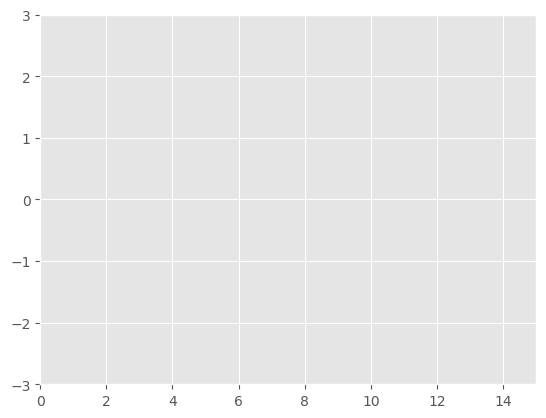

In [24]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())

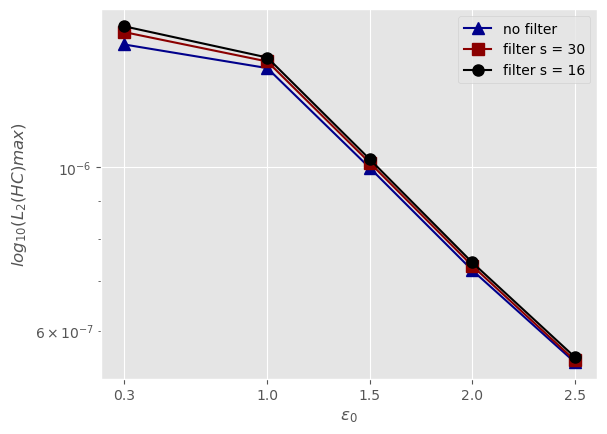

In [102]:
# Numerical test: L2 error of maximum Hamiltonian Constraint for N = 200, L0 = 5, 
# eta = 0.3, 1.5, 3 and epsilon = 0.5 , 1, 1.5, 2, 2.5


L2HC_ET03_E05 =1.4682989715483447e-06
L2HC_ET03_E1 =1.3634172079369258e-06
L2HC_ET03_E15 =9.979723607636403e-07
L2HC_ET03_E2 = 7.24572444771994e-07
L2HC_ET03_E25 = 5.434358580684529e-07


L2HC_ET15_E05 =1.5263534501311447e-06
L2HC_ET15_E1 =1.3920052288231317e-06
L2HC_ET15_E15 =1.0140713818918139e-06
L2HC_ET15_E2 = 7.347249443170373e-07
L2HC_ET15_E25=5.468295079492356e-07

L2HC_ET3_E05 =1.5542719815900326e-06
L2HC_ET3_E1 =1.4092874663066971e-06
L2HC_ET3_E15 =1.025176631344755e-06
L2HC_ET3_E2 =7.423946412505566e-07
L2HC_ET3_E25 = 5.5243747862843e-07




L2HC_ET03 = [L2HC_ET03_E05, L2HC_ET03_E1, L2HC_ET03_E15, L2HC_ET03_E2, L2HC_ET03_E25]

L2HC_ET15 = [L2HC_ET15_E05, L2HC_ET15_E1, L2HC_ET15_E15, L2HC_ET15_E2, L2HC_ET15_E25]

L2HC_ET3 = [L2HC_ET3_E05, L2HC_ET3_E1, L2HC_ET3_E15, L2HC_ET3_E2, L2HC_ET3_E25]

N = [0.3,1,1.5,2,2.5]


plt.plot(N, L2HC_ET03, color = 'darkblue', marker = '^', label = "no filter", markersize = 8)
plt.plot(N, L2HC_ET15, color = 'darkred', marker = 's',label = "filter s = 30", markersize = 8)
plt.plot(N, L2HC_ET3, color = 'k', marker = 'o',label = "filter s = 16", markersize = 8)
plt.xticks(N)
plt.xlabel('$\epsilon_0$')
plt.ylabel('$log_{10}(L_2(HC)max)$')
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()

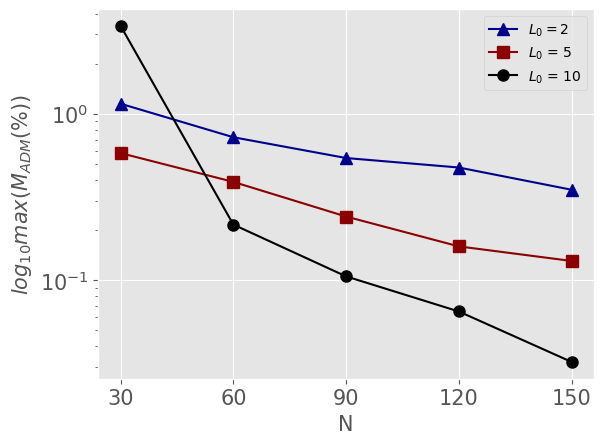

In [22]:
# Numerical test: L2 error of maximum ADM mass para epsilon0 = 1 e eta0 = 3 for nofilter and filter s = 30 and s = 16

Madm_30_L02 =1.148576666830188
Madm_30_L05 =0.5800556687667919
Madm_30_L010 =3.3701448603543604

Madm_60_L02 =0.7224891842109802
Madm_60_L05 =0.38955868888281614
Madm_60_L010 =0.2158011673480182

Madm_90_L02 =0.5419433914304879
Madm_90_L05 =0.24118941357864995
Madm_90_L010 =0.10539523313619914

Madm_120_L02 =0.47529339109713425
Madm_120_L05 =0.15963670570135072
Madm_120_L010 =0.06487355832489557

Madm_150_L02 =0.34952053889741447
Madm_150_L05 =0.1304987488300414
Madm_150_L010 =0.03228522699170439


Madm_L02 = [Madm_30_L02, Madm_60_L02, Madm_90_L02, Madm_120_L02, Madm_150_L02]

Madm_L05 = [Madm_30_L05, Madm_60_L05, Madm_90_L05, Madm_120_L05, Madm_150_L05]

Madm_L010 = [Madm_30_L010, Madm_60_L010, Madm_90_L010, Madm_120_L010, Madm_150_L010]

N = [30, 60, 90, 120, 150]

plt.plot(N, Madm_L02, color = 'darkblue', marker = '^', label = "$L_0 = 2$", markersize = 8)
plt.plot(N, Madm_L05, color = 'darkred', marker = 's',label = "$L_0$ = 5", markersize = 8)
plt.plot(N, Madm_L010, color = 'k', marker = 'o',label = "$L_0$ = 10", markersize = 8)
plt.xticks(N, fontsize = 15)
plt.xlabel('N', fontsize = 15)
plt.ylabel('$log_{10}max(M_{ADM}(\%))$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()

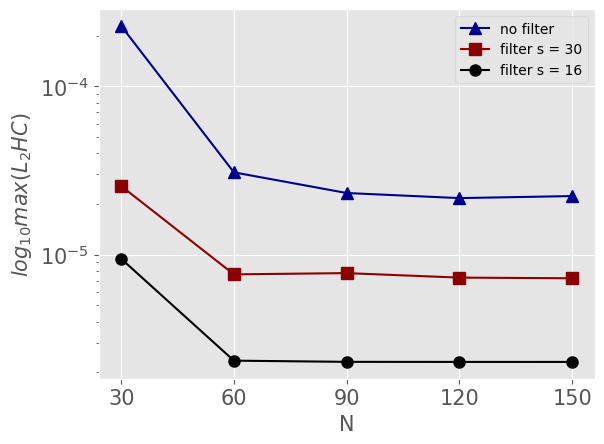

In [100]:
# Numerical test: L2 error of maximum HC mass para epsilon0 = 1 e eta0 = 3 for L0 = 2, no filter 
#and filter s = 30 and s = 16 para A0 = 0.05 KD

# no filter:

L2HC_30_L02 =0.00022800202294838748
L2HC_60_L02 =3.080994892406645e-05
L2HC_90_L02 =2.322324453734728e-05
L2HC_120_L02 =2.1661181559369567e-05
L2HC_150_L02 =2.2273841770165824e-05


# filter s = 30:

L2HC_30_L02_s30 =2.554799706486531e-05
L2HC_60_L02_s30 =7.637387956938437e-06
L2HC_90_L02_s30 =7.7688490950054e-06
L2HC_120_L02_s30 =7.30592612774542e-06
L2HC_150_L02_s30 =7.238863605852555e-06

# filter s = 16:

L2HC_30_L02_s16 =9.455805239372946e-06
L2HC_60_L02_s16 =2.347996323241897e-06
L2HC_90_L02_s16 =2.309567518515278e-06
L2HC_120_L02_s16 =2.307734685950913e-06
L2HC_150_L02_s16 =2.3074327772787813e-06






L2HC_L02 = [L2HC_30_L02, L2HC_60_L02, L2HC_90_L02, L2HC_120_L02, L2HC_150_L02]

L2HC_L02_s30 = [L2HC_30_L02_s30, L2HC_60_L02_s30, L2HC_90_L02_s30, L2HC_120_L02_s30, L2HC_150_L02_s30]

L2HC_L02_s16 = [L2HC_30_L02_s16, L2HC_60_L02_s16, L2HC_90_L02_s16, L2HC_120_L02_s16, L2HC_150_L02_s16]

N = [30, 60, 90, 120, 150]

plt.plot(N, L2HC_L02, color = 'darkblue', marker = '^', label = "no filter", markersize = 8)
plt.plot(N, L2HC_L02_s30, color = 'darkred', marker = 's',label = "filter s = 30", markersize = 8)
plt.plot(N, L2HC_L02_s16, color = 'k', marker = 'o',label = "filter s = 16", markersize = 8)
plt.xticks(N, fontsize = 15)
plt.xlabel('N', fontsize = 15)
plt.ylabel('$log_{10}max(L_2HC)$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()